<a href="https://colab.research.google.com/github/james00000007/Google-Colaboratory/blob/main/Amazing%20Colab%20Notebook%E2%9C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown  ← Current Python Version
!python -V

In [ ]:
#@markdown <br><center><img src='https://miro.medium.com/max/2036/1*GW4cqNv-SIQ9BGGhssL1bQ.png' height="80" alt="netdata"/></center>
#@markdown <h3> Prevent Google Colab from disconnecting | AUTO RECONNECT
import IPython
from google.colab import output
 
display(IPython.display.Javascript('''
function ClickConnect(){
  btn = document.querySelector("colab-connect-button")
  if (btn != null){
    console.log("Click colab-connect-button"); 
    btn.click() 
    }
    
  btn = document.getElementById('ok')
  if (btn != null){
    console.log("Click reconnect"); 
    btn.click() 
    }
  }
    
setInterval(ClickConnect,60000)
'''))

In [ ]:
#@markdown <h3>⬅ Mount Google Drive</h3>
import os, uuid; import ipywidgets as widgets
from IPython.display import clear_output
from google.colab import drive, output
 
class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)
    
def DemountForm():
  clear_output(wait=True)
  display(MakeLabel("Demount Confirm?", ""), MakeButton("Confirm", Demount, "danger"), MakeButton("Cancel", ShowGD, "warning"))
    
def Demount():
  clear_output(wait=True)
  get_ipython().system_raw("pkill -9 -e -f drive")
  !rm -rf /root/.config/Google/DriveFS/
  !echo "If you want to mount Google Drive run this cell again."
  
def ShowGD():
  try:
    RefreshPath()
  except:
    clear_output(wait=True)
  display(MakeLabel("Control Panel", ""), MakeButton("Demount", DemountForm, "danger"))
 
while not os.path.exists("/content/drive"):
  try:
    drive.mount("/content/drive")
    clear_output(wait=True)
  except:
    clear_output(wait=True)
    
ShowGD()

In [ ]:
#@markdown <h3>⬅ To Mount Another Gdrive!</h3>
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!sudo mkdir /content/drive1
!google-drive-ocamlfuse /content/drive1

## <img src='https://colab.research.google.com/img/colab_favicon_256px.png' height="30" alt="colab" />  __Torrent to Gdrive__



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to START server</h3>

!python -m pip install --upgrade pip setuptools wheel
!python -m pip install lbry-libtorrent
!apt install python3-libtorrent

!apt install python3-libtorrent

import libtorrent as lt

ses = lt.session()
ses.listen_on(6881, 6891)
downloads = []

from IPython.display import HTML, clear_output

clear_output()

print("Server Started Successfully")



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to </h3>
#@markdown <h3>Upload torrent file</h3>
#@markdown <h5>You can run this cell to add more files as many times as you want</h5><br>



from google.colab import files

source = files.upload()
params = {
    "save_path": "/content/drive/Shareddrives/Texas Woman's University Denton",
    "ti": lt.torrent_info(list(source.keys())[0]),
}
downloads.append(ses.add_torrent(params))

In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to </h3>
#@markdown <h3>Add From Magnet Link</h3>
#@markdown <h5>You can run this cell to add more files as many times as you want</h5><br>


params = {"save_path": "/content/drive/Shareddrives}

while True:
    magnet_link = input("Enter Magnet Link Or Type Exit: ")
    if magnet_link.lower() == "exit":
        break
    downloads.append(
        lt.add_magnet_uri(ses, magnet_link, params)
    )


In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to Start Download</h3>
import time
from IPython.display import display
import ipywidgets as widgets

state_str = [
    "queued",
    "checking",
    "downloading metadata",
    "downloading",
    "finished",
    "seeding",
    "allocating",
    "checking fastresume",
]

layout = widgets.Layout(width="auto")
style = {"description_width": "initial"}
download_bars = [
    widgets.FloatSlider(
        step=0.01, disabled=True, layout=layout, style=style
    )
    for _ in downloads
]
display(*download_bars)

while downloads:
    next_shift = 0
    for index, download in enumerate(downloads[:]):
        bar = download_bars[index + next_shift]
        if not download.is_seed():
            s = download.status()

            bar.description = " ".join(
                [
                    download.name(),
                    str(s.download_rate / 1000),
                    "kB/s",
                    state_str[s.state],
                ]
            )
            bar.value = s.progress * 100
        else:
            next_shift -= 1
            ses.remove_torrent(download)
            downloads.remove(download)
            bar.close() # Seems to be not working in Colab (see https://github.com/googlecolab/colabtools/issues/726#issue-486731758)
            download_bars.remove(bar)
            print(download.name(), "complete")
    time.sleep(1)


## <img src='https://biplobsd.github.io/RLabClone/img/title_rclonelab.svg' height="30" alt="RcloneLab"/>

1️⃣ Click on the Cell below to upload your configuration file <br> <b> rclone.conf </b> if you already have one, or go to cell 3 to create your config.

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅ Execute Upload Local File
MODE = "RCONFIG"  # @param ['UTILS', 'RCONFIG', 'RCONFIG_append', "GENERATELIST"]
REMOTE = "mnc"  # @param {type:"string"}
QUERY_PATTERN = ""  # @param {type:"string"}
# @markdown #### <font size=1px>For not able to upload local file : https://stackoverflow.com/a/58661947</font>
# ================================================================ #
 
from os import path as _p
 
if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec
 
    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))  # nosec
 
import importlib, rlab_utils
from google.colab import files  # pylint: disable=import-error #nosec
from rlab_utils import checkAvailable, runSh, PATH_RClone_Config, prepareSession
 
 
def generateUploadList():
    prepareSession()
    if checkAvailable("/content/upload.txt"):
        runSh("rm -f upload.txt")
    runSh(
        f"rclone --config {PATH_RClone_Config}/rclone.conf lsf {REMOTE}: --include '{QUERY_PATTERN}' --drive-shared-with-me --files-only --max-depth 1 > /content/upload.txt",
        shell=True,  # nosec
    )
 
 
def uploadLocalFiles():
    prepareSession()
    if MODE == "UTILS":
        filePath = "/root/.ipython/rlab_utils.py"
    elif MODE in ("RCONFIG", "RCONFIG_append"):
        filePath = f"{PATH_RClone_Config}/rclone.conf"
    else:
        pass
 
    try:
      if checkAvailable(filePath):
        runSh(f"rm -f {filePath}")
      print("Select file from your computer.\n")
      uploadedFile = files.upload()
      fileNameDictKeys = uploadedFile.keys()
      fileNo = len(fileNameDictKeys)
      if fileNo > 1:
          for fn in fileNameDictKeys:
              runSh(f'rm -f "/content/{fn}"')
          return print("\nPlease only upload a single config file.")
      elif fileNo == 0:
          return print("\nFile upload cancelled.")
      elif fileNo == 1:
          for fn in fileNameDictKeys:
              if checkAvailable(f"/content/{fn}"):
                  if MODE == "RCONFIG_append":
                    import urllib
                    urllib.request.urlretrieve("https://biplobsd.github.io/RLabClone/res/rclonelab/rclone.conf",
                                               "/usr/local/sessionSettings/rclone.conf")
                    with open(f"/content/{fn}", 'r+') as r:
                      new_data = r.read()
                      runSh(f'rm -f "/content/{fn}"')
                    with open(filePath, 'r+') as f:
                      old_data = f.read()
                      f.seek(0)
                      f.truncate(0)
                      f.write(old_data + new_data)
                    print("\nUpdate completed.")
                  else:
                    runSh(f'mv -f "/content/{fn}" {filePath}')
                    runSh(f"chmod 666 {filePath}")
                    runSh(f'rm -f "/content/{fn}"')
                    importlib.reload(rlab_utils)
                    print("\nUpload completed.")
              return
      else:
          print("\nNo file")
          return
    except:
      return print("\nUpload process Error.")
 
 
if MODE == "GENERATELIST":
    generateUploadList()
else:
    uploadLocalFiles()

In [ ]:
#@markdown <center><h3>Rclone MOUNT / UNMOUNT</h3>Mount the remote as file system on a mountpoint.</center>
Cache_Directory = "DISK" #@param ["RAM", "DISK"]
import os
from IPython.display import HTML, clear_output
import uuid
import ipywidgets as widgets
from google.colab import output
import re
#####################################
if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run
 
  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))
 
from rlab_utils import (
    runSh,
    prepareSession,
    PATH_RClone_Config,
)
 
class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def ShowAC():
  clear_output(wait=True)
  display(
      widgets.HBox(
          [widgets.VBox(
              [widgets.HTML(
                  '''<h3 style="font-family:Trebuchet MS;color:#4f8bd6;margin-top:0px;">
                  Rclone available config...</h3>
                  '''
                  ),
               mountNam]
               )
          ]
          )
      )
  
  display(HTML("<br>"), MakeButton("Mount", MountCMD, "primary"),
          MakeButton("Unmount", unmountCMD, "danger"))
 
prepareSession()
content = open(f"{PATH_RClone_Config}/rclone.conf").read()
avCon = re.findall(r"^\[(.+)\]$", content, re.M)
mountNam = widgets.Dropdown(options=avCon)
 
if Cache_Directory == 'RAM':
  cache_path = '/dev/shm'
elif Cache_Directory == 'DISK':
  os.makedirs('/tmp', exist_ok=True)
  cache_path = '/tmp'
 
def MountCMD():
    mPoint = f"/content/drives/{mountNam.value}"
    os.makedirs(mPoint, exist_ok=True)
    cmd = rf"rclone mount {mountNam.value}: {mPoint}" \
      rf" --config {PATH_RClone_Config}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --buffer-size 256M' \
      ' --transfers 10' \
      ' --vfs-cache-mode full' \
      ' --vfs-cache-max-age 0h0m1s' \
      ' --vfs-cache-poll-interval 0m1s' \
      f' --cache-dir {cache_path}' \
      ' --allow-other' \
      ' --daemon'
 
    if runSh(cmd, shell=True) == 0:
      print(f"🤩 Mount success!👍 - \t{mPoint}")
    else:
      print(f"🤔 Mount failed! - \t{mPoint}")
 
def unmountCMD():
  mPoint = f"/content/drives/{mountNam.value}"
  if os.system(f"fusermount -uz {mPoint}") == 0:
    runSh(f"rm -r {mPoint}")
    print(f"Unmounted success! - \t{mPoint}")
  else:
    runSh(f"fusermount -uz {mPoint}", output=True)
 
ShowAC()

5️⃣<br><img src='https://1.bp.blogspot.com/-q2TmGe-HsDo/XWZgsRtILbI/AAAAAAAADOM/PnoCmKIBujcfZm94pN9nSgURf7sdk1rYACLcBGAs/s640/rclone-new-logo.png' height="30" alt="RcloneCoLab"/><br>You can use a Free Ngrok Token, but to make a copy for several hours, you will need to make a free account at  https://dashboard.ngrok.com/get-started/setup
<font color=yellow size=5><center><b>**Rclone Web UI**</center></b></font>

In [ ]:
#@markdown <center><h3>Rclone webui</h3></center><br>
import os, signal
import random
import string
import urllib.request
from IPython.display import HTML, clear_output
from urllib.parse import urlparse
import time

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "AP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
#@markdown Default <br>&emsp;username : user<br>&emsp;password : pass
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
    checkAvailable
)
from rlab_utils import (
    displayOutput,
    checkAvailable,
    prepareSession,
    PATH_RClone_Config,
    accessSettingFile,
    memGiB,
)

loadingAn()
prepareSession()
pid = findProcess("rclone", "rcd", isPid=True)
try:
  os.kill(int(pid), signal.SIGTERM)
except TypeError:
  pass
cmd = "rclone rcd --rc-web-gui --rc-addr :5572" \
      " --rc-serve" \
      " --rc-user=user --rc-pass=pass" \
      " --rc-no-auth" \
      rf" --config {PATH_RClone_Config}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --transfers 16' \
      " &"
runSh(cmd, shell=True)
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rclone', 5572, 'http'],
                            ['filebrowser', 4000, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/filebrowserRclone.yml", 4099]
).start('rclone', displayB=False)
# output
clear_output()
displayUrl(Server, pNamU='Rclone webUI : ', 
           ExUrl=fr"https://user:pass@{urlparse(Server['url']).hostname}")

In [ ]:
#@markdown <h3>⬅️ Run This Cell to Execute RcloneLab</h3>
# ============================= FORM ============================= #
Mode = "Copy" #@param ["Config", "Copy", "Move", "Mount", "Sync", "Checker", "Deduplicate", "Remove Empty Directories", "Empty Trash", "qBittorrent"]
Compare = "Size & Mod-Time" #@param ["Size & Mod-Time", "Size & Checksum", "Only Mod-Time", "Only Size", "Only Checksum"]
Source = "" #@param {type:"string"}
Destination = "" #@param {type:"string"}
Transfers = 20 #@param {type:"slider", min:1, max:20, step:1}
Checkers = 20 #@param {type:"slider", min:1, max:20, step:1}
#@markdown ---

#@markdown <center><h3><font color="#DFFF00"><b>⚙️ Global Configuration ⚙️</b></font></h3></center>
Simple_Ouput = True #@param {type:"boolean"}
Skip_files_that_are_newer_on_the_destination = False #@param {type:"boolean"}
Skip_all_files_that_exist = False #@param {type:"boolean"}
Do_not_cross_filesystem_boundaries = False
Do_not_update_modtime_if_files_are_identical = False #@param {type:"boolean"}
Large_amount_of_files_optimization = False
Google_Drive_optimization = False #@param {type:"boolean"}
Google_Drive_server_side_copy = True #@param {type:"boolean"}
Dry_Run = False #@param {type:"boolean"}
Output_Log_File = "OFF" #@param ["OFF", "NOTICE", "INFO", "ERROR", "DEBUG"]
Extra_Arguments = "" #@param {type:"string"}

#@markdown <center><h3><font color="#00FFFF"><b>↪️ Sync Configuration ↩️</b></font></h3></center>
Sync_Mode = "Delete during transfer" #@param ["Delete during transfer", "Delete before transfering", "Delete after transfering"]
Track_Renames = False #@param {type:"boolean"}

#@markdown <center><h3><font color="#FF00FF"><b>💞 Deduplicate Configuration 💞</b></font></h3></center>
Deduplicate_Mode = "Interactive" #@param ["Interactive", "Skip", "First", "Newest", "Oldest", "Largest", "Rename"]
Deduplicate_Use_Trash = True #@param {type:"boolean"}
# ================================================================ #

import os, psutil; from IPython.display import HTML, clear_output; from IPython.utils.io import ask_yes_no

def CheckProcess(process, command):
  for pid in psutil.pids():
    try:
      p = psutil.Process(pid)
      if process in p.name():
        for arg in p.cmdline():
          if command in str(arg):  
            return True
          else:
            pass
      else:
        pass
    except:
      continue

### Variable Declaration

# Optimized for Google Colaboratory
if Google_Drive_optimization:
  bufferC = "--buffer-size 128M"
else:
  bufferC = "--buffer-size 192M"

if Compare == "Size & Checksum":
  compareC = "-c"
elif Compare == "Only Mod-Time":
  compareC = "--ignore-size"
elif Compare == "Only Size":
  compareC = "--size-only"
elif Compare == "Only Checksum":
  compareC = "-c --ignore-size"
else:
  compareC = ""

transfersC = "--transfers "+str(Transfers)
checkersC = "--checkers "+str(Checkers)

if Skip_files_that_are_newer_on_the_destination:
  skipnewC = "-u"
else:
  skipnewC = ""
  
if Skip_all_files_that_exist:
  skipexistC = "--ignore-existing"
else:
  skipexistC = ""
  
if Do_not_cross_filesystem_boundaries:
  nocrossfilesystemC = "--one-file-system"
else:
  nocrossfilesystemC = ""
  
if Do_not_update_modtime_if_files_are_identical:
  noupdatemodtimeC = "--no-update-modtime"
else:
  noupdatemodtimeC = ""

if Large_amount_of_files_optimization:
  filesoptimizeC = "--fast-list"
else:
  filesoptimizeC = ""
  
if Google_Drive_optimization:
  driveoptimizeC = "--drive-chunk-size 128M --drive-acknowledge-abuse --drive-keep-revision-forever"
else:
  driveoptimizeC = ""

if Google_Drive_server_side_copy:
  drivecopyC = "--drive-server-side-across-configs=true"
elif Google_Drive_optimization:
  drivecopyC = "--disable copy"

if Dry_Run:
  dryrunC = "-n"
else:
  dryrunC = ""
  
if Output_Log_File != "OFF":
  statsC = "--log-file=/root/.rclone_log/rclone_log.txt"
else:
  if Simple_Ouput:
    statsC = "-v --stats-one-line --stats=5s"
  else:
    statsC = "-v --stats=5s"
  
if Output_Log_File == "INFO":
  loglevelC = "--log-level INFO"
elif Output_Log_File == "ERROR":
  loglevelC = "--log-level ERROR"
elif Output_Log_File == "DEBUG":
  loglevelC = "--log-level DEBUG"
else:
  loglevelC = ""

if Sync_Mode == "Delete during transfer":
  syncmodeC = "--delete-during"
elif Sync_Mode == "Delete before transfering":
  syncmodeC = "--delete-before"
elif Sync_Mode == "Delete after transfering":
  syncmodeC = "--delete-after"
  
if Track_Renames:
  trackrenamesC = "--track-renames"
else:
  trackrenamesC = ""
  
if Deduplicate_Mode == "Interactive":
  deduplicateC = "interactive"
elif Deduplicate_Mode == "Skip":
  deduplicateC = "skip"
elif Deduplicate_Mode == "First":
  deduplicateC = "first"
elif Deduplicate_Mode == "Newest":
  deduplicateC = "newest"
elif Deduplicate_Mode == "Oldest":
  deduplicateC = "oldest"
elif Deduplicate_Mode == "Largest":
  deduplicateC = "largest"
elif Deduplicate_Mode == "Rename":
  deduplicateC = "rename"
  
if Deduplicate_Use_Trash:
  deduplicatetrashC = ""
else:
  deduplicatetrashC = "--drive-use-trash=false"
  
### rclone Execution

if Output_Log_File != "OFF" and Mode != "Config":
  get_ipython().system_raw("mkdir -p -m 666 /root/.rclone_log/")
  display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Logging enables, rclone will not output log through the terminal, please wait until finished.</h2><br></center>"))

if Mode == "Config":
  !rclone --config=/root/.rclone.conf config
elif Mode == "Copy":
  !rclone --config=/root/.rclone.conf copy "$Source" "$Destination" $transfersC $checkersC $statsC $loglevelC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $drivecopyC $dryrunC $Extra_Arguments
elif Mode == "Move":
  !rclone --config=/root/.rclone.conf move "$Source" "$Destination" $transfersC $checkersC $statsC $loglevelC --delete-empty-src-dirs $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $drivecopyC $dryrunC $Extra_Arguments
elif Mode == "Mount":
  try:
    if not CheckProcess("rclone", "/content/" + Source.split(":")[0] + "/"):
      if not os.path.exists("/content/" + Source.split(":")[0] + "/"):
        get_ipython().system_raw("mkdir -p -m 666 '/content/" + Source.split(":")[0] + "/'")
      get_ipython().system_raw("rclone --config=/root/.rclone.conf mount '$Source' '/content/" + Source.split(":")[0] + "/' $loglevelC $noupdatemodtimeC $bufferC $filesoptimizeC --drive-chunk-size 128M --drive-acknowledge-abuse --drive-keep-revision-forever $Extra_Arguments &")
  except:
    pass
elif Mode == "Sync":
  !rclone --config=/root/.rclone.conf sync "$Source" "$Destination" $transfersC $checkersC $statsC $loglevelC $syncmodeC $trackrenamesC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $drivecopyC $dryrunC $Extra_Arguments
elif Mode == "Checker":
  !rclone --config=/root/.rclone.conf check "$Source" "$Destination" $checkersC $statsC $loglevelC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $drivecopyC $dryrunC $Extra_Arguments
elif Mode == "Deduplicate":
  !rclone --config=/root/.rclone.conf dedupe "$Source" $checkersC $statsC $loglevelC --dedupe-mode $deduplicateC $deduplicatetrashC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $drivecopyC $dryrunC $Extra_Arguments
elif Mode == "Remove Empty Directories":
  !rclone --config=/root/.rclone.conf rmdirs "$Source" $statsC $loglevelC $dryrunC $Extra_Arguments
elif Mode == "Empty Trash":
  !rclone --config=/root/.rclone.conf cleanup "$Source" $statsC $loglevelC $dryrunC $Extra_Arguments
elif Mode == "qBittorrent":
  if Source == "":
    !chmod -R 666 /content/qBittorrent/ && rclone --config=/root/.rclone.conf move "/content/qBittorrent/" "$Destination" $transfersC $checkersC $statsC $loglevelC --delete-empty-src-dirs --exclude **/.unwanted/ $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $drivecopyC $dryrunC $Extra_Arguments

### Log Output
  
if Output_Log_File != "OFF" and Mode != "Config" and os.path.isfile("/root/.rclone_log/rclone_log.txt"):
  ### Rename log file and output settings.
  get_ipython().system_raw("mv /root/.rclone_log/rclone_log.txt /root/.rclone_log/rclone_log_$(date +%Y-%m-%d_%H.%M.%S).txt")
  with open("/root/.rclone_log/" + Mode + "_settings.txt", "w") as f:
    f.write("Mode: " + Mode + \
            "\nCompare: " + Compare + \
            "\nSource: \"" + Source + \
            "\"\nDestination: \"" + Destination + \
            "\"\nTransfers: " + str(Transfers) + \
            "\nCheckers: " + str(Checkers) + \
            "\nSkip files that are newer on the destination: " + str(Skip_files_that_are_newer_on_the_destination) + \
            "\nSkip all files that exist: " + str(Skip_all_files_that_exist) + \
            "\nDo not cross filesystem boundaries: " + str(Do_not_cross_filesystem_boundaries) + \
            "\nDo not update modtime if files are identical: " + str(Do_not_update_modtime_if_files_are_identical) + \
            "\nDry-Run: " + str(Dry_Run) + \
            "\nOutput Log Level: " + Output_Log_File + \
            "\nExtra Arguments: \"" + Extra_Arguments + \
            "\"\nSync Moden: " + Sync_Mode + \
            "\nTrack Renames: " + str(Track_Renames) + \
            "\nDeduplicate Mode: " + Deduplicate_Mode + \
            "\nDeduplicate Use Trash: " + str(Deduplicate_Use_Trash))
  ### Compressing log file.
  get_ipython().system_raw("rm -f /root/rclone_log.zip && zip -r -q -j -9 /root/rclone_log.zip /root/.rclone_log/ && rm -rf /root/.rclone_log/ && mkdir -p -m 666 /root/.rclone_log/")
  ### Send Log
  if os.path.isfile("/root/rclone_log.zip"):
    try:
      files.download("/root/rclone_log.zip")
      get_ipython().system_raw("rm -f /root/rclone_log.zip")
      display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Sending log to your browser...</h2><br></center>"))
    except:
      get_ipython().system_raw("mv /root/rclone_log.zip /content/rclone_log_$(date +%Y-%m-%d_%H.%M.%S).zip")
      display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">You can use file explorer to download the log file.</h2><br><img src=\"https://raw.githubusercontent.com/Sparoney/RcloneLab/master/res/rclonelab/01.png\"><br></center>"))
  else:
    clear_output(wait=True)
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">There is no log file.</h2><br></center>"))

### Operation has been successfully completed.
if os.path.isfile("/usr/bin/rclone") == False:
  clear_output(wait=True)
  display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Please run the installation cell above first.</h2><br></center>"))
elif Mode == "qBittorrent" and Source.strip() != "":
  display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Please empty the Source field in qBittorrent mode.</h2><br></center>"))
elif Mode == "Mount" and Source.strip() == "":
  display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ The Source field is empty.</h2><br></center>"))
elif Mode != "Config":
  display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ Operation has been successfully completed.</h2><br></center>"))

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Download config file.
MODE = "RCONFIG"  # @param ['UTILS', 'RCONFIG']
# ================================================================ #
from google.colab import files

def downloadFile():
  if MODE == "UTILS":
      filePath = "/root/.ipython/rlab_utils.py"
  elif MODE == "RCONFIG":
      filePath = f"{PATH_RClone_Config}/rclone.conf"
  else:
      pass
  try:
    files.download(filePath)
  except FileNotFoundError:
    print("File not found!")

if __name__ == "__main__":
  downloadFile()


##![alt text](https://mega.nz/favicon.ico?v=3) __TRANSFERE to MEGA__





In [ ]:
# @markdown <center><h2>INPUT YOUR MEGA ID</h2></center><br>
from functools import wraps
import errno
import os
import signal
import subprocess
import shlex


class TimeoutError(Exception):
    pass


def timeout(seconds=10, error_message=os.strerror(errno.ETIME)):
    def decorator(func):
        def _handle_timeout(signum, frame):
            raise TimeoutError(error_message)

        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, _handle_timeout)
            signal.alarm(seconds)
            try:
                result = func(*args, **kwargs)
            finally:
                signal.alarm(0)
            return result

        return wraps(func)(wrapper)

    return decorator


if not os.path.exists("/root/.ipython/ocr.py"):
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/ocr.py \
                    -O /root/.ipython/ocr.py"
    run(split(shellCmd))
from ocr import runSh

@timeout(10)
def runShT(args):
    return runSh(args, output=True)


# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
else:
    !pkill mega-cmd

# INPUT YOUR MEGA ID

USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
if not (USERNAME == "" or PASSWORD == ""):
    try:
        runShT(f"mega-login {USERNAME} {PASSWORD}")
    except TimeoutError:
        runSh('mega-whoami', output=True)
else:
    print("Please Input your Mega IDs.")


In [ ]:
import time
import subprocess
import contextlib
from IPython.display import clear_output
# @markdown <br><center><img src='https://www.impactcomputing.co.uk/uploads/files/services/managed-office-365.svg' height="100" alt="netdata"/></center>
# @markdown <center><h2>TRANSFERE NOW</h2></center><br>
# TRANSFERE NOW

PATH_TO_FILE = ""  # @param {type:"string"}
# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']


def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    cmd = ['mega-put', PATH_TO_FILE, '/colab']
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        clear_output(wait=True)
        print(line)

try:
    transfare()
except FileNotFoundError:
    print("Login your account!")


In [ ]:
import sys, os, urllib.request
import time
import subprocess
import contextlib
from IPython.display import clear_output

HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
)
#@title MEGA public link download
URL = "" #@param {type:"string"}
OUTPUT_PATH = "" #@param {type:"string"}
if not OUTPUT_PATH:
  os.makedirs("downloads", exist_ok=True)
  OUTPUT_PATH = "downloads"
# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    loadingAn()
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
    clear_output()

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    import codecs
    decoder = codecs.getincrementaldecoder("UTF-8")()
    cmd = ["mega-get", URL, OUTPUT_PATH]
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        print(line)
        


transfare()



##<img src="https://pluspng.com/img-png/google-cloud-logo-png-google-cloud-logo-evolution-history-and-meaning-png-1280x720.png" height="50" alt="Rclone-Logo' "/></center>__Using Service Accounts__

In [ ]:
#@markdown <center><h3><b>Using Service Accounts</b></h3></center><br>
import sys
import pathlib
from google.colab import files
from google.colab import output

# Current Version
current_version = ['v4.1.2']
# Check Update
latest_version = !curl https://www.caduceus.ml/files/MCT-Version.txt
if latest_version == ['curl: (6) Could not resolve host: www.caduceus.ml']:
  print("Unable to check for updates")
elif current_version == latest_version: 
  print(f"Notebook Updated! {current_version}")
else:
  sys.exit(f"NoteBook is out-dated! Please update your Notebook to {latest_version}, for getting latest new features.")

# Config Directory
Config_dir = "/content/drive/MyDrive/"
Save_in = "/content/drive/MyDrive/MCT-Config/"
Saved_in = "MyDrive->MCT-Config"
SA_Path = "/content/accounts.zip"

# Error Messages
GA_Error = "Google Drive Error: Google Account is not connected!"
Invalid_Input = "Input Error: Invalid input parameter!"
Path_missing = "Path Error: One or more required path is missing! Check if you connected Google Account or not?"
SA_missing = f"No Service Accounts to copy in {Saved_in}"

# Check Google Account (Prevent Duplicate)
if pathlib.Path(Config_dir).exists():
        print("")
else:
        sys.exit(Path_missing)

# Configure Directory
if pathlib.Path(Save_in).exists():
        print("Restore point already exist.") 
else:
        !rclone mkdir {Save_in}
        output.clear()

def save_sa():
	!rclone copy {SA_Path} {Save_in}
	!unzip {SA_Path}  -d "/content/"
	output.clear()
	print(f"Service Accounts saved in {Saved_in}.")
	print("Successfully unzipped & configured your Service Accounts!")

# Configure Options
Upload_Service_Accounts = True #@param {type:"boolean"}
Save_Service_Accounts_MyDrive = True #@param {type:"boolean"}

Is_Configured = 0 

if(Upload_Service_Accounts==True):
	if(Save_Service_Accounts_MyDrive==True):
		print("Upload accounts.zip")
		files.upload()
		save_sa()
		Is_Configured = 1
	elif(Save_Service_Accounts_MyDrive==False):
		print("Upload accounts.zip")
		files.upload()
		!unzip {SA_Path} -d "/content/"
		print("Successfully unzipped & configured your Service Accounts! You had not selected option, hence your Service Accounts will be stored for this session.")
		Is_Configured = 1
	else:
		Is_Configured = 0
		sys.exit(Invalid_Input)
elif(Upload_Service_Accounts==False):
	if(Save_Service_Accounts_MyDrive==True):
		if pathlib.Path(SA_Path).exists():
			save_sa()
		else:
			print(SA_missing)

## <font color="#FF00FF"><b>💞 Retrieve Access Tokens for Google APIS  💞

In [ ]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="30" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Retrieve access token for Google Drive API</h3></center><br>
client_id="" #@param {type:"string"}
client_secret="" #@param {type:"string"}

import subprocess
from google.colab import output

def formatx(i, key, j, k):
    val=response[i].split(": ")[1][1-j:-2+j+k]
    return key+": "+val

print("Go to this URL in a browser:: https://accounts.google.com/o/oauth2/auth?client_id={}&redirect_uri=urn:ietf:wg:oauth:2.0:oob&scope=https://www.googleapis.com/auth/drive&response_type=code".format(client_id))
auth_code=input("Enter your authorization code: ")
output.clear()
response = subprocess.check_output("curl -d client_id={} -d client_secret={} -d grant_type=authorization_code -d redirect_uri=urn:ietf:wg:oauth:2.0:oob -d code={} https://accounts.google.com/o/oauth2/token".format(client_id, client_secret, auth_code), shell=True).decode().split("\n")[1:6]
access_token, expires_in, refresh_token, scope, token_type = formatx(0, "access_token", 0, 0), formatx(1, "expires_in", 1, 0), formatx(2, "refresh_token", 0, 0), formatx(3, "scope", 0, 0), formatx(4, "token_type", 0, 1)

print(access_token); print("··········")
print(expires_in); print("··········")
print(refresh_token); print("··········")
print(scope); print("··········")
print(token_type); print("··········")
print("in_json_form:", "{"+", ".join("".join("".join(response).split("  ")).split(","))+"}")

## <font color="#00FFFF"><b>🔥 Transfer Between Drives  🔥

In [ ]:
#@markdown <center><h3><font color="#DFFF00"><b>⚙️ Input folder will be copied into the destination folder ⚙️
input_folder = "" #@param {type:"string"}
destination_folder = "" #@param {type:"string"}
!cp -a -v "$input_folder" "$destination_folder"
clear_output(wait=True)
print("Copied successfully!")

In [ ]:
#@markdown <center><h3><font color="#CC0000"><b>⚙️ Input file will be copied into the destination folder ⚙️
input_file = "" #@param {type:"string"}
destination_folder = "" #@param {type:"string"}
!cp -v "$input_file" "$destination_folder"
print("Copied successfully!")

## <img src='https://i.ibb.co/pKCdZhK/vpsmate-aria2-logo-1536x864.jpg' height="50" alt="aria2" />

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://i.ibb.co/pKCdZhK/vpsmate-aria2-logo-1536x864.jpg' height="50" alt="aria2"/></center>
#@markdown <center><h3>aria2<br />The next generation download utility.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
REGION = "AP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
# Aria2 Service
Aria2_rpc = True  # @param {type:"boolean"}
Ariang_WEBUI = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
# OUTPUT_DIR = ""  # @param {type:"string"}
PORT = 8221
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    CWD,
    displayUrl,
    findProcess
)

#if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
#    !kill -9 -1 &
#clear_output()
loadingAn()

# Ariang SETUP
runSh('sudo apt install -y aria2')
pathlib.Path('ariang').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading latest version of ariang
if not os.path.exists("ariang/index.html"):
  BASE_URL = r"https://github.com/mayswind/AriaNg"
  LATEST_TAG = latestTag(BASE_URL)
  urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
              f'AriaNg-{LATEST_TAG}-AllInOne.zip'
  urllib.request.urlretrieve(urlF, 'ariang/new.zip')
  with zipfile.ZipFile('ariang/new.zip', 'r') as zip_ref:
      zip_ref.extractall('ariang')
  try:
    pathlib.Path('ariang/new.zip').unlink()
  except FileNotFoundError:
    pass

# START_ARIANG_WEBUI_AND_ARIA2_RPC
try:
  if not OUTPUT_DIR:
    OUTPUT_DIR = f"downloads/"
  elif not os.path.exists(OUTPUT_DIR):
    clear_output()
    print("Error: Your set path not found! Create path!")
    exx()
except:
  OUTPUT_DIR = f"{CWD}/downloads/"
if Aria2_rpc:
  if not findProcess("aria2c", "--enable-rpc"):
    try:
      trackers = urllib.request.urlopen(
          "https://trackerslist.com/best_aria2.txt"
      ).read().decode()
      cmdC = r"aria2c --enable-rpc --rpc-listen-port=6800 -D " \
            fr"-d {OUTPUT_DIR} " \
            r"-j 20 " \
            r"-c " \
            fr"--bt-tracker={trackers} " \
            r"--bt-request-peer-speed-limit=0 " \
            r"--bt-max-peers=0 " \
            r"--seed-ratio=0.0 " \
            r"--max-connection-per-server=10 " \
            r"--min-split-size=10M " \
            r"--follow-torrent=mem " \
            r" &"
      runSh(
          cmdC,
          shell=True
      )
    except:
      print("aria2 rpc not enabling. Try again later!")

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Aria2_rpc', 6800, 'http'], 
    ['Ariang', 8221, 'http']], 'jp', 
    [f"{HOME}/.ngrok2/aria2.yml", 5042]
)
if Aria2_rpc:
  data = Server.start('Aria2_rpc', displayB=False)
  Host = data['url'][7:] 
  port = "80"
  clear_output()
if Ariang_WEBUI:
  if Aria2_rpc:
    filePath = 'ariang/index.html'
    with open(filePath, 'r+') as f:
      read_data = f.read()
      f.seek(0)
      f.truncate(0)
      read_data = re.sub(r'(rpcHost:"\w+.")|rpcHost:""', 
                        f'rpcHost:"{Host}"', read_data)
      read_data = re.sub(r'protocol:"\w+."', r'protocol:"ws"', read_data)
      read_data = re.sub(r'rpcPort:"\d+."', f'rpcPort:"{port}"', read_data)
      f.write(read_data)
  try:
    urllib.request.urlopen(f"http://localhost:{PORT}")
  except:
    runSh(f"python3 -m http.server {PORT} &", shell=True, cd="ariang/")
 
  data2 = Server.start('Ariang', displayB=False)
  displayUrl(data2, pNamU='Ariang : ')

if Aria2_rpc:
  display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Aria2 rpc config<p><thead>        <tr>            <th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr>            <td>WebSocket</td><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="http://bit.ly/2qoOw0a">NB. How to setup this's config. [Click ME]</a></button><center>"""))


## <img src='https://i.ibb.co/pKCdZhK/vpsmate-aria2-logo-1536x864.jpg' height="30" alt="aira2"/> <font size=1px >___Direct link downloader / Remote Uploading___</font>

___Auto share link supported : Disk.yandex.com, Gdrive and youtube-dl all extractor...___

In [ ]:
%cd /content/drive/My Drive
%mkdir DirectDownload

#

URL = "" #@param {type:"string"}
#@markdown <center><h5>Default output path <b>/content/drive/My Drive/DirectDownload</b></h5></center>
OUTPUT_PATH = "" #@param {type:"string"}

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ttmg.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py \
                    -O /root/.ipython/ttmg.py"
    run(split(shellCmd))
from ttmg import updateCheck, runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)


    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/drive/My Drive/DirectDownload"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("DirectDownload")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("Please input url")

##<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Pornhub-logo.svg/512px-Pornhub-logo.svg.png' height="30" alt="filebrowser" />  <h5>

In [ ]:
#@markdown <h3>⬅️ Click Here to Install Require Modules</h3>

#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip3 install youtube-dl')
os.system('pip3 install prettytable')
os.system('pip3 install bs4')
os.system('pip3 install requests')
%cd /content
os.system('git clone https://github.com/mariosemes/PornHub-downloader-python.git')

clear_output()
print("Install Finished")

In [ ]:
#@markdown <h3>⬅️ Click Here to download video</h3>

#@markdown - Single Download link Eg: https://www.pornhub.com/view_video.php?viewkey=ph5d69a2093729e
#@markdown - The batch option will ask you for the full path of your .txt file where you can import multiple URLs at once.Take care that every single URL in the .txt file is in his own row.



pornhub_url = '' #@param {type: "string"}
option = "single_download" #@param ["single_download", "batch_download","add","delete"]

%cd PornHub-downloader-python

if option == 'single_download':
  !python3 phdler.py custom "$pornhub_url"

elif option == 'add':
  !python3 phdler.py add "$pornhub_url"

elif option == 'delete':
  !python3 phdler.py delete "$pornhub_url"

else:
  !python3 phdler.py custom batch 

## <img src='https://biplobsd.github.io/RLabClone/img/title_youtube-dl.png' height="30" alt="Youtube-DL"/>

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute YouTube-DL
# @markdown 📝 Note: if you want to change an archive file just run this cell again.
Archive = False #@param {type:"boolean"}
# ================================================================ #

import os, uuid, urllib.parse
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files

Links = widgets.Textarea(placeholder='''Video/Playlist Link
(one link per line)''')

VideoQ = widgets.Dropdown(options=["Best Quality (VP9 upto 4K)", "Best Compatibility (H.264 upto 1080p)"])

AudioQ = widgets.Dropdown(options=["Best Quality (Opus)", "Best Compatibility (M4A)"])

Subtitle = widgets.ToggleButton(value=True, description="Subtitle", button_style="info", tooltip="Subtitle")

SavePathYT = widgets.Dropdown(options=["/content", "/content/Downloads"])

AudioOnly = widgets.ToggleButton(value=False, description="Audio Only", button_style="", tooltip="Audio Only")

Resolution = widgets.Select(options=["Highest", "4K", "1440p", "1080p", "720p", "480p", "360p", "240p", "144p"], value="Highest")

Extension = widgets.Select(options=["mkv", "webm"], value="mkv")

UsernameYT = widgets.Text(placeholder="Username")

PasswordYT = widgets.Text(placeholder="Password")

SecAuth = widgets.Text(placeholder="2nd Factor Authentication")

VideoPW = widgets.Text(placeholder="Video Password")

GEOBypass = widgets.Dropdown(options=["Disable", "Hide", "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA", "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA", "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK", "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ", "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS", "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST", "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA", "ZM", "ZW"])

ProxyYT = widgets.Text(placeholder="Proxy URL")

MinSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Min:")

MaxSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Max:")

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def upload_archive():
  if ask_yes_no("Do you already have an archive file? (y/n)", default="", interrupt=""):
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Please upload an archive from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn):
            get_ipython().system_raw("mv -f " + "\"" + fn + "\" /root/.youtube-dl.txt && chmod 666 /root/.youtube-dl.txt")
            AudioOnly.observe(AudioOnlyChange)
            Subtitle.observe(SubtitleChange)
            AudioQ.observe(AudioQChange)
            ShowYT()
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          get_ipython().system_raw("rm -f " + "\"" + fn + "\"")
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))
  else:
    get_ipython().system_raw("touch '/root/.youtube-dl.txt'")
    AudioOnly.observe(AudioOnlyChange)
    Subtitle.observe(SubtitleChange)
    AudioQ.observe(AudioQChange)
    ShowYT()

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content", "/content/Downloads"]

def AudioOnlyChange(change):
  if change["type"] == "change" and change["new"]:
    VideoQ.disabled = True
    Subtitle.disabled = True
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = True
    Extension.options = ["best", "aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"]
    Extension.value = "best"
    AudioOnly.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    VideoQ.disabled = False
    Subtitle.disabled = False
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = False
    if AudioQ.value == "Best Quality (Opus)":
      Extension.options = ["mkv", "webm"]
    else:
      Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"
    AudioOnly.button_style = ""

def SubtitleChange(change):
  if change["type"] == "change" and change["new"]:
    Subtitle.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    Subtitle.button_style = ""

def AudioQChange(change):
  if change["type"] == "change" and change["new"] == "Best Quality (Opus)":
    Extension.options = ["mkv", "webm"]
    Extension.value = "mkv"
  elif change["type"] == "change" and change["new"] == "Best Compatibility (M4A)":
    Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"

def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  display(widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      widgets.HTML("<b style=\"color:#888888;\">For website that require an account:</b>"), UsernameYT, PasswordYT, SecAuth, VideoPW,
                                      widgets.HTML("<b><a href=\"https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements\" target=\"_blank\">GEO Bypass Country:</a></b>"), GEOBypass,
                                      widgets.HTML("<b style=\"color:#888888;\">Proxy:</b>"), ProxyYT,
                                      widgets.HTML("<b style=\"color:#888888;\">Sleep Interval (second):</b>"), MinSleep, MaxSleep]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Video Quality:</b>"), VideoQ, widgets.HTML("<b style=\"color:#888888;\">Resolution:</b>"), Resolution,
                                      widgets.HTML("<b style=\"color:#888888;\">Audio Quality:</b>"), AudioQ, widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Options:</b>"), widgets.HBox([Subtitle, AudioOnly]),
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])]), HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"),
          SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    # Account Check
    if UsernameYT.value.strip() and PasswordYT.value.strip():
      accountC = "--username \"" + UsernameYT.value + "\" --password \"" + PasswordYT.value + "\""
    else:
      accountC = ""
    if SecAuth.value.strip():
      secauthC = "-2 " + SecAuth.value
    else:
      secauthC = ""
    if VideoPW.value.strip():
      videopwC = "--video-password " + VideoPW.value
    else:
      videopwC = ""
    # Proxy
    if ProxyYT.value.strip():
      proxyytC = "--proxy " + ProxyYT.value
    else:
      proxyytC = ""
    # GEO Bypass
    if GEOBypass.value == "Disable":
      geobypass = ""
    elif GEOBypass.value == "Hide":
      geobypass = "--geo-bypass"
    else:
      geobypass = "--geo-bypass-country " + GEOBypass.value
    # Video Quality
    if VideoQ.value == "Best Quality (VP9 upto 4K)":
      videoqC = "webm"
    else:
      videoqC = "mp4"
    # Audio Quality
    if AudioQ.value == "Best Quality (Opus)":
      audioqC = "webm"
    else:
      audioqC = "m4a"
    # Audio Only Check
    if AudioOnly.value:
      subtitleC = ""
      thumbnailC = ""
      extC = "-x --audio-quality 0 --audio-format " + Extension.value
      codecC = "bestaudio[ext=" + audioqC + "]/bestaudio/best"
    else:
      if Subtitle.value:
        subtitleC = "--all-subs --convert-subs srt --embed-subs"
      else:
        subtitleC = ""
      if Extension.value == "mp4":
        thumbnailC = "--embed-thumbnail"
      else:
        thumbnailC = ""
      extC = "--merge-output-format " + Extension.value
      if Resolution.value == "Highest":
        codecC = "bestvideo[ext=" + videoqC + "]+bestaudio[ext=" + audioqC + "]/bestvideo+bestaudio/best"
      else:
        codecC = "bestvideo[ext=" + videoqC + ",height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio[ext=" + audioqC + "]/bestvideo[height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio/bestvideo+bestaudio/best"
    # Archive
    if os.path.isfile("/root/.youtube-dl.txt"):
      archiveC = "--download-archive \"/root/.youtube-dl.txt\""
    else:
      archiveC = ""
    # Sleep Interval
    if MinSleep.value > 0 and MaxSleep.value > 0:
      minsleepC = "--min-sleep-interval " + MinSleep.value
      maxsleepC = "--max-sleep-interval " + MaxSleep.value
    else:
      minsleepC = ""
      maxsleepC = ""
    # Extra Arguments
    extraargC = ExtraArg.value
    for Link in Links.value.splitlines():
      clear_output(wait=True)
      Count += 1
      display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Processing link " + str(Count) + " out of " + Total + "</h3>"))
      if "youtube.com" in Link or "youtu.be" in Link:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading...</h3><br>"), YouTubeVideo(Link, width=640, height=360), HTML("<br>"))
      else:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading <a href=\"" + Link + "\">" + Link + "</a></h3><br>"))
      if ("youtube.com" in Link or "youtu.be" in Link) and "list=" in Link:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(playlist)s/%(playlist_index)s - %(title)s.%(ext)s" "$Link"
      else:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(title)s.%(ext)s" "$Link"
      if not os.path.exists(SavePathYT.value):
        get_ipython().system_raw("mkdir -p -m 666 " + SavePathYT.value)
      get_ipython().system_raw("mv /root/.YouTube-DL/* '" + SavePathYT.value + "/'")
    # Archive Download
    if os.path.isfile("/root/.youtube-dl.txt"):
      files.download("/root/.youtube-dl.txt")
    ShowYT()

if not os.path.isfile("/usr/local/bin/youtube-dl"):
  get_ipython().system_raw("rm -rf /content/sample_data/ && mkdir -p -m 666 /root/.YouTube-DL/ && apt-get install atomicparsley && curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl && chmod a+rx /usr/local/bin/youtube-dl")
if Archive:
  upload_archive()
else:
  AudioOnly.observe(AudioOnlyChange)
  Subtitle.observe(SubtitleChange)
  AudioQ.observe(AudioQChange)
  ShowYT()

## <img src='https://biplobsd.github.io/RLabClone/img/title_cloud_commander.png' height="30" alt="cloudCommander"/>


In [ ]:
# ============================= FORM ============================= #
#@markdown <h3>⬅️ Install Cloud Commander (file manager)</h3>
#@markdown <br><center><img src='https://biplobsd.github.io/RLabClone/img/title_cloud_commander.png' height="30" alt="netdata"/></center>
# ================================================================ #
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "AP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]

import os, psutil, time, urllib.request
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    loadingAn,
    PortForward_wrapper,
)

loadingAn()
if os.path.isfile("/tools/node/bin/cloudcmd") == False:
  get_ipython().system_raw("npm cache clean -f && npm install -g n && n stable && npm i cloudcmd -g --force")

try:
  urllib.request.urlopen('http://localhost:7007')
except urllib.error.URLError:
  !nohup cloudcmd --online --no-auth --show-config --show-file-name \
        --editor 'deepword' --packer 'tar' --port 7007 \
        --no-confirm-copy --confirm-move --name 'File Manager' \
        --keys-panel --no-contact --console --sync-console-path \
        --no-terminal --no-vim --columns 'name-size-date' --no-log &
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['netdata', 19999, 'http'], 
                            ['cloudcmd', 7007, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/netdataCloudcmd.yml", 7044]
).start('cloudcmd')

## <img src='https://raw.githubusercontent.com/filebrowser/logo/master/icon_raw.svg' height="25" alt="filebrowser" /> ___Filebrowser___

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://raw.githubusercontent.com/filebrowser/logo/master/banner.svg' height="30" alt="filebrowser"/></center>
#@markdown <center><h3>filebrowser<br />📂 Web File Browser which can be used as a middleware or standalone app</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
REGION = "AP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
# OUTPUT_DIR = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess
)

loadingAn()

os.makedirs('tools/filebrowser/', exist_ok=True)

get_ipython().system_raw(r"curl -fsSL https://raw.githubusercontent.com/filebrowser/get/master/get.sh | bash")
if not findProcess("filebrowser", "--noauth"):
  runSh("filebrowser --noauth -r /content/ -p 4001 -d tools/filebrowser/filebrowser.db &", shell=True)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rclone', 5572, 'http'],
                            ['filebrowser', 4001, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/filebrowserRclone.yml", 4099]
).start('filebrowser')


## <img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/aria2cli.png' height="30" alt="aira2"/> <font size=1px >___Direct link downloader___</font>

___Auto share link supported : Disk.yandex.com, Gdrive and youtube-dl all extractor...___

In [ ]:
URL = "" #@param {type:"string"}
#@markdown <center><h5>Default output path /content/downloads/</h5></center>
OUTPUT_PATH = "" #@param {type:"string"}

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ocr.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py \
                    -O /root/.ipython/ocr.py"
    run(split(shellCmd))
from ocr import runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)


    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/downloads/"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("downloads")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("Please input url")

## <img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/spotify-downloader.png' height="30" alt="spotify-downloader" /> spotify-downloader

> Indented block



In [ ]:
#@markdown <br><center><img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/spotify-downloader.png' height="40" alt="spotify-downloader"/></center>
#@markdown <center><h3>spotify-downloader<br />Download Spotify playlists from YouTube with albumart and meta-tags</h3></center><br>

import os, uuid, urllib.parse, re
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files


os.makedirs('tools/spotify-downloader/', exist_ok=True)
os.makedirs('downloads', exist_ok=True)
LATEST_VERSION = False #@param {type:"boolean"}

SET_VERSION = "2.0.8" #@param {type:"string"}
#@markdown  <font size='2px'>`https://pypi.org/project/spotdl/#history`</font>
# # Config files
# data = """spotify-downloader:
#   avconv: false
#   download-only-metadata: false
#   dry-run: false
#   file-format: '{artist} - {track_name}'
#   folder: /home/user/Music
#   input-ext: .m4a
#   log-level: INFO
#   manual: false
#   music-videos-only: false
#   no-fallback-metadata: false
#   no-metadata: false
#   no-spaces: false
#   output-ext: .mp3
#   overwrite: prompt
#   search-format: '{artist} - {track_name} lyrics'
#   skip: null
#   spotify_client_id: 4fe3fecfe5334023a1472516cc99d805
#   spotify_client_secret: 0f02b7c483c04257984695007a4a8d5c
#   trim-silence: false
#   write-successful: null
#   write-to: null
#   youtube-api-key: null
# """
# with open('tools/spotify-downloader/config.yml', 'w') as wnow:
#   wnow.write(data)

Links = widgets.Textarea(placeholder='''Link list
(one link per line)''')

fileFormat = widgets.Text(
    value='{artist} - {track_name}',
    placeholder='File name format',
    description="""File Name : file format to save the downloaded track with, each
                        tag is surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

searchFormat = widgets.Text(
    value='{artist} - {track_name} lyrics',
    placeholder='Search format',
    description="""Search Format : search format to search for on YouTube, each tag is
                        surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

tab = widgets.Tab()

LinksType = widgets.RadioButtons(
    options=['Songs', 'Playlist', 'Album', 'Username', 'Artist'],
    value='Songs',
    layout={'width': 'max-content'},
    description='Links type:',
    disabled=False,
)

SavePathYT = widgets.Dropdown(options=["/content/downloads", "/content"])

Extension = widgets.Select(options=["flac", "mp3", "m4a"], value="mp3")

TrimSilence = widgets.ToggleButton(
    value=False,
    description='Trim silence',
    disabled=False,
    button_style='',
    tooltip='remove silence from the start of the audio',
    icon='check'
)

writeM3u = widgets.ToggleButton(
    value=False,
    description='Write .m3u playlist',
    disabled=False,
    button_style='',
    tooltip='''generate an .m3u playlist file with youtube links
               given a text file containing tracks''',
    icon='check'
)

noMeta = widgets.ToggleButton(
    value=False,
    description='No metadata',
    disabled=False,
    button_style='',
    tooltip='do not embed metadata in tracks',
    icon='check'
)

noEnco = widgets.ToggleButton(
    value=False,
    description='No Encoding',
    disabled=False,
    button_style='',
    tooltip='do not encode media using FFmpeg',
    icon='check'
)

overwrite = widgets.Dropdown(
    disabled=False,
    options=['prompt', 'force', 'skip'],
    value='skip',
    description='Overwrite:',
)

quality = widgets.Dropdown(
    disabled=False,
    options=['worst', 'best'],
    value='best',
    description='Quality:',
)

inputExt = widgets.Dropdown(
    disabled=False,
    options=['automatic', 'm4a', 'opus'],
    value='automatic',
    description='Input format:',
)

logLevel = widgets.Dropdown(
    disabled=False,
    options=['INFO', 'WARNING', 'ERROR', 'DEBUG'],
    value='INFO',
    description='Log level:',
)

nf = widgets.ToggleButton(
    value=False,
    description='No fallback metadata',
    disabled=False,
    button_style='',
    tooltip='''do not use YouTube as fallback for metadata if track
                        not found on Spotify''',
    icon='check'
)

dryRun = widgets.ToggleButton(
    value=False,
    description='Dry run',
    disabled=False,
    button_style='',
    tooltip=''' show only track title and YouTube URL, and then skip
                        to the next track (if any)''',
    icon='check'
)

MusicVidOnly = widgets.ToggleButton(
    value=False,
    description='Music Videos Only',
    disabled=False,
    button_style='',
    tooltip='''search only for music videos on Youtube (works only
                        when YouTube API key is set''',
    icon='check'
)

NoSpaces = widgets.ToggleButton(
    value=False,
    description='No Spaces',
    disabled=False,
    button_style='',
    tooltip='''replace spaces with underscores in file names''',
    icon='check'
)

manual = widgets.ToggleButton(
    value=False,
    description='manually',
    disabled=False,
    button_style='',
    tooltip='''choose the track to download manually from a list of
                        matching tracks''',
    icon='check'
)

nr = widgets.ToggleButton(
    value=False,
    description='Keep original',
    disabled=False,
    button_style='',
    tooltip='''do not remove the original file after conversion''',
    icon='check'
)

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content/downloads", "/content"]


def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  mainTab = widgets.Box([
                        widgets.HBox([widgets.VBox([
                                      widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      LinksType, searchFormat, fileFormat, 
                                      widgets.HBox([TrimSilence, writeM3u, noMeta]),
                                      widgets.HBox([nf, dryRun, MusicVidOnly]),
                                      widgets.HBox([NoSpaces, manual, nr]),
                                      widgets.HBox([noEnco])
                                      ]),
                        widgets.VBox([
                                      widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), 
                                      Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), 
                                      ExtraArg, overwrite, quality, inputExt, 
                                      logLevel])
                        ])])
  
  tab.children = [mainTab]
  tab.set_title(0, 'spotify-downloader')
  display(HTML("<style>widget-tab-bar {display: none;}</style>"))
  display(tab)
  display(HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"), SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    
    if writeM3u.value:
      M3u = '--write-m3u'
    else:
      M3u = ''
    
    if TrimSilence.value:
      trmS = '--trim-silence'
    else:
      trmS = ''
    
    if noMeta.value:
      noM = '--no-metadata'
    else:
      noM = ''
    
    if noEnco.value:
      noE = '--no-encode'
    else:
      noE = ''

    if not overwrite.disabled:
      oW = f'--overwrite {overwrite.value}'
    else:
      oW = ''

    if not quality.disabled:
      qL = f'--quality {quality.value}'
    else:
      qL = ''
    
    if not inputExt.disabled:
      iE = f'--input-ext {inputExt.value}'
    else:
      iE = ''

    if not logLevel.disabled:
      lL = f'--log-level {logLevel.value}'
    else:
      lL = ''

    if nf.value:
      nfv = '--no-fallback-metadata'
    else:
      nfv = ''
    
    if dryRun.value:
      drR = '--dry-run'
    else:
      drR = ''
    
    if MusicVidOnly.value:
      MsV = '--music-videos-only'
    else:
      MsV = ''
    
    if NoSpaces.value:
      NoS = '--no-spaces'
    else:
      NoS = ''
    
    if manual.value:
      mal = '--manual'
    else:
      mal = ''
    
    if nr.value:
      nro = '--no-remove-original' 
    else:
      nro = ''
    
    if not searchFormat.value == '{artist} - {track_name} lyrics':
      seFor = f'--search-format "{searchFormat.value}"'
    else:
      seFor = ''
    
    if not fileFormat.value == '{artist} - {track_name}':
      fiFor = f'--file-format "{fileFormat.value}"'
    else:
      fiFor = ''
    
    if not LinksType.value == 'Songs':
      with open('tools/spotify-downloader/finish.txt', 'a+') as master:
        for Link in Links.value.splitlines():
          if LinksType.value == 'Playlist':
            outFileName = !spotdl --playlist $Link
          elif LinksType.value == 'Album':
            outFileName = !spotdl --album $Link
          elif LinksType.value == 'Username':
            outFileName = !spotdl -u $Link
          elif LinksType.value == 'Artist':
            outFileName = !spotdl --all-albums $Link
          filename = re.search(r"to\s(.+\.txt)", outFileName[-1]).group(1)
          with open(filename, 'r') as r:
            master.write(r.read())
    else:
      for Link in Links.value.splitlines():
        with open('tools/spotify-downloader/finish.txt', 'w') as master:
          master.write(Link)
    # Extra Arguments
    
    extraargC = ExtraArg.value
    cmd = r"spotdl -l 'tools/spotify-downloader/finish.txt' " \
      fr"-f '{SavePathYT.value}' " \
      fr"-o {Extension.value} " \
      f"{seFor} {fiFor} " \
      f"{M3u} {trmS} {oW} {noM} {noE} {nfv} {drR} {MsV} {NoS} {mal} {nro}" \
      f"{qL} {iE} {lL}" 
    !$cmd
    ShowYT()

if not os.path.isfile("/usr/local/bin/spotdl"):
  get_ipython().system_raw(f"pip3 install spotdl{'=='+SET_VERSION if LATEST_VERSION else ''} && apt -y install ffmpeg")

ShowYT()

## <img src='https://szyha.github.io/RcloneLabArchive/img/title_jdownloader.png' height="30" alt="JDownloader"/>

In [ ]:
#@markdown <h2>⬅️ Click Here to Install JDownloader</h2>

import os, uuid, re, IPython
import ipywidgets as widgets

from glob import glob
from IPython.display import HTML, clear_output
from google.colab import output

Email = widgets.Text(placeholder="*Required", description="Email:")
Password = widgets.Text(placeholder="*Required", description="Password:")
Device = widgets.Text(placeholder="Optional", description="Name:")
SavePath = widgets.Dropdown(value="/content", options=["/content", "/content/Downloads"], description="Save Path:")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def RefreshPath():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePath.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/Shared drives/*")
    else:
      SavePath.options = ["/content", "/content/Downloads", "/content/drive/My Drive"]
  else:
    SavePath.options = ["/content", "/content/Downloads"]

def LoginForm():
  clear_output()
  Email.value = ""
  Password.value = ""
  Device.value = ""
  RefreshPath()
  display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">If you don't have an account yet, please register <a href=\"https://my.jdownloader.org/login.html#register\" target=\"_blank\">here</a>.</h3>"), HTML("<br>"), Email, Password, Device, SavePath)
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Login", CheckLogin, "info"))
  if os.path.isfile("/root/.JDownloader/cfg/org.jdownloader.api.myjdownloader.MyJDownloaderSettings.json"):
    display(MakeButton("Cancel", Show, "danger"))
  
def RestartForm():
  clear_output()
  display(MakeLabel("Restart Confirm?", ""), MakeButton("Confirm", Restart, "danger"), MakeButton("Cancel", Show, "warning"))
  
def ExitForm():
  clear_output()
  display(MakeLabel("Exit Confirm?", ""), MakeButton("Confirm", Exit, "danger"), MakeButton("Cancel", Show, "warning"))

def CheckLogin():
  try:
    if not Email.value.strip():
      ERROR = "Email field is empty."
      THROW_ERROR
    if not "@" in Email.value and not "." in Email.value:
      ERROR = "Email is an incorrect format."
      THROW_ERROR
    if not Password.value.strip():
      ERROR = "Password field is empty."
      THROW_ERROR
    if not bool(re.match("^[a-zA-Z0-9]+$", Device.value)) and Device.value.strip():
      ERROR = "Only alphanumeric are allowed for the device name."
      THROW_ERROR
    Login()
  except:
    print(ERROR)

def Login():
  clear_output()
  if SavePath.value == "/content":
    get_ipython().system_raw("echo '{\"defaultdownloadfolder\" : \"/content\"}' > /root/.JDownloader/cfg/org.jdownloader.settings.GeneralSettings.json")
  elif SavePath.value == "/content/Downloads":
    get_ipython().system_raw("mkdir -p -m 666 /content/Downloads")
    get_ipython().system_raw("echo '{\"defaultdownloadfolder\" : \"/content/Downloads\"}' > /root/.JDownloader/cfg/org.jdownloader.settings.GeneralSettings.json")
  else:
    get_ipython().system_raw("echo '{\"defaultdownloadfolder\" : \"" + SavePath.value + "\"}' > /root/.JDownloader/cfg/org.jdownloader.settings.GeneralSettings.json")
  if Device.value.strip() == "":
    Device.value = Email.value
  get_ipython().system_raw("pkill -9 -e -f java")
  get_ipython().system_raw("echo '{\"email\" : \"'" + Email.value + "'\", \"password\" : \"'" + Password.value + "'\", \"devicename\" : \"'" + Device.value + "'\", \"directconnectmode\" : \"LAN\"}' > /root/.JDownloader/cfg/org.jdownloader.api.myjdownloader.MyJDownloaderSettings.json")
  get_ipython().system_raw("java -jar /root/.JDownloader/JDownloader.jar -norestart -noerr -r &")
  Show()

def Restart():
  get_ipython().system_raw("pkill -9 -e -f java")
  get_ipython().system_raw("java -jar /root/.JDownloader/JDownloader.jar -norestart -noerr -r &")
  Show()
  
def Exit():
  get_ipython().system_raw("pkill -9 -e -f java")
  clear_output()
  display(MakeButton("Start", Restart, "info"))
  
def Show():
  clear_output()
  display(MakeLabel("Control Panel", ""), HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">You can login to the WebUI by clicking <a href=\"https://my.jdownloader.org/\" target=\"_blank\">here</a>.</h3>"), HTML("<h4 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">If the server didn't showup in 30 sec. please re-login.</h4>"), HTML("<br>"), MakeButton("Re-Login", LoginForm, "info"), MakeButton("Restart", RestartForm, "warning"), MakeButton("Exit", ExitForm, "danger"))
  
    
if not os.path.isfile("/root/.JDownloader/JDownloader.jar"):
  clear_output()
  display(MakeLabel("Installing in Progress", "warning"))
  get_ipython().system_raw("rm -rf /content/sample_data/ && apt install openjdk-8-jre-headless -qq -y && mkdir -p -m 666 /root/.JDownloader && wget -q http://installer.jdownloader.org/JDownloader.jar -O /root/.JDownloader/JDownloader.jar && java -jar /root/.JDownloader/JDownloader.jar -norestart -h")
  LoginForm()
elif not os.path.isfile("/root/.JDownloader/cfg/org.jdownloader.api.myjdownloader.MyJDownloaderSettings.json"):
  LoginForm()
else:  
  Show()

In [ ]:
#@markdown <h3>⬅️ Click Here to Mount Google Drive</h3>
#@markdown <h4>⚠️ If you download the file directly to Google Drive, it might have data corruption, use this at your own risk!</h4>
#@markdown <h4>✅ The rclone method is recommended and always the safest.</h4>

import os, uuid; import ipywidgets as widgets
from IPython.display import clear_output
from google.colab import drive, output

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)
    
def DemountForm():
  clear_output(wait=True)
  display(MakeLabel("Demount Confirm?", ""), MakeButton("Confirm", Demount, "danger"), MakeButton("Cancel", ShowGD, "warning"))
    
def Demount():
  clear_output(wait=True)
  get_ipython().system_raw("pkill -9 -e -f drive")
  !rm -rf /root/.config/Google/DriveFS/
  !echo "If you want to mount Google Drive run this cell again."
  
def ShowGD():
  try:
    RefreshPath()
  except:
    clear_output(wait=True)
  display(MakeLabel("Control Panel", ""), MakeButton("Demount", DemountForm, "danger"))

while not os.path.exists("/content/drive"):
  try:
    drive.mount("/content/drive")
    clear_output(wait=True)
  except:
    clear_output(wait=True)
    
ShowGD()

## <img src='https://i.imgur.com/ql7GYNT.png' height="30" alt="torrentrrent"/> __Cloud torrent__

In [ ]:
#@markdown <h2>⬅️ Click Here to Install Cloud Torrent</h2>
import string, os, urllib.request, json, time, getpass; from IPython.display import clear_output

if os.path.isfile("/usr/local/bin/cloud-torrent") == False:
 	!curl https://i.jpillora.com/cloud-torrent! | bash
else:
  !pkill cloud-torrent
clear_output(wait=True)

if os.path.isfile("/usr/local/bin/ngrok") == False:
  !wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
  !unzip -qq -n ngrok-stable-linux-amd64.zip
  !mv ngrok /usr/local/bin/ngrok
  !rm -f /content/ngrok-stable-linux-amd64.zip
  clear_output(wait=True)
else:
  !pkill ngrok

if os.path.isfile("/usr/bin/rclone") == False:
  get_ipython().system_raw("rm -rf /content/sample_data/ && curl -s https://rclone.org/install.sh | sudo bash")
else:
  clear_output(wait=True)

print("Copy authtoken from https://dashboard.ngrok.com/auth")
authtoken = getpass.getpass()
get_ipython().system_raw('/usr/local/bin/ngrok authtoken $authtoken && /usr/local/bin/ngrok tcp 4444 &')

#Opening cloud-torrent in background
!nohup cloud-torrent --port 4444 --title "Cloud Torrent" --log  &
clear_output()

#Get public address and print connect command
time.sleep(10)
with urllib.request.urlopen('http://localhost:4040/api/tunnels') as response:
  data = json.loads(response.read().decode())
  (host, port) = data['tunnels'][0]['public_url'][6:].split(':')
  print(f'Open this link in new tab http://{host}:{port}')

## <img src='https://dominicm.com/wp-content/uploads/2017/03/rtorrent-arch-linux-450x450.png' height="30" alt="rTorrent"/> __rTorrent__

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://raw.githubusercontent.com/Flood-UI/flood/master/flood.png' height="100" alt="flood"/></center>
#@markdown <center>Flood-UI<h3>A web UI for rTorrent with a Node.js backend and React frontend.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from shutil import copyfile
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

os.makedirs('tools/', exist_ok=True)
os.makedirs("/content/downloads", mode=0o775, exist_ok=True)
os.makedirs("/content/tools/rtorrent/session", mode=0o775, exist_ok=True)

configData = """
# Where rTorrent saves the downloaded files
directory = /content/downloads

# Where rTorrent saves the session
session = /content/tools/rtorrent/session

# Which ports rTorrent can use (Make sure to open them in your router)
port_range = 50000-50000
port_random = no

# Check the hash after the end of the download
check_hash = yes

# Enable DHT (for torrents without trackers)
dht = auto
dht_port = 6881
peer_exchange = yes

# Authorize UDP trackers
use_udp_trackers = yes

# Enable encryption when possible
encryption = allow_incoming,try_outgoing,enable_retry

# SCGI port, used to communicate with Flood
scgi_port = 127.0.0.1:5000
"""
with open("/root/.rtorrent.rc", 'w') as rC:
  rC.write(configData)

if not os.path.exists("/content/tools/flood/config.js"):
  runSh("apt install rtorrent screen mediainfo -y")
  runSh("git clone --depth 1 https://github.com/jfurrow/flood.git tools/flood",
        shell=True)
  copyfile("tools/flood/config.template.js", "tools/flood/config.js")
  runSh("npm install", shell=True, cd="tools/flood/")
  runSh("npm install pm2 -g", shell=True, cd="tools/flood/")
  runSh("npm run build", shell=True, cd="tools/flood/")

  userDB = r"""{"username":"admin","password":"$argon2i$v=19$m=4096,t=3,p=1$3hJdjMSgwdUnJ86uYBhOnA$dud5j5/IokJ3hyb+v5aqmDK0jwP9X5W2pz6Qqek++Tk","host":"127.0.0.1","port":"5000","isAdmin":true,"_id":"jLJcPySMAEgp35uB"}
{"$$indexCreated":{"fieldName":"username","unique":true,"sparse":false}}
"""
  userSettingsDB = r"""{"id":"startTorrentsOnLoad","data":true,"_id":"5leeeHwIN9rKLgG9"}
{"id":"torrentListColumnWidths","data":{"sizeBytes":61,"ratio":56,"peers":62},"_id":"PnB52rZSPg5fLEN9"}
{"id":"torrentDestination","data":"/content/downloads","_id":"YcGroeyigKYWM8Ol"}
{"id":"mountPoints","data":["/"],"_id":"gJlGwWqOsyPfkLyJ"}
{"id":"torrentListViewSize","data":"expanded","_id":"q0CmirE9c0KnDGV3"}
"""

  os.makedirs("tools/flood/server/db/jLJcPySMAEgp35uB/settings", exist_ok=True)
  with open("tools/flood/server/db/users.db", 'w') as wDB:
    wDB.write(userDB)
  with open("tools/flood/server/db/jLJcPySMAEgp35uB/settings/settings.db", 'w') as wDB:
    wDB.write(userSettingsDB)

if not findProcess("rtorrent", ""):
  runSh("screen -d -m -fa -S rtorrent rtorrent", shell=True)
if not findProcess("node", "start.js"):  
  runSh("pm2 start server/bin/start.js", shell=True, cd="tools/flood/")

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()

PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['flood', 3000, 'http']], 'ap', 
    [f"{HOME}/.ngrok2/flood.yml", 1463]
).start('flood', btc='b', displayB=True)

## <img src='https://szyha.github.io/RcloneLabArchive/img/title_netdata.png' height="30" alt="netdata"/>


In [ ]:
# ============================= FORM ============================= #
#@markdown <br><center><img src='https://szyha.github.io/RcloneLabArchive/img/title_netdata.png' height="30" alt="netdata"/></center>
#@markdown <center><h3>Real-time Server Monitoring</h3></center><br>
# ============================= FORM ============================= #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
# ============================= FORM ============================= #
# ================================================================ #

import os, psutil, subprocess, shlex
from IPython.display import HTML, clear_output
import time
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py" \
                f" -O {HOME}/.ipython/ttmg.py"
    subprocess.run(shlex.split(shellCmd))

from ttmg import (
    loadingAn,
    PortForward_wrapper,
    runSh,
    textAn
)

def CheckProcess(process, command):
  for pid in psutil.pids():
    try:
      p = psutil.Process(pid)
      if process in p.name():
        for arg in p.cmdline():
          if command in str(arg):  
            return True
          else:
            pass
      else:
        pass
    except:
      continue

def Start_ServerMT():
  if CheckProcess("netdata", "") != True:
    runSh('/usr/sbin/netdata', shell=True)

loadingAn()      

if not os.path.isfile("/usr/sbin/netdata"):
  clear_output(wait=True)
  textAn("[Installing] Wait for almost 2 minutes...")
  #start = time.time()
  get_ipython().system_raw("bash <(curl -Ss https://my-netdata.io/kickstart.sh) --dont-wait --dont-start-it")
  #end = time.time()
  clear_output(wait=True)
Start_ServerMT()

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['netdata', 19999, 'http'], 
                            ['cloudcmd', 7007, 'http']], 'au', 
    [f"{HOME}/.ngrok2/netdataCloudcmd.yml", 7044]
).start('netdata', 'g')

## <img src='https://yuju.pw/y/qVwA.png' height="30" alt="RcloneLab"/> ___SSH Access___


In [ ]:
#@markdown <h3><b>←</b> Run to enable SSH acccess
#@markdown <h5><i>This will ask for your ngrok token from:</i> <a href="https://dashboard.ngrok.com/auth">https://dashboard.ngrok.com/auth</a></h5>
#Generate root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))
#Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip
#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null
#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc
#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')
#Ask token
print("Copy authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()
#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
#Print root password
print("Root password: {}".format(password))
#Get public address
! curl -s http://localhost:4040/api/tunnels | python3 -c \
"import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

## <img src='https://jellyfin.org/favicon.ico' height="30" alt="V2Ray" /> __Jellyfin__

In [ ]:
#@markdown <br><center><img alt="" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABgAAAAIACAYAAABEoad4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAOxAAADsQBlSsOGwAAABJ0RVh0U29mdHdhcmUAZXpnaWYuY29toMOzWAAAIABJREFUeJzs3Xl83FW9//H3Z5KmzdZC2WV1RUW9aGlLWwoBCghdWINcBERFNmUTQa4iVNkEWS3KIiqLgBL30pUWKlwRf1yu6HVBrlxxAaQKtEmztcl8fn9M2mS2b2Yy35n5zszr+XjkQeb7OefMITNJk88538+RAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFQZK/cEAJSPt7XVd6pxn5jZNDN7k6QdXGqWbL0U/4ekl1Rv/9mycsnvTPJyzxcAAAAAAABA7lgAAGrMa4cfPnFcb6zd3I+3mM1KJPyHbPmJ4Ck/Hfw1ma1xi93fulXjEuvo2FjCKQMAAAAAAAAYAxYAgBqxfva8aVavT1ncj5WpKe27f+Rj84CY/inz+wfjsUVbrVryf0WaLgAAAAAAAIACsQAAVLn1bYfvW+d1n3fzuRr5PZ+c1B/BA2JJj+OK6Qc+oEsnrl76fHgzBgAAAAAAABAGFgCAKtW1/9x3udkNJj9cUo5J/dTSPzn1GzDZvRqs+1zL6p++WtCkAQAAAAAAAISGBQCgyvzj0EObm/saLpL5JZLGS8ojqZ/z7v9MsfUmXd7c3/M1W7NmIP+ZAwAAAAAAAAgTCwBAFemaPe84md8i05uSAsXb/Z8+huzX8TqdMWnp0l/mOm8AAAAAAAAA4WMBAKgCr8+ZM2ncxvHXSTpd0hh38Re0+z91jAFz3dA8seUy6+jYONr8AQAAAAAAAISPBQCgwm2YPe9gt/i3JdtVUhSS/8Ojmp7W4OApE1eufC7b/AEAAAAAAAAUBwsAQIXytrb67sGWq938M9r8vTzmEj4+xn5JM8oW63X3cyYuX/5NAQAAAAAAACgZFgCACtQ1+/DtpLoHZX5wUiBCu/9T+7n8vta6cWfa4sU9AgAAAAAAAFB0LAAAFabzgLmzLR77nhTfqRSJ+9xiuS0imPRsvcWOnbBkyf8JAAAAAAAAQFHFyj0BALnr2m/+uRa3RyXfKXD5rqSxDIsIGfoN/WfvAcWf3jD3sDkBPQAAAAAAAACEgDsAgArg7e11G/7Rd5Pk5wxdKUnZntFjnlM/S48NuNv5rUuXfk0AAAAAAAAAioIFACDi1ra1t0wY6H3QTPMSV0pbtic4lttcMiwADH1uX23eZ9oFtnBhXAAAAAAAAABCxQIAEGFvzDxi97pY7GGZ3jOcRPfkRhWb/E+M4a6ftGyKf9hWruwWAAAAAAAAgNCwAABEVNfsI9/tPrhCpl2Gv1GjUvon97lYbnN5Oq5xR0xcvPhfAgAAAAAAABAKDgEGImj9fkdMdw0+Lo1M/qvEh/sGxfI6+DfLmEl3MkyNaePjPUceumvAqAAAAAAAAADywAIAEDGd+82fF1PsUbm2SdtxP1IRE/fBMQ+IjXVMSbJ3xRV7onPBB/cM6AEAAAAAAAAgRywAABGyfr95p0j+I5eapNT8eEDHCMby2P0/HHPtHpOe6D7q0CkBzwAAAAAAAAAgBywAABHROWv+aSZ9W1K9pPR6+yNFfPd/xoN/R84j+Pm2c4+t7jn6gzMCZgQAAAAAAABgFCwAABHQtd/c02V+hzZ/T9rI/HgYB/9WXGxSPK5Huo76YJsAAAAAAAAAjAkLAECZdc2ad6bLble278dQyvSU7g6CMZX+yazZpIe7jj78oIBnBQAAAAAAAJAFCwBAGXXuN/dCl27TyDR46u7/kcpW+qdssWZzX7zhqA8eHNALAAAAAAAAQAYsAABl0rnf3Avldn1q0juaB/+WfPf/yFiTpJ92HX34AQGtAQAAAAAAAKRgAQAog85Z80+T21fSAhV88G+RY01mvqTzyMNmB7QCAAAAAAAAMAILAECJdc6cf6rkd0iyytj9n1usSLv/h7k3x2Ja3H3sIfsE9AQAAAAAAAAwhAUAoIS69pvbLvO7lOl7r4J3/1tAbMsY4Sw+THKPLes6+tD3BPQAAAAAAAAAIBYAgJLpmjn/WHd7QFKdpOTEdurBvymxJDUZS1pE2NbMHuk8+oh3CAAAAAAAAEBWQftuAYSka+b8g9x8qaTxktK+8ywp6R2w+z/nRHoYiwgZ7iDI0C/j7v/MifsxziXLHQSmv9fFBmc1dqz6qwAAAAAAAACk4Q4AoMjWz5w/1c1/rM3J/1SRLP1TEbFdBuN1y9a3HzY5oCUAAAAAAABQs1gAAIpo/YwFbzP5YkmtWy5WxMG/uS0iFP3g39HPD3h3nWvZ2va2loCRAQAAAAAAgJrEAgBQJD0z5u1sNviITDtkbRTJ3f9hJO5LGpvWpPE/8vb2hoBeAAAAAAAAQM1hAQAogvUzDps8IF8p2R5JgYrY/Z9bLAK7/4djrjnd8c67Rln+AAAAAAAAAGoKCwBAyHzKlHFmDd+X2btzP/yWg38LjsV08objDrtSAAAAAAAAACSxAACEyiXrGr/TNyU/cLSd6zayV0osqF9txMZ2B4GZPtd93AfPCGgJAAAAAAAA1AwWAIAQdc6cd7mkk9MCRS/9U7rzAyJV+idT75gv2nD8YXMCegMAAAAAAAA1gXrZQEi6Zs49wWUPSLLRStck7f4vUdme0WO5zcWKPpcwSgh5p5tmtX5v5W8FAAAAAAAA1CgWAIAQdM6aO1tuj0gaLykwQW3U/g+IZdn9n9eYW76mf/bx2rf1vpVrBQAAAAAAANQgSgABBVo38/C3yu0HypT8T1Wmsj3BsdzK9mRM/o+cR87PV7LYm22jP+zz5zcFtAIAAAAAAACqFgsAQAE6px29TUx1yyRtJ2nU3enhlv6ptlgx7iCwqT1NG+/2hQv5WQcAAAAAAICaQ1IMGCPfq71BdZu+L+ntGRsUfcc7B//mFvP2nj8++aWAFgAAAAAAAEBVYgEAGAOXrKu175sytW25OEqCOmn3f0osqF/2GYylXzXHAhYRXJ/vPuHQ0wNGBAAAAAAAAKoOCwDAGHTOnHuFYn5S1gapB/8GxIL6FTdWTbv/M8xDKQcuS7duOOGQgwNGAgAAAAAAAKpKUFoNQAad+84/VebfzqdWfbi1/zMk7otYb98iNJfssfQx0uad+Hx9PK79Wr+38rcCAAAAAAAAqhwLAEAeOmfMnSnZYzI1JAUCEtRJu9AtoPxPzknv0i0iWECsWIn7/Mf0jDHL0s+l/900fuO0re9es04AAAAAAABAFaMEEJCjDVOP2FGyh6SA5H+qMh3aGxzLrWxPxuT/yHnk/Hylj6U1S469vWFjw/e8vb0uYDQAAAAAAACg4rEAAOTAp0wZF6+PPSRp5/KV/qm2WFnvIDi0Z1zn5QIAAAAAAACqGAsAQA66GnZcJGl2eXe8l+4OgoxN8ryDIDhWvDsI0kr/ZO3nl/Z8+NDjAloDAAAAAAAAFY0zAIBRrJ8x7xST7pGU1271cHf/h3HYbu5zSTtAN/S5lPTg36xjmuJdg/G6Ga0PrvidAAAAAAAAgCrDAgAQYP2s+fta3NdIGp9PgpqDf4NipT/4N2gu7np+4yafNrlj1XoBAAAAAAAAVYQSQEAWG6Yv2MHi3iFpfFowgmV7gmNhlO2Jdiyt2aj9El8TM71j/Hi71xcu5OchAAAAAAAAqgoJLyADnzJlXDzmD0naRVJeCWoLiAX1i0KsMmr/Z5hH3mOm3UGwoOdPP/98wAgAAAAAAABAxWEBAMigc9yON0u+v6QCStVQ+qdUsfxL/2SMLew+5dB5AgAAAAAAAKoEZwAAKdbPnH+yud+75UJeh8puFkbiXiVdRLDAMaN78K+UsgAwxvMDEq+fdw1K01vvW/UHAQAAAAAAABWOBQBghO4ZC94/qPjPJTVKyitBzcG/QbEwDv7NPM5YDv4Nej6TnuuN10/f5v5lnQIAAAAAAAAqGCWAgCFdM4/efsDiP9Hm5H+qnGvMR+Xg32qLZUj+5z3m6OcHuPTOCfWb7hnlFQAAAAAAAAAijwUAQJK3t9d5fOB75tp1y8U8EtQWEAvqV9xYbosIGZuk7rgvaC5ROfg3j5jbUd0nH3JRQCsAAAAAAAAg8lgAACR1/q3vizJvy9qg4nb/h5G4j3asGLv/ky6bruo9Zc5+AaMCAAAAAAAAkUaJC9S8rmnzD/KYr5SpbsvFMdX+D+Og3Azj1Hzt/8yH9uZX+z/Lwb+jz+Xvgxs3vX/ig2v+JQAAAAAAAKDCcAcAatqG6Qt28JjuH2vyP/xYNSX/ixfL/+DfMcd2qWsYd68vXMjPSgAAAAAAAFQcklqoWd7eXjdofr/Md8zaaJSyMsPhqJT+iVKsas4POLz7z098JqA1AAAAAAAAEEksAKBmdf2t70smHZx0MY9EswXExjpm4bFqOvg3S6gMX2uTXdX7Mc4DAAAAAAAAQGXhDADUpETdf62UeV1SII9yMUm7/0tUtic4lnvZHovQXLLH0sdIm/cYzw/Iby5DY7j9fXD8pvdPvJPzAAAAAAAAAFAZuAMANWfD1CN29JjulwKS/6kqYvd/brHK2P1fcNme8GPmu9Rtqr9nlHssAAAAAAAAgMhgAQA1xdvb6+L1dfdL2jGchHFUav/nlri3gFgxy/aEEUtrVpJFhLQ7CI7o/tgczgMAAAAAAABARWABADWl66+9V8h10JayLpuVrfRPtcWKU/on/zHDKP2T+XNzXd3z8UNmCQAAAAAAAIg4SlmgZqyfseCD5r5EUixpASDPpPDwLvqxLyIMK935ARl3/0cucZ95nLSDf8u/iPC3wfqBD3AeAAAAAAAAAKKMOwBQE3pmzNvZ3O9VavI/1SjlYZJ2/+fRL7MwSv9UWywq5wcELBAl7Fo3yHkAAAAAAAAAiDYWAFD1vK2tfkCxByVtlxbMIylsAbGxjll4LLdFhIxNUnfcFzSX4iXu03b/5zVmEWOuI7pPO+TTAa0BAAAAAACAsmIBAFWvq7/1CrnPlpRetmeknJPCUdn9H0biPtqxtGbR2P2/JWbu1/ScNmffgFYAAAAAAABA2VC+AlVtw4x5B8fdVkqKFVJvP2kXOrX/Ux4Xr95+frX/x36uQy5zCXgdXuyvs70n37lqvQAAAAAAAIAI4Q4AVK11+83detDt29r8Pg9lt3pl7f7PmPwfOY+cn6/0sfx3/4cRy333/4gHe0yI+60BrQEAAAAAAICyYAEAVcsGYrebtGviwdh37Q8/DGPXfrXFon0HQX5jjv0OApedtOHjc04UAAAAAAAAECEsAKAqde477xMmHZ8xmMeOcAuIjW3M0t1BkLFJnncQBMeKdwdBZA/+DYiZ6eu9Z7btEdAaAAAAAAAAKCkWAFB11s086q2S3bDlQlUd/FttsfRFhPxL/5T24N/sMZ/kg3X3eXt7XUArAAAAAAAAoGRYAEBV8ba2+lh88H5JrRkblHX3fxixatr9H0biPnKx/fq2fu2SgF4AAAAAAABAybAAgKrS1dt6haTpWy5U1e7/MBL30Y5V8O7/LWF3W9hz+oHTA1oDAAAAAAAAJRGU0gIqSue0ubMViz0maagEy9gP7U2qQV/AAcLDwjhAOMMiQoZ+FhCL+qG9abX/A8cc+6G9ucwlvzE99ev+QuNA3/vtWz/vEgAAAAAAAFAm3AGAqvDG3kdtpVjsPm1J/iuEhLtI/pcwll/yP6xYUZL/kvTWvvoJNwoAAAAAAAAoIxYAUBVi4wduk7T7lgsFlP4ZDodR+qfaYtV0fkAYpX+yh910Ws+Zc44P6A0AAAAAAAAUFQsAqHid+84/1cxOyNogj+SuBcTGNmbpzg/I2CRyifssoUguduQSG2URwXV7z9mH7howIgAAAAAAAFA0LACgoq2bOvctct2SdLGqDv6ttlj6IkJas4rZ/e/Zw8MLL1t7fPBbvnAhP2sBAAAAAABQciSlULG8ra0+Fot9R6aJI64mNyrr7v8wYtW0+z+MxH3lxUya0/vKE+cH9AYAAAAAAACKggUAVKzO3tbLJM1IulhhZXuCY2Ek7qMdq+7d/0nXrt5w9iF7B4wIAAAAAAAAhC4oxQVEVue+C2bJ/Wcy1Q1fTUm6p767A2I2MumeR7/ssbHPRXnOxQJiGXfu5z2XLLv/8xozc9I9rfZ/4JgBifsQ5pLf+yX/ubj0+6a+wSl295o+AQAAAAAAACXAHQCoOC9Pmd8k928nJ/8VQsI9rFg1Jf+LF8sv+R9WrPDk/1gXIsz07t6muisFAAAAAAAAlAgLAKg4zfV2naS3J10s4ODf4XBUSv9EKVZN5weEUfonIJzLmK4Les865ICAlgAAAAAAAEBoKAGEitI1bf5BblolS3nvjn1XduYxRulXG7v/wyj9k3mc/Hf/F68MUb67/zN+3fMaM/7nRvn77OtrNggAAAAAAAAoIu4AQMV4bfrhExXTt5WaXi1g9/+wqOz+r7aDfzMk//MeMyq7//M8+DdrzN7ca/blgB4AAAAAAABAKFgAQMUYp7qb3LVbWIl7C4iNdcxSxTI2qcqyPdUWG/qauJ294VMHHhbQEgAAAAAAACgYJYBQEdZNn39oTFoupRT/KaBsz/DD0pXtCY7lVrYnuARN8cr2hFFCyPIes3yH9qa+z7IuGOU8Ztr77O/94+Lv3frmNesEAAAAAAAAFEF9uScAjGb9jMMmW3yo9E8kk/9VEfu7TE9K9oqbrzP3rd1sN5NmSto+jOR//vMMI/kfTqzw5H/G2C4NG+16SacJAAAAAAAAKALuAEDkde07/353nRjmzu7hXfS1e/Cvm/4vZnbPwGD8gUk/XfEnZbHhyCPeq3GDJ8l1sqSdxnoHQW0f/Jv9febyuc1fe2ypAAAAAAAAgJCxAIBI65w2/yiZfiQp54RqaXf/h1H6J/e5WDhz+Z1k1zU3tNxvHR2DypGfPmVc9+vb/rukSyW9Pfs8MyfuLa+vS1RK/0hW9LnYK5vG1b9n0k0rXhcAAAAAAAAQIhYAEFldM4/e3gcGfivTdmEld5OT0DW3+/8fMr+4+ccrvmNZT+gdnZ8+ZdyG17Y7y8y/JNOk5OfL/Lqw+3/Uft9puvXRkwUAAAAAAACEKFbuCQDZeHzwdpm2SwukJlSTYgEDpibux9QvZYwx9RsZy/D/UvCYaeKK2S39G23Plh+vuK+Q5L8k2Z3PbGr9wfKvatzAnpIeGG0uadMa9f8hy/Ty+n8PWCDKeUzPHg7/fXZSz7kHHR0wKgAAAAAAAJA37gBAJK2fNu8UM7tHUmg77mtz97/91RU/tfWnKx5TkXQdf9ixJt0u+bbpz5/v7v9wyvZU2O7/zY//FY/Ze1puWf2qAAAAAAAAgBBwBwAip2fGvJ3N7OaMwVB2x1fW7v+sSeiRY2R+voc2jt/0vmIm/yWp9aEVP7ABvU/ua1Lnkv/u/zBiFbf7f3Ns21jcbw1oBQAAAAAAAOSFBQBEiks2ELdvSNpaUiG7qZM+H34Yxq79yMcG5HZJ80+XnzC5Y9V6lUDzD1e80qyt5nhMX5QUz3GeKZ9H6eDfsfULIXZcz7kHnyAAAAAAAAAgBJQAQqR07jvvE3K7U1Joyd0aK/2zNi47ZuJPl/1cZdJ1/GHHmvm9ZmpKCoz6dam5g3+zxV7z2Kb3Nt/8xCsCAAAAAAAACsAdAIiMnqlH7iq36zMGq+rg36LFfl/n8X3LmfyXhkoCmR8gaTiBPer/QzUd/FtwbBuLN9wW0AsAAAAAAADICQsAiIyBWPx2SRMlhZZQzVrKpYAxC4/ltoiQsUnq7v/hh6s2ThiY2bh45Z8DRi6Z5u8+8l8mTZfrf9KCkXkdihULY7EqfmTPuQceH9AaAAAAAAAAGBUlgBAJ66fPP9mke7dcCKmcyvDD0pXtCY5lLNuTsZ/lPBd7uLmrt93WrOlTxLxxattWDf0NSyXN2HKxSGV7xtYveYysC0YlLQ+lzf8//xqMD7y7ddET/xQAAAAAAAAwBtwBgLLrnDJ/W3PdsOVCSGV7orn7P7dYHrv/H2zeae0xUUz+S9LWd69Z11SvQyStklSksj3VFtvyNdm2rq7+hvTGAAAAAAAAQG5YAEDZeZ2+JtN2kkLYYZ8pVp0H/7p0R/OUfU+yO5/ZpAiz+1Z2N62rmyfTT5IDWT7PO1YVB/8OSXuPnNx93oELBAAAAAAAAIwBJYBQVp3T5s+TafGWC5Es/VPYXIblNpdcSv+YtKhp8fLzLOvpudHj7e0NPfXr75fpuGiV/pEsMnPJ+D57qW983V6Tr121XgAAAAAAAEAeuAMAZfP6lPZJMt2+5UJIpVXCL/0z9jJESWOEVvrHr21evPzcSkr+S5J1dGxsGph0guTfTg4EdSpFLIwyRGEc/Jv1fbbzhP7BqwJGAQAAAAAAADJiAQBlUz+u7wZJO2cMFjehmseYuSXuSxUzs0tbFq+4JKB3pFlHx2DTO2adZvL7MjcI6px6IZzEfdZwhF53mc7qveDg2QEtAAAAAAAAgDSUAEJZdE1fcKDLV2vzezCkevtWprI9wbGwav/bLS0PLztfVcDb2+t6GtZ9V6bjkgLU/g/q93yj+va2m37RKwAAAAAAACAH3AGAknt5yvwmd/+Gsi1AVVjZnuBYhjsZMvTLmoQeHubu5oeXXRDwjBXFOjoGmzZu9WG5VgxfDOqQeiEqu//DeJ/lHHtHj0/4QkBLAAAAAAAAIAkLACi51npdJdNbt1wIKaE6/DBaZXsKjZn5D5ubWk+rtJr/o7GOjo1NzROOkfSf6cGgjuHEwj8rYqyx3N/zFtNF3RceOCVgZAAAAAAAAGALSgChpNbve+R08/jPJdVJyliSZfjz1FiWz4ceD++ir6rSPyubB22BLVvWryr1evucSeMn2GOS3i+J0j+j9/t144bOqXbnM5sEAAAAAAAABOAOAJSM79XeYB7/pjYn/1MVcPBv0u7/PPplFo07CEz+ZPPG+DHVnPyXpMkdq9bHZR80+R/TgkUp/RMQjsDrPlrMpH/ra514UUBPAAAAAAAAQBILACihzpa+SyXtteVC1ZVyGSm3RYSMTRIX/7tv0A63lSu7A0apGq33rVxrdfUflOmVrI1Ce43COT+g8Lnkv1g1oskX+i9se2dADwAAAAAAAIASQCiNDdMXvC8uf1pSw5aLIZVTyVr7v4hle4JjnnM/yxx7OTao6U3Llv1dNab7pMM+oFj8cUnNYZaHGjlG1gWjPEsIhTGXfPulvF+emtB6wCxbuDAuAACAiHH3vSUdKenfJG0naZ2kFyUtkbTazGqqnKG776TE12M/STtLGpT0kqQ1kn5qZq+Vb3YAAKCasQCAovP29rquv/Q9JdM+Wy6GVG/folGTPeVxQbX/u6T47JaHV/xaNar7I3Pmyu0nshGloqj9n2HeLjOdM+H6NbcKAAAgItx9L0k3Sjo0oNkLki42sx+WZlbl4+6tkr4o6WxJ47M065Z0g6Srzayqy38CyJ+7N0jaZehjN0k7SmqU1CxpnKQWSXFJ65X4w3mdpLWS/irpL5L+xs8WoLaxAICi65y64ELF/PqkizW++z9LEnrAYlrQvHjZMtW4no8ceoHLb9xyITK7/8N4nymM3f+b59Ll8fheTTc+/jcBAACUmbsfKek7SiSjcnGDpIvMguorVi5330PSYknvybHLLyQdbWavFm1SACLN3cdL2lfSlBEfb1dhJbwHJf1B0tNDH09JerZaf/YCSMcCAIrq9Snzd6uv1+808o+ASCb/C5vLsNzmkqn0j5t9qvXhpV8TJEndHznkVkmfDCf5L1lIdxAUPpfQkv+bP1/aeP3P5goAAKCM3H0/SauUfZd7Nl8ys8uLMKWycveJkp7UyDPQcvPfkmabWU/4swIQRe6+naS5kuZJOky5L6IW4hUlSrI9LOkRfuYA1Y1DgFFU9TFfpGzJ/1RljeV/IGu6Ag7+jekGkv/Jmnq2Ok+mxVkb5PUaVe7Bv6PH7Ijui9uOCmgNAABQVO7eLOl7yj/5L0lfcPdZIU8pChYp/+S/JH1A0sJwpwIgatzd3P0gd39IifNAvi3pWJUm+S9JO0k6TdKPJb3s7rcO3bUEoAqxAICi6Zo+7zjFbEHWBgUkVJN2/+fRL7PcEvfFi9mS5gktnw1oXZOso2OwJ9bzYckT5yEUkLjPGo7sglTK5VEWEWKur/rFs1oDRgcAACimcyS9aYx9TdI1Ic6l7IbOQTipgCHOcfedw5oPgOhw9zp3P1WJkjyrJbUrUce/nCZJ+qSkP7r7NUNnDgCoIiwAoChem374RHe7OeliSInRrHXcCxiz8NiYd///V3Os7njr6BgM6F2ztvvWz7ticVugxO2Jw0r+updn9396k6zvs137Ne5LASMCAAAU08kF9p/t7m8OZSbRcKIK+1t7gqTjQpoLgIhw93mSnlVit/+eZZ5OJg2SLpH0uLtPLvdkAISHBQAURYPXXylT9l0rkSmnEsbu/wz/L7mN+WosrqNt8WJq7QVovHfVX006RlJ/xgZF3/1fjLI94cfcdU73RQd9IKA1AABA6Nx9R0nvDmGothDGiIqDIjIGgAhw913cfYXyOxS8nKZLWsqdAED1YAEAoVs3bcE+Lp2ddDGkhGo0d//nFktpsslj+lDTsmV/D+iJIU13r3pKZudLiuRrO3qsqLv/N3eoi1n8Dm9vrwtoBQAAELZdQhpnt5DGiYJdIzIGgDJz91Mk/Y+kQ8s9lzxNl/SZck8CQDhYAECovL29rs79DpmGk5CpSUvL8nlesYCEas5jeghzyZCUzdDPUh676dOti5f9TMhZ87ceuV3yu5IuBr5GnvZ1z9r8UFG6AAAgAElEQVQ265hFuMtkrHMJig1/vk//HmvPTm8MAABQNJMiNk4UTAxhjK1CGANAmbj7BHe/X9I9qtzv5wvcvb7ckwBQOBYAEKquF/vP95iylyGJzMG/5YzZd1ofXnZrQEtk0TRu3dmSfi4pj/dLeizr43xe27EuHuUwpqXFRllEGNkyZlf1XNwW1k48AAAAAEAe3H1bJQ74PbHccynQtlJAfgdAxWABAKF5fcr83WS+MOliSIn08Ev/lO78gJQmzzbH6s4I6IUAduczm1Rf1y7p5eRAaksPiAX1Gxmr2HMqWmOmmzO0BAAAAAAUkbu/VdJTkmaWey4hqaYD2oGaxQIAQlMf80UytWRtULkJ1bBir9XFBo/h0N/CNN+54hWri7dL2pixQSgH/5Yvlr77P/8xXTq27+IDFwS0BICK4u4xdz/C3b/m7v/P3V9w97+5+x/c/Ufufra7h1FyAwAAYEzcfVcldv6/tdxzCdG4ck8AQOFYAEAouqbPP1ZmyQnHyO7+DyOW9+7/QcV0YuPilX8O6IUcNX3j0SfN/CJJRXrdy7NYNYaDf7PyWHyRL2zLviAHABXC3Q+W9BtJSySdLWmqpLcocfDoOyUdJelrkl509wvcPegnJwAAQOjcfXtJj0javdxzCdnack8AQOFYAEDBXpt++ER33RLFhGq6MHb/Z/h/Ga2f2cUti5etDGiFPDXdtfqrMt2bdDGU3f+VfsbElgu79ffq8oAeABB57v4fklZI2iuH5ltLulFSh7uzWw0AAJSEu0+QtFTSnuWeS8gGJP2/ck8CQOFYAEDBGrz+Skk7J10MKaEazd3/ucVGrBcsbn546U0BPTBGTQMDZ8j815sfR+f9Ut7d/1tKAZmf333J/u8PaAkAkeXuZ0u6WlJdnl2PlfTV8GcEAACQ0Q2SppR7EkWw3MzWlXsSAArHAgAKsm7agn1cOjspGZmamAwlFpBQzXlMD2EuGZKyGfrZ8OO/DA7GT7WMtw2gUHb3mr466XiTupLeIxX/PgstVh8zu8Pb2/NNngFAWbn7m5XYzT9WZ7r7gWHNBwAAIBN3P1aJEoXVZlDSZeWeBIBw1Jd7Aqhc3t5et+HFvjs8FrAzr4DSP8PhqJT+yTvWb4odO2nFstcDWqFAE76x+vmeTxx8ukkPZmwQwbtDMl4uXrmrqf1vW3u6pNsCRgGAqLlc0vgCx/iCpMdCmAsAAEAad99B0l0leKpOSf8p6RlJ/yvpRUk9ktZLmihpW0nbS3qzpLdJeo+k96qwA3w/a2a/KqA/gAhhAQBj1vVi//kyfSDpYkiJ0eiUchkpv4N/3e3ClqVLngnogZA0fWP1d7tPn3OouX+00g7+TRf+YpVLX+75/EE/bbrq0ZcCegNAJAzV7z8yhKH2d/dtzOy1EMYCAABIdZWkrYo09kZJD0m6T9JqMxvMp7O7j5e0t6SDJB0qaaakhly6SrrMzG7Ib7oAoowSQBiTnumH7yLzhbWTUM3v4F8zfb916dKvBYyMkDWp8VMm/S7pYmQWj7LH0nf/h/F8ae/5ieaD1weMBABRspfC+WO6TtLUEMYBAABI4u5TJH20GENL+qakd5jZyWa2Mt/kvySZWb+Z/dLMrjGzAyXtIOlkST9U4u6BTJ6U1GZmV4518gCiiQUAjMkmr79BUkvSxZAS99Hc/Z9bzBIfL/T3bzotoDWKwO5c3GPSMZK6MjcI6lyexar0JkVdrDqh99L9DwoYAQCiYvsQx9o2xLEAAAA2u0Hh59T+KulgMzvNzP4S5sBmts7MvmNmxypRNuhdkuYpsYixQNIeZjbLzB4P83nD4O5vcvd/c/f93X2Ou09393e6e3O55wZUCkoAIW8bps47OC4dX/wke2Xt/h+61C+LfWjyqlXrA0ZGkUz4xurnez9x0Llu9u3Svs8qJBa3RX76lL3tzmc2BfQGgHJrDHGsphDHAgAAkLtPlXRAyMM+JekoM3s15HHTDN1R8NzQR+S4e4ukf1diYWKasm8OGXT330l6XNJdZvbrEk0RqDjcAYC8+F7tDXGzRWkJxpGPU3dTW5bPM8SSDv7No19UYm7+6eYl1P0vp8ZvPHq3x3RP0sWivyfyf89nPPi34LlkWPBK7vfu3u1azxMAAAAAYKzC/pvqKUlzSpH8jzJ3b3D3L0p6SdKdStyhEHRnaJ2k90n6lKRn3X2lu+9W/JkClYcFAOSlq7nvAiVuFRsWld3NabHS3UGQ+I8/1Lpk+dcDWqNEmrrrPunS7yVFsvRPOWMmv6zn8wftHNALAAAAAJCBu79JUnuIQ/5J0lwz6w5xzIrj7m+R9LSky5QoUTQWhyixENAW1ryAasECAHLWM/3wXSRdWqyEatLu/zz6ZRZG6Z+8Yn8fHPSzAnqihOy+ld3xePx4SX3JgaBOpYtl3P1f8PPl/J5vNeNAYAAAAAAYgw9LaghprD5J7Wb2ekjjVSR330XSaiV28xdqa0k/dPd3hDAWUDVYAEDOBnzcTQo8+DdFHjELiBXj+XKL5bz7P+4WO2XSihU1/Y921LR+47HfyXRp1gZVdfBvnjEOBAYAAACAsTg6xLGuMLNnQxyv4ri7SXpI0h4hDru1pDtCHA+oeCwAICcbph45R/LjKqOcSukO/pUkd13TumTJYwGjokwab199o0nLJEVoYakYsTG8580W+elTxgX0AgAAAAAMcfedJE0PabgXJN0Q0liV7ARJM4owbpu7zy7CuEBFYgEAo/K92hvisfiitEBIifto7v7PLWbSMy1r134xoCXKyCSP18dOk/Sv5EA17f7PfbEqKeYcCAwAAAAAeThS4eXRrjKz/pDGqmSfLOLYJxRxbKCisACAUXW19F8o1zur6dDe4FhuCVWTuuOyE+2ZZzYFjIoya771kZfd9InhK5V1aG8xYxbjQGAAAAAAyNH+IY3zsqT7QxqrYrn7ZEn7FvEp2oo4NlBRWABAoJ6pR+4q98+lJRFHPk7dTW1ZPs8QSzr4N49+UYiZ69yJS5c+L0Re822rf2zSXZJCek/k/57PePBvwXPJsOCV35itFuNAYAAAAADIwbSQxrnfzDaGNFYlmyaprojjv8vdKXsLiAUAjGJA8aId/Bt+rIR3ELh+1Lxs2bcCWiJiJjTXnS/zP2ZtEMX3WUlifkLvQg4EBgAAAIBs3H0bSW8JabgHQxqn0m1f5PFN0uQiPwdQEVgAQFbrpi84RKZji3Xwb9Lu/zz6ZVbShOpLPmHjJzJGEFl2/cpud/+wTImdFiVMsqfv/g/j+UIsdxUXBwIDAAAAQHZTFfxXVq5ekfRsCONUg21L8BwsAABiAQBZ+F7tDTH3UQ7+HXssmgf/5pRQjVvcPzLxR6tfC2iJiGq+7bFnTJZ+aHOtHPybPfbu3h2bzg9oBQAAAAC17B0hjfOoWdBOyprSUILnYKMbIBYAkEVXc99nJO1ZrN3/w6Ky+z+3hKqbbmpZvnx1wIiIuAlrJ18r6YmsDSKzIFXsmKdcNg4EBgAAAIDMdg1pnF+GNA4A5IwFAKTpmXrkrpI+lxYIKXEfzd3/OcX+0NrU8oWAVqgA1tExaLH6j0jqSlwIajzyQTXt/vdMsRar50BgAAAAAMhg95DG+W1I41SDUtwJwd0WgFgAQAYD5rdIak5KDqYmEUOJBSRUcx7TQ5hLhqRser+BWNw/Yh0dvULFa7x15Z/d/ZLSvs8qIcaBwAAAAACQwW4hjfNcSONUg3UleI71JXgOIPJYAECS9dPmHib50ZVx8G8JY6ZrmpcvfzqgFypM09cfu83lq7ZcKPrBvxVT7upWv4MDgQEAAABghO1DGGNA0qshjFMt/lWC5+D8RkAsAGAEn3L6OFPslrRAZA/+LVlC9dmWppYrA1qhApnkNmCnSnojU3BYVBL3pYmZ9K7+V1rOCegNAAAAALWmMYQx1ppZPIRxqsWfijz+q2bWXeTnACoCCwDYoqvu5XNUUwf/5hTrt0Tpn40BvVChmm5/9CUz/0zxd/8XPmZpzw/wyzcsbNsxYEQAAAAAqCVNIYxRipI3leQ3kl4p4viPFnFsoKKwAABJUtfMo7eXLP2A26o++Hf0hKrLF7YsX/6bgFaocI2LHvuWpB9vuVC1B/+OHrPh2MR6xb8YMAoAAAAA1JIJIYzBxsIRzMw18m/x8C0u4thARWEBAJIkHxy8UtJWxU/AR2X3f04J1adam1u/EjAaqoTXbTpb0utpgcgsVoURy3sR4bSNC9v2CWgBAAAAAFXP3eskNYQwFAsA6a6S1FuEcZ+T9FARxgUqEgsAUPc+C94v94+lBULf/V85ddBl6pPr49bRMRjQClWi+eYnXjHZudW7+99H7WfpsVjc4je7Bz4bAAAAAFS7sHJn1P9PYWYvSfpcyMMOSDrHzMjnAENYAIAGY36zpLqkNF9qyi8yMQ9hzAxJ2ZR+Jrukddmy3ws1o3HR6vslfT/xKIz3WeXE0pL/w49nbbxi/3YBAAAAAFAEZnazpGtDGs4lnWVmq0IaD6gKLADUuK6p8z4kaf9iHfybtPs/j36ZlewOgsebp01bFNADVWpwY/0nJf0rnIN/o/KeL+wOApdf5zfOaAzoAQAAAADAmJnZJZKOV6bSvLl7VdJ8M7srnFkB1YMFgBrmM9ob3Sx9lTWkRHqFHvzb73WDZ9jChdyaV4Nab1+51szPS7oY7cWqgmMZSv+k9LPdN26ovyigFQAAAAAABTGzDknvknSppL/l0fUFSZ+RtKeZLSnG3IBKV1/uCaB8Ogf7P2vS7sXa/T+scnZCu/wLExevfC5gNFS5xlsee6Dn/AOPl+vItGDOu/9z6xccK//u/81juHRJ75Uz72m89Mm/BPQGAAAAAGDMzGytpKvc/WpJe0qapsSiwGRJWw81e0OJOwV+L+mXZvZ8OeYKVBIWAGpUz9Qjdx1Q/DNpgdAP/s2vX5ljz7a++s+bA1qgRvhA/dlWN3CATFtlbRT5g39Hj42++3+LRnndNZJODOgBAAAAAEDBzMwlPTf0AaBAlACqUZssfr2k5uIn2Stm9/9AzPUxe+aZTQGjoUY03/rIy+72H0kXo7VYlUMsnN3/m2Mm/XvvlfvvHzACAAAAAAAAIoYFgBrUuc+CWSa1pyX8Rj5OLf1jWT7PEEs6+DePfmWNSVc3L1v2q7SrqFlNX330DpdWScr6Xsp48G/B788MC155j+kBsaGHY5inud/sC/l3AwAAAAAAoFKQyKkxroUxi+kWpab8IrmDWSrNHQT2XEtv7zUBLVCDTPLYwODpkrpTA0GdKiGWW+mfjHcQvL+vbv+PBvQGAAAAAABAhLAAUGM2THvmEy6fUqyDf5N2/+fRL7MwSv+MGou7+2m2Zk1fQA/UqMZbH/+zTF/MFMu4+z+tQRYVcPBvtpiZX+1fnjMpYEQAAAAAAABEBAsANeSNvY/ayqUr0gIhJdmjefBvcELVzW6ZuGzZzwNGRo1r/Pu2N8r8aUlFPvi3NLE8Dv7NFtu+f1P/5wNaAgAAAAAAICJYAKgh9eMGL5e0XbF2/w+rjJ3QJr3Y19NzWcBIgKyjYzDu8Y9L2pgcCOo0llj0d/9vEdN5fVfv946AFgAAAAAAAIgAFgBqRNe+c9/lpk+mBUJK3Edz939gzCWdsf2aNRsCegOSpJabHv8fN10rFWv3fxiJ+9FjIez+36xBHrs+oAcAAAAAAAAigAWAGuEeu0HSuOo4tDeX2Ci7/83uaVm2bGXASECSpk0TrpL0nKQoLWSVfvf/8PPN77tq9mEBLQEAAAAAAFBmLADUgK5p8w+S6/C0pN7Ix6mlfyzL5xliSQf/5tGvjLHX3P1iAXmwRcv6zewM2chMexjv+QwLXnmPmSFxn3qXTjG+x6SbfGFbfdpVAAAAAAAARAILAFXO29vr3HVzWiCyB/8W/w4Ci/mFrcuW/TNgZCCjxhsefVyyexKPqu3g3zHcQWB6V//4gY8FtAIAAAAAAEAZsQBQ5bpe7P2YTO+tnYN/R439rHnJ8nsDWgOBNjXYZ2RKX0CKaLmr3GL5lP5J7WpX+MLpEwN6AgAAAAAAoExYAKhia9vaW2T2xbRAZHf/hxELTKj2KxY7yzJmTIHcTLxm9WtS/LPRSNyPHgvx4N9sse37GsZdFNAaAAAAAAAAZcICQBUb39v/WUk71c7u/1ESqu7XtC5Z8oeAkYCcTLj+Z3dL/uiWCzVz8G/mmJku7P3yfrsFtAIAAAAAAEAZsABQpXpmzNvZ3C9IC4SUuI/m7v/A2PMtfX3XBvQEcmaSW7z+LEn9mYJBHRNKk7gvwe7/zRpjrisCegEAAAAAAKAMWACoUgODsaslNScl61ITd6HEAhYRch7TQ5hLhjsIhh+7pLNszZo+ASGZcOPq5yW7rvjfY2OLpSX/M/bLsIiQ9/MlxnDTSRuvnbWPAAAAAAAAEBksAFShDVOP2Fvyk4pV+ic5r557v3LFTLq7ddmyR7M3BsZmQv+EqyT9MWOwmg/+zRyLxeN2fUAPAAAAAAAAlFh9uSeA8A3GYl8xT1nciezBv0U/P+A1lz4bMCqGdJ5y8DZ1sdh0l2+lmNY2Txh4yr6+ZkO55xVltmhZf+9n2s6U6VFZwLuwxAtgpSv9k7KIYDqg79pZCyZ89uc/DRgJAAAAAAAAJcICQJXpnDpvvtzm1M7Bv8Exc7+wZfnyfwa0rnk9pxw8I26x8006Rq56k0lxV09PfXf3qXPuqYv7LRPuXf18uecZVY3Xr1nTe1HbA5I+vOViTez+z/ZzxK7zO6YsszOe2RQwAgAAkiR3Hy9pB0mTJdVJmjj0X1PiHxuXtE5SXNI/Ja01s43lmS0AAACKyd3rJe0oaStJ4yVNUuJ3Q1fiHMYeSd2SNkrqlNRjZj3lmW3lYAGginhbW31Xr12Xlper6oN/AxOqP2tevvzegFFr2oZ/P3iH2LjYV1w6Octr2yzp7ME6O7P7o3PuamocuJA7AjIb8IZPj7ONcz3xD1SyUBP3o8dKePBvttie/esmnCHp1oBeAIAa4u4tkt4l6X2S9pK0p6RdlfjjbrsxjPeGpFcl/UWJUnybP35rZq+GNG0AIXH3JknTJO2ixG+PL0v6pZnxt0UEuHuDpOmS3i6pVdJrkp6V9DuzoN2DQGm4e7MS79Gdhy69JOkpkr6VayjJ/3ZJ71Hid8O9JO2hxGu8g/IsWe/urynxe+HmjxeHPv7bzP4W0rQrGgsAVWRDb8sZcr2z+Em+qOz+D0yoDpj7uZZ9m3JN23DKnBNNtsilyelf6xFfskQsJun0nt76g3s+fshHmr75yM9LNc9K0Xr9yrV9F7d9QdKi4n7/RXz3v21+Bvui3zjjAfv0L14PGAkAUKXc/U2SDhj62F/SOxX8r0u+th76eKekw1Ke+y+SnpL0S0m/kPS0mQ2G+NwAcuTue0paKOlISY0p4X53XyrpcjP7n1LPDZK7by/pEkkfVaaNTNKf3f0mSbeZ2UBJJwdIcvd3K/EzZL6kCSnhPndfLGmhmf2+1HNDfobu+JyuxO+GsyXNkNQS4lNsM/TxgQzP/ZKGfy98StIzZtYb4nNXBA4BrhL/nLWg1d2+kBYIffd/8cv2hBFz6ZaW5ct/E9CzJnl7e13PKYd82WT3K3GrfbLgr/Vb3X1Nz8fmnFO0CVaw8X/e7jaTfpV0scSJ+wjs/t98eXL/QB1nbwBAjXB3c/fp7n6tuz+nxM68BySdocTO/zCT/6PZXdKHJN2oxB96a939e+7+0aGFCQAl4O7nSfqtpBOUnvyXEmUdjpb0rLt/3t1L+XOi5rn7YUq8Phcoc/Jfkt4s6auSfunuu5VqboAkufvFkn4jqV3pyX8NXWuX9Bt3v6iUc0Nu3H2yu5/k7h2S/iXpZ5K+JOkQhZv8H83Oko6R9BVJT0h63d2XuPsZ7r5jCedRViwAVInxm+KXStoh6c+r1F+hIhPzEMbMsBAx/PgfA5s2XSEkeePUtq16mtYtSzoUOe1rnbb7P/Xzepe+2v3xOV/zhW3cQTSCdXQMxi32KW3+Ipb4eywt+Z+xX4ZFhLyfL8tCRHq/8/uum/lWAQCqlrvv4+6LJP1NiR1VFytR3idKJks6XtK3JP3N3R9397PcfdsyzwuoWu7+JUk3K7eKAzFJVw61Rwm4+3xJi5V7CbYPSPpPd9+heLMChrn7dZKuVaLu+2jqJF3n7tcWd1bIhbuPc/dj3P1hJco13ifpOJU24T+aCZKOkHS7Er8bLnH3Dw2VQ6taLABUgTf2PWoPyc4t1sG/Sbv/8+iXWQkO/jW7cPKqVesDWtecrpMP3b5hYNxjch2y5eLopX8yS8TO7vlr/Y/81LZMK/E1q+naR5+UdE/y1Wo6+DevWIN77MqAXgCACuTuE939THd/RtLTkj6l4Zq8URdT4rbzr0t62d0fdvcF7s7fREBI3P0oSZeOoeu57n5y2PNBMnffXYmE3Lg8u+4q6cHwZwQkc/cTJI1lR//F7n582PMpN3ffcWjjwg/c/Zfu/uuhhPWlQyWSIsHd93D36yX9XdIPJM1VZZSdr1diMeC7kl5098vcPe/zqSoBv+xWgdjgwDVKvSUqpESeBcSK8Xy5xQISqmZPNC9dyi8mI3SfdNhOMflqxbR31kZjeR1M83rH1S/1s9uitJJbdgODDZ810xtZGxThe6V0pX/yW0Qw04d6rps9K6A1AKBCuPuu7n6LEod33qYMNVYrzDgl/jj9iaQX3P1id9+mzHMCKtrQ7skbNPayX9cOHfaJ4vmypElj7Hugu88LczLASO4+QdJ1BQxxo7tnKjlWcdx9vLtfLekFJTYuHKPEYervUyJhfYWk37r7d8tZ4tDd3+/uD0j6X0kXStq+XHMJwU6Svijp/9z9mmr7vbASVmMQYP0+86aZ2YeKtft/WFR2/49y8G88/inj4N8tek/94B7xwcHHJO2RFChs9/9wL9eB3Rvrl/rJhx5u963sHvtMq0fr9SvX9l3SdpmkRdW1+z/44N8sMatzv95dM834vgSASuTub1OifOApkqr11ug9lCg1sNDd75B0nZm9Ut4pARVpvqS3FNB/JyVKdn07nOlgJHffSYlSHIU4S9LDIUwnNO7eJOkoSQcqcafCVgo/1xXWGRXvdff/CmmsQrymxIL+o5J+amZRqaBwrBKv4VjtrMTZIg+EM53yGNqB/hMlDsoNYkqcezTb3ReY2TNFn9wQd99b0jWSPliq5yyhFiUOSD/T3RdK+lo1HITOAkCFs5il77AIKXEfzd3/2WMu3dLKwb9bdJ186PY+OLBcsj2K+TqYNLt3fPwnfmrbPLt7TV/eE61C41/Y7rb+t679mEvvTwpU9O7/scXctO/GG2YfKz3x/YCeAICIGar1fIWkjym3GrzVoFHS+ZLOcPdvSLrWzF4u85yAShLG7vB5YgGgWA5T4TmgNndvMLONYUyoUO5+uhL/VlXKruNmSVPKPYkRTlXiQNQrJN1iFrR7tCTC+hlSsQsAQ3dS/VCjJ/9HepOkJe4+zcz+WpyZJQyVEbtS0omq/qoyWylxPs1p7v4xM3u63BMqRLW/WFWtc9r8oyTtV/xEXkXs/ufg3xFeb58zKSZf7rL0g/hC2v2fNIL5wb3j6r7LwcAJ1tExGHf/lIJ2vVf/7v/hGcT9Wl+4V7XuGgWAqjJ0eNt5kv4o6ROqneT/SI2SzpX0J3f/srtT7hDIzTtDGONdIYyBzN4bwhhNksp+GLC7m7t/S9Idqpzkf1RNlnSTpAfdvdx/z4fxMySMMcrpc5L2G0O/HSR9M+S5bOHuTe5+lRK/H56k2sonv0fSk+7+pQh8j4xZLb1gVcXb2+skXZmWgBv5OHXx1rJ8niGWdPBvHv3KFnO/gIN/E7y9rWX8BFuhzbvPA7+eAcn//N8vR/a8VPeNUZZ6akbTtY8/KR9xIHDe7+sMifvUu3Si8v03Wiymt/S3Tvq4AACR5u6HSXpOid1OY60RXU0alSh/9Ft3by/3ZIAKEEYituzJ5Sq2dcTGKcSlkj5a7klUmQ9J+mqZ51DTP0PcfbKkTxcwxBx3PzCs+Wzm7sdK+oMSixPjwx6/QtRL+oKkVUN3yVYcFgAqVNdf+j4qaa+kixEo95E5VvQ7CB5vWb78ewGj1gxfuDDWM6HhO5KmSyrR6z78+prp1J7T51wePMvaMTCw6bMmvVG+0j8RuoPAbaFfO6s1oCUAoEzcfbK73yNpuQqr312tdpf0kLuvcvc9yj0ZIMLCuGOoFu86KpWw8j9lfY3cfTdJny/nHKrYWe5+cBmfv9Z/hsyXVOjfzCeGMREp8b3m7sslfV/SbmGNW+EOkPSMu3+g3BPJFwsAFchntDdKdnlw0m3sB/8m7f7Po19mYZT+CYxtknSWcfCvJKnnhSdvlvzIjMEilP6ReYaN4H5Z7xlzTgnoVTNar39yrdwuS7pYUYn7UGPbbxxn5wX0BACUgbsfJ+n3Shzyi2AHS/qNu3/C3bnjEQDK45Oq3V3IpfC5ck+ghoWxez+UOwDc/aOSfqPE2SFItrOkNe4+p9wTyQcLABWoa6DvPMl3SboYUrLOAmLFeL7cYtkXEdzs1tZly34fMGrN6DnpkPMkP2fLhfK9fubud/WeedBBAa1rxvgXtrvNE/9wpivq7v8wYuGeH+Dun+36ykxqdAJABLh7o7vfJalDFXy7fBm0SrpTicP2dir3ZACgBpGQLK4D3H3bck+iRu0cwhi7FLJJwd23d/fFkr4lykEGaVXid8G55Z5IrlgAqDDr9pu7tUwXFWv3/7Co7P4P3An9mg8OXhkwSs3oPvmQI9x0Q9YGJdr9P6LfOHd7qO/strcFjFATrKNj0GJ+QeJBUMPNn0Rl939hB/9mipnUMj5m/xHQCgBQAu7+dkm/kMT5LGN3uKRfl7lUAgDUopr/G7PI6pQ49BSlNzGEMcZrjHfIuPt+kn4laV4I86gFDZK+7+6Hlpgkp5AAACAASURBVHsiuWABoMLE+mOfU+KU9mEhJe6jufs/MPa5SStWvB7Qsyb0nXjI2+W6XyNr3UXjNdomPhhb7OccHsY/YhWt8crHHzXph0kXI7/7P4xY+iKCS2f3XTfzrQE9AQBFNHSQ239J+rdyz6UKbCdpufvQQj8AoBQayz2BGrBduSeA0nF3c/fzJD0q6U3lnk+FmSDpx+4+rdwTGQ0LABWkZ8a8nWX6ZBUc2hvGTuhnW1pavhkwSk3w9raWwZh+KNNWWRuVfvf/yAfv7N208e5R3g01wWP+GUl9GYNVufs/+X02Itxg9bYwYCQAQJG4+0VKlPyp+cX5ENVLutHdH3T3CeWeDADUgDfKPYEa8K9yTwCl4e7jJT0g6WZJ48o8nUrVKOlH7h5GCaeiqS/3BJC7gbhdKUtZ7R6ZdEst/WNZPs8QG37oefUrY+x86+gYVA1zybrHj/umWcrteYFfz4Dk/5jeLzn1O7r3zIMv0u2rr1MNa7zy8T/3fv6AGyV9LvPXLEPiPvUuneh8/xUaO3HjDTNubLjwF78SAKDo3L1O0i1KHJxYCTolDSqxWalS6s+eIOlN7n6kma0r92QAoIr9TtL+5Z5EFYtLeq7ck0Dxufs2kn4kaXaZpvC6pOclvSTpFUlrJW2Q1C1pkxJVLmKSth76fKIS51btPvSxq6KzaPH/2bvvMMmqau/j31Xd05PJWRQQlWsArgwwQ3SAAURgFHH0ShiCJEGyIElsFFQMqCgqCiqKCIyRLAIiIMoVjBheFRVF8Uqe2NPTXev9o2o6VdXpqq596qTf53lGu87ae9Whz5ma7r3X2XsT4BvuvoeZpXKsUhMAGbFk+/1f487hkQNrTCwWfumf2J8guGHm7bf/KCJrISw7fO+zzHnrqIMdWeZlQk8QfHDFSXs/MvWKH9wd0SP3pkyyD/UN+JE0eqyu7aV/0vkEgdV8QcmtdAnwhohMIiISgLtPBb4BvDHpc6l6AXgI+D3wlxF/ngRWmtnysR2qlfXrUfml70XAllTWgH4lsB3pmSTYHbjf3V9vZv9M+mRERHLqu2gCIE4PmdmTSZ+ExMvdXwrcDryiQ2/5BJX9px4Cfgb8zszaetKkWuDyEmAnYE71z3+T3KTAbsD5wPsTev9ImgDICC+VPoSNWON9rFxt/BsZWzHgfk5Ey0JYduheO+Bc3IGB+zGxZpf+qYl1ebl83dIT524747P3/juiZa5Z771LV7x393Nxu6ZyYHUkLQP3HY3tt+JTu+019dT7Cz0pJCISp+rA+XeBJDcnex64FfgRlV/8fmdm5VYSmFkflV8cnwAeGRlzd6MyIbAzsEf1z2btn/aEvQZ40N3nmdmfEjwPEZG8+iLwHiqTwhLeJUmfgMTL3V9OZb3/TWN8m37gbuAO4E4zC/5USbXS/q/VP9cBuPt0KpsYvxXYj87vGfJed7/LzB7s8PuOS3sAZMDiHfffjbG7cKe2+j9ELGISwewja99xx98isubeswvmrYmVbmDsrGZqrl/D2AZd3vXlou8HMOUD930N/Mc1gbar/0PEOlL9P6RULn/II+aURERk4qprun6HZAb/nwauovKL14ZmdpiZfdHMHm118H88ZuZm9mcz+6qZHWVmm1MZhL8A+HnI92rBS4C73X2LhN5fRCS3zGwplSXtIqogZYJuMLNbkz4JiY+7/xdwL/EM/juVQf93ABuZ2RvM7PI4Bv8bMbNlZnaDmR1MZZLwCOA3nXp/KoX217p7Wp5OHaIJgEywD49Xld04FtVv5Iu0VP9HVkI/sWxg4KMRWQqhZ7J9DtgiQ9X/I87CX7/inXudHtE69wy8bF2nYlQHQNJS/R9i49/RsSbulx36P7nzwRFZRERkAty9B/gW8PoOv/VDwEJgUzM71szuMLP+Dp8DZvZbM7vEzGYBrwY+QmWJoU56MXCPu7+kw+8rIpJ7ZvYt4Ew0CRDSPcBRSZ+ExKda+f9DGi1JPHFPAx8FXmFm88zsS2aW+GbdZrbEzL4KbAvMBzpVlb8F8KEOvVfTNAGQckt2mP9msJ1HHQw0cJ/O6v/I2Ls3uvPOZRE9c2/Z4fscZ/D2mkB6rtH4MfMPLz9pj9kRrXJv+gd++AhwbTMD952r/g8Rm8AkQsku8StnpWXjHhGRzKsuifM1YP8OvWWZymPXO5jZHDP7mpmt7NB7j8vMfmdm76GyLNChwMMdfPvNqTwJsFEH31NEpBDM7BPAW6gsDycTtwL4ILCvma1I+mQkHu6+AZU1/0P+TPIEcDqwuZmdbWZ/Dpg7mOrTojeb2S7AwcC/OvC2x7n7Nh14n6ZpD4AU8wULupY83veBUYNnYwfSgsQiJhGazukBzqXOEwSrX7s/OOOOO26kwJYcutercP8E0OL3ukH1f0vXaET1f/v32STK9nU/eb/t7NO3L6agBge7z+7qWvUmjDVGBUZ8z2oG/+t+r+tMIrR8jRpMRLRxnzV9vzivWLViytHAlYiISAgfpLLuaSfcApxvZr/u0PtNmJmtojJRcZ277wH00plNJF8G3OTuc+ttcCwiIhNnZt929zuABcAbqEy8rhfHW1Gp6m3XSiANm8QvBf5OpRr8ejPrxICoJMTdZ1DZj2nLQCmforLR7ReSeNKzHdXPjLuBS4HjiC5XbEcX8Elgz5jyt0wTACm25G8rjqZkr2rYoI2lf4bDIZb+iT1WLnV1nWIFfrzPj5w7ZflA6TpgWueX/mlqKZfWYiW2XF7uuxw4MqJVrs344N3/t+K9r7sUfHiTpUSW/kk+5vA+/+g+19pZxX7CR0SkXe5+DHBOB97qIeBMM6vd0yYDzOyHwA+rEwEfAbaP+S13AL7q7m8NvQeCiEjRVSdXr6n+iYW7T6KyqWm7HjWzuP/NERlSfTL064T5WacP+DhwqZktCZAvEWb2AnCCu98EfAPGFGWGs4e7v9nMvh1T/pZoCaCU8p0WTMVKF446GGjQLfzSP/HuH+Bw7fRbb30kImvuLV816RNU1i0brSODtGH2D6htbkeseNdeh0X0yr0pXXYZ+OP1Ynnd+LdBzo37e5aeFtFaRETG4e7zgM/G/DZLgFOAnbM6+D9SdSJgNnAM8J+Y3+5gKk9niIiIiHTK+VTWv2/XPcA2ZnZBlgf/RzKz24Cdgb/G+DYfq+7NlThNAKTUkvLK0zBvvCt3rjb+jYyt6B4cvCCiZe4tP3zemzFOABIZuA9e/T8i5u6f6ztpr1dEtM416723D6dyf6dg4L75frHEzvKPzY3jcV0Rkdxz9xdRqWCKc0+V24DXmNmn81TFbmZlM7saeAXwhZjf7j3uXruXk4iIiEhg7r4PlSUP27EEeAcwz8z+1PZJpYyZ/ZZKMUhce0RtQb19PBOgCYAUen7X/dfG/exRBwMN3Iev/g8Ri5xEuGzanXf+IyJrrq1YOO8l7nZV3WBqrt94scjJqhnlkl/rvQtSMSOahCkfuP/rjPnHJssb/06g+n91jjVX9fR3YtkKEZFccfduKoP/cU2irgCOM7P9zezvMb1H4szsBTM7Hngj8T4N8Dl3D7GOtIiIiEhd7r4RlaV/utpI81PgtWb2JbOogZ1sM7OngP2AP8T0FmdWl2JKlCYAUqjUX3o3xloNG2Rg2Z7mc9b5DBnu95/+yrqsheRg5bJ9EVgbyGj1fxP3mbPD8meePj8iY64ZuJc4FWtQjp/q6v8GG/9OMKc7Jy2/fHbjJ59ERKSe9wO7xZT7j8BOZvbFmPKnjpndBGwHxLXE0ZrADWl5HFxERERy6fO0VxzySWA3M3ss0Pmkmpk9DewLPBFD+q2BfWLI2xJNAKTM4lkHrodx8qiDIQbuRw3OBVq2Z2y78BuDXrDu7bcvjuiZa8sPm3cCjT4kOlDp3cmnRcztvGWn7DEronWuTeu970Fz+x5krfo/RGzUJMKUknedG9FbRERGcPe9gffElP56YHsz+1VM+VPLzP4J7AF8Kqa32AG4OKbcIiIiUmyHU3micSJWAAvN7HQzGwh4TqlXfdJ1P2BZDOnfHUPOlmgCIGWsxPnAzOEDYxs0+Hq8WKN2E845zkREUznrTEQMv/79zBUrvkxBrThkz80MLh060NI1alD939I1iniCoOmcEfdIbb9uc7u6yEsBMdj1bjP6Rx2r+z2rU/3f8jVq8ARBG/dZw6V/WrzPzDi27xO7vhQREYnk7msAVxPPz/OXA4fkZZO3iTCzVWZ2GnAcEMcvwGe6+04x5BUREZFi+9gE+z0D7GlmXwt5MlliZo8Cp8WQep67bxND3qZpAiBFlu0yfxMvcXzDBm1s/Duq+r+FfvXFvvEv5n663XtvoWYbV3OwsnVd6VhlIqjjS/+0v5TLBGPb9j39TGGrv6dcfM9jVB7Tq4ht6Z/UxyZZd7nQG3+LiDTpUuDFgXMOAieY2al5Xuu1FdXlj94C9AVOXQI+7+5xbtwsIiIixbPGBPo8DuxqZj8NfTJZY2ZXUdlfK7TDYsjZNE0ApMhgv78PmDp0IINLuTQfi5xEuGfGHXd8PyJrri0/fJ9jMfatG+z8kiwTzDmxySovccGy0/bcLiJzrk2eXO51eLYmEPS6h98/oGH1f2TOyPts4cor5rwyIpuISKG5++sgomhkYpYDbzazKwPnzTwz+x7wJiqPxYe0DXB24JwiIiIirXiMyuB/XJvgZtGJwL8C5/wfd09sHF4TACnx3Jw3bU6JIxs2aKP6f1haqv8jN/4drD5uXUjLF+75ItzrL/0zVkwD9wlV/6/WbWW72o+bVchqODv3gefM+GCnBu6b79c4FtP90kW59L6IViIiheXuU4GriP40bdUq4ODqBrhSh5l9H5hP+CcBLnD3LQPnFBEREWnG34F5ZhbH5reZZWbPE36frRcDuwbO2TRNAKRElw9+ABhe/zzQwH06q/8jYu5fnnHbbb+J6JlrXu6+ClirbjAt12jcWLuTVf7ffVNmFrYabrI/82ngz0MHUnVtIcwkQlOTVW/tv2Ln/47IKiJSVGcBLwuYz4FjzeyOgDlzyczuAt5GZamkUKYAHw6YT0RERKQZ/wJeZ2Z/S/pEUurrwIOBc749cL6maQIgBRZvP38rom6CIAN5maj+X1pyvzAiS64tO2zvY8BfP3Qgk9X/Ie4zcLMLl56++9YRvXPLen/bb9h5o4+mpfq/wca/beVsGDN3LopoLSJSOO6+CZUJgJBOMbNrAufMrepTEqcHTvsWd0+sIkxEREQKZwlwgAb/G6vuh3UKUA6Y9i3u3h0wX9M0AZAGXX4J0DX0euQg2NhqamvwdZ3Y8EtvqV9iMbOPT//+95+kgJb9z96bAB8ZOtDS9zNi8H9C90tr/cLHHKCnVO6+pqhLAfVc+KNvGvw0NX83g8Ya3K/1+83v/8yusxERkdUuBmYEzHepmX0mYL5CMLNPA6H3SrjM3UMu6yQiIiJSzyCwwMx+kfSJpJ2ZPQLcHDDlesD2AfM1TRMACXt+zoHbAW8eOpC65T5Wi/0Jgqf6urs/HpE137q5Cli7bqwj1z25jX8b32f+2r7pa54Z0TO3zPCyWXUZpMinZpqMZWLj3wax8gciWoqIFIa7vxY4ImDKHwHnB8xXNKcCPw2YbwcqywuJiIiIxOn86t5G0pwPBs43N3C+pmgCIGEl52IaDYW1MaA6qvq/hX71hVj6Z5yY2UXr33TTkojWubX0sHkLgf2GDmRy6Z94Yl729/WdusdWET1ya+qFP7of/BYg8euQZMyNvVdcscseEb1FRIriUsL97P5/wCFmFnIt+0Ixs5XAAuC5gGnP1VMAIiIiEqObGbn6hIzLzP4XuD9gykTGNzQBkKDF28/fhQkP/DaONVzKpY2c7ccaTyKY2V9nTJ/+xYisufX8IfuvbdhHGzZIzfUbLxa6+r8aM6aUjSvHmYLKLSt3ncvYjQYLVf1fPWToKQARKTR3nw3sHShdGVhoZv8KlK+wzOwJ4OSAKbcB3hAwn4iIiMhq/6DyM2DEAI40cFnAXLu6e0/AfE3RBECSurzxoFZcA6ot54x9418czrFFi/ojMuXWpNLKDwMbDB3IZPV/mI1/I2Kv6zt9j8R2Sk/S5N57HzXj2oYNWhy4b75f41gST4uY+y59V+z0+oiWIiJ5d2HAXJ80szsD5is0M/s68M2AKc8JmEtEREQEKoMDx5nZ80mfSEbdCjwTKNc0YMdAuZqmCYCEPD97/t6MfOwj0IBqOqv/G8ccHp5x222LInrm1rJD99oB7JiGDVJyjToTi77nHS577rS5a0Vky61BGzgfWAEkdI1CTCK0P1llZhd7xHyViEheuft2jHxitD1PAO8LlEuGnQIsDpRrV3ffJVAuEREREYDPm9kdSZ9EVpnZKiDk2OWuAXM1RRMACSnh7x96MXZIyxp8Xe91w34TnEQYOyjb9rnUeYJgxOuS+znWcIQxv3zBgi6sdCUj/w62dI0aDKi2dC+NGE2d6D0YdZ81fb80dZ9tOLlk76eApl3wk3/ifK4mkMDAfRLV/yPOZVb/Z+ccFNFDRCSvLiDcUninmdnSQLmkysyehKDL1R0fMJeIiIgU23PAe5M+iRz4esBcrwmYqymaAEjA4jnz5wNz6gZbWfpnzKDp8MtxBv+jBluj+gXO6e53zLjjjrsjWufWip7nTgZeO3Sgpe9niKV/Eh7Mncg96Jy0/PQ9O/6YVBpMnuQXYyM2GZzwhE0SsTCTVZX/t/d7r/7dEpHicPctgDcGSnebmX0rUC6pdTnwx0C5Dnb3NQPlEhERkWLrNbNQy9cU2Y+BJwPl0gRA3jmYOxcNHQg0oBp+6Z/Y9w8od03y8yOy5tbSI+du5Ga9DRt0ppo6QM6O71NRwvwKX7CgK6JVLtm5Dzxn8LH6wXoHs7/xb4PYq/s3nFPI/SBEpLCOJczP6wPAaQHySANm1g8jfsZvzzTgbYFyiYiISHH9HeqsKCAtq26efE+gdP/l7pMC5WqKJgA6bOmcAxcY/t91g7na+Hfc2Dem3/z9n0e0zi0bmHQ5MFzVlcDAfbJLubQV237lps8cG9Ert3oGln8S41+dWfonTbGx97z1eu/c7ogMIiK5UP2l4MhA6b5uZn8KlEsaux54NFCuowLlERERkeL6eHX9egkj1ATAZOBlgXI1RRMAHeT0lty5YOhAaqv/Q8QiJxH6Bwu6Ad3SQ/feB1jQsEFqrt94sWQmqwxw8w8vO223jSNa55L1PrKc8ph9EGK77mmp/q97n71s1YZ9h0X0EhHJizcBIf69GwQ+GCCPjMPMysClgdLNcfeO/mIoIiIiufIMcHXSJ5EzdwXMtXXAXOPSBEAHLZ3z8AIaXeBcVf/X+W8Z3e+za91++2MRmXLJ99tvcgm/fNTBTFb/h7jP2oqtWeru/nBEi9yavNWGVwG/rxsMVv2fpo1/68ccu0BPAYhIARwXKM/1ZhZqbXoZ343AvwPlOjBQHhERESme68xsWdInkSdm9ncqyyqFoCcA8sjpLTnWoPp/4gOq6az+j4wtoaBVaMvXGTjPzbZq2KAD1yE998vEqv9HdD98xRmv2yOiVy7ZWxcNmnFh5UVUw6Rjse8xseWqjfsOjegtIpJp7r4RsGeAVGXg4gB5pEnVvQC+GCidJgBERERkor6S9Ank1G8C5enoyhaaAOiQpXMeeQte3eV57KCXNfi6pVjEgGrTOT3AudR5gmDk6xKfnHn77U9RMH2H7P1yjLNHHWzpe91gQLWlaxQxKJu5+wyjxGf8uFkd3TQlDXrOvf9bbvxs1MGR90hbny8Nqv87fp+NH3O39+opABHJsTcT5uf0e8zsDwHySGu+QGXypV27uvvaAfKIiIhIsfzezAq572YH/DpQHk0A5I2DuXN+3WAbS/8MhxNfkqXZ2PODlD4R0Tq3Bs0vA6YMHeh4NXU6l3JpNmY1MQfsVStmznhXRLZcMsPNuWj4QFTjrMaauue3XLXRykMisoqIZNlbAuXRuq8JMLMngAcCpJoEvD5AHhERESmWm5M+gRzTEwBS39I5By4AtgFSvJRL/PsHuNlH1rr11uciMufSksP32ROzAxo2SM+AajtLsjQZC3uflcwuXHzm3PUisuTSlPPvvxXnvuEjDar/Rxo3luqNf+v2c0NPAYhI7rj7hsDuAVI9A3wnQB6ZmBsC5SnckociIiLStjuSPoEc+12gPJoAyJO4qv9HvcOE+o3J0fZA87gb/z61srv7MxGZcskXLOgqlf2Tow4mMKCar+r/YQ5rdRvvi8iaW26lC+oN3A9JyfWLOfayVZv0vz2ilYhIFh0EdAXI8zUzWxkgj0zMt2j4j3RLdgmQQ0RERIpjJfDjpE8ix54IlGejQHmaogmAmC3dcf5bqFv9X6iNfzGzS9a/6aYlEb1zaXnP88dibN2wQYquURqr/2ub1E5WmfHOle+e+5qIbLk09bwf3Y9x99CBglX/D72r+4V6CkBEcibUki9fDpRHJsDM/g/4VYBUr3T3dQLkERERkWL4tZn1J30SOfYs0Bcgz1R3nxEgT1M0ARAjB3PzC+oGM7JsT6Dq/39Nnz79CxGZcumpo+fPBBtdnZ7J6v/U7zHRVTYKubdEyQfPpd5fwDbusww+LfKy/hf1/09EaxGRzHD3LsIs//MXMwu1QZlM3F0BchiwU4A8IiIiUgwPJ30CeWZmDjwZKN3UQHnGpQmAGC2dfcDB1Kv+H1vlag2+rhMbfukt9Usy5tBrixatoGCm9/ddiPnwIz0JXIeGT4t0/Fxav+drl/6JvOfn9Z01t3Cb5PWc++DPgFubvg5jBevXYLKqpZwRE17jnYueAhCR/HgtsHaAPLcEyCHtuydQHk0AiIiISLN+n/QJFMC/AuWZHCjPuDQBEBOv1F5Xqv9TWzkb/xMEZvbXmTNmXBOROZf6Dpn3UsdPbtigxSVZmu83Up42/h0/5sZlftysSRGtcsmsdB5Qrh+MeN3K0j9Rg/oTvc8ic7bc7+V6CkBEcmKvQHluCpRH2vOzQHkaLycpIiIiMtrjSZ9AATwfKI+eAMi6avX/tjWBNgZUR1X/t9CvvhBL/zQRs/KFtmhR4dYeGzT7GCNn8jo+cJ/JpVxGH259EuGVK9eeeVzEu+XS5HPu+43DN4HUXL/WY+3d8waYlfUUgIjkwR4BcrwA3B8gj7TJzJ4G/hEg1asC5BAREZFi0ARA/ELsAQAwJVCecWkCIAZxVP83XMqljZztx8aZRCjx2+nTZn4jokUuLTls3lyMgxo2yMCAaiWW3o1/G+V09/cvPnevdSNa55KVeS8wMPpgVAfI8sa/dWPOy/s36XtbRA8RkVRz9xJhlnr5gTZ+S5VfBMixhbt3rEJMREREMu25pE+gADQBILB09oFvJnD1/7C0VP+Pu/Ev4BfaokWDEdlyx3t7SyW3j406mMCAapar/9uL2To95fL5ES1yacp5D/zRzL7esEHunxap/L2xEu/zGxd0RWQREUmzlwFrBMij6v90eSxAji7gFQHyiIiISP4tT/oECiDUPqeaAMiqSvU/7wWCDdyns/p/nBj8fMatd3wnskUOLf/jg0dhzGrYIE3XKGfV/8M9/F195+5VuF+SyyW7CFgFtFz9PzoW1W+ktFT/+8gvX96/+Ak9BSAiWfXaQHkeCpRHwvhroDyvDJRHRERE8i3U4LQ0FuoJgI4VMGoCILDG1f8RnXJY/e9m77eGo4z55AvmzsD8A6MOZrL6vzOb9sYYm1T2gY9GtMylqWfd91fgqzWBce6z7Ff/jz3mvXoKQEQyarsAOfoIs+SMhPN4oDwvCZRHRERE8q1QK3EkpJz0CbRKEwABNaz+H1vlag2+rhMbfukt9Us49ouZt912EwWzfFL3mRgbDx1o6XsWMfg/ofultX7hY63f87WDuRO/5w2bv+KcuXMpGO8qfwBjeN3n2K57g/u14/d83fvs5f0vPPFWRESyJ8QEwCNa/z91Ql2PjcdvIiIiIiJSSxMAAS3Z8YA3AdumpTq2NtaZJwjcKVz1/+K3z12Pkp3RsEFHrnsKl2Rp61zajl0c0SqXpr77wccNrq0bHDtwz4hvVcfvs/ZjNc1Gxszf6736901EMqf2CdLWafmf/NIEgIiIiIhMiAZIQjI7r/bYxAdUR1X/t9CvvhBL/zQV++XM22//XkSPXCp1dZ/HyI37Ehi4z9dSLkHu+V36zt39DRE9c6lcKr8f6E/Lta0fa++er9wvkZ+tr+zfdKeDIzKLiKSKu68JrB8g1RkuqQLcHuC6AmwSKI+IiIiIFIwmAAJ5Ycf99wW2DzVA1nAplzZyth9rqvr/oqJV/y9fuOeLDDuhYYPUXL/xYtnd+LdRzLEPF60SfOq7H3zcjK+POpiq6v8Q99n4MTM/3yPmxUREUualSZ+ApJ6eABARERGRCSnUwFiczEpBq/+HpaX6f/yNfylo9b+Xuy4Cpg4dyGT1f2qW7QkUG7rnt17R97q3RWTIJffyJcBA3aBFfNtSc/0ax5qo/l9t28GvzN4v4h1ERNJky6RPQFJv7aRPQERERESySRMAAbww+8A5wO6hBlTTWf0/fqyI1f99C/d6BXBEwwYpu0bxxtJS/T+m0t24xHtf3RPRM3emnP3gY2Ze2QugTvX/kExW/zd/n5Xd3huRVUQkTfQEgIxnetInICIiIiLZpAmAAAwurBmEsgZftxSLGOhqOqcHOJc6g7K1/R6dOXv2TRTMYLl0CdA9dKCl73WDAdWWrtGI6v/M32exxbZYuXLdoygYL/vFGANj77P275fkYtZ6vzmrrtp5d0RE0k8TADKeKe7elfRJiIiIiEj2aAKgTUt3PGBb4PWjDqZm49/OxbzkF1pvbzmiV+4sO2SfWcDwRqMdr6aOCKfgnhgvVjOYG+NyV272Pu+dNS0iY+5MOfvBxwwb3gugreuX/BMElful9c/Wcmmwdnk2EZH02TTpE5BMKNTPMiIiIiIShiYAG/lFiQAAIABJREFU2lQu2flYxHBWCwNdFhGbWM6O7R/w6Mzt5xRu7X9K/iEafXc6MpCevSVZ2rzP2oltvKJ/xkkRLXPJy4MfYMReAA2r/0eKabIqqZhh+/ZfveP2Ea1FRNJgvaRPQDJBEwAiIiIi0jJNALRh8fbzt8JHVIBDkQZURxzz9xWt+n/FIfvsDuw9dCCBgft8Vf+HeL/oe75knPv8ObsWagO9KWc/+Jg51yV/3ZOp/l8ds1LpnIgWIiJpsG7SJyCZ0D1+ExERERGR0TQB0I4uPweL+B4mWv0fItbUJMJvZtx6x3ciWuVS2fhww2Bqrt94sWQmq2qbhN/4t14/h7Und5XOiMiWS+5dFwODyVX/h7jP2os5HLTyS7NfFdFLRCRp6yd9ApJ6DjyV9EmIiIiISPZoAmCClu/wxhcDh4w6mKvq//EHVCuH/EPWcIHwfFp+6N4HYb7T0IFMVv9na4+JcDE7fWnv3I0iWubOlLPv+5O5LaobTOU1qnO4/c/WksF7IlqKiCTG3ScBayR9HpJ6vzOz/qRPQkRERESyRxMAEzTYNXg2Rs/wkYkPqA6/7OCyPWFif5m+vK/+wGJOOZgb72vYoAPXIT1Pi2Sn+n+E6d2DflZE1nxy+xAQMXNEiqv/A01WlTi07ys7bxnRQkQkKesS/QkmAvCtpE9ARERERLJJEwATsHT2/A0de8eog9bg647HPEDOOoOydfqVsA/ZvfcOUCDLF86bD2w7dKCl73WDAdWWrlHEoGzTOSMGVDt6nyUTc+eEJb07b0CBTD7r/l9j3DLqYOz3WfsxC5bTAbpKDJyJiEj6zEj6BCT1ngMuT/okRERERCSbNAEwAWX304GpQwfa2Zxy6EValv5pOvbEtOnTvxrRK5/Kdv7Q1x2vpo4Ip+/pkPqHg1d2T+ien9Y92H16RK9cspJdMvwiqmGoWLIb/9Y9Dzh62dW7bBLRU0QkCT3jN5ECKwPHmtkzSZ+IiIiIiGSTJgBa9OysBWtS4oSGDTK5lMtIzQ2omvFxW7SoUOuQLjt87zcAO9QNZmBAtRJLy5IsCS935fauxb1z14tonTs9pz3wkMEPawKpvc/iiNnk7u6B0yJai4gkQRMA0sgA8E4z0/I/IiIiIjJhmgBo0aTulacAaw4dyNWAapNrqTvPLF+24qqIjPnknDf0dQID9/mq/g/xfm3d8zMmDfrJES1yqWz2wbTcE1GxmKr/Vz9Fc6JfN6tQkz8iknqaAJB6/gzsY2ZfSPpERERERCTbNAHQgn9vs890t5GDhiE2/m2tXxpipRKf2ODee5dGtMydpQvnzQN2qRtM4TWqH0tmsqq2Scc3/m0UO/W53rlrRfTKnSmnP3AX8JOhA6mt/g+08W/92PSBVV0nRfQSEek0TQAIwErg71Q2+z0ceJWZ1T65JyIiIiLSou6kTyBLpk3rOR5Yf+hAkEGpbFX/GyzunzT5ioiM+VS29w59ncnq/1gHVDMa8zWnDPhJwCURrfPH/VLMvltzPCXXKNzTIo3vecdO8at3ucze8eMlEdlERDolxATASjObEiCPiIiIiIjkjJ4AaJLvt99ksDOGDoytcrUGX9eJDb/0lvqlI2afXfu7332eAll+2D47G+wOJHIdGj4t0vFzaf2erx3MDXHP15nwajln9b+lxOl+9i4zKZCe0x+8CXi09vvSYLKqpe91xIRXjPdZbWzc+2ydgZ6B4xERSYeIR6eapqcIRERERESkLk0ANGnJ85MOBV5UN5ho5WznniAwWEF39ycjWuaSOxfVDYz7PWvw+3wCTxBMrF+D82jrXFIXW3fFlFLjTb1zyAynZB8afTTEfdZ+rKZZnO9X5nS/fL/JES1FRDplZYAc5u6TAuQREREREZGc0QRAExwM9zOHDrQxoDqq+r+FfhFnNuFzaTVmzlUzbrrp/yJ65s7yw/eZjfk8IIGB+4hw+gbS6x9OaLIqOuZjDtuZ3jtrWkTP3OnZeOMbwP8EBLzu7d3zlfulc5NVbmyyau1nD4nIKiLSKSEmAAA0qSkiIiIiIjU0AdCEJTsduD/wqrrBFga6Gi7l0kbO9mNNV/8PlMw+HtEyl9z9wrqBjlyj7Fb/1zbp7GRVi7ENV5anHxvROnfsrYsGjdV/n9NynyUQM870iC02REQ6JNQEwNRAeUREREREJEc0AdCMMmcNfZ2a5VQ6t/Fv9fgNU2+77fGIrLmzbOG81wL7AYkM3Ge5+j+eWHz3vJd4j5++U6EGTiaV1vgKxr8bNuj40yIJfLY6rx782uz9IlqJiHRCf6A86wbKIyIiIiIiOaIJgHG8sPOBO2DVDWDbGLhPZ/V/czEDrEzxqv/Ldg71vkMpvEb1Y3mq/m9hsmoiMWfjvpk9h0X0yh075faVUP7s8IGoxlGxtEyKTixWthETvCIiyVgRKM/6gfKIiIiIiEiOaAJgHOZ29vCLqIbNxrJV/V899IPpt9/+i4isubPikD03M3gzkNHq/7TcZ2mKjXPPlzjTe4v1mdgzyBXA0ppAx6v/Q+Sc8D0/t/+rc2ZHtBYRidszgfKsFyiPiIiIiIjkSKEGu1r1/I4HboH7QUBtlas1+LpObPilt9QvNbEuPkbBDJZKpwLdrX3PIgb/J3S/tNYvDbHawdwQ93ydiYiWc/q4/QzfaqW9bl8KxM74ybNm/pWJX6P27nkbm6PJfrWxNu+zkp+OiEhCzGw5sCxAKj0BICIiIiIiNTQBEMFKvBvoqg1EdYp4mbEnCKr/95vpN9/+g4jWufPU0fNnGnZ0TaAjVdFp2ZC1WE8Q2OqYF28geNAmXQYM1A2m6BrFHHtL3/WztoxoKSISt6cC5NgsQA4REREREckZTQA08MJO+65jcARQ8AFV/4jVXTslv6b3rzgWWDOJgfuG4XQOmtYeDv5+Hd8/YO/+9++6bUTW3Jl68n1/BfsO0NHJqrrV/030q40F+WztKg10nRrRU0QkbiEmADSRKSIiIiIiNTQB0EDJJ50MTK8JJFr9HyLWUvX/E9OnzbwxonXu+IIFXQ4n1QRSc/3Gi2nj31ZjNibm5dIpEZlyyYyP1B6M6hDiPktZzHiHX7PjuhE9RETipAkAERERERGJhSYA6vC5c6c49k4gTRWqnR9QLdknbNGi/ogWubNi8nMHAy/NZvV/iPssb7HWJxHcOHRp79yNIlrlTs/JP37YjfsaNojlaZHUfbZOG5jECREZRETi9M8AOTQBICIiIiIiNTQBUMfSvjWOAjZsZ3ApndX/zcWq/7e4v6//6ojWueRY7RrwKbxG8cXyVP1fZ+Pfsd3qxyZ3MfjOiHfLJ/OPDn8d2S4iFtVv5It0Tla5c4rfuNPUiJ4iInH5c4Aca7v7iwLkERERERGRHNEEwBhOb8mpbgQ6cpCodrmIJmMRA11N5/QA51JnULZOvxGHPr/OXXe9QIEsX7jXTsCc1r7XDar/W7pGI6r/M3+fZSdWM/g/Mlayd/plxRoInnzST24F/13c18GC5Yzlnt9g1eDAYYiIdF6ICQCAWYHyiIiIiIhITmgCYIwlOz38RuDl7VS5DofTWeXaRKy/VOq6PKJFLnm5dHpr37MQS/9EhNN1TzQ+HLyyOxVPEKzft7T70IgeuWOGG6XLRh8c2ypPG/82iHnpDO/Vv40iCYv6m9uqiA+dVAk1AbBdoDwiIiIiIpITGuQYq2xn1RxrYQDJImITy9m5AdURTRZNu+WWEGvRZsaKQ/bcDDho1MGODKSH2T+g/XNJy8B9Z2INlv4Z1c/g3R6xNUMeTfI1rjX4T91giq5fvJ+t/l8rt5pzQEQWEYnf9IC5VgXMFac/E2ayQk8AiIiIiIjIKJoAGGHx7AN3xdip6AOqJSsXrvp/sNR1CkZ3wwYxDdznq/o/xPulovp/dY6tVl68674RPXPHTrl9pbtdWXkxNpqn6v/o+6xE+d0RWUUkftMC5srEBICZLQf+ESDVzu6un+9FRERERGSIfkEYyfys/G3821r1v+EPTrvl+/8b0SN3/Mi5U8w4ctTB1Fy/8WLJDKjWNknLwP34sWaq/4e4nRDROpcGekqfA/pHHUzNwH3HYrutum7HnSJ6iEi8ivgEAMAjAXKsA2wbII+IiIiIiOSEJgCqFu8yfyuwA7K2bE90rLkBVRvxRRk+HZE5l5YN9BxM5Rfm+lJb/Z+pAdUOxYJV/1dixv7LenfZJCJD7kw//v4nMRY1bJDo0yId/Gwt+ZkRrUQkXoV7AqDqZ4Hy7Bkoj4hIEho/lS3tmpT0CYiISDI0AVDlg34KjHlkekLV/9lZB71O7F8z/v3UtyJ65FIJP2bUgQ58r9PztEieqv89IlYNtX6e3d3dpSMjeuWSWekTwy/SUv3f2c9Wd3tT39d3eGlETxGJz5oBcz0bMFfcHg6UZ69AeUREktCT9Ank2IykT0BERJKhCQDgublvWstg4aiBoLGDQh2NeYCcdQbL6vQbWf1vcIU98kiWKuXa1nfIvJe68bqhA+N+zxpU/7d0jSKeIGg6Z8SAakfvs+zEagb/6/arnURwOMZ7i/VZ2XPiA48APw1xHWqq/7Pz2drV1VU6ERFJwksC5vq/gLni9r+E2Qh4T3dfI0AeEZEkTNJeJrEJ+YSdiIhkiP5hBbpWlN+BeePZ8HGqR0dV/7fQr77EniBYWV41eFVEq1wqd9txNPru1BwNsfRPRDj5J0DGjdUM5qbmno/1CYItVnbtWrzlFJxPFWnj37Gxykt/h984V5VSIp23ecBc/wmYK1Zm9gLwpwCpJgNvCJBHRKRV/eM3aYqeAojHhkmfgIiIJKPwEwBOb4mSj67ybHmQqPV+8cZa2/i3+uramXfemZlfkkPwuXO73Vk4dKAj1yjM/gHtn0taBu47E5vA0j+jYm52TESrXOp5uuebGE/UDabo2sYcW2tVednCiJYiEo/NA+UZAJ4PlKtT7gmU5+BAeUREWtEXKM/kQHlktJBP2ImISIYUfgJgyU6PzAdvvM5z5gZUJ1gJbYOF2/x3xUsmHQhsXDcY08B9vqr/Q7xf6qv/Vx8+aMkHd1s/ImvuWO+9A5T985UXUQ0jDmd0smrUSkBmpxZtCSiRJLn7VMJVKD5uZuVAuTrlzkB53uDu0wPlEhFp1opAeWYGyiNV7r4mYffYERGRDNGghnPKqNeZr/5vLja6if9wxi3f/1VEr1xyZ7iqO4XXqH4smQHV2iZpGbgfP9Zu9X9Vz6SyHx7ROpd6ulddydhf5Do6cN/5WJ375RUDr9xx74hsIhLWVkT/DW7FHwPl6aS7gRD7MU0D/idAHhGRVoR6AkBL1YS3TdInICIiySn0BMCSnfd/DeZzGzZIcYVq/VhzA6o25gsr2eUR2XNp+aH7bQrsWzeY2ur/bA6oxhuLv/p/KGYc6xGXMY/s+EeexvhG4wYRh4Nc95R8tpqfGtFKRMLaKWCuPwTM1RFmthj4WaB0xwbKIyLSLE0ApNd2SZ+AiIgkp9ATAI6dysjhn1HrPoxpPCY2/NJb6pfC2OPTpsy4mYLx0sDRQBcwzvcsYvB/QvdLa/3CxyIGVBv0qx3MDXHP1xmUbTlnnYH7Mf0s6PfT/mvFh3bbmYKxsg0vDxbjfVYb6/xna8P7xXl93/U7vgIR6YQ5AXP9v4C5Oun7gfLMdvdtA+USEWmGJgDSa1bSJyAiIskp7ATACzvtu445hwwdSLS6uXNVrnXGwr5oixYNRvTMHe/tLQFHAR267nna+Dc7seaW/mntCYKuAlZT9pz04C/Bf9rsdahplo/PVusucXJEb8kJd1/P3Y9292vc/W53/5G7X+vux7r72kmfX0HMDpjr0YC5OumbAXOdFDCXiMh4Qm28rgmAgNzdgL2SPg8REUlOYScAjEnHe2V91HrBqI6jq/9b6FdfiKV/JhwboGvgyxEtc6nvsR/vBmxeE4hp4L5hOEWD5Y1idav/236/tOwf0OTSP6N7vMU/uk/hNlU05/OjDzRoV23cOFHUm4x8kezGv/X6ORzpN87Sxmk55e5T3f1S4G/A1cBCYE9gd+BQ4AvA4+5+dvWXaImBu68HhHraph/4eaBcHWVmvwNC7c200N1fFCiXiMh4/hUoz2aB8kjFq4FNkj4JERFJTiEnAHzu3G433jl0IOAgUTKxiVb/23em3/SDUD+kZUZ59aZ4qbl+48XytPFvZ2KBNv6tF5ve39+3f0SrXJrUZzcCz9YNpui6x/vZ6jNWuR0dkUUyyt03B34KnA1ETfDNBC4FvufumgyKxwFE/21txa/MbMX4zVKr8f4rrZkMnB4ol4jIeP4ZKM8rA+WRigOTPgEREUlWIScAlvbNONicF9cNprhCtX5s4pXQbuUrI1rmks+d2w28uSaQ2ur/vC3bk93q/6GeVn5bRK9csjN+ssKMayovGrSBnFX/1/63lLrsFL9xQVdEZsmY6uD/vcA2LXQ7ELjL3afGcU4Fd3DAXD8NmCsJN1D3H7wJOd7d1w2US0QkSqjiMk0AhHXI+E1ERCTPCjkB4MYpQy8yX/3fXKy2+p8/T7/ljnsieubS8pf07A1skMZrFF8sLdX/IQbux4/FWP2/+sUb/MPzClf9Wx7gs4y9iDmYrGrlfnFn80H76wERPSRDqkv5fImJLTOwPXCNlgMKx93XAPYOmPKBgLk6zsz+Rrj/hhnAuYFyiYhECTUBsEF1WThpk7v/N/CapM9DRESSVbgJgOfnHLgdsHPdYIorVOvHmhtQtToxN/uchassy46y11Zv57r6PzvL9mSh+r8am9JH3xsjWuTSlJN+8meDH9aL2dD/NJC5e77xfebYKbVByajXA3u00X8BcHygc5HKkxWTA+UaAO4MlCtJnwuY62R33zJgPhGRekItAQSVdeulfScmfQIiIpK8wk0AlMxPG3oxciCoTon8yK+HX3pL/VIaW+mD/jUKxufO7caYH/09ixj8n9D90lq/NMRqB3ND3PN1BmVbzlln4H5MP+vQ98zcQi5TkRle8uFlw0bdLxED901/rzv/2TrB+2XPld+c3cpyMZJebw+Q42x37w6QR+AdAXM9aGbPB8yXlG8SbjCtB7g4UC4RkUaeBPoC5apftCdNc/f1gcOSPg8REUleoSYAlux80AZUKvZaqhBtOJg7Tr/Gsc5VudZtYtww8/bbn4ronUtLX9yzO8baDRsEq1wP8wRB++eSlmrqzsSaW8ol1BMEvrd/dJ+ozUJzqcdXfQf4V5quexL3fJeVT45oIdnx3wFybAG8NUCeQnP37WjvaYyxbg2YKzFmtgr4QsCUb3P3XQPmExEZxcwGgN8FSrd7oDxF9i5AexaJiEixJgDKrDoRmFITSNngUtyxspcKt/kvgJnPH31gbIu0LP2TXKy2+j/E+6Vl/4C2l/4ZaWp/eUXItaozwY5/ZBXYV4ZeQ2Ynq9qZ2HXnUP/2jtpQM/tCXcPz3F2bQ7fnjMD5bg6cL0mfB1YGymXA1e5e+7OwiEg4vw6UZ1c9ZTdx1er/08ZtKCIihVCYCQCfNWuSOccCCVf/h4i1Vf3/6zVuvfXBiN65ZTA/KpieWDIDqrVN0jJwP34s/o1/VxsxieDlwu0DAFDu4gvAYN1gqv4eTSTW9D0/dWCQYyJaSjY8FyjPq4GjAuUqHHfflLBPUTxiZr8PmC9RZvYf4OsBU74CuDBgPhGRsX4VKM8MYLtAuYroQmCNpE9CRETSoTATAEsnbzIf2KQmkOIK1fqx9gZUHQv5KHlmLD103tZUlmqoSG31f4j7LG+xtFT/jz4Px/b3GxcUrup36jEPPg7+/fxV/7d2n1nJj/Pe4vwbmlO/CJjrYnefGTBfkVwETAqY79qAudLiYmBVwHxnufusgPmkRe7e7e7bufvb3P0Ad39J0uckElCoJwAgqoBLGnL3bYDjkz4PERFJj8IMXpTdTwByUP3fXKxB9X+/T1p5fUTv/CrZPg1jga5Deu6XPFX/jz9w37nq/5rY+qseezLEGuLZY6UvZ3WyKtT94vDSgW12aPy5IlnwnYC5NgTOD5ivEKqD0EcGTDkA5O7nHDP7K/DlgCm7gRvcfc2AOaUJ7r6pu3+Gykapj1C5X28GHnf3n7j76xM9QZEwQk4AaJ+dFlWXJbyasJPrIiKScYWYAHh+5/22NNizZnDHGnxdE4sY6Go6p0+wH6MHVJvoZ41i7t9d4zt3P0MBmbHn8IuRAWhY/d/SNYp4giBz91l2YjWDuXX71ZlEaPn96k9EuNleFFDPmi/chPH00IHM3/PNfbbWvHZXZVW23Qz8MWC+M939tQHz5Zq7G/Apwv4seoeZ/TtgvjS5hHB7AQBsCVwVMJ+Mw91PovKZcxKwXp0mc4Db3f1Kd9fAnWSWmT0N/CFQupdXN4qX5r0b2D7pkxARkXQpxARAyUsnMPa/dZxKz+FwNqtc68a8FLJ6LDN87txuYFegzvclxNI/EeE0XPdxYlYTy8dyV6NyxPT9dCjkBIC99bf9wDfqB6M6jnzR+c9Wi4hNLKcd6DfO0rINGWVmq4DzAqbsBq7ShoVNOxTYJXDOTwXOlxpm9nfgi4HTvsXdTwmcU+pw948BnwGmNtH8OMJfa5FO+0HAXP8TMFeuufuOwAeSPg8REUmf3E8A+H77TQY7ItlBos4NqNZtUjn4r+nTp4f8QSwzVmw2aTb1NkAKNuAYZv+A9s8lLQP3nYklsvFvTXvf1S/fb3JExvwyq0woJnpPJH7Pdw10dR0d0ULS79uEXapgOypr2ksEd38x8MnAaR8F7g6cM20uAp4NnPMyd98/cE4Zwd2PBM5ssdsR7n5IDKcj0ikhf+882t2nBcyXS9Vl3a5DS/+IiEgduZ8AWPxCaQGw/qiD2RlcChizr9qiRYMRvXKr7L4bENvAfb6q/0O8X56q/xtMzAz3m9a3fMkOEVlyq+eYn/wC/JejDqb4szX8xO7qY36cXzlLv2hllJk58MHAac919wMD58yN6hMS3wDWDZz6sur1zK3qshrvDZy2C7heS2zEw913Aj4/we6XuHvuf1eT3LqXcJuXrwscFShXLlU/K66lsrybiIhIjdz/UGnOCakYJGor1nb1P2UbuCYiQ64ZVjtAm5prS2LV/7VN0jJwP34swY1/a0OlOvdXURhfiYhF9etorPH9EuSe33hwva4DIlpK+i0CfhcwnwFXu7uWh6rvIsIv/fNPGi1Llj9XAr8ct1VrZgC3uPtLA+ctNHffCrgJmOiTgpsDOwc7IZEOMrMlwE8Dpjyzurmt1PdhQD+PiohIQ7meAFgy+42vAhv9S2aKK1Trx5obULWImMNP1rj5zlAbMWXRrPRW/+doj4lgscxU/1ffyQs7ATBpkl/L6k0pc/rZ2kzMS9oMOMvMrAz0Bk67PpUB1drl5wrM3d8InBND6ovNrC+GvKljZoPAu2j4j9SEbQz8UJMAYbj7JsAd1N/stxU7BjgdkaTcGjDXFsDbA+bLDXc/ATgr6fMQEZF0y/UEQLk0eGLTAzo28mValu0JEyt5RJVuzi1++9z1MDYbdTDE99rGNA2Uc0L94qj+n9C5jDOg2lTO8Qfu01T9X70Pto9okWt2xP8+Y85ttYFGPTr/2Rrv/bL6nvd9+r45++URPSTlzGwR8KPAabcGbtSmwBXuPofK2sShf/b8G/ClwDlTzcx+DHw2htQvQZMAbasO/t9DpYK/XeuP30Qkta4FQi5B+1FNrI/m7m+mssG4iIhIpNxOAPx7m32mm9lhow5GDUY2ajdev4axFgZUG8bqDJbV6Ve3+n84x4r+SZNvpKBKPZO2HXVgbGX3RK9R1BMETedsYemfWO+zOrEJnUv8OWsGc+vf8y3lrB9rMBFRv9/LvHfuDApq0PhyLPdgCj5bo2Oj7hHr6ho8Bsm60wg7UAGwL3BN0ZctcPetgduBODZx7DWz/hjypt3ZwP+LIe9LgB9Vr5m0yN1fRGXt860CpfxLoDwiHWdm/6QyGRbKRsB5AfNlmru/icryd4X+GUNERJqT2wmAaTN6DgFfc+jA+FW8VWlZniJY7Ntrf/e7z0f0zDWzsVVsIZb+iQin57o3jFlNLC33fFqW/mk5Zv1rlLeI6Jlrk5+YcrtjT9YNJnyfWUSs/XOpiR3tP5w7JaK1pJyZ/RK4KobUhwBfKeokgLu/nMpSKGvFkP7nVCpMC8fMlgMLgYEY0m8K3O/u82LInVvu/krgx0DIJ8IeCJhLJAnXBM53uru/JnDOzHH3t1PZw6gn6XMREZFsyO0EgEHjNZmTHSRqMtb+xr/gmNnXI7Lkn9vwwGywaxRm/4D2zyUtG/92Jta5pX9an0RwHyzsBID13jtgeGXzzRTdLwlMVq03+MKSN0f0lmy4APhPDHkPo/IkQKF+UXf32VQGRDeJIX0ZeGd1TfxCMrP/BS6OKf2awG3ufnRM+XPF3XejMli/2XhtW/AzM/t9wHwiSfgOsDhgvh4qy+tND5gzU9z9ROBrgJYYFBGRpuVyAuCFnQ/cwWHW0IEYB1RrpaUSGoCnp238n7sieuaew+ajXq3WxsB9lqv/44ml5Z7v3Ma/NbEyxV4vuVS6vuZYKqv/w238Wy/mmDYDzjgzexo4Nqb0hwK3u494OjHH3H0f4AfEt4b5ldUB8KK7mMoTFnGYBFzt7l919ziWb8oFdz8OuAtYJ3DqODbMFumo6tNK1wVO+0rg84Fzpp67d7n7p4Ar0LI/IiLSolxOABh+QkSw8cvUDKg2Fxu/+t8X2RceWRWRKfcM1lv9RVSjzsbyVP0f74DqUChV16/2kHuxN+nrOerBn2H8qWGDXD0tEnnP777y29sX/rH0rDOzmwg/WLHansB97h6ySjh13P1dwK3AzJje4kng/JhyZ0r1CYjDgL/G+DaHAz9x91Dr2ueCu09z9y8DVxJ+GY6Pm1nItdNFkvQRwi9Xdpi7nxo4Z2q5+/rAbcApbab6W/tnIyIiWZS7CYBnZ83wPbMeAAAgAElEQVRbE+dtQwdyWv1vEbHVOcrWVVuVWzCOT1n91ZBEq/9D3Gd5i2W8+r/yf1MjWhWCw/Bm4xn+bI2OjX+fdZU4LiKrZMdJwBMx5d4GeMTd94spf2LcfS13vx74NPEtTeDAMWb2XEz5M8fMngEOApbF+DbbAA+7+ynunrvfH1rl7rOAR4AjY0j/NeCsGPKKJMLM/grEsSztJ9wjCv9ywt13B34B7NNmqmuAH7V/RiIikkW5+wG+a/LkhRiVNQHHDtLY6K+HX3pNLKpfRmL/nLHdjoXfOMywyaMq7tv4Xjd8WqTj1zZiQLVBP6uJhbjn6wzKtpyzzoDqmH6W6Pe62Vip8BMAlKvLAAW/z1qLJX2/uHG4f3+bwq5Lmxdm9jxwBBDX+vLrAre4+8XuPimm9+god98TeBRGFGHE41NmdlvM75E5ZvYr4B00nM0OYgbwKSobBL8qxvdJLXef7O4XAj8B/iuGt7gLeIdZ1OOiIpn0QcL/m2rAFe5+eOC8qeDuU9z9w8A9wIvaTPdv4Iz2z0pERLIqdxMAZnZM/UBUpxCxzlW51m1SW+V6o/X2liOyFYPReAmklq5Rdjf+zXKsuaVcUvAEQckLuwnlapOPefBRKoN/wzL22Roda/o+W2vVislvjcgoGVFdfuOCGN+iRGUZm4fdfbsY3ydW7r6Ru19FZb3/dgcoxvNr4NyY3yOzzOwGOlM5vjPwc3f/cFH2tABw97nAL4GLqOyPENqvgYPNrNDLd0o+mdkfGfm0aDgl4CvufqG7R/1ElynVjcV/CbyH9tf7d+B4M3u27RMTEZHMytUEwPNzDtwOZxtg3AGdUdX/Y2JR/eoLMbgUNmbwjYgWheH48BIObQzcNwyn7Lo3PJztAdWIWIilf9qPmfs/I1oXhpUYsexYWjb+beX9wsTMOCqipWTLpcD3Yn6PbYCH3P1j7r52zO8VTLUy8Rzgj1Qqz+P+mfJZKoOjfTG/T6aZ2cepVNrGbTKVgak/u/vJeXmSpR53f7m7L6JShRtH1T9U1uV+g5ktjim/SBpcCMTxGV6iMjF3k7uvFUP+jnH3F7v7dVSW6gm178onq/sbiYhIgeVqAqDLvP6gS0oHiUYLV/1v8Ni0m+94OCJbYZTM66/h3PHrnqeNfzsT69zGv+1PIpRLpgkAYLA8+A1GfBA1lMLP1uhYq5NVvlvf97bXZpk5UF2G4wjgDzG/VTdwJpXB1DPcfXLM7zdh7j6jusnv74EPEd9GvyMNAG8zsz934L3y4AIqG9N2wnrA5cAf3P1Ed8/Nknjuvpm7XwH8FngL0Z/87XgC2MtMP0tIvlU/wz8U41scQOXppANifI9YuPva7n4JlZ833k64z5ufUpmsFRGRgsvNBIC/ekGPG/8D5HlpiaZiZeMbFu8asJnh3vUjIOHq/7wt25OWez7ZjX9HHSpR+P02AKYc/bO/AD9LT/V/2M/WVmJdRi7Xoy0iM3sB2Jv4NgUeaR3g48Df3b3X3dftwHs2xd03dvde4HEqm/xu3sG3P93M7urg+2VadeLqJCqbyXbKS4ErgMerS3Fs0MH3DsrdX+Pu1wB/Ak4knuV+VnuSyuD/X2J8D5E0uRT4fzHm3wK42d1vdvctY3yfIKoD/xcCfwHOA6YFTP9vKpPnWlZMRETyMwGwdM0V86lUIY2Wier/5mLNVP8DMFi+ISJboUxbtub3gedGHUzhtR0/lpbq/84MqHau+r/9mLs/POX0B/SL+2rO9fl6WmSi97wf6TcuaHfNVkkJM3sCmA8s6dBbbgC8j8pg6pfdfS937/jPbO6+aXV5lx8C/6ie0zodPo2Pm9lnOvyemWdmg8CRwGc7/NbrU1mK4wl3/567H+TuPR0+h5ZVl7Q61N1/BPwGWEi8A/8wXPn/x5jfRyQ1zGwl8E7iL1Y7APitu1/t7lvH/F4tc/et3P2zVP5tvQgIvXTRMuBAM/t74LwiIpJRuZkAcOxIYPTAzNhBmlGxiAHVyH6j33Vi/Rg9uNREP4uIjamE/sPMW+8cvRFngdmiRf0wYuCgpWvk9b/v9V43zDnB+2yUEPdZHSH6TShn9IBqzWDu+Pf8BM+lzer/ao4S/vGIHoUzMOiLGPnNDfHZOlaA+6y5nO08ZWIvGpj6l70iekrGmNkvgIOB/g6+7XQqg7h3UXkq4Ap3f6O7rxHHm7n7Ou7+Bne/yN1/CvydyvIuc2l/E8KJ+CKd2dQ2l8ysbGYn0Zk9AcaaRGXS7NvAv6oTWQvStGmwu/dU7/cvAf8ErgV279Db/xHY1cx+36H3E0kNM/sh8KUOvNVk4GjgV+5+Z3VCMmSFfUuq1f4nuPsDVJbReyeVf+dDGwTebmZaElhERIZ0J30CISzd4Q0blfF9xxukGQ7nbUmWkTGPe7PCzJk2s/uS5ctW7Ymzy6hA0/dLbazh61DXts2cVhMbZxKhqXNpbrIqOmedAdWW//saDMq2/d/Xek6Dr0w+68HrayPFNe3Yh57o/8rsnwOzOvH3wRq+iO7XifvFzY4E7ozILhljZj9w9wXAIqDTVc0vorIcyYnAgLv/Cvg58Asqa5Q/AfyzWl3ZkLt3A5sCmwObVf//5cD2wCuI/hvRSTcA76wuZyNtMLPz3f15KktvJHF916UykXUksMrdfwzcBzwEPGRmz3TqRNz9ZVSW9JoH7En4qttm/BzYz8z+k8B7i6TFKVT+3dm2A+9lVP7e7w0sd/fvA98F7jSzf8f1pu5uwCuB/YD9gV2J/8miMnCcmd0c8/uIiEjG5GICoDzJjmDsf0srg0QTinVujeu6TRpUuZZLflNExkKyT9++0k+c+/rlfd3XU/nhq06jsQc8IhbVb2QsmY1/a2nj31oB9g8wvtizZNKJEa0Ky5zvuTFr9MGoDiNfpOWeb3+5K3M/yG/Zem074DfP1UYlq8zsJnc/CPgWMCWh0+gGZlX/jOLuzwEvUBkEWEJlk94eKlWGM4h/8CGEa4Gjq8vYSABm9lF3/xPwVTqzcXMjk6g8UTK3+tqr5/UbKlXxf6SyCebfgacmunZ19UmDLYGXAVsz/Pcl6b0JbgIONbOlCZ+HSKLMbLm7Hww8TGcn4qYBB1X/4O7/qJ7Dz4BfA38D/mFmi1tJ6u6TqEymv6r6Z0dgJzq7bN7qwf+opytCTQJrcl5EJGNyMQEAdkT2Bpdiif1nZs+aD0W0LCz77L1LvXfum5b9fdLHDX8XFrH8VZCNf5OL1Vb/h3i/dAyopmTj3+Vg50w58/5PR/QoNC/7TXTb+xs2CHSfhZ/YDR6bssp73gZ8PqK1ZJCZ3ebub6RSQTg16fMZY+3qn6z6DHCqmZWTPpG8MbPvuvvOwPeobNqbBkblyZNX1Au6+9PAf4CngFXACqAPGKg2Wf27zBQqTxqsS2WQP41/Bz4KnKN7W6TCzB5z94VUPpOSevrsxdU/B4086O6LqazPv5jKevrLgZXVr6dT+eyZCWxI5TNnA5J9gq4MnGBmV4/TLtTTi51cDlFERALI/ATAC7scOAf3V446mIlBovDV/7jfYosWqVquAeu9dwA4ddlRe14Dpc9j7FAJRHWaaCyZ6v/aJmkZuB8/lomNf41bvKv75Kmn3/u3iN6F1/OO//1V/zWz/wpsAaTyszU6Fm6yyoyj0ARALpnZne6+D5VJgHWTPp8ccOC9ZnZJ0ieSZ2b2qLvvCFxPZRmctFuv+ifLllFZzuprSZ+ISNqY2c3u/n4qm8ynyRrAq5M+iSatAA43s2810TZU0YImAEREMibzmwAb5SOzV/0fz4CqGVr+pwnTv3zPz6e9ZGBnx48E++2oYJDq/zzvMTHRWNar/+1Op7TXlHc/cKAG/5tk1F97NNbq/85MVrUY23HlrbO2jughGWZmD1B5zP8PSZ9Lxi0F3qrB/86orrm/D3AalYpWic8fgJ00+C/SmJn1UtlwXlr3DLBvk4P/UFkCKYS+QHlERKRDMj0B4HPnTsHtbaMONhwkSu2yPQ1jLVX/w4ppK/2uiKwygvXeOzDj6ruvmXb1D7bGS/MN7gbK6XlaJE/V/+MP3Ke0+n+ZwVdLXn7tlLPu33fqWffdE9FLxrDVG5Jn7mmR8Pd8yVkYkUEyzsz+AuwM3JvwqWTVY8DOZvbNpE+kSMzMzexTwBzgd0mfT05dDcwys98kfSIiGXAGcF3SJ5ExvwRmm9n9LfQJtXeRngAQEcmYTE8ALF45883YiE2Dxg7EWIOvJxzzADnrDMrW6WcRsXoDqm78wO68cxnSEgOffvWdN0+76q55xsBm4OcY/Hbi90vEwH1H77PsxGoGc5u851t/vwYTEaP7DYLd6c7Cycu7N5p89gNH9Jz94C+RlnW/eNp9GKM3v03BZ2t0LMR9Vjd2uD88Kwsbr8oEmdlzwL7AJ9DGeK34NrCDBkiTY2a/BLYHPgloGckwngQONLNjzGx50icjkgXVTd8XAlEb2MqwrwG7mNljLfYL9QSAnh4TEcmYTE8AlErlIxsGbUz1/5hYVL/60v0EQcm1/E+7pl117xPTvnjPpVO/ePdrSl22pZsdj3ELFlHhkJJ7wmpiabnn07L0T+OYw7PAIozjB+jedMrZ9+879T0PfM16710a0VPGYXvcOwB+2/CBqMbNxywiNtGcYWN17/kNB//jr4/oLTlgZv1mdgbwRiqfK9LYYuB4Mzu4OnkiCTKzFWZ2OrAD8NOkzyfjrgNeY2a3JH0iHRaqGjhPg4qrAuTI0/djXNVJgGOBjyR9Lin2ArDQzBZOcIIx1BMAKwLlyZIBwnzWaWI4WojPziwvURXi71aoe1Wihfo3umP3a2Y3AV6++xtfPDA4uNfQgUwMEsWw8W8l5j5QujUis7Royufu+gvwBeALfvJ+ayzvX7WHme8G7AZsR72/Owlt/Fsr3ZNVo0Ide7/hSQSHZw1+DH5fuWT3T91s44ftrdo8Ow5upZvM/dCaQCrv+bgnq+woaLAvguRKdUPD11IZCNwl6fNJobuBd5jZ40mfiIxmZr9w952Bw4GPAhskfEpZ8mfgZDO7I+kTScjTgfLkafL0aWCdNnM8E+JEssTMysB73P2PwBXA5IRPKU1upTJ5/s82cqwR4DwWm1nhBhfNzN3938BL2kzVzvUrgqeBTdvMkeXPzicD5Pi/6mepxCvUzyxPBcozrsxOAAyWB4+g0RMMuR1cahj7zYzbbvt3RA9pg3369sXA96p/8MP3md43zedQKs/2ymTALGDz0Z2iEoaN1Vb/h3i/tNzzbVf/r3T3X5nZzx0eKWEPTe6777fWi/5B7ICelXbXqh4vY42eNgux8e/4/VIRcw7w2177/9u78zi5rvLO/9/nVrfU2iUj2VhewCLEWzDYjS3Lku02eJM3VhmcsIQh4yRDhiUQhrxmCJqEkJBJQghkMRMgsQ3YCPj92Czk2MEEjPEiLwJjMEYYbMuLbEuW1Fpa3feZP6rU6uq693Ytt+qeqv68X69+qauee04dtY+u5Oc595wldtE9HfsLHsUxs1+5+5kqr2T8a0nzCh5SCLZI+mNJ15hlVcxRpMp/m6vd/euS/oekP5A0p9hRBW2XpI9I+pvpmBCb4EFJO9X6vW5jDmMJxUZJv55DH9OSmX3a3e+TdL2kZUWPp2BPSHp/q4eJu3tJ0uE5jCevgl83+r5aLwB8P4+B9LCNkl7WYh935jGQgtwu6Y0t9nFbHgPBlO7OoY+tkn6RQz91yUpbBG3Hykt+qgP/qJqcJKrahzmUPdnbs/d/+Xv/u7lf2/AeoTDPvf2CQ2YOjA7GsV5i5se56QRJx0s6pJ3zrHa+hLQPevZYct77f0zSZkk/dvMH5HqgpHhT/+J999vvbszjMUI0aeSa5XepXCQra3LOp8+XUOZ8+hkTdvDbd5cu3vhxYVpx96Ml/aOki4seS0H2Sfq4pD8zM7ZW6zLuvljS+yS9U9KsgocTkv2SPivpQ2bGIhxJ7n61yk+PNOtZSYf3SiHF3V8nqdXDzc81s5vzGE+3cvcFKv8d8taix1KAvZL+VtJfmtnOVjtz96XKZ/X5HWa2PId+uk4Of65HJb3IzH6V05B6jruvlnTDlBdmu9jMWu2jEO7+QpWfKiy10M0VZnZdPiNCGncfUPmJjYVTXZvh/5rZlTkNaUpdWQDYvuriwcjtrvE3JiVmDr7sroMlE5P/468zkkseXzrn6zdOt71Gu8LO3zv/0L7S6HGKtCx2W2YWL5NsmcorWQ6rnhONF6tqV/93z5y3Kfus6WOP3H+pyDZL2izXZjNtVmybZyyc86C9c/202ie1W+y7ZvlfmfRH4280Oc+S50tnilWtzvkJb93Rd/HGafk/TJDc/VUqrxQ+oeixdMiBBOmHzeyRogeD1rj7ESrfy9+mfLaQ6FZjkq6TtNbMHip6MCFx95NUXg3XbNLij83sL3McUqEqq63vk3Rik13cKWk5T0yVVZKC/yDpmKLH0gGjkq5V+T7zy7w6dffTVF5d3KobzGxaLmpw90itrVD/ZzP7/RyH1HMqP+M7NHEBWWM2Sjq1m++d7v4vkt7eZPMHJJ1kZqM5Dgkp3P1PJP3vJpuPSDqhicPcm9aVBYAdKy/+P5K9T1Kbk/9qKilbG6tvLLXJXNWToBrdt9+e97z163cIXcXXrpmx++nti+P+0UX98sM9tqUuP1yypYp0uFxL3bTIyo8Zzh1v2HvJ/70qbw3xuKQtMj3urm1m8RZFejyKtWV/7I/P/tCtj5sl7SuEkO2/+rQL/MCeyE3eW9OLRQ3M+dTP6FDyv/JNKfIX24V3kzSapioJobeo/A/FowoeTruMSPqCpD81s81FDwb5cvd5kq6Q9C5Nn2KWVC5oXSfpz83sp0UPJlTu/lFJ72+i6T2SVppZTx0sWtkK7j/U+La7e1T+edyT/6i6V2W15R+qvJ3c3Cku70ajKp8f9GftKDC6+2slfTmHrq42s+n4RIYkyd1fLuk/1fhTcZslnWZm3bw/fUdUilXflTSjwaZ7JZ1pNmGxcBdy9yUqF4Ff0GDTfZKGzOwH+Y8KSdx9jqRbJb20iebvNrOO7g7QdQUAl2znykt+IekF2avop8PWP5Kbbpv31W+dIfS0He8dWjxTWjyq0rxSPLYgNltg7nOtFM1z+TyLbYGX4gWS5rlrrsnnWWQLPNYCmUeVakHJDqzaM8nlMyWbXe+cN2m7Kgl4Lyd4hsdbmXaa+V7Jdpp8m5t2mGmny3d4bDujku2IY22LItsZR2M7S7IdcRw/N6C+p2ztLR079Ryd51cNzt4/u/SszCYc4tbYvdUSY+Fv/TP+S9WfI/+fpYvu/ogwrVWSGG9TOYl6bMHDycuTkq5SeXVbHgeYIWCVFXoXSPodSRdJGih2RG3zlKTPSPpHnmSZmrv3qVwAfH0DzR5WOWGR20rnkLj72yT9i9LOrqs1Ium3zKzV7YN6ViU59l5J71BvFAKeU/mJuU+2cyWou79T5e2UWvVhM/tgDv10LXd/tcrFmnqLAI9KutDM7m/fqHqLu18h6WrVX0AdlfTmXtn6xt1fImmD6j+3Y5+kt5rZ9e0bFZJUtm36DzX2hNpfmtkft2dE6bquALBj1aWr5P5dSW1e/Z9Hcqn+sTS5+l/u/ufzvr7hfwlokb/v/DnP9e0er7IvGOjbQ3IeeRi55rRbZHZ2+VUeW/8k9BPgEy9JhV0z/bC0euNJAiS5u0laLendks5V9/27bEzSzZKukbTOzNiKbRqq7NH9GpWfDHilWtu3NgQu6XuS/lnSl5nXjakUAT4k6QOaOnGzQdJv9/o5Cu5+kcqFpMOmuPSXKv88bmn7oHqAux+ichHyv6nxlbIhuE/lwvk1nTgjx93/RuUnKFr1NjP71xz66WruPijp05p65e83JP3XXr/PtYO7nyvp3yQtneLSxyT9FzO7sf2j6pzK9ouflXTeFJc+IOntZsbhvwWpnJn1aUmXTXHpVknvMbPPtX9UtbrtfzT13MpLPmnSO7KTRNNj9X856q+Y97UN3xYABGr/Ncs/6KY/Lb+aHqv/E+/rlddjFv3GzAvvZAUQqrj7i1ROoP6myofIh2pM5b1Zr5N0vZk9WfB4EBB3P0zlotYFKhe1Fhc7oobcKel6SV9ktX/r3P3FKhc3X6PqFYzDKhcO/9nM1hcxtiJUts/6fZXv8Sfp4L8QYkl3qVxI/ayZDSf3gDSV7fVeofKTJ69V2PedX6i8cvwLnV4N7u43q/xzatXZZvafOfTT9SpPw71G0hpJZ6h8rxuV9CuV73PXmtn3ixth96tssXKlpDepfPbCgaepXOVzZz4n6V/yOCg7VO7+CpV//69UuRjSp/ITirepfCj1dez5HwZ3P0PlQ+vPU/l+MKBy0v+Hkr4m6dOdKPim6aoCgK9ZU9q5Zc9jqjk8NcTV//Unl5pd/S9p75yZ8w6xdet6ar9MAL1l/zUrznCLb52WB/8mxFz6cP/qjdP60Wlkc/eXqfw/k+eqfAha0Suqn5B0o6RvSbqR/WtRj0piZFDlYsAKSadKWlLooKo9J+kmlef2hl7dgiYE7n6oylu1jEp6zMzGCh5SoSoJrcNU/pfBll47+6BIlWLAOSoXAy5U8U8GjKq8P/R6Sd8ys/uKGETlicNnJC3KobsjzeyxHPoBGuLusyU9X+V75+NmtrvgIXVc5d9WfWY2UvRY0H26qgCwa9XF58Zu/87q//HwLXO//q1zBAAB86sG+/fP6XtW8rn13lutxXtrdqy41f8VD/Wt3vhiAXVw90WShlRetXeKyitH27nn8XZJ96u8yv8OSXdwmC/yUtkn9dTK14mSXizphZL62/zRsaQHNWFeS7qHFXNAb3P3wyWdrnIR8nRJL1fjh7c24kkdvMf8QNLtIaxMdvdjVD6EtlV7JM0xm5x0AQCErqsKADvOuOTTMv2XXln9n50kyj5Ysvy9f3TuVzd8QAAQuJFrT/uOTGdVvVnI6v967q31xJpb/X9AXIpPnXH+PXcJaFBl5c+LVH4MepmkIyQdqfIjwUskzZE0Q9JMSbNVTnw+V2m+S+X/ed9a+XpS5UeIH1Y5OfpTM9vaod8KIGl8z/hjJP1a5dclKm/hcWjla4nKCbt+HSx+LVT5zjqs8qGpeyXtUHlePyXpcZX3BH7wwBd7+QOo/B16uMqFxxeq/ITACyQdpfJ9Zl7l1wFJC1R9ePN2lf9O3Trha4ukn0v6icr3mWc78NtomLu/VtKXc+jqXjM7OYd+AAAdVu+J2oXzE9fM2Gl7Xt3e5H93xdxtowCgG0R2p9wPFgAaTv5P3a5zsdaS/zLJYr1R5T1/gYaYWSzpZ5UvoOtVVuEzpwG0XeXv0McqX7cWPJxOOiWnfsg/AECXiqa+JAw7F+xdLdMhqRdkPctQdyxj+6C6+0x4giChXeIlk5NLU3xen8ckjwB0BfcJye423luzY/XdW7NjKU8QKCX5n3KRya7wtd3zdzAAAAC61oqc+rk3p34AAB3WNckHU/yGSW9Ur/6fFMvoKEUeyaWOxp4d+PqND2dcBQDB8DhKLlhOXv2fEctq110xl6SloytOXpXREgAAAGiJu8+VtDKn7ngCAAC6VFcUALYMXjrbI7t04nthJok6t/pf0p2WeDEAhGfmm277uaRnWP3vE1++MeNqAAAAoFXnqXwuUKvGJG3KoR8AQAG6ogAwb2Z8mQ4e+lXYtj3ZsTySS/XHXM72PwC6hplc8rur31T6y4LurR2Nua3xbw91zVk8AAAA6DoX5tTPj8xsOKe+AAAd1hUFALfqVZJhrv6vL5bT6n+VxAHAALqLW/qht9bWe3J4q/8r7y0eHd3xyoxWAAAAQCvyKgDclFM/AIACBF8AeGb56vkyu2D8jYkJFstY/T85EZMa8ybbqTq5VEe7xCTR5ARVnWMx0z0CgG6SdhBwi/fW7Fhj99ZOx8z9CgEAAAA5c/eXSjo6p+5uzqkfAEABgi8AzJgRXSRpQFIbDv7t2tjIwMtO/1XG1QAQnlLpAUldePBv+hME2U91TZT2BIG9yu8a7M8YBQAAANCMt+bUz4ik7+bUFwCgAMEXAOS67MC3+SeJOnd+QF5b/1RiD9vatXHGFQAQnBnRzp9LGq16M/izWfLY+icztnD0aa3KuAoAAABoiLvPlPSmnLq7zcx25dQXAKAAQRcAfHCw32XlPeuCPPi3sNgvMq4GgCDZ5fePyPRw1XupLyY37uZYehFBkhT5qzJ6BAAAABr1OklLcurrhpz6AQAUJOgCwK45S8+UtEgKNUlUyOp/uRsFAABdyWU/O/B9+sG/vbT6P2Eck9qZ7LLkiwAAAICmXJljX1/OsS8AQAGCLgBoTK+WFOjq/zySS83FzGIKAAC6kil+JCVQUdy9tbiYH7PvplNOyrgCAAAAqIu7HyfprJy6u9PMfp5TXwCAggRdAHDzS6RJB/8GlbSZOpb36n9Jco82Z1wFAMEy6VEpa/W/AinQdmb1/wF97jwFAAAAgDz8T2X/S7UR1+fUDwCgQMEWAHadedlJko6p+mtr8l9hTcW8yXaqTi7V0S4xSTQ5QdXEWCK3hwUAXcgterTVe2t2rPl7a5Exl3EOAAAAAFri7idKuiKv7iR9Kae+AAAFCrYA4PJXyyat/p+osK1/io9FM0eeymgJAMGK4/jpMM90UW0RISGW/VTXRFMc/FsbG/Rvn3RkxtUAAADAVP5MUimnvm40s1/m1BcAoEDBFgDkflmYSaJiDv6daI/0XMbVABCsktn25EgoZ7PksfVPUzGLR/svzbgCAAAASOXug1LlHMV8/EOOfQEAChRkAWB45WVL3XTKwXdCWf0fxOGUvujEVTszrgCAYMVuBwuYYd1bc4w1vPq/3MqcbYAAAADQMHc3SR9Vfnv//1LSDTn1BQAoWJAFgFjxZVW7/wSR0Kk/1s7V/5JGbO3aOKMFAATL+6LdiYEgCrSdPfg3ITbkNyyfn3ElAH81pqAAACAASURBVAAAkOTtkl6ZY3//ZGZjOfYHAChQkAUAjyYehthdq/+zk0TNrQqtKwYA3SAeKd8IO5S4b77PQmIzxwb2X5jREgAAAKji7kdJ+uscuxyW9Okc+wMAFCy4AsBTQ2vmmnyo/GpS4n5y0mRaxlJWlwJANxiLPOh7a0IssbCb2GdKIaKxsVwmAAAAoA6VrX8+JWlBjt1+0syezrE/AEDBgisAzBrbc6GkAUk5ra7s3BMEbd7650Af/b52bXD/3QCgLv3ef/BFKGezBPQEgftFftdgf0IEAAAAmOztkvJ8gnSX8n2aAAAQgOASySa/uPxdKFv/BBeLnrvzzjyr+wDQMVFcWpQaDPC+m13YnSiPIoJL0qLRbWMrM64EAAAA5O4nS/q7nLv9BKv/AaD3BFcAcLPzJAWUCApq9X851h8fktEaAIIVaaxSAAh/9X/2mS4TYy0d/Furzy7IiAIAAGCac/elkr4uaU6O3T4n6W9z7A8AEIigCgA7hy7+DbmOCGf1fx7JpfxjpSg+OqMFAAQrjkpHhXpvLTZ28GcSuc7LuBoAAADTmLsPSPqKpCNy7notq/8BoDcFVQCwUTu//E3WReHFOrr6X5LMj8voAQCCZbEfW/4m66J6Yr20+t+rYi6d7BtOOjSjBwAAAExDlUN//1XS8py7vl/SP+TcJwAgEEEVAGKz87pt9X92kqg9B0tGbi/JaAUA4Yr8+Jr3uvnQ3vbEorH+6NyMVgAAAJhmKsn/T0h6Qxu6f6+Z7W9DvwCAAARTAPChoQFTfFZVMmRyYmRaxmoTXW4aEgB0Gf/2UJ9cK0O9t9Y81TVlnymFiIbG4imxiG2AAAAAIEly9z5JV0t6Rxu6v97MNrShXwBAIIIpAAyPzV0p0+zUC+peQdm5Jwg6vvXPQcfvftX5R2X0BgDBGX1q13KZ5qde0FVb/7Q5Zn6+e2YLAAAATAPuPkPSFyS9qQ3dP672FBUAAAEJpgAgxa+selnY1j/dEfNS9NaMqwAgOKbozZPeyLo48Fge2xBlnB/gWjry7ZeekNEDAAAAepy7z5f0/0l6fTu6l/R2M3umDX0DAAISTAHAzc5ODXY02RP86v9y1Py/+tBQX0avABAMv3b5fDf/zdQLumr1fx4H/04d67PSUEYrAACAruHuc93999z9G+7+oLv/zN1vcvf/4e6HFz2+ELn7SyTdKemiNn3EVWa2vk19AwACEkQBwAcvnS3p5eNvFLb6P4/kUsdiRw8/b8Z/z7gaAIIx2jf2IUnzxt8I997aodjURQS3+KyMXgAAALqCu18o6aeS/knSxZJeLOnXJL1S0l9Ketjd/8ndjyxulGFx97dI+oGkX2/TR/xQ0vva1DcAIDBBFACG58VnSJqRGAwuaVP86v/xmNnaPWvOPTrjKgAo3MgXXn6yIntn6gXTbvV/ysG/tQ2HOAcAAAB0M3d/s6RvSFqacdkMSb8n6Wfu/nfuflhHBhegypMSV0n6NynjjMTWPCPp1WY23Kb+AQCBCaIA4LGGxl9MTHXUHIqYFvMm26k6uVRHu8Qk0eQEVctjqTs2f8xLX/U3nz9HABAg/8ppz4tK9iVJB7csa/he1/F7ayixQ/Xdk48XAABAF3L3kyX9X0mlOpsMSHqXpJ+7+/9x9yPaNrgAufsaSQ9IurKNHzMq6Q1mtrmNnwEACEwQBQC5yvv/B7jav/Oxhle5vmzXXl3jVw72Z1wFAB3n1y6fPzrqX3Np2fibAd5bs5/qmqjNB/8miGMfyugRAAAgZB+TNLOJdnNU3p7mF+5+tbu/NN9hhcXdj3X3GyV9UVK7t0F6n5nd3ObPAAAEpvACgK9YM0umU2sCdSdYPCNWb5/dcfBvWsxkrxnetuTLvnp1M/+4AoDc+RdXHDLaH/+7pDNSL+qqrX+KibkqBXIAAIAu4u7HqfV/x/RLerOke939Rne/zN37pmrULdz9aHf/mKRNks7rwEf+lZl9vAOfAwAITOEFgJ19u06RNLOdifvpEfNLd8+Lb9q15qLnZ7QAgLbbd93px4/62PclnVYVCPb+WU+s86v/yzFbmREFAAAI1YU593eepK9KesTdP+7uv5Fz/x3j7i9x96slPSTp3Uo7DzFf/yrpAx34HABAgAovAEQWnV7zZkeTPd29+n9izOWrZKMbd6w5d1XGlQDQNqPXn3p5ZPHtkh9bwJZoCUI5+Lfp2BH+nVOPymgBAAAQolPa1O/zJb1T0iZ3/467/0E3nBXg7rPc/TXuvl7SfSo/2dCpbXyvk/R2M0v5Ry0AoNcVXgBw2YriVv/Xl1wKfYuISZZGUfSdnW84/yoOBwbQKX71GYeOXHfa1S67XvJ5NReEc48sKNZ8EWFMYysyrgIAAAjRYJv7N0lnSfqEyk8F3Obuf+Tux7f5c+s2Ien/eUlPSvqKyk9GZP0LMG+fl/QWM4s7+JkAgMB08i+eRDvPuvgR2YSDbiaPyFK+n1wAqLudqgsAdbRLLABMLiK0NJaUFaoN9ekJMXtQkd419wsbviUAaAP/4prS/viXv2PSh2VaXHm3xftZpY+m2k18nX5vTS3s1nVvbXQsKX3U2ae7f6x/6N4/FAAAQJdw9y2SDi/o4x+XdEvl6zuSHuzE6nd3ny3pVJXPwFohaUhS7cKYzvl7Se8h+Q8AKLQAsHto9ZFjHj0y/sa0TP7XP5bsWO1Y7OD362OP3zvv+pseEADkZP91y8+X4r+W7CXtvp/lfW+1jo6lxSKv9IO+s+/hKQAAANA13P17kkI5y2iHygftblJ5+52fSHpE0mNmNtJoZ+5+iKQXSjqm8uuLVE78v0xSKIcUf9DMPlz0IAAAYSi0ALBz6JLXy33d+BsdS5Yn9NNUkiiURFdycsmq242ZdN1YHP85hQAArdj/udMuUMk+KHn5f+oKKtBmx9LvrdmF3Ymv2/V0VqN9+r7Srl0L7KKH9gkAAKALuPsfS/pI0eOYgqu8Nc8Tkp6VNCrpOUn7JJUkzZQ0X9IsSQOSFkpaUnkvVHsl/a6ZXV30QAAA4Si0ALDrrEv+ws0/kDiSabH6P4/kUnI/lt4u9si/FMk/NvtzN/1AAFAHv2qwf2RB3+vM/Q9lOrXqFtMlRVFZyn29oLHU36crjnXajKF77xQAAEAXcPclkn4maUHRY5lGfinptWZ2d9EDAQCEpdDH02LTSxMrEKllic4d/Ns9sYTkf3a7yNwud9nlw791/u1m/vFZz/R9xdavZ2UpgBp+zeDho/3RW0fd3mHuR0qTbinT6N7aeJ/NH/w7eRylkk6WRAEAAAB0BTPb6u7vl3RV0WOZJm6W9EYze7rogQAAwlNoAcDkJ1e+ybqokFh2YSKPRFcAySXXcpd9fvcho8/t/q3zvhaX/Oo5V990s6V2DGA68M8ODYzM2H2pIr1lv+sCufoPxGqeLpooiAJt+r01dfV/zUV5JO5zjrlelnElAABAcMzsU+7+Mkm/X/RYetg+SX8i6W/MbKzowQAAwlTYFkA7zzj/UPX3P1kziha37cmO1bedQ/YWEe3btiePrSWs4T4n7U9tesRcn4+i+DMDV9/8oABMC75W0eivLz/DPX6zzK6QNE9SzT3EOng/a67Pntr7f/xtl27rO+veMwQAANBF3N0k/Z2kdxY9lh50l6TfNrP7ix4IACBshRUAdp116flu8Yb6EyOeEctqNzEw7Q7+naLPKRNU3zf5ushL3xi4dsNDAtBT/IbVM0efffZsN11sil/vsqVZ9570+wsH/yb20XC75H4qP/fhaNW9880UCwAAoMu4++WSPiXOBMjDbpUPWP6omY0WPRgAQPgKKwDsOPuiPzKzv6p6M4DkUnaSKOxVrhkH/7Y8FpcelPQNmW6Ys3vhd23duhEB6Dq7/23FEX0lv8jML3L3c2WaOx6c4l5gibGwi6JV4w5gLPX3eXD1/4FYVCodb2ds/IkAAAC6kLu/UNJnJQ0VO5Ku5ZKul/R+M3uk6MEAALpHcQWAoYv/1aS3po4k1+RSQj89tvq/ZtztXaG6Q7J/l8U3aLS0fs61Gx4XgCD5VYP9o7NnnBr72EVmukhmL5Nkjd7PWP1f71jy2/pHqv65u9uavrPu+ZIAAAC6mLtfLOkvJL2k6LF0kbskvdvMbi16IACA7lPYIcAmO7ZzBy0mJJcS2iVeMjm51NJYAjj4N5/YfJm/TtLr1Dem4d8+d7NFutWl78VjY7fO+7dvswchUBC/anD26Ky+U2S2Mnat2m9+lhTPN5u8hH+SNt5bs2Mc/JsWq6kLlPzYjJYAAABdwcy+6e7rJb1Z0p9KOrrgIYXsB5I+LOkGs8n7IgMAUJ/CngDYefbFz8h0SOIoClpxz+r/RsaS0kf59ROSvmtmt7rZ92YfecY9tnYt+1YDbeCfXjlvtG9seSytMvlKmZ8p2UxJud3P2nfwb+Njma6r/yVJkV9TWnnfWwQAANAj3H2GpMslvUfSKQUPJyTflvTnZnZz0QMBAHS/QgoAO89cvUSl6KnEUVSNiL3/E/uYFGts7//MxH3LY0lp96xkG01+tyLdHVm8cean/mOzpS65BZDEP7dq0ejo6KA8PsWlQclOkelFOvAnre4/0/XfW9PvL+EWRQ+8TryvJ/bZ9qJoA7Havf8PvOGuO/rOvHe5AAAAepC7n61yIeASSaWCh1OEHZKukfTPZvajogcDAOgdhRQAdgxdusoUf7dmBFkJqsxr02JT9FF5nZ0kat+hvXkkupKSRNl9hpLo8u0m3SPX3ZJvjPr97pmHnf0znhQAyvyqwcWjfX2nyKJBRTrF3QclP6ZTRdHxl0EXRbPHkl3YzXss+d1ba+7rB19vL626d5EAAAB6mLsfLukNkq6QdFrBw2k3l/R9SVdL+ryZ7Sp4PACAHlRMAeDsS95m5p+ZIkGcEctqNzHQ2wf/SmnJubQ+Q0n+S5Y8ll2K9IBLPzb3BzzyB0rmP565dckvbN26MQE9yK8aPHy0NOMEl46X/ARFOk7SiZIObeZ+NnWs/nsrB//WO5Y2b/0z4XXUN/p8O/1HTwoAAGAacPdfU7kYcKGk5ZL6ix1RLlzSbZLWSfqSmT1a8HgAAD2ukALAzqGLPiTZ2lYT99mxXtr6J7mfxrb+yWss+SS6En/u6e32SfqJTA+Y68ce6YE4sp/OGZn1c/vU13cLCJz//eqZIzO3H1OK4mUuHe9mx0l+oqTjZbZw/MJAiqIHvrfEWNhF0apxBzCW+vtM3/pnosjj0+3MTbcLAABgmnH3uZLOlvRKSUOSXiKpr8gxNeAJSTdVvv7dzLYUPB4AwDRS0F+W0ZE1yaxxCcmliaZlLGXrn4b6TPl5NzSWjNX/dffp6eH0djNleqmkl7qVhxHFsfb0DWv3f3vFNkXaLNdmSZvdfHPJSps1qs0zn170S54cQKf4P65atL9//zKPo2UyW+buyyLTMpmW7de2F5hUiidnp+v+c5SR/M9sN6mPBtolJ/8b+bxuiKUk7hvqs7P31jErHSmJAgAAAJh2KtvjfLPyJXefJelkSadWvl4u6deV/S+qTtgv6UeSNkq6S9Kt7OkPAChSIQUAl45ob3KpvkRX4iWTV4W2NJZQkku9Fqv6mSySa1DSYLmZKfZYKkl7Dntm3+7//oqHTdos6TGZHpXZo7HHj8fyX8WlmVsWfGzDsxmfBEiS/KrBBSP7B470Unxk5LbUIz+qch87QtLRMh0zorG5iqPxP7eWdC8J6s9RM7E8CrTtvbemrv6vuSi8e2s9hV0zPzKjNwAAgGnDzPaovH/+9w+8VykKvDjh60hJh0qak9PHx5K2SnpY0kOVr59JelDSJjPbl9PnAADQskIKABb5kcm5l1CSS2HHptnq/1ZWQs+UdKxLxx5s7jKZSiaV4hHtftc5eyR7VOZbZPaI3Lco0mOKbatJT47Z6Fb1RVvnzNHTtvaW0YxPQ5fxL64pDW99eEl/3Lckli2JSv58dy0xs0PldqRF8RHuWirp6JFYcyrr9+UTD2qt+qZaeSuXtCed0tvVxkJZ/d/799bGY/ndW63edrEoAAAAAKSoFAU2Vb5qVAoESyQdVvn1QEFgvqSSyv/qWihph6QxSSOShivfPz3ha6tZ1j/2AQAIRzFbALmOGP++oITO9Fn9H87q4/Y+9dFIrOrnOkvm5VUh7gfD5nJJkZWkMWnvDmnPH56zVZE9LfetZr41lj9psq0mPR27PxNJ22PT9lLk20f7fPvsPaPb7WO37ckYFXLif7ti1m7rW9in/QujyBaNKVpopkXu8UKz6Hlmvthdh7rp+SZfYrLFI089tqRf/SaTIklyO/jHzuLx6VCjo4n7zsdqzhbJ9fN6afV/QfdWngAAAABoWqVA8KvKFwAA00JW+qEtfGiob5fNGZFkNcmyia8nj6yuWCgH/9Y/luzYtD74NyHW+UNQq75tbiz7ZNouVb4ibZdru+TPmfsOL9kej304MtvhZnvcfDjyaIfb2J44Kg2XfGxH3BftGdk7Orzg54fv6JUzDfzvV8/U8M7ZuwdsoLR/bHYURQvHYp9t8llWihbEiueULJrtrnmKNM+kWbHHc03RfEU+X65Fki2U+SKVV+gMSKr+71LgnLfcxsLBv42MpebPaVvH0rmDfyf9HXBLdMa95wgAAAAAAKAOHS8A7Hjla55n8cjTNZ/ewURXdpIolERXcnLJmkgutTaWfBKqFsxYGp9ntfOlc8WqlNg+k3ZLLpfvkNmYpFGT7VQkuXyX3PdLFpvpuaQ+XKqORUpnB9r4fDMrJY8rXlR+7ZFkCyqxuZL6K19zK9cukBTVM+etKpbwfWKs+HlWk/xveix5zLPGxpJ+fyl8zh/sIyVW/3wJpyg6/m1jY7m3dMa9JwsAAAAAAKAOHd8CKPa9C0uKapNLE2WVJVJjvXTwb0qoDX12JpbP+QGtj6Xze6m3KTbTpZnlmC06ODKf8Fu0zPlSc0DtxB9NSjuruXBSH7WVkin7PBjz2rfqapcwjobbTYzlMc9CioUy50PZ+ie8WM1lU7dbkHEFAAAAAABAlax1v23Rr75JyYsgEqqBxRK2/mm4z1D2uM7j4N/iYlk57eY/L/yEav195jHPeidWni/dWayyjFjrYwklFsqcb+neujCjBQAAAAAAQJWOFwBiixcUlVBNvISEahfEikmo1l4SSuJ+6lh3PS3SS6v/e+3g31DmfCgH/+Yba7ywK0la4Bl1VQAAAAAAgIk6XgCIPB44+KpzyaXmkophxBpPEhW+QrUSy2P1f3cmVNsb66ViVfU8a32+FBez3PrspW17ei2W35xvYb5Eum3FQGoUAAAAAABggo4XAKpMTnBYnbGsfprqc4pEV1195njwb0tjaSJx36b/DpYWy2o3RZ9NtWvH6v+mxtLCPJs4jik+r7tW/+cR66XV/53fEq2986WXVv/nMc9yis0YyboaAAAAAABgXIEFgBaSZROTS00lc1WboMpKxGaNJa2PutqlxCa8zi0519Dvr85kWWafGcmyuosPDSRlU/tsIHHf0s8sjD5r5ku7i1Ut/d5TVv831Gce86z1mHX487Jjecz5hHtrw33mMc96LZay+r/ROd+/nwIAAAAAAACoS0EFAA7+rRXmlizNjiU1HMTPOjtWk5wLZmV3KFv/9FqstTlfni/d+QSBZcRaH0sesfQ5n9h8GtxbJUnPjlEAAAAAAAAAdel4AcAtIVPWxkRXdpIolIRqcnKpe7dy6d4tWWov6Z5iVefmS/5z3mq+qafPUOZZr8XCL1Y1N1/CiNVc1sycnzW32O37AAAAAABA1+h4EiGOfWcYyaWwY40niUJZoZrHwb+9Fgs/oVp/n3nMs+pYN88XkworVtXKY/V/r91bQ5nzuRarXHtm7c64EgAAAAAAYFzHCwBWip6tfiPr4tZiiZf0ZEI1oMMpc4n10ur/ziRUu+tpkVDmfCiJ+87HOPi33rHke29tvLCbaIedc8toRksAAAAAAIBxnS8AjPq29GBWwwPf1Jdcyk4Shb0Pek5JokISqq2v5u7OhGp7Y71brGp9vhQXs9z65IyJ3o6lHPzbUJ9V/23S/w4FAAAAAACYpOMFgDlL5hx8AmBiwmNy8iP4WEKiq+E+U5JlDfWZkrhvqM+M5H8DfVpGrNk+m4tlJFRT2tUm5zyHsSQkZdswz6zQn3URsVDmfOPzrDaWxzxrLBb+fEmf81ZzbVqfvXVvnRR7VgAAAAAAAHXq/BMA69aNSHqyJqlRdVFaoJcO/k0JtaHPzsTYkqWIWH3zJZQ5H8rBv63Hai4rdE5MjycImpsvYcRamy81T808ntEaAAAAAACgSscLABU/rXoVaNKmvbHaRFfjSaJQ9rju7oN/rSY2PRKqzffZ7bHW5nx5voRSrMrj4N9GPq8bYmFud9XcWGrH4dJPMloAAAAAAABUKaYAEOmB1FiLia7ES4JLqOaRXOq1WC8d/NuZWOeeFuml1f95zLNei4VfrKp/voR3b228sJsdc7efZlwFAAAAAABQpZACgLkdXMHYseRS2LHGk0ThrFBNDXd0JXRIsfATqvX3mX9CtfX5UlzMpMKKVbXyWP3f+/fWxmPh3FuTlNwezGgFAAAAAABQpZACwFjktyUGWkzoJF7SkwnVMPZBDysWyur/zsyz7jorIpQ5H0rivvOx9s6XXlr9n++9tfHC7pSxUUUz7sm4EgAAAAAAoEohBYD5C+bcJWlbVcJjcvJjYnIpNXbw+8Qk0eQEVV2f1/lYTXKuI2NJSXQ11Kcn/9wb6jMjoVp3n17of78w50secz4lKdvCPGt9vjQZm6yJPi2vPrOKCM3O+abGMsW9ta4+czxjotmxdLrPKWN+8O2mx5JczHDpdjv99h0ZLQEAAAAAAKoUswXQunVjMr8l/YKsxkXFeIJgciw1HOR/v4S3603K1v153fMEQXfFcpjz1tqct8l9TL627j6nKFbVMZbEWEaflvqi+T6bbpdVREi4LrFg1EixKu2zE/vMpyiaGmtoLMmvzeymjF4BAAAAAABqFHMIsCS36JvjL1pMqCZe0iUJ1e7aymWiXtqShYN/a/XSwb+9Fgtlzoey9U94sZrLcprzURyvz+gJAAAAAACgRmEFgL0jw9dLeq4mEGhCp/VYbaKr8SRRKKv/8zj4t7iYteXzwk+o1t9n/gf/Fhtrw+r/psYSysG/jXxeN8RCmfPtLoraJlux6faM1gAAAAAAADUKKwAcesstuyRd22qiK/ESEqpdECsmoVp7SSiJ+6lj3fW0SCir//OYZ70WC2XOh3Lwb76xxgu7dcZMV2VcDQAAAAAAkKiwAoAkuZU+KWl0/I0OJ1S7K0kUzgrV1HBHV0L3WqyXilUpB/+21GcxMZMKK1bVymP1f+/fWxuP5TfnraWxZM6zp6N45rUZrQEAAAAAABIVWgCYf+PXf+LSJxKDTa3mVs6JrjATqs2PpfVYclKxiLH00ur/qedZd63+zyMWyur/7ixWtXe+9NLq/3DurVkxl3/ATr99R0YLAAAAAACARIUWACRp30DfhyTfUpVcmpwYsdrvE5NEkxNUibGsdp2J1STnOjKWlERXQ31mJMvq7jMjoVp3n17of78w50secz4lKdvCPEtN5rZ9nrUes9z6DGXO13dvzY6FfW8tJpay+j+nOe+mO0unbfqsAAAAAAAAmlB4AWDJ176202W/KylOvGByoqRjMZ4gmBxLDRf236j+WE1yroAtWZJjocyzXov10sG/jcUsI9bpsSTH0ud8YvNpcG/NiO0sxaW3mqX8/QgAAAAAADCFwgsAkjT/xhu+Ibc/6a2Df1NCQSbk6on10pYseSTuOxPr3HzJP6FqNd/U02co8yykWChzPpStf8KL1VyWz5yPPfY32Yq7H8joDQAAAAAAIFMQBQBJmnvjNz8i+Rer3gw02VNfrDbR1XiSKJQVqnkc/FtczNryeeEnVOvvM495Vh3r/vnSncUqy4i1PpZQYqHM+XYXq/yDfSs2fS2jNQAAAAAAwJSCKQCY5HPnz3uzXP9/2gUTfkmM9XJCtftjxSRUay8JJXE/day7nhbphoRqvX322sG/ocz5UA7+zTfWeGG3jpjpo6Xlmz6ScTUAAAAAAEBdgikASJKtWzcy9+mnLpf0pcaTRGHvg954kiichGrrq7m7M6Ha3lgvFatSDv5tqc9iYpZbn720bU+vxfKb863Nl7Rx+NrS8vs+kNESAAAAAACgbkEVACTJNm7cP3fvnitM+uzBNydeMLlBnrGEhGrDfaYkZRvqMyVx39bfe3LMMmKdHUtGQjWlXW1yznMYS0JStg3zzAr9WRcRy2POZxS82jjPamN5zLPGYu2dL+2d81ZzbVqfvXVvTYiNSvYHpeWb/rcAAAAAAAByMjkNEZSdq1dfKdMnJM3IThKFkrhP7qdma46uSXRNWP3fhQnVmgJAMMnd7IRqffMllDmfsvq/44n72rE02qflNpbOzzNLjHWmWNXqPKv5c1rgWOqLpaz+b23OPx1H/sb+0zbdLAAAAAAAgBwF9wTARPPWr/+Uu14h6XFJtUmUiYKIhbklS7NjSQ0H8bPOjtUmFXtpS5awt7sqJtbanK9J/jc9Fg7+bSSWeMk0uLdOemNjNBa9nOQ/AAAAAABoh6ALAJI0f/36W62v/2STfaUqEFxCNTm51F0HuU7UvQey1l6SR+K+M7HOzZf857zVfFNPn6HMs16LhV+sqn++9NrBv+O/nxFFvjbqK62wlff8MqMHAAAAAACApmWlLYKz8+IL15jsHyQtqUpSTf5dWMr3qbH2bC1Rswp9yj7D2Qc9dVVxAWNptF3Nz72n9v4PZXuo6rE0P1+Kn/M2uY+mx9L5eZY8X/K4nzU+lkbnfGIBIOg5f7CPxrd1m9yHbYoUv81WbLpbAAAAAAAAbRT8EwATzfvmt9b5/rHfkOnzkjz01f9NrgptcSyhxHpp9X8e82zqoOMxIAAADWlJREFUWHc9LRLKnA9l257Ox9o7X3pp9X++99aayxrrc4fc3h/tXThI8h8AAAAAAHRCVuoiaMOXXniqYn3MI62sCuS4QrX+Pln9n/9KaNUmd+toV/NzZ/V/ch8Nt5v4OuXg3wDGUn+7Cb+w+n/S6/YdiF71c+/YWPKbZ7X3l7r7jCX/XNQ3+n477f4nBAAAAAAA0CFdWwCQyumy4UtW/6bM/0LSUaEk/6V6krkJfbQ0ljyS/5IFMxaS/0WNpdE5X38yN6GPlsbS+jyzYJL/amjOp8+X8Od8tyb/JTW19Y/JNphG/8jO+OEPBQAAAAAA0GFdXQA4wNesmTE8suuN5v4nLr1IUoeSS8n9NJ4kCifRlZica6jP4hKq1QWAPJKYzY+l+nX2WOqbL6Gs7E5Z/d/hxH0ec95yG0vn57wlxsIsEE2MNTZfwprzlhhLb+fSrR77B/tX3fdtAQAAAAAAFKQnCgAH+JWD/cNPHnqFyT/o0q+NBzqYXGo0SRTKSmgO/k16Hcrq//ZvyVJ/n72x+r8m+d/0WELZ+qeYsTQ6z+qfL+EURce/rbOduW6yUvy/bMWm2wUAAAAAAFCwnioAHOBXDvYPP7XkDXJ7t8wHq4JtTi6x+r+ZdhMDjScxa8cdykroqcfC6v9mxtL6PKspAHTRnLfEWChzPo/V/3ncz7LHUn+fda/+3yPp2kjx39vKTT8SAAAAAABAIHqyADDR8KvPH3RF75J0hUx95XdZ/T85iZmcVGykTw7+Texjinbdc/Bv9Viany/Fz/ma5H/TYwll9X9nilWtzvnEAkDQc76u1f+Py/SpaKT0STtn49MCAAAAAAAITM8XAA7Yc+m5R4+W+n/HLH6bpCPbkVxqbPV/GPugHxhLYnKuoT5Z/V/9euokJqv/mxlLHqv/iytW1cbqH0v6fAl/ztc/X4ovEE0ei9XGRk22Po79M6Wxhd+wc24ZFQAAAAAAQKCmTQHgAF+7Nhr+4W2vkOstkr9esll5JMvY+qeZdhMDeRz8W+xYql+z9U8nxlJ/uwnfBlKI6K2tf7LHUvPntK1jadvWPw9K+kJkpc/Yqo2/EgAAAAAAQBeYdgWAiXZceulim7H/N+X+RjOdLsmaTS5NvZVLQh+Jsax2E1/ns8rVghkLW/9Uv+bg37znWU3yv+mxdP4JAg7+rXcseW/940/Ioy9F8uvsrHtvFQAAAAAAQJeZ1gWAiXa/6vyj4hn2WpOtcfeVkupOdLH6v5l2EwN5rP7PI4nZ/FiqX7P6vzoWxnZXNQWALprzlhgLZfV/Hlv/tH8s9ffp2yT/hszXlUYPWc8WPwAAAAAAoJtRAEiwY82Fx5Zca9z0KskHJVlacskmve70CtVWkpjJScVixtJou5qfexeshB5/WUDivv522WNJTOh2wZyvSf43PZZQDv4tZiyNzvn650vhc36LpK95ZF/tO2Tff9iJ948IAAAAAACgB1AAmMLONauXWBSvVuxrZDpP0syqAkAxK1SbbDfxdfeu/q8ddygroaceC6v/mxkLB//WxkKZ86Ec/Js9luR2vtnNvqE4Wtc3tPFWq9oPDQAAAAAAoDdQAGjAs2vOXdBvpQss8gvkusCkI4pI3DfXrroPS43V22dxCVVry1hY/V8dS0n+BzCW+ttN+KWnVv93pljV6pxPLAAUOudtp0w3m/uGKBrbYGdv+oUAAAAAAAB6HAWAFuz6rXNforHoAjNdINcqmQbGg21J3Et5JFQtkFXZvbX6f+okJqv/mxkLq/9rY+HP+frnS1sLRLFFujeOtUHShr750fft5Rv3CwAAAAAAYBqhAJATv/TS2cNz9600tyGVfEiu0yT1SerwKtepYt279c/4t4GMpfo1W/9Ux8IoeFluY+Hg30bGUvPntK1jGe/DzfWj2PRtc7ul5H3/aefe8YwAAAAAAACmMQoAbeJrhuYO9/etjCwaculsyV8uqb8Nq1wbTCoWvyVLTR91tqtNKrL1TzNjabSIkFgAaHPivvy6l7b+aWwsHPxb11jGTNrk8u/J7JaS2X/aORufFgAAAAAAAMZRAOgQv3Kwf/eu551kka9yaaWkIZmWjF/QoYRqYnKuoT5DWf2fRxKz+bFUv2b1f3UsjBX3NQWALprzlhgLZfV/Hlv/NDWWXTK/zz36npnfWpqx/3t25g+3CQAAAAAAAKkoABRox5suPDaysRVmdprkp0g6SdKsdiVUk5OKjfbJ6v+aPqZo1z0H/1aPpfn5wur/6tcc/Fvb55Rzfo9MmyRtlPndYx7dMePWjffbWsUCAAAAAABA3SgABMTXrCntmr3jONPYoGSDJg3K9DLJ54xf1EJCtbHVuUkxDv5N7CejHav/mxkLB//WxkKZ8205+HfETQ+ZtNFkG2PTxr79z91pFz20TwAAAAAAAGgJBYDA+Zo1pX3ztr1gLI5OVBQPyjUo6QxJhzSSxLTUWFa7qpEUllC1toyF1f/VsZTkfwBjqb/dhF9Y/T/pdfvPmEgsANT2uUse3+eRNkay++PIfty3be8ddvn9IwIAAAAAAEDuKAB0IV+7Ntr5q++8uM/7TpH5S910vKQTJB0jqTQ5AcfBv5Nfh5L879xYGk0Q15nMTe6jpbG0Ps8smOS/GprzPXbw74hJD7rpATc9YLH/uFSy+3TbxgfZxgcAAAAAAKBzKAD0EL9ysH/f6KKjxiw60SM/IZKf6NIJJj9e0uxOJu5rY3kc/FvsWKpfs/VPdSyPAlHtWBrt03IbCwf/Vr9OnWcjkh4y0/3u9mOL/P54zDf3z5l/v51zy14BAAAAAACgUBQApgFfO9S377HSslh+osmOc9MJMjte8uMklc8XaHtyl9X/1a/bvyVL/X32xur/muR/02MJZeufYsaSMs+2Sfqpme536ScW2f37R6OfDFx6x8NW9YgRAAAAAAAAQkIBYBpzyfa+4xVHy22ZxrQsNjvGpGUyLZPiZZIt6a2Df5sbS+1rVv9Xx8JYcV9TAChwLF24+n/M5I+4RZvN4597pM3m0ea4ZJv7S6XNduFtzwoAAAAAAABdhwIAUvlvDw3sm9W3VNKyMY0ts8iW6UCBwHWcrPL0gJR7QtVqYsGshJ6yXfcc/Fs9luQkdKfGwur/mj7q/rw6x2Laa64tbtpsps3uvtlMm+PYN/fvn/lju/y2PQIAAAAAAEBPoQCApvjatdGep75/hJX2L5PsGMmOluKlbnaEpKNkOlyuQ8NZ/d+GhGrCtaz+b2Yseaz+7/yhvXkUEdLnS8Nzfp9Jj7npMZd+ZbItrrFHI0WPxuaP9vf5Zrt049MCAAAAAADAtEIBAG3ja9fM2P309sWKRg9XyZZqzA+3ki2T+1KXDjfTMklHSeqXNGk1d1VPHV+V3fur/1OS/wGMpf52E37p7dX/e820xV2Py7RF0mY3PR65bXEfe3ysFG2Z+cM7H7a1igUAAAAAAABMQAEAhXLJdr/7zOfLSkfIbGnJ9HyXHeruS0xaLPPDFOlQuZZIWixTX1UHXZX879xYGn2CIHH1P8n/Jvqseyw7zPSEZFsl32qmJ132lLtvjRRv9ZKeiL301IwRPWpvun2HAAAAAAAAgCZQAEBX2fHeocUzS/GS2G2xW7Qkkp7v8iUuLTbzQ2V2mNyXyLRYskWS+jn4N6WPyuvE5P+Ufeax9U/tWBrts6YA0P7EfVIslrRN7tsV6VmXtpppq7tvjUxPuNvWqBRvjdX35OioPzXrkGe22kUP7RMAAAAAAADQZhQA0NP8PStm7e6PFvXZjEWjpoHIfZb1+SJ3X2TSIo+ig99Li8x8kcwWybWoXESoFBCkFlf/55G4T+mH1f8tjsUl016Xtpm0TaY9kva6bJvJt8m0zd22WeTbJN8We7StJN8Wx/G20Zkzts0uLX3SLl83JgAAAAAAACAwFACADL52+fy96l8Yjfm8UdlAqdS3SLHPiqWBKNIixT7LShpw1yJJA5JmySrfm8+Sosr78SyXFppplqRZkqb56v+mE/cjkoYl7TFpj8y3S7bbXXuiyJ9z0y659ri0M4q006Xdkg+77Dl37SmZdrvH291sd9znewZKM7arf9uwXX7/iAAAAAAAAIAeQwEAKID/7YpZ2lcakKS9o9FC64vNvG+G2egcSRqT5pnUJ6nPpHmSFMvmmHyGzM3cFkqSIg34gYJC+XXlA9SnSrvqWOWcWLPIpAU17ZJU7hLuvq3mukiK3Pa7fFdNu0iSaY9cexVJ7jYSmQ9Lklu8XW7u7ntl2uOReSmOt0uSl6JhHyuNeByPDURRef/7p/p22tpbRjNGCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAr/t/sfSQTMjeiMMAAAA1dEVYdENvbW1lbnQAQ29udmVydGVkIHdpdGggZXpnaWYuY29tIFNWRyB0byBQTkcgY29udmVydGVyLCnjIwAAAABJRU5ErkJggg==" height="50" alt="jellyfin"/></center>
#@markdown <center><h3>Jellyfin<br />The Free Software Media System.</h3></center><br>
import os, zipfile, tarfile, requests, re
import urllib.request
from IPython.display import clear_output, display
from ipywidgets import Dropdown, Select
from subprocess import Popen
import xml.etree.ElementTree as ET


#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
LATEST_VERSION = False  # @param {type:"boolean"}
CUSTOM_VERSION = "10.7.6"  # @param {type:"string"} 
#@markdown <small>&emsp;Version are available on https://repo.jellyfin.org/archive/linux/stable/</small>
REGION = "SA" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
#@markdown Default <br>&emsp;username : admin

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    CWD,
    textAn
)

loadingAn()

os.makedirs('tools/jellyfin/temp', exist_ok=True)
os.makedirs('tools/jellyfin/transcodes', exist_ok=True)
os.makedirs('downloads', exist_ok=True)

def ff_loader(name):
  import requests

  url = requests.get(
    "https://ffbinaries.com/api/v1/version/latest"
    ).json()['bin']['linux-64'][name]
  urllib.request.urlretrieve(url, f'tools/jellyfin/L{name}.zip')

  with zipfile.ZipFile(f'tools/jellyfin/L{name}.zip', 'r') as zip_ref:
      zip_ref.extractall('tools/jellyfin/')
  os.remove(f"tools/jellyfin/L{name}.zip")
  runSh("rm -rf tools/jellyfin/__MACOSX")
  os.replace(f"tools/jellyfin/{name}", f"/usr/bin/{name}")
  os.chmod(f"/usr/bin/{name}", 0o755)

def customVersionSelect():
  allVersionPage = requests.get("https://repo.jellyfin.org/archive/linux/stable/").text
  allVersinoTags = re.findall(r'">(\d+\.\d+\.\d+)', allVersionPage, re.M)
  option_list = sorted(allVersinoTags, reverse=True)
  dropdown = Select(description="Choose one:", options=option_list)
  dropdown.observe(main, names='value')
  display(dropdown)

def startService():
  # Starting jellyfin
  if not findProcess("jellyfin", "--ffmpeg"):
    CM = r"tools/jellyfin/jellyfin/jellyfin --service " \
    f"-C tools/jellyfin -d {CWD}/tools/jellyfin"
    Popen(CM.split())


  # START_SERVER
  # Ngrok region 'us','eu','ap','au','sa','jp','in'
  Server = PortForward_wrapper(
      PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['jellyfin', 8096, 'http']],
      REGION.lower(), [f"{HOME}/.ngrok2/jellyfin.yml", 7097]
  ).start('jellyfin', displayB=True)

def main(version=None):

  # JellyfinMain
  if LATEST_VERSION:
    serverUrl = "https://repo.jellyfin.org/releases/server/linux/stable/combined/"
  elif CUSTOM_VERSION:
    serverUrl = f"https://repo.jellyfin.org/archive/linux/stable/{CUSTOM_VERSION}/combined/"
  else:
    serverUrl = f"https://repo.jellyfin.org/archive/linux/stable/{version.new}/combined/"

  server = requests.get(serverUrl).text
  server_file = re.search(r'f=\"(.+)\">jellyfin_(.+)\.tar\.gz<',
                              server, re.MULTILINE)
  server_file_url = server_file.group(1)
  versionTag = server_file.group(2)

  clear_output(True)
  loadingAn()
  textAn(f"Installing v{versionTag} ...", ty='twg')
  
  outputFile = 'tools/jellyfin/temp/jellyfin.tar.gz'
  urllib.request.urlretrieve(serverUrl+server_file_url, outputFile)
  with tarfile.open(outputFile, 'r:gz') as tar_ref:
      tar_ref.extractall('tools/jellyfin')
  os.renames(f'tools/jellyfin/jellyfin_{versionTag}',
            'tools/jellyfin/jellyfin')
  os.remove(outputFile)

  # Default config data
  defaultConfig = "https://raw.githubusercontent.com/biplobsd" \
  "/OneClickRun/master/res/appdata/jellyfin/data.tar.gz"
  outputFile = 'tools/jellyfin/temp/data.tar.gz'
  urllib.request.urlretrieve(defaultConfig, outputFile)
  with tarfile.open(outputFile, 'r:gz') as tar_ref:
      tar_ref.extractall('tools/jellyfin')
  os.remove(outputFile)
  
  # https://github.com/rokibulislaam/colab-ffmpeg-cuda
  ## with GPU 
  if os.system("nvidia-smi --query-gpu=name --format=csv,noheader")==0: 
    encoConfigP = 'tools/jellyfin/config/encoding.xml'
    mytree = ET.parse(encoConfigP) 
    myroot = mytree.getroot() 

    def addnew(name, value):
      ET.SubElement(myroot, name).text = value

    addnew('TranscodingTempPath', '/content/tools/jellyfin/transcodes')
    addnew('HardwareAccelerationType', 'nvenc')
    addnew('DeinterlaceMethod', 'yadif')
    addnew('EnableDecodingColorDepth10Hevc', 'true')
    addnew('EnableDecodingColorDepth10Vp9', 'true')
    addnew('EnableDecodingColorDepth10Vp9', 'true')
    addnew('EncoderPreset', 'slower')
    addnew('EncodingThreadCount', '0')

    for tagname in myroot.iter('HardwareDecodingCodecs'):
      ET.SubElement(tagname, 'string').text = 'hevc'
      ET.SubElement(tagname, 'string').text = 'mpeg2video'
      ET.SubElement(tagname, 'string').text = 'mpeg4'
      ET.SubElement(tagname, 'string').text = 'vp8'
      ET.SubElement(tagname, 'string').text = 'vp9'

    mytree.write(encoConfigP) 

    runSh(
        "git clone --depth 1 --branch main https://github.com/rokibulislaam/colab-ffmpeg-cuda.git tools/colab-ffmpeg-cuda")
    runSh("cp -r tools/colab-ffmpeg-cuda/bin/. /usr/bin/")
    ffmpegPath = '/usr/bin/ffmpeg'
  else:
    ## without GPU
    # ffmpeg
    ff_loader('ffmpeg')

    # ffprobe
    ff_loader('ffprobe')
    
    ffmpegPath = '/usr/bin/ffmpeg'
  
  startService()

if not os.path.exists("tools/jellyfin/jellyfin/jellyfin"):
  if LATEST_VERSION or CUSTOM_VERSION:
    main()
  else:
    customVersionSelect()
else:
  startService()

## <img src='https://rclone.org/img/rclone-32x32.png' height="30" alt="rclone"/><i>__Autorclone__</i>
<h6> ✧  Break The 750GB Limit</h6>


In [ ]:
#@markdown <h3><b>←</b> Run this cell to install all required modules</h3>

!curl https://rclone.org/install.sh | sudo bash
###
%cd /content/
!git clone https://github.com/totalleecher/AutoRclone.git
###
%cd /content/AutoRclone
!sudo pip3 install -r requirements.txt

from IPython.display import HTML, clear_output
clear_output()
print("Successfully Installed")

In [ ]:
#@markdown <h3><b>←</b> Enable Drive Api & Get credentials.json</h3>
!python3 gen_sa_accounts.py --quick-setup -1

from IPython.display import Image, display
display(Image(url = "https://raw.githubusercontent.com/totalleecher/Codemaster/master/Screenshot_2020-03-24%20Python%20Quickstart%20Google%20Drive%20API%20Google%20Developers.png"))

In [ ]:
#@markdown <h3><b>←</b> Upload "credentials.json"</h3>

from google.colab import files
uploaded = files.upload()

In [ ]:
#@markdown <h3><b>←</b> Generate Service Accounts (if you already have service account please skip this step)</h3>

!python3 gen_sa_accounts.py --quick-setup -1

### Method 1 (Adding Services Acc to **Team Drive**)

In [ ]:
#@markdown <h3><b>←</b> Run this cell to add all SAs to a Team Drive</h3>
#@markdown </h5>Team Drive ID (TDid) = https://drive.google.com/drive/folders/<code>all-of-these-letters-numbers-and-symbols </code></h5>
#@markdown <h5><i>This may take some time. Be patient!</i></h5> 
import os
TDid = "0AJ6E5j3WzLBQUk9PVA" #@param {type:"string"}
!python3 add_to_team_drive.py -d "$TDid"

In [ ]:
#@markdown <h3><b>←</b> **Final Step -** Running Autorclone</h3>
#@markdown <p>- Add the Source Folder ID and then the Destination Folder ID</p>
#@markdown <p>- Note: Your source*** *(*`src`*)* ***folder must be publically accessible***</p>

#@markdown Folder IDs are found at the end of the URL:
#@markdown ![](https://yuju.pw/y/qNvy.png)

#@title <h3><b>←</b> Run to clone all folders + files from <code>src</code> to <code>dest</code>
#@markdown <i>Paste only the Folder IDs for these values</i>:
source = "1vLss1ytzo3UZboHUoEtyuQJaLdeP2C1c" #@param {type:"string"}
destination = "0AJ6E5j3WzLBQUk9PVA" #@param {type:"string"}

!python3 rclone_sa_magic.py -s "$source" -d "$destination" -b 1 -e 600

### Method 2 (Adding Services Acc to **Google Group**)

In [ ]:
#@markdown Create Google Group then add the service accounts as members by hand. Limit is 10 at a time, 100 a day but if you read our warning and notes above, you would have 1 project and hence easily in your range.

import os
from IPython.display import HTML, clear_output

print ("https://groups.google.com/")

In [ ]:
#@markdown <h3><b>←</b> **Final Step -** Running Autorclone</h3>
#@markdown <p>- Add the Source Folder ID and then the Destination Folder ID</p>
#@markdown <p>- Note: ***Your source*** *(*`src`*)* ***folder must be publically accessible***</p>

#@markdown Folder IDs are found at the end of the URL:
#@markdown ![](https://yuju.pw/y/qNvy.png)

#@title <h3><b>←</b> Run to clone all folders + files from <code>src</code> to <code>dest</code>
#@markdown <i>Paste only the Folder IDs for these values</i>:
source = "" #@param {type:"string"}
destination = "" #@param {type:"string"}

!python3 rclone_sa_magic.py -s "$source" -d "$destination" -b 1 -e 600

### Extra (Checking File size & Qty)

In [ ]:
#@markdown <h3><b>←</b> Size of Source Directory</h3> 
!rclone --config rclone.conf size --disable ListR src001:

In [ ]:
#@markdown <h3><b>←</b> Size of Destination Directory</h3> 
!rclone --config rclone.conf size --disable ListR src001:

##<img src='https://www.gstatic.com/android/market_images/web/play_prism_hlock_2x.png' height="30" alt="7zip"><i>__Apk Downloader__</i>

In [ ]:
#@title ⬅️ Clone repo and install requirements - Need to restart runtime after installed

%cd /content/
!git clone https://github.com/HamidrezaMoradi/APK-Downloader.git
#####
%cd /content/APK-Downloader
!pip3 install -r requirements.txt 

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
!python3 APK-Downloader.py 

In [ ]:
#@markdown <h3>⬅️ Click Here to move downloaded apk files to mounted gdrive</h3>

import os

%cd /content/drive/My Drive
os.makedirs("Downloaded Apk", exist_ok=True)


#####
%cd /content/APK-Downloader/File

!mv *.apk "/content/drive/My Drive/Downloaded Apk"

from IPython.display import HTML, clear_output

clear_output()

print("Files Successfully Moved")


##<img src='https://yuju.pw/y/qUkg.png' height="30" alt="7zip"><i>__7-Zip + UNRAR__</i>

In [ ]:
#@markdown <h3><b>←</b> <i>Required:</i> Install 7-Zip + UNRAR
!sudo apt update
!sudo apt install p7zip-full p7zip-rar unrar rar

In [ ]:
#@markdown <h3>» Run to change current working directory
import os
new_dir = "" #@param {type:"string"}

%cd "$new_dir"

In [ ]:
#@title » Extract Archive (<i>.zip, .rar, .7z, etc.</i>)
import os, sys, re

archive_file_path = "" #@param {type:"string"}
os.environ['inputFile'] = archive_file_path

!7z e "$inputFile"

In [ ]:
#@title » Create .zip .7z from Folder
import os, sys, re

folder_path = "/content/drive/My Drive/Deepnude/first-order-motion-model" #@param {type:"string"}
archiving_method = 'zip' #@param ["zip", "7z" ]

output_file_path = re.search("^[\/].+\/", folder_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", folder_path)
folder_name = re.sub("^[\/]", "", delsplit.group(0))

os.environ['inputDir'] = folder_path
os.environ['outputPath'] = output_file_path_raw
os.environ['folderName'] = folder_name

if archiving_method == 'zip':
   !7z a -tzip "$outputPath"/"$folderName".zip "$inputDir"

if archiving_method == '7z':
   !7z a -t7z -m0=lzma -mx=9 -mfb=258 -md=32m -ms=on "$outputPath"/"$folderName".7z "$inputDir"

## <img src='https://avatars1.githubusercontent.com/u/223312?s=400&v=4' height="50" alt="colab" />  __Transmission__



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to START server</h3>


!apt-get install transmission-cli
from IPython.display import HTML, clear_output
clear_output()
print("Server Started Successfully")



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to </h3>
#@markdown <h3>Add From Magnet Link or .torrent Link</h3>
#@markdown <h5>You can run this cell to add more files as many times as you want</h5><br>


import os
torrent_URL = "" #@param {type:"string"}
output_dir = "" #@param {type:"string"}

!transmission-cli -w "$output_dir" "$torrent_URL"



## <img src='https://github.com/ronggang/transmission-web-control/raw/master/src/tr-web-control/logo.png' height="55" alt="Transmission-Web-Control"/> 

In [ ]:
# ============================= FORM ============================= #
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}

# ================================================================ #

import os, psutil, time, urllib.request, pathlib
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)


loadingAn()
if not os.path.exists('/usr/bin/transmission-daemon'):
  os.makedirs('downloads', exist_ok=True)
  os.makedirs('tools/transmission/', exist_ok=True)
  runSh('apt install transmission-daemon')
  nTWC = "https://raw.githubusercontent.com/ronggang/" \
    "transmission-web-control/master/release/install-tr-control.sh"
  urllib.request.urlretrieve(nTWC, 'tools/transmission/trInstall.sh')
  runSh('bash tools/transmission/trInstall.sh auto')
  try:
    pathlib.Path('tools/transmission/trInstall.sh').unlink()
  except FileNotFoundError:
    pass

if not findProcess('transmission-daemon', '--no-watch-dir'):
  !transmission-daemon --no-watch-dir --config-dir tools/transmission \
    --port 9091 --download-dir /content/downloads/ --dht --utp --no-portmap \
    --peerlimit-global 9999 --peerlimit-torrent 9999 --no-global-seedratio \
    -u admin -v admin --auth


# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vuze', 9595, 'http'], 
                            ['transmission', 9091, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/transmissionVuze.yml", 4058]
).start('transmission', displayB=False)
displayUrl(server, pNamU='Transmission : ', 
           ExUrl=fr"http://admin:admin@{server['url'][7:]}",
           btc='r')

## <img src='https://upload.wikimedia.org/wikipedia/commons/9/9f/UTorrent_%28logo%29.png' height="25" alt="µTorrent" /> ___µTorrent___

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/9/9f/UTorrent_%28logo%29.png' height="30" alt="µTorrent"/></center>
#@markdown <center><h3>µTorrent<br />uTorrent is a proprietary adware BitTorrent client owned and developed by BitTorrent, Inc.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
# OUTPUT_DIR = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")
r = get_ipython()
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")


from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
loadingAn()

#uTorrent installing...
if not os.path.exists("/usr/bin/utserver"):
  os.makedirs("downloads", exist_ok=True)
  r.system_raw("apt install libssl1.0.0 libssl-dev")
  r.system_raw(r"wget http://download-new.utorrent.com/endpoint/utserver/os/linux-x64-ubuntu-13-04/track/beta/ -O utserver.tar.gz")
  r.system_raw(r"tar -zxvf utserver.tar.gz -C /opt/")
  r.system_raw("rm -f utserver.tar.gz")
  r.system_raw("mv /opt/utorrent-server-* /opt/utorrent")
  os.chmod("/opt/utorrent", 0o777)
  r.system_raw("ln -s /opt/utorrent/utserver /usr/bin/utserver")
  urllib.request.urlretrieve(
      "https://raw.githubusercontent.com/helloW3c/Google-Colab-CloudTorrent/master/res/utorrent/utserver.conf",
      "/opt/utorrent/utserver.conf")
if not findProcess("utserver", "-settingspath"):
  cmd = "utserver -settingspath /opt/utorrent/" \
        " -configfile /opt/utorrent/utserver.conf" \
        " -daemon"
  runSh(cmd, shell=True)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['deluge', 8112, 'http'],
                            ['utorrent', 5454, 'http']], 'eu', 
    [f"{HOME}/.ngrok2/delugeUtorrent.yml", 4042]
).start('utorrent', displayB=False)
displayUrl(Server, pNamU='uTorrent : ', 
           ExUrl=fr"http://admin:admin@{Server['url'][7:]}/gui",
           btc="g")



## <img src='https://i.imgur.com/DOoxSuO.png' height="30" alt="Simple Torrent" />



In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://i.imgur.com/DOoxSuO.png' height="50" alt="netdata"/></center>
#@markdown <center><h3>SimpleTorrent is a a self-hosted remote torrent client.</h3></center><br>
#@markdown <center><h5>Auto upload to gdrive after task completed. if gdrive is mounted and if not working tick install_old_version.</h5></center><br>

import os
import time
import pathlib 
import urllib.request
from IPython.display import clear_output

# script version
Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
Install_old_version = True  # @param {type:"boolean"}
Auto_UP_Gdrive = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
AUTO_MOVE_PATH = "/content/drive/Shareddrives"  # @param {type:"string"}
force_change_version = "" # https://github.com/boypt/simple-torrent/releases
rclone_DestinationPath = "" # @param {type:"string"}
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    findProcess,
    loadingAn,
    updateCheck,
    PortForward_wrapper
)
# making enviroment for simple-torrent
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('torrents').mkdir(mode=0o777, exist_ok=True)

def generateCmd(src, dst):
  FAST_LIST = True
  PATH_RClone_Config = "/usr/local/sessionSettings"
  cmd = f'rclone move "{src}" "{dst}" ' \
    f'--config {PATH_RClone_Config}/rclone.conf ' \
    f'{"--fast-list" if FAST_LIST else ""} --user-agent "Mozilla" ' \
    '--transfers 20 --checkers 20 --drive-server-side-across-configs ' \
    '-c --buffer-size 256M --drive-chunk-size 256M ' \
    '--drive-upload-cutoff 256M --drive-acknowledge-abuse ' \
    '--drive-keep-revision-forever --tpslimit 95 --tpslimit-burst 40 ' \
    '--stats-one-line --stats=5s -v'
  return cmd


if Auto_UP_Gdrive:
  # hCode1 = "https://raw.githubusercontent.com/helloW3c/" \
  #           "Google-Colab-CloudTorrent/master/res/scripts/doneCMD.sh"
  # urllib.request.urlretrieve(hCode1, f'{HOME}/doneCMD.sh')
  data = """#!/bin/bash

dir=${CLD_DIR}
path=${CLD_PATH}
abp="${dir}/${path}"
type=${CLD_TYPE}

if [[ ${type} == "torrent" ]]; then
"""
  nUpload = """    
    
    #Upload to Gdrive
    #mkdir -p "%s/$(dirname "${path}")"
    mv "${abp}" "%s/${path}"

    """ % (AUTO_MOVE_PATH, AUTO_MOVE_PATH)
  
  rcloneUpload = """
    #You can also use rcone move file to remote
    %s
    """ % generateCmd(r"${abp}", rclone_DestinationPath)
  
  end = """
fi
"""
  data = data + (rcloneUpload if rclone_DestinationPath else nUpload) + end
  with open(pathDoneCMD, 'w') as w:
    w.write(data)
  os.chmod(pathDoneCMD, 0o755)
else:
  try:
    os.unlink(pathDoneCMD)
  except FileNotFoundError:
    pass
  
configPath = pathlib.Path('cloud-torrent.json')
configsdata = r"""
{{
  "AutoStart": true,
  "EngineDebug": false,
  "MuteEngineLog": true,
  "ObfsPreferred": true,
  "ObfsRequirePreferred": false,
  "DisableTrackers": false,
  "DisableIPv6": false,
  "DownloadDirectory": "downloads/",
  "WatchDirectory": "torrents/",
  "EnableUpload": true,
  "EnableSeeding": false,
  "IncomingPort": 50007,
  "DoneCmd": "{}/doneCMD.sh",
  "SeedRatio": 1.5,
  "UploadRate": "High",
  "DownloadRate": "Unlimited",
  "TrackerListURL": "https://trackerslist.com/best.txt",
  "AlwaysAddTrackers": true,
  "ProxyURL": ""
}}
""".format(HOME)
with open(configPath, "w+") as configFile:
  configFile.write(configsdata)
#####################################

if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()

# Simple Torrent installing ...
loadingAn()
if not os.path.isfile("/usr/local/bin/cloud-torrent"):
    dcmd = "wget -qq https://raw.githubusercontent.com/helloW3c/" \
            "Google-Colab-CloudTorrent/master/res/scripts/" \
            "simpleCloudInstaller.sh -O /root/simpleCloudInstaller.sh"
    runSh(dcmd)
    if Install_old_version:
        runSh("bash /root/simpleCloudInstaller.sh 1.2.3")
    else:
        runSh("bash /root/simpleCloudInstaller.sh")

if force_change_version:
  runSh("pkill cloud-torrent")
  runSh(f"bash /root/simpleCloudInstaller.sh {force_change_version}")


#Opening cloud-torrent in background
if not findProcess("cloud-torrent", "cloud-torrent"):
  PORT = 4444
  try:
    urllib.request.urlopen(f"http://localhost:{PORT}")
  except:
    cmdC = f'cloud-torrent --port {PORT} ' \
        '-t "SimpleTorrent" ' \
        '-c cloud-torrent.json ' \
        '--host 0.0.0.0 --disable-log-time ' \
        '&'
    for run in range(10):    
      runSh(cmdC, shell=True)
      time.sleep(3)
      try:
        urllib.request.urlopen(f"http://localhost:{PORT}")
        break
      except:
        print("Error: Simple-Torrent not starting. Retrying ...")

# START_SERVER
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['simple-torrent', 4444, 'http'], 
    ['peerflix-server', 4445, 'http']], 'us', 
    [f"{HOME}/.ngrok2/sTpS.yml", 4040]
).start('simple-torrent')

## <img src='https://github.com/pyload/pyload-webui/raw/master/media/banner.png' height="30" alt="pyLoad" />

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://github.com/pyload/pyload-webui/raw/master/media/banner.png' height="50" alt="pyLoad"/></center>
#@markdown <center><h3>pyLoad Webinterface<br />The free and open-source Download Manager written in pure Python</h3></center><br>
import os, pathlib, zipfile, re, threading
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "SA" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess
)

loadingAn()

os.makedirs('downloads', exist_ok=True)
os.makedirs('tools/pyload', exist_ok=True)

# Downloading latest version of pyload
if not os.path.exists("tools/pyload/pyload-stable"):
  urlF = 'https://github.com/pyload/pyload/archive/stable.zip'
  conf = 'https://raw.githubusercontent.com/biplobsd/' \
          'OneClickRun/master/res/appdata/pyload/pyload.conf'
  db = 'https://github.com/biplobsd/OneClickRun/raw/master/' \
        'res/appdata/pyload/files.db'
  urllib.request.urlretrieve(urlF, 'tools/pyload.zip')
  urllib.request.urlretrieve(conf, 'tools/pyload/pyload.conf')
  urllib.request.urlretrieve(db, 'tools/pyload/files.db')
  with zipfile.ZipFile('tools/pyload.zip', 'r') as zip_ref:
      zip_ref.extractall('tools/pyload')
  try:
    pathlib.Path('tools/pyload.zip').unlink()
  except FileNotFoundError:
    pass

  # runSh("apt install -y python-pycurl python-qt4 tesseract-ocr libtesseract-dev")
  # runSh("pip2 install pycrypto pyOpenSSL Jinja2 tesseract tesseract-ocr")

  # Using Threading to install
  threadRun = [
    threading.Thread(target=runSh, args=("apt install -y python-pycurl python-qt4 tesseract-ocr libtesseract-dev",)),
    threading.Thread(target=runSh, args=("pip2 install pycrypto pyOpenSSL Jinja2 tesseract tesseract-ocr",))
  ]
  for perTh in threadRun:perTh.start()
  for perTh in threadRun:perTh.join()

if not findProcess("python2.7", "pyLoadCore.py"):
  runCmd = "python2.7 /content/tools/pyload/pyload-stable/pyLoadCore.py" \
          " --configdir=/content/tools/pyload" \
          " --no-remote" \
          " --daemon"
  runSh(runCmd, shell=True)
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneConfig', 53682, 'http'], 
                            ['pyload', 8000, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/rclonePyload.yml", 4074]
).start('pyload')

## <img src='https://www.vozidea.com/wp-content/uploads/2018/05/ffmpeg-logo-grande.png ' height="30" alt="RcloneLab"/>    
***Required to use Scripts:*** Install FFmpeg, VCSI & Mkvtoolnix

In [ ]:
#@markdown <br><center><img src='https://raw.githubusercontent.com/cheems/FFmpeg-for-GDrive/master/res/ffmpeg.png' height="50" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Upgrade FFmpeg to v4.2.2</h3></center><br>
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/cheems/FFmpeg-for-GDrive/master/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')

##*Run FFmpeg Scripts (*Convert, Edit, Trim + more*)

### <font size="4">» </font><font size="5">Display Media File Metadata

In [ ]:
import os, sys, re

media_file_path = "" #@param {type:"string"}

os.environ['inputFile'] = media_file_path

!ffmpeg -i "$inputFile" -hide_banner

> *You can ignore the* "`At least one output file must be specified`" *error after running this.*




### <font size="4">» </font><font size="5">Convert *Video File* ➔ *.mp4* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mp4

### <font size="4">» </font><font size="5">Convert *Video File* ➔ *.mkv* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mkv

### <font size="4">» </font><font size="5">Merge *Video File* + *Subs File* ➔ *.mkv* (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
subs_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['inputSubsFile'] = subs_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -i "$inputSubsFile" -c:v copy -c:a copy "$outputPath"/"$fileName"-out.mkv

### <font size="4">» </font><font size="5">Trim Video File (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName"-TRIM."$fileExtension"

### <font size="4">» </font><font size="5">Crop Video

<h3> Crop Variables Explanation:

* `out_width` = The width of your cropped video file.
* `out_height` = The height of your cropped video file.
* `starting_position_x` & `starting_position_y` = These values define the x & y coordinates of the top left corner of your original video to start cropping from.

###### *Example: For cropping the black bars from a video that looked like* [this](https://yuju.pw/y/312r.png):
* *For your starting coordinates* (`x` , `y`) *you would use* (`0` , `138`).
* *For* `out_width` *you would use* `1920`. *And for* `out_height` *you would use `804`.*





In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
out_width = "1920" #@param {type:"string"}
out_height = "804" #@param {type:"string"}
starting_position_x = "0" #@param {type:"string"}
starting_position_y = "138" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outWidth'] = out_width
os.environ['outHeight'] = out_height
os.environ['positionX'] = starting_position_x
os.environ['positionY'] = starting_position_y
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -filter:v "crop=$outWidth:$outHeight:$positionX:$positionY" "$outputPath"/"$fileName"-CROP."$fileExtension"

### <font size="4">» </font><font size="5">Extract Audio from Video File (*Lossless*)

In [ ]:
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_extension = 'm4a' #@param ["m4a", "mp3", "opus", "flac", "wav"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

!ffmpeg -hide_banner -i "$inputFile" -vn -c:a copy "$outputPath"/"$fileName"-audio."$fileType"

### <font size="4">» </font><font size="5">Re-encode a Video to a Different Resolution

In [ ]:
import os, sys, re

video_file_path = '' #@param {type:"string"}
resolution = '1080p' #@param ["2160p", "1440p", "1080p", "720p", "480p", "360p", "240p"]
file_type = 'mp4' #@param ["mkv", "mp4"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
testsplit = video_file_path.split("/")
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
resolution_raw = re.search("[^p]{3,4}", resolution)
output_file_path = re.search("^[\/].+\/", video_file_path)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = file_type
os.environ['resolutionHeight'] = resolution_raw.group(0)

!ffmpeg -hide_banner -i "$inputFile" -vf "scale=-1:"$resolutionHeight"" -c:a copy -strict experimental "$outputPath"/"$fileName"-"$resolutionHeight"p."$fileType"

### <font size="4">» </font><font size="5">Extract Individual Frames from Video

In [ ]:
#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
* [*Example*](https://yuju.pw/y/36pP.png) *of output folder*
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}
frame_rate = "23.976" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png

### <font size="4">» </font><font size="5">Generate Thumbnails - Preview from Video (3x2)

In [ ]:
#@markdown Example of output image: https://yuju.pw/y/39i2.png <br>
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_type = 'png' #@param ["png", "jpg"]

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outputExtension'] = output_file_type
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -vframes 1 -q:v 2 -vf "select=not(mod(n\,200)),scale=-1:480,tile=3x2" -an "$outputPath"/"$fileName"_thumbnails."$outputExtension"

### <font size="4">» </font><font size="5">Convert Audio Filetype (*mp3, m4a, ogg, flac, etc.*)

In [ ]:
import os, sys, re

audio_file_path = "" #@param {type:"string"}
output_file_type = "mp3" #@param ["mp3", "ogg", "m4a", "opus", "flac", "alac", "wav"]

output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"converted."$fileExtension"

### <font size="4">» </font><font size="5">Extract + Upload Frames from Video</font>

In [ ]:
import os, re, time, pathlib
import urllib.request
from IPython.display import clear_output

Auto_UP_Gdrive = False  
AUTO_MOVE_PATH = "/content" 
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    runSh,
    findProcess,
    loadingAn,
    updateCheck,
    ngrok
)

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir -p "/content/frames"

for i in range(10):
    clear_output()
    loadingAn()
    print("Uploading Frames...")

%cd "/content/frames"
!ffmpeg -hide_banner -ss 00:56.0 -i "$inputFile" -vframes 1 -q:v 1 -y "/content/frames/frame1.png"
!curl --silent -F "reqtype=fileupload" -F "fileToUpload=@frame1.png" https://catbox.moe/user/api.php -o frame1.txt
f1 = open('frame1.txt', 'r')
%cd "/content"
file_content1 = f1.read()

%cd "/content/frames"
!ffmpeg -hide_banner -ss 02:20.0 -i "$inputFile" -vframes 1 -q:v 1 -y "/content/frames/frame2.png"
!curl --silent -F "reqtype=fileupload" -F "fileToUpload=@frame2.png" https://catbox.moe/user/api.php -o frame2.txt
%cd "/content/frames"
f2 = open('frame2.txt', 'r')
%cd "/content"
file_content2 = f2.read()

clear_output()
print ("Screenshot URLs:")
print ("1. " + file_content1)
print ("2. " + file_content2)


### <font size="4">» </font><font size="5">MediaInfo</font>

In [ ]:
path = "" #@param {type:"string"}
save_txt = False #@param {type:"boolean"}
import os, uuid, re, IPython
import ipywidgets as widgets
import time

from glob import glob
from IPython.display import HTML, clear_output
from google.colab import output, drive

def mediainfo():
  display(HTML("<br>"))
#   print(path.split("/")[::-1][0])
  display(HTML("<br>"))
#   media = !mediainfo "$path"
#   media = "\n".join(media).replace(os.path.dirname(path)+"/", "")
  get_ipython().system_raw("""mediainfo --LogFile="/root/.nfo" "$path" """)
  with open('/root/.nfo', 'r') as file:
    media = file.read()
    media = media.replace(os.path.dirname(path)+"/", "")
  print(media)
  get_ipython().system_raw("rm -f '/root/.nfo'")
  
  if save_txt:
    txt = path.rpartition('.')[0] + ".txt"
    if os.path.exists(txt):
      get_ipython().system_raw("rm -f '$txt'")
    !curl -s https://pastebin.com/raw/TApKLQfM -o "$txt"
    with open(txt, 'a+') as file:
      file.write("\n\n")
      file.write(media)

while not os.path.exists("/content/drive"):
  try:
    drive.mount("/content/drive")
    clear_output(wait=True)
  except:
    clear_output()
    
if not os.path.exists("/usr/bin/mediainfo"):
  get_ipython().system_raw("apt-get install mediainfo")
  
mediainfo()

## <img src='https://raw.githubusercontent.com/sudo-ken/Torrents-to-Google-Drive/master/title_qbittorrent.png' height="30" alt="qBittorrent"/>

###**<font color="red">Update</font> - replaced ngrok with localtunnel**
* Install localtunnel **first** and then install qbittorrent, then it'll give you a URL for the WEB-UI.

In [ ]:
#@markdown <h3>INSTALL LOCALTUNNEL</h3>
!npm install -g localtunnel


In [ ]:
# ============================= FORM ============================= #
#@markdown <h3>📝 INSTALL QBITTORRENT</h3>
import os, time, urllib.request, json; from IPython.display import clear_output


if os.path.isfile("/usr/bin/qbittorrent-nox") == False:
    get_ipython().system_raw("apt update -qq -y && yes "" | add-apt-repository ppa:qbittorrent-team/qbittorrent-stable")
    get_ipython().system_raw("apt install qbittorrent-nox")
    get_ipython().system_raw("mkdir -p -m 666 /{content/qBittorrent,root/{.qBittorrent_temp,.config/qBittorrent}} && curl -s https://pastebin.com/raw/7TEALGNz -o /root/.config/qBittorrent/qBittorrent.conf")
    print("qBittorrent successfully installed.")
    clear_output(wait=True)
else:
    print("qBittorrent already installed. Skipping...")
    clear_output(wait=True)
    !pkill qbittorrent-nox
    
!qbittorrent-nox -d --webui-port=5454
print("qBittorrent started ")
clear_output(wait=True)

if os.path.isfile("/usr/bin/rclone") == False:
    get_ipython().system_raw('curl https://rclone.org/install.sh | sudo bash &')
    print("Rclone successfully installed")
    clear_output(wait=True)
else:
    print("Rclone already installed. Skipping...")
    clear_output(wait=True)

!lt --port 5454

## <img src='https://raw.githubusercontent.com/sudo-ken/Torrents-to-Google-Drive/master/title_qbittorrent.png' height="30" alt="qBittorrent"/>

###**<font color="red">Update</font> - (NGROK Version)**
* WEB-UI.

**Username:- admin**

**Password:- adminadmin**



In [ ]:
#@title ⬅️ Run This Cell for qBittorrent v4.1.7 Web UI
Ngrok_Token = "" #@param {type:"string"}
import os, time, urllib.request, json; from IPython.display import clear_output
if os.path.isfile("/usr/bin/qbittorrent-nox") == False:
    get_ipython().system_raw("apt update -qq -y && yes "" | add-apt-repository ppa:qbittorrent-team/qbittorrent-stable")
    get_ipython().system_raw("apt install qbittorrent-nox")
    get_ipython().system_raw("mkdir -p -m 666 /{content/qBittorrent,root/{.qBittorrent_temp,.config/qBittorrent}} && curl -s https://pastebin.com/raw/XbthBkJU -o /root/.config/qBittorrent/qBittorrent.conf")
    print("qBittorrent successfully installed.")
    clear_output(wait=True)
else:
    print("qBittorrent already installed. Skipping...")
    clear_output(wait=True)
    !pkill qbittorrent-nox
    
!qbittorrent-nox -d --webui-port=4444
print("qBittorrent started ")
clear_output(wait=True)

if os.path.isfile("/usr/local/bin/ngrok") == False:
  !wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
  !unzip -qq -n ngrok-stable-linux-amd64.zip
  !mv ngrok /usr/local/bin/ngrok
  !rm -f /content/ngrok-stable-linux-amd64.zip
  print("ngrok successfully installed.")
  clear_output(wait=True)
else:
  print("ngrok already installed. Skipping... ")
  clear_output(wait=True)
  !pkill ngrok
  
if os.path.isfile("/usr/bin/rclone") == False:
    get_ipython().system_raw('curl https://rclone.org/install.sh | sudo bash &')
    print("Rclone successfully installed")
    clear_output(wait=True)
else:
    print("Rclone already installed. Skipping...")
    clear_output(wait=True)

get_ipython().system_raw('/usr/local/bin/ngrok authtoken $Ngrok_Token && /usr/local/bin/ngrok http 4444 &')
print("Hold on...")
time.sleep(10)
clear_output(wait=True)
with urllib.request.urlopen('http://localhost:4040/api/tunnels') as response:
  data = json.loads(response.read().decode())
  host = data['tunnels'][0]['public_url'][8:]
  print(f'Open this link in new tab http://{host}')

## <img src='https://camo.githubusercontent.com/95b0ba2a237ee846b3bb8f45954124eb9cba4ebc/68747470733a2f2f63646e2e6a7364656c6976722e6e65742f67682f617361706163682f70656572666c69782d736572766572406d61737465722f6170702f696d616765732f6c6f676f2e737667' height="30" alt="Peerflix-server" /> __PEERFLIX-SERVER__

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://camo.githubusercontent.com/95b0ba2a237ee846b3bb8f45954124eb9cba4ebc/68747470733a2f2f63646e2e6a7364656c6976722e6e65742f67682f617361706163682f70656572666c69782d736572766572406d61737465722f6170702f696d616765732f6c6f676f2e737667' height="50" alt="netdata"/></center>
#@markdown <center><h3>PEERFLIX-SERVER<br />Streaming torrent client for node.js with web ui.</h3></center><br>

import os
import time
import pathlib
import urllib.request
from json import dump
from IPython.display import clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    updateCheck,
    runSh,
    loadingAn,
    findProcess,
    PortForward_wrapper
)

#####################################
if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()
pathlib.Path('peerflix').mkdir(mode=0o777, exist_ok=True)
loadingAn()

#CONFIG
if findProcess("node", "peerflix-server"):
  !pkill -f "node /tools/node/bin/peerflix-server"
configPath = f"{HOME}/.config/peerflix-server/config.json"
data = {}  
trackers = urllib.request.urlopen(
          "https://trackerslist.com/best.txt"
      ).read().decode().split("\n\n")
data['connections'] = 500
data['path'] = "peerflix" 
data['dht'] = True 
data['tracker'] = True
data['trackers'] = trackers
try:
  os.mkdir(f'{HOME}/.config/peerflix-server/')
except:
  pass
with open(configPath, "w+") as configFile:
  dump(data, configFile)

if not os.path.isfile("/tools/node/bin/peerflix-server"):
  runSh('npm install -g peerflix-server')
  
#Opening Peerflix-server in background
if not findProcess("node", "peerflix-server"):
  PORT = 4445
  cmdC = f'PORT={PORT} peerflix-server &'
  for run in range(10):    
    runSh(cmdC, shell=True)
    time.sleep(3)
    try:
      urllib.request.urlopen(f"http://localhost:{PORT}")
      break
    except:
      print("Error: Peerflix-server not starting. Retrying ...")

# START_SERVER
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['simple-torrent', 4444, 'http'], 
    ['peerflix-server', 4445, 'http']], 'us', 
    [f"{HOME}/.ngrok2/sTpS.yml", 4040]
).start('peerflix-server', 'r')


In [ ]:

#@markdown <br><center><img src='https://i.imgur.com/YWSbyoZ.png' height="50" alt="netdata"/></center>
#@markdown <br><center><h1>CLEAN DOWNLODAS FOLDER</center>
#@markdown <br><center>PEERFLIX-SERVER don't delete removed torrent task file. So you do this manually after remove torrent task.
!touch /content/downloads/errorRemove
!cd downloads/ && sudo rm -r *
print("All Deleted on /content/peerflix")

## <img src='https://upload.wikimedia.org/wikipedia/commons/c/c5/Deluge_icon.png' height="30" alt="Deluge" /> __Deluge__

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/c/c5/Deluge_icon.png' height="50" alt="netdata"/></center>
#@markdown <center><h3>Deluge<br />Deluge is a BitTorrent client written in Python.</h3></center><br>
#@markdown <center><h5>Auto upload to gdrive after task completed. if gdrive is mounted<br>Default output path /content/downloads/</h5></center><br>
import os, urllib.request, pathlib
from IPython.display import clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    updateCheck,
    runSh,
    findProcess,
    loadingAn,
    PortForward_wrapper
)
if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
    !kill -9 -1 &
clear_output()

loadingAn()

pathlib.Path('downloads').mkdir(exist_ok=True)
pathlib.Path(f"{HOME}/.config/deluge/").mkdir(parents=True, exist_ok=True)

if not (findProcess("/usr/bin/python", "deluged") or findProcess("/usr/bin/python", "deluge-web")):
  runSh('sudo apt install -y deluged deluge-console deluge-webui')
  runSh(
        f"wget -qq https://raw.githubusercontent.com/helloW3c/Google-Colab-CloudTorrent/master/res/deluge/core.conf \
            -O {HOME}/.config/deluge/core.conf"
    )
  runSh(
        f"wget -qq https://raw.githubusercontent.com/helloW3c/Google-Colab-CloudTorrent/master/res/deluge/web.conf \
            -O {HOME}/.config/deluge/web.conf"
    )
  runSh('deluged &> /dev/null &', shell=True)
  runSh('deluge-web --fork', shell=True)
  runSh("""sed -i 's/if s.hexdigest() == config\["pwd_sha1"\]:/if True:/' /usr/lib/python2.7/dist-packages/deluge/ui/web/auth.py""")
  runSh("sed -i 's/onShow:function(){this.passwordField.focus(.*)}/onShow:function(){this.onLogin();}/' /usr/lib/python2.7/dist-packages/deluge/ui/web/js/deluge-all.js")

# START_SERVER
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['deluge', 8112, 'http'],
                            ['utorrent', 5454, 'http']], 'eu', 
    [f"{HOME}/.ngrok2/delugeUtorrent.yml", 4042]
).start('deluge')


##<img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/zip.png' height="30" alt="netdata"> __Extracte/Archive Zip/Tar/Rar__

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Extract Files
MODE = "7Z"  # @param ["UNZIP", "UNTAR", "UNRAR", "7Z"]
PATH_TO_FILE = "\"/content/drive/MyDrive/"  # @param {type:"string"}
extractPath = "/content/drive/MyDrive"  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# ================================================================ #
import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global extractPath
    if ARCHIVE_PASSWORD:
      passADD = f'-P {ARCHIVE_PASSWORD}'
    else:
      passADD = ''
    if not extractPath:
      extractPath = "/content/extract"
    os.makedirs(extractPath, exist_ok=True)
    if MODE == "UNZIP":
        runSh('unzip '+passADD+f' "{PATH_TO_FILE}" -d "{extractPath}"', output=True)
    elif MODE == "UNRAR":
        runSh(f'unrar x "{PATH_TO_FILE}" "{extractPath}" '+passADD+' -o+', output=True)
    elif MODE == "UNTAR":
        runSh(f'tar -C "{extractPath}" -xvf "{PATH_TO_FILE}"', output=True)
    else:
        runSh(f'7z x "{PATH_TO_FILE}" -o{extractPath} '+passADD, output=True)


extractFiles()

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Archive Files
MODE = "ZIP" #@param ["ZIP", "TAR", "7Z"]
FILENAME = ""  # @param {type:"string"}
PATH_TO_FILE = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# option supports b k m g (bytes, kilobytes, megabytes, gigabytes)
SPLIT = "no" #@param ["1g", "2g", "3g", "4g", "5g", "no"]


compress = 4#@param  {type:"slider", min:0, max:9, step:0}
#@markdown <font size=2%>Use this to path separate between to this character `|`. Ex `path/to /1 | path/to/2` </br>#Split only in zip mode.(Only for noobs)
# ================================================================ #
from pathlib import PurePosixPath

pathList = PATH_TO_FILE.split('|')
if MODE == "ZIP":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE.ZIP"
    if ARCHIVE_PASSWORD:
      passADD = f'--password "{ARCHIVE_PASSWORD}"'
    else:
      passADD = ''
    splitC = f"-s {SPLIT}" if not 'no' in SPLIT else "" 
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && zip {passADD} -{compress} {splitC} -v -r -u "{FILENAME}" "{partName}"'
      !$cmd
elif MODE == "TAR":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE"
    cmd = f'GZIP=-{compress} tar -zcvf "{FILENAME}.tar.gz" {PATH_TO_FILE}'
    !$cmd
else:
    if not FILENAME:
        FILENAME = "/content/NEW_FILE"
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && 7z a -mx={compress} "{FILENAME}.7z" "{partName}"'
      !$cmd


In [ ]:
#@markdown <h3>INSTALL LOCALTUNNEL</h3>
!npm install -g localtunnel


In [ ]:
# ============================= FORM ============================= #
#@markdown <h3>📝 INSTALL QBITTORRENT</h3>
import os, time, urllib.request, json; from IPython.display import clear_output


if os.path.isfile("/usr/bin/qbittorrent-nox") == False:
    get_ipython().system_raw("apt update -qq -y && yes "" | add-apt-repository ppa:qbittorrent-team/qbittorrent-stable")
    get_ipython().system_raw("apt install qbittorrent-nox")
    get_ipython().system_raw("mkdir -p -m 666 /{content/qBittorrent,root/{.qBittorrent_temp,.config/qBittorrent}} && curl -s https://pastebin.com/raw/7TEALGNz -o /root/.config/qBittorrent/qBittorrent.conf")
    print("qBittorrent successfully installed.")
    clear_output(wait=True)
else:
    print("qBittorrent already installed. Skipping...")
    clear_output(wait=True)
    !pkill qbittorrent-nox
    
!qbittorrent-nox -d --webui-port=5454
print("qBittorrent started ")
clear_output(wait=True)

if os.path.isfile("/usr/bin/rclone") == False:
    get_ipython().system_raw('curl https://rclone.org/install.sh | sudo bash &')
    print("Rclone successfully installed")
    clear_output(wait=True)
else:
    print("Rclone already installed. Skipping...")
    clear_output(wait=True)

!lt --port 5454

## <img src='https://github.com/D3VL/L3MON/raw/master/server/assets/webpublic/logo.png' height="30" alt="L3MON" /><font size=1px>___L3MON DEMO___</font>

In [ ]:
#@markdown <br><center><img src='https://github.com/D3VL/L3MON/raw/master/server/assets/webpublic/logo.png' height="30" alt="L3MON"/></center>
#@markdown <center><h3>L3MON<br /> Remote Android Managment Suite</h3></center><br>
import os, pathlib, zipfile, re, json, hashlib, time
import urllib.request
from IPython.display import HTML, clear_output
from urllib.parse import urlparse

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "AU" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
RUN_Dir = "/content/tools/L3MON"  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

loadingAn()

if not RUN_Dir:
  RUN_Dir = "tools/L3MON"
os.makedirs(RUN_Dir, exist_ok=True)


def md5(txt):
  return hashlib.md5(txt.encode('utf-8')).hexdigest()

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading latest version of L3MON
if not os.path.exists(f"{RUN_Dir}/index.js"):
  BASE_URL = r"https://github.com/D3VL/L3MON"
  LATEST_TAG = latestTag(BASE_URL)
  urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
              f'L3MON-v{LATEST_TAG}.zip'
  urllib.request.urlretrieve(urlF, f'{RUN_Dir}/newL3MON.zip')
  with zipfile.ZipFile(f'{RUN_Dir}/newL3MON.zip', 'r') as zip_ref:
      zip_ref.extractall(RUN_Dir)
  try:
    pathlib.Path(f'{RUN_Dir}/newL3MON.zip').unlink()
  except FileNotFoundError:
    pass

  # Installing L3MON
  runSh('npm install pm2 -g')

  # Uninstalling latest java
  runSh('apt purge openjdk-\* icedtea-\* icedtea6-\*')
  # Install version 8
  runSh('apt install openjdk-8-jre')

  runSh('npm install', cd=RUN_Dir)
  runSh('pm2 start index.js', cd=RUN_Dir)
  time.sleep(2)
  runSh('pm2 stop index.js', cd=RUN_Dir)
  with open(f'{RUN_Dir}/maindb.json', 'r+') as f:
      data = json.load(f)
      if USERNAME:
        data['admin']['username'] = USERNAME
      if PASSWORD:
        data['admin']['password'] = md5(PASSWORD)
      else:
        data['admin']['password'] = md5('admin')
      f.seek(0)        
      json.dump(data, f, indent=4)
      f.truncate()

if not findProcess('node' f'{RUN_Dir}/index.js'):
  runSh('pm2 restart all', shell=True, cd=RUN_Dir)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['L3MON', 22533, 'http'], 
                            ['L3MON_Client', 22222, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/L3MON.yml", 4051]
)
data = Server.start('L3MON')
data2 = Server.start('L3MON_Client', displayB=False, v=False)
data2 = urlparse(data2['url'])
Host, port = data2.hostname, '80'

display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 20px;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Listening address<p><thead>        <tr>        <th>Host</th>            <th>Port</th> </tr>    </thead>    <tbody>        <tr><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/L3MON_DEMO.gif">NB. How to setup this's config. [Click ME]</a></button><center>"""))




## <img src='https://raw.githubusercontent.com/UndeadSec/SocialFishMobile/master/content/logo.png' height="30" alt="SocialFish" /> SocialFish

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='https://raw.githubusercontent.com/UndeadSec/SocialFishMobile/master/content/logo.png' height="30" alt="SocialFish"/></center>
#@markdown <center><h3>SocialFish<br />Educational Phishing Tool & Information Collector</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output


#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "US" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
USERNAME = ""  # @param {type:"string"}
PASSWORD = ""  # @param {type:"string"}
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl,
    textAn
)

loadingAn()

os.makedirs('tools/', exist_ok=True)

# Downloading SocialFish
if not os.path.exists("tools/SocialFish/SocialFish.py"):
  clear_output()
  textAn("[Installing] Wait for almost 1 minutes...")
  # runSh('apt install -y texlive-latex-extra')
  runSh('git clone https://github.com/biplobsd/SocialFish.git', cd='tools/')
  runSh('pip install -r requirements.txt', cd='tools/SocialFish')
  os.chmod("tools/SocialFish/SocialFish.py", 0o755)

if not findProcess("python3", "./SocialFish.py"):
  runCmd = "./SocialFish.py " \
    f"{USERNAME if USERNAME else 'admin'} " \
    f"{PASSWORD if PASSWORD else 'admin'} &"
  runSh(runCmd, shell=True, cd='tools/SocialFish/')
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['SocialFish', 5000, 'http']],
    REGION.lower(), 
    [f"{HOME}/.ngrok2/SocialFish.yml", 4063]
).start('SocialFish', displayB=False)

displayUrl(Server, pNamU='SocialFish : ', 
           EcUrl="/neptune")


##<img src='https://handbrake.fr/img/logo.png' height="30" alt="netdata"> __HandBrake__

In [ ]:
#@title <<----<strong>Install HandBrake and rClone</strong>
%%capture
AUTO_RECONNECT = True #@param {type:"boolean"}
HANDBRAKE = True #@param {type:"boolean"}
RCLONE = False #@param {type:"boolean"}
#@markdown Check AUTO_RECONNECT to prevent notebook from disconnecting!

from os import makedirs
makedirs("/content/temp/HandbrakeTemp", exist_ok = True)
makedirs("/root/.config/rclone", exist_ok = True) 
if HANDBRAKE==True:
  !wget -qq https://github.com/vot/ffbinaries-prebuilt/releases/download/v4.2.1/ffmpeg-4.2.1-linux-64.zip 
  !rm -f ffmpeg-4.2.1-linux-64.zip
  !add-apt-repository ppa:stebbins/handbrake-releases -y 
  !apt-get install -y handbrake-cli 
  
if RCLONE==True:
  !curl https://rclone.org/install.sh | sudo bash

if AUTO_RECONNECT:
  import IPython
  from google.colab import output

  display(IPython.display.Javascript('''
  function ClickConnect(){
    btn = document.querySelector("colab-connect-button")
    if (btn != null){
      console.log("Click colab-connect-button"); 
      btn.click() 
      }
    
    btn = document.getElementById('ok')
    if (btn != null){
      console.log("Click reconnect"); 
      btn.click() 
      }
    }
    
  setInterval(ClickConnect,60000)
  '''))

In [ ]:
#@title <center> HandBrake Configuration </center>
#@markdown > Select Mode ( Batch conversion/ Single File)
MODE = "BATCH" #@param ["SINGLE", "BATCH"]


#@markdown ---
SOURCE = "/content/drives/SKGHD/Anime Downloads/test" #@param {type:"string"}
DESTINATION = "/content/drives/SKGHD/HandBrake" #@param {type:"string"}
FORMAT = "mp4" #@param ["mp4", "mkv"]
RESOLUTION = "480p" #@param ["480p", "720p", "1080p"]
Encoder = "x264" #@param ["x264", "x265"]
Encoder_Preset = "ultrafast" #@param ["ultrafast", "faster", "fast", "medium", "slow", "slower"]
#@markdown Choose Constant Quality Rate [Lower = Higher Quality/
#@markdown Larger File Size]
CQ = 30 #@param {type:"slider", min:10, max:30, step:1}
Additional_Flags = "" #@param {type:"string"}
#@markdown ---
Email_Alert = False #@param {type:"boolean"}
MESSAGE = "HandBrakeCLI_Colab has finished working" #@param ["HandBrake has finished working"] {allow-input: true}
SENDER_ID ="" #@param {type:"string"}
SENDER_PASS="" #@param {type:"string"}
RECEIVER_ID="" #@param {type:"string"}
#@markdown >#####  Using an app specific password is recommended: https://myaccount.google.com/apppasswords

########################################################
import smtplib
import os


formats = ('.mkv','.mp4','.ts','.avi','.mov','.wmv')

######## Renames the file ########
def fileName(fPath):
        tName = fPath.split('/')[-1]        
        if tName.endswith('ts'):
          tName = '[HANDY] ' + tName[:-3] + f' [{RESOLUTION}] [{Encoder}].{FORMAT}'    
        else:
          tName = '[HANDY] ' + tName[:-4] + f' [{RESOLUTION}] [{Encoder}].{FORMAT}'    
        return tName

def set_resolution():
  global w,h,flags
  if RESOLUTION == "480p":
    w, h = "854" , "480"
  elif RESOLUTION == "720p":
    w, h = "1280" , "720"
  elif RESOLUTION=="1080p":
    w, h = "1920" , "1080"

def addFlags():
  global flags
  flags = f" --encoder {Encoder}  --all-audio -s '0,1,2,3' --cfr --optimize --quality={CQ} --width={w} --height={h} --format={FORMAT} --encoder-preset={Encoder_Preset} "
  if Additional_Flags != "":
    flags += str(Additional_Flags)

set_resolution()
addFlags()

##### HandBrake and Rclone #####
def runner(path):
  f_name = fileName(path)
  hTemp=f"/content/temp/HandbrakeTemp/{f_name}"
  !HandBrakeCLI -i "$path" -o "$hTemp" $flags
  
      
  if os.path.isfile(hTemp):
    print(f"\n\n********** Successfully converted {f_name}\n Now saving to Destination.....")
    if os.path.exists('/usr/bin/rclone'):
      !rclone move "$hTemp" --user-agent "Mozilla" "$DESTINATION" --transfers 20 --checkers 20 --stats-one-line --stats=5s -v --tpslimit 95 --tpslimit-burst 40
    else:
      dest = DESTINATION+'/'+f_name
      !mv "$hTemp" "$dest"
  if os.path.isfile(DESTINATION+ '/' +f_name):    
      print(f"\n\n********** Successfully saved {f_name} to Destination")

########## Check Mode ########
if MODE=="BATCH":
  os.makedirs(DESTINATION, exist_ok=True)
  if SOURCE.endswith('/'):
      pass
  else: SOURCE +='/'
  filesList = os.listdir(SOURCE+'.')
  if os.path.isfile(SOURCE+'processed_db.txt'):
    pass
  else:
    with open((SOURCE+'processed_db.txt'), 'w') as fb:
      fb.write("Do not delete this file until all files have been processed!\n")
      fb.close()
  with open((SOURCE+'processed_db.txt'), "r+") as filehandle:
    processedList = [x.rstrip() for x in filehandle.readlines()]

    print('<<<<<<<<<<<<<<<<<< Starting Conversion in Batch mode. >>>>>>>>>>>>>>>>>>')

    for currentFile in filesList:
      if currentFile.endswith(formats):
        if currentFile not in processedList:
          currentPath = SOURCE + currentFile      
          print(f'\n\n**************** Current File to process: {currentFile}')
          runner(currentPath)
          filehandle.write(currentFile+'\n')
    filehandle.close()
        

else:
    if SOURCE.endswith(formats):    
        runner(SOURCE)
    else: print("Are you sure you have selected the correct file??")

########### Sending Notification ###############
if Email_Alert == True: 
  from email.mime.multipart import MIMEMultipart 
  from email.mime.text import MIMEText 
  msg = MIMEMultipart()
  msg['From'] = SENDER_ID
  msg['To'] = RECEIVER_ID
  msg['Subject'] = "HandBrakeCLI_Colab has finished executing!" 
  
  msg.attach(MIMEText(MESSAGE))
  s = smtplib.SMTP('smtp.gmail.com', 587) 
  s.starttls() 
  s.login(SENDER_ID, SENDER_PASS)
  s.sendmail(SENDER_ID, RECEIVER_ID, msg.as_string())
  print("Email Alert Sent!")  
  s.quit()


##  **YouTube.com**

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ◄ *Execute YouTube Downloader*
# @markdown 📝 Note: if you want to change an archive file just run this cell again.
Archive = False #@param {type:"boolean"}
# ================================================================ #

import os, uuid, urllib.parse
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files

Links = widgets.Textarea(placeholder='''Video/Playlist Link
(one link per line)''')

VideoQ = widgets.Dropdown(options=["Best Quality (VP9 upto 4K)", "Best Compatibility (H.264 upto 1080p)"])

AudioQ = widgets.Dropdown(options=["Best Quality (Opus)", "Best Compatibility (M4A)"])

Subtitle = widgets.ToggleButton(value=True, description="Subtitle", button_style="info", tooltip="Subtitle")

SavePathYT = widgets.Dropdown(options=["/content", "/content/Downloads"])

AudioOnly = widgets.ToggleButton(value=False, description="Audio Only", button_style="", tooltip="Audio Only")

Resolution = widgets.Select(options=["Highest", "4K", "1440p", "1080p", "720p", "480p", "360p", "240p", "144p"], value="Highest")

Extension = widgets.Select(options=["mkv", "webm"], value="mkv")

UsernameYT = widgets.Text(placeholder="Username")

PasswordYT = widgets.Text(placeholder="Password")

SecAuth = widgets.Text(placeholder="2nd Factor Authentication")

VideoPW = widgets.Text(placeholder="Video Password")

GEOBypass = widgets.Dropdown(options=["Disable", "Hide", "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA", "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA", "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK", "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ", "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS", "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST", "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA", "ZM", "ZW"])

ProxyYT = widgets.Text(placeholder="Proxy URL")

MinSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Min:")

MaxSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Max:")

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def upload_archive():
  if ask_yes_no("Do you already have an archive file? (y/n)", default="", interrupt=""):
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Please upload an archive from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn):
            get_ipython().system_raw("mv -f " + "\"" + fn + "\" /root/.youtube-dl.txt && chmod 666 /root/.youtube-dl.txt")
            AudioOnly.observe(AudioOnlyChange)
            Subtitle.observe(SubtitleChange)
            AudioQ.observe(AudioQChange)
            ShowYT()
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          get_ipython().system_raw("rm -f " + "\"" + fn + "\"")
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))
  else:
    get_ipython().system_raw("touch '/root/.youtube-dl.txt'")
    AudioOnly.observe(AudioOnlyChange)
    Subtitle.observe(SubtitleChange)
    AudioQ.observe(AudioQChange)
    ShowYT()

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content", "/content/Downloads"]

def AudioOnlyChange(change):
  if change["type"] == "change" and change["new"]:
    VideoQ.disabled = True
    Subtitle.disabled = True
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = True
    Extension.options = ["best", "aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"]
    Extension.value = "best"
    AudioOnly.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    VideoQ.disabled = False
    Subtitle.disabled = False
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = False
    if AudioQ.value == "Best Quality (Opus)":
      Extension.options = ["mkv", "webm"]
    else:
      Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"
    AudioOnly.button_style = ""

def SubtitleChange(change):
  if change["type"] == "change" and change["new"]:
    Subtitle.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    Subtitle.button_style = ""

def AudioQChange(change):
  if change["type"] == "change" and change["new"] == "Best Quality (Opus)":
    Extension.options = ["mkv", "webm"]
    Extension.value = "mkv"
  elif change["type"] == "change" and change["new"] == "Best Compatibility (M4A)":
    Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"

def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  display(widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      widgets.HTML("<b style=\"color:#888888;\">For website that require an account:</b>"), UsernameYT, PasswordYT, SecAuth, VideoPW,
                                      widgets.HTML("<b><a href=\"https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements\" target=\"_blank\">GEO Bypass Country:</a></b>"), GEOBypass,
                                      widgets.HTML("<b style=\"color:#888888;\">Proxy:</b>"), ProxyYT,
                                      widgets.HTML("<b style=\"color:#888888;\">Sleep Interval (second):</b>"), MinSleep, MaxSleep]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Video Quality:</b>"), VideoQ, widgets.HTML("<b style=\"color:#888888;\">Resolution:</b>"), Resolution,
                                      widgets.HTML("<b style=\"color:#888888;\">Audio Quality:</b>"), AudioQ, widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Options:</b>"), widgets.HBox([Subtitle, AudioOnly]),
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])]), HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"),
          SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    # Account Check
    if UsernameYT.value.strip() and PasswordYT.value.strip():
      accountC = "--username \"" + UsernameYT.value + "\" --password \"" + PasswordYT.value + "\""
    else:
      accountC = ""
    if SecAuth.value.strip():
      secauthC = "-2 " + SecAuth.value
    else:
      secauthC = ""
    if VideoPW.value.strip():
      videopwC = "--video-password " + VideoPW.value
    else:
      videopwC = ""
    # Proxy
    if ProxyYT.value.strip():
      proxyytC = "--proxy " + ProxyYT.value
    else:
      proxyytC = ""
    # GEO Bypass
    if GEOBypass.value == "Disable":
      geobypass = ""
    elif GEOBypass.value == "Hide":
      geobypass = "--geo-bypass"
    else:
      geobypass = "--geo-bypass-country " + GEOBypass.value
    # Video Quality
    if VideoQ.value == "Best Quality (VP9 upto 4K)":
      videoqC = "webm"
    else:
      videoqC = "mp4"
    # Audio Quality
    if AudioQ.value == "Best Quality (Opus)":
      audioqC = "webm"
    else:
      audioqC = "m4a"
    # Audio Only Check
    if AudioOnly.value:
      subtitleC = ""
      thumbnailC = ""
      extC = "-x --audio-quality 0 --audio-format " + Extension.value
      codecC = "bestaudio[ext=" + audioqC + "]/bestaudio/best"
    else:
      if Subtitle.value:
        subtitleC = "--all-subs --convert-subs srt --embed-subs"
      else:
        subtitleC = ""
      if Extension.value == "mp4":
        thumbnailC = "--embed-thumbnail"
      else:
        thumbnailC = ""
      extC = "--merge-output-format " + Extension.value
      if Resolution.value == "Highest":
        codecC = "bestvideo[ext=" + videoqC + "]+bestaudio[ext=" + audioqC + "]/bestvideo+bestaudio/best"
      else:
        codecC = "bestvideo[ext=" + videoqC + ",height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio[ext=" + audioqC + "]/bestvideo[height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio/bestvideo+bestaudio/best"
    # Archive
    if os.path.isfile("/root/.youtube-dl.txt"):
      archiveC = "--download-archive \"/root/.youtube-dl.txt\""
    else:
      archiveC = ""
    # Sleep Interval
    if MinSleep.value > 0 and MaxSleep.value > 0:
      minsleepC = "--min-sleep-interval " + MinSleep.value
      maxsleepC = "--max-sleep-interval " + MaxSleep.value
    else:
      minsleepC = ""
      maxsleepC = ""
    # Extra Arguments
    extraargC = ExtraArg.value
    for Link in Links.value.splitlines():
      clear_output(wait=True)
      Count += 1
      display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Processing link " + str(Count) + " out of " + Total + "</h3>"))
      if "youtube.com" in Link or "youtu.be" in Link:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading...</h3><br>"), YouTubeVideo(Link, width=640, height=360), HTML("<br>"))
      else:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading <a href=\"" + Link + "\">" + Link + "</a></h3><br>"))
      if ("youtube.com" in Link or "youtu.be" in Link) and "list=" in Link:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(playlist)s/%(playlist_index)s - %(title)s.%(ext)s" "$Link"
      else:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(title)s.%(ext)s" "$Link"
      if not os.path.exists(SavePathYT.value):
        get_ipython().system_raw("mkdir -p -m 666 " + SavePathYT.value)
      get_ipython().system_raw("mv /root/.YouTube-DL/* '" + SavePathYT.value + "/'")
    # Archive Download
    if os.path.isfile("/root/.youtube-dl.txt"):
      files.download("/root/.youtube-dl.txt")
    ShowYT()

if not os.path.isfile("/usr/local/bin/youtube-dl"):
  get_ipython().system_raw("rm -rf /content/sample_data/ && mkdir -p -m 666 /root/.YouTube-DL/ && apt-get install atomicparsley && curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl && chmod a+rx /usr/local/bin/youtube-dl")
if Archive:
  upload_archive()
else:
  AudioOnly.observe(AudioOnlyChange)
  Subtitle.observe(SubtitleChange)
  AudioQ.observe(AudioQChange)
  ShowYT()

## <img src='https://nicolargo.github.io/glances/public/images/glances.png' height="30" alt="Glances"/> ___Glances___

In [ ]:
#@markdown <br><center><img src='https://nicolargo.github.io/glances/public/images/glances.png' height="30" alt="Glances"/></center>
#@markdown <center><h3>Glances<br />Glances is a cross-platform system monitoring tool written in Python.</h3></center><br>
import os
import urllib.request
from IPython.display import clear_output
from subprocess import Popen

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
REGION = "JP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    loadingAn,
    PortForward_wrapper,
    findProcess,
    displayUrl
)

loadingAn()

if not os.path.exists("/usr/local/bin/glances"):
  os.system(
      "pip3 install https://github.com/nicolargo/glances/archive/master.zip")
  os.system('pip3 install Bottle')
  os.system(
      "pip3 install 'glances[gpu,ip]'")

if not findProcess("glances", "--webserver"):
  Popen(
      'glances --webserver --port 61208 --time 0 --enable-process-extended \
      --byte --diskio-show-ramfs --fs-free-space \
      --disable-check-update'.split()
      )

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['glances', '61208', 'http']], 
    REGION.lower(), 
    [f"{HOME}/.ngrok2/glances.yml", 31499]
).start('glances', displayB=False)
displayUrl(server, EcUrl="/0", btc='g')


## <img src='http://remote.vuze.com/img/remote_logo_med.png' height="30" alt="vuze webui"/> 

In [ ]:
# ============================= FORM ============================= #
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}

# ================================================================ #

import os, psutil, time, urllib.request, pathlib
from IPython.display import HTML, clear_output

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/helloW3c/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    checkAvailable,
    loadingAn,
    PortForward_wrapper,
    runSh,
    displayUrl,
    findProcess
)

def latestTag():
  import re
  from urllib.request import urlopen
  htmlF = urlopen("http://dev.vuze.com/").read().decode('UTF-8')
  return re.findall(r'\sVuze_(\d{4})\sRelease\s', htmlF)[0]


loadingAn()
if not os.path.exists('tools/vuze/Vuze.jar'):
  os.makedirs('downloads', exist_ok=True)
  os.makedirs('tools/vuze/', exist_ok=True)
  runSh('wget -r --level=1 -np -nH -R index.html -nd -k http://svn.vuze.com/public/client/trunk/uis/lib/',
        cd='tools/vuze/')
  rv = latestTag()
  dlink = f"https://netcologne.dl.sourceforge.net/project/azureus/vuze/Vuze_{rv}/Vuze_{rv}.jar"
  urllib.request.urlretrieve(dlink, 'tools/vuze/Vuze.jar') 

  # All command found in set command ex: java -jar Vuze.jar --ui=console -c set
  runScript = """plugin install xmwebui
pair enable
set "Plugin.xmwebui.Port" 9595 int
set "Plugin.xmwebui.Password Enable" true boolean
set "Plugin.xmwebui.Pairing Enable" false boolean
set "Plugin.xmwebui.User" "root" string
set "Plugin.xmwebui.Password" "yesme" password
set "Completed Files Directory" "/content/downloads/" string
set "General_sDefaultSave_Directory" "/content/downloads/" string
set "General_sDefaultTorrent_Directory" "/content/downloads/" string
"""
  with open('tools/vuze/Rscript.sh', 'w') as w:
    w.write(runScript)

if not findProcess('java', '-jar Vuze.jar'):
  runSh('java -jar Vuze.jar --ui=console -e Rscript.sh &', 
        cd='tools/vuze/',
        shell=True)
  time.sleep(7)

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['vuze', 9595, 'http'], 
                            ['transmission', 9091, 'http']], 'sa', 
    [f"{HOME}/.ngrok2/transmissionVuze.yml", 4058]
).start('vuze', displayB=False)
displayUrl(server, pNamU='vuze : ', 
           ExUrl=fr"http://root:yesme@{server['url'][7:]}",
           btc='b')

## <img src='https://avatars1.githubusercontent.com/u/3368377?s=400&v=4' height="30" alt="logo"/><img src='https://raw.githubusercontent.com/linuxserver/docker-templates/master/linuxserver.io/img/nzbget-banner.png' height="52" alt="nzbget"/>

In [ ]:
#@markdown <h3>← Click Here to Use NZBget (<i>ngrok</i>)</h3>
#@markdown <center>Creat an account and Get Free Token  <a href="https://dashboard.ngrok.com/auth">Here</a>  
Ngrok_Token = "" #@param {type:"string"}

import os, psutil, uuid, time, urllib.request, json; from IPython.display import clear_output
import ipywidgets as widgets
from IPython.display import HTML, clear_output
from google.colab import output

class MakeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    template = """<button class="p-Widget jupyter-widgets jupyter-button widget-button mod-info" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

if os.path.isfile("/usr/local/bin/ngrok") == False:
  !wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
  !unzip -qq -n ngrok-stable-linux-amd64.zip
  !mv ngrok /usr/local/bin/ngrok
  !rm -f /content/ngrok-stable-linux-amd64.zip
  print("ngrok successfully installed.")
  clear_output(wait=True)
else:
  print("ngrok already installed. Skipping... ")
  clear_output(wait=True)
  !pkill ngrok

def RandomGenerator():
  return time.strftime("%S") + str(time.time()).split(".")[-1]

def CheckProcess(process, command):
  for pid in psutil.pids():
    try:
      p = psutil.Process(pid)
      if process in p.name():
        for arg in p.cmdline():
          if command in str(arg):  
            return True
          else:
            pass
      else:
        pass
    except:
      continue

try:
  try:
    Random_NumberNZ
  except NameError:
    Random_NumberNZ = RandomGenerator()
    display(MakeLabel('Installing in Progress', 'warning'))
  if os.path.isfile("/content/nzbget/nzbget") == False:
    !mkdir /content/nzbget
    get_ipython().system_raw("rm -rf /content/sample_data/ && wget https://nzbget.net/download/nzbget-latest-bin-linux.run && sh nzbget-latest-bin-linux.run")
  if CheckProcess("nzbget", "") != True:
    get_ipython().system_raw("/content/nzbget/nzbget -s &")
except:
  clear_output(wait=True)

get_ipython().system_raw('/usr/local/bin/ngrok authtoken $Ngrok_Token && /usr/local/bin/ngrok http 6789 &')
time.sleep(10)
clear_output(wait=True)
with urllib.request.urlopen('http://localhost:4040/api/tunnels') as response:
  data = json.loads(response.read().decode())
  host = data['tunnels'][0]['public_url'][8:]
  print(f'Open this link in new tab http://{host}')

## <img src='https://www.v2ray.com/resources/v2ray_1024.png' height="30" alt="V2Ray" /> __V2Ray__

In [ ]:
# ============================= FORM ============================= #
#@markdown <br><center><img src='https://www.v2ray.com/resources/v2ray_1024.png' height="30" alt="V2Ray"/></center>
#@markdown <center><h3>V2Ray<br />An free and open-source proxy server</h3></center><br>
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "US" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
ID=""  # @param {type:"string"}
DEFAULT_SET = True  # @param {type:"boolean"}
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
# ================================================================ #
 
import json
import base64
import uuid
import os
import urllib.request
import re
from IPython.display import HTML, clear_output
from subprocess import Popen
import pandas as pd
import requests
 
HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")
 
from ocr import PortForward_wrapper, findPackageR, textAn
 
def show_qr(text, v=True):
  try:
    from MyQR import myqr
  except:
    Popen("pip install myqr".split()).wait()
  Popen(["myqr",text]+"--version 5 --level H -n qrcode.png -d /tmp".split()).wait()
  if v:
    from PIL import Image
    im = Image.open("/tmp/qrcode.png")
    os.remove("/tmp/qrcode.png")
    im.show()
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.axis('off')
    plt.show()
  else:
    with open("/tmp/qrcode.png", "rb") as imageFile:
      imgb64 = base64.b64encode(imageFile.read())
    os.remove("/tmp/qrcode.png")
    return imgb64

def v2ray(id=None,port=9999):
  
  found = findPackageR('v2fly/v2ray-core', 'v2ray-linux-64.zip', all_=True)
  downUrl = found['assets']['browser_download_url']
  print(f"Installing v2ray {found['tag_name']} ...")
  if not os.path.exists("/v2raybin"):
    os.system(f'mkdir -m 777 /v2raybin  &&  cd /v2raybin  && curl -L -H "Cache-Control: no-cache" -o v2ray.zip {downUrl}  && unzip v2ray.zip  && chmod +x /v2raybin/v2ray  && rm -rf v2ray.zip  && chgrp -R 0 /v2raybin  && chmod -R g+rwX /v2raybin')
  CONFIG_JSON1="{\"log\":{\"access\":\"\",\"error\":\"\",\"loglevel\":\"warning\"},\"inbound\":{\"protocol\":\"vmess\",\"port\":"
  CONFIG_JSON2=",\"settings\":{\"clients\":[{\"id\":\""
  CONFIG_JSON3="\",\"alterId\":64}]},\"streamSettings\":{\"network\":\"ws\"}},\"inboundDetour\":[],\"outbound\":{\"protocol\":\"freedom\",\"settings\":{}}}"
  with open("config.json","w") as f:
    f.write(CONFIG_JSON1+str(port)+CONFIG_JSON2+id+CONFIG_JSON3)
  return Popen("/v2raybin/v2ray")
 
port=9910
 
if not ID:
  ID=str(uuid.uuid4())
print("Setting up v2ray server ... ")
v2ray(ID,port)
print("Setting up tunnel ... ")
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['v2ray', port, 'http']],
    REGION.lower(), [f"{HOME}/.ngrok2/V2ray.yml", 8097]
).start('v2ray', displayB=False)
 
d=json.loads('{"add":"{0}","aid":"64","host":"","id":"{1}","net":"ws","path":"","port":"80","ps":"1","tls":"","type":"none","v":"2"}')
d["add"]=re.search("(?<=//).*?(/|$)",Server["url"]).group()
d["id"]=ID
clear_output()
# print(d)
config="vmess://"+base64.b64encode(json.dumps(d).encode()).decode("utf-8")
# print(config)
imgb64 = show_qr(config, v=False).decode()
df_marks = pd.Series(d).to_frame("V2Ray Config")
html = df_marks.to_html(classes="zui-table blueBG")
display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button style="width: 60%" onclick="copy_text_fun()"><img style="width: 40%;" src="data:image/png;base64, """+imgb64+""""/><div style="text-align: -webkit-center;">"""+html+"""</div><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://bit.ly/34E09QG">NB. How to setup this's config. [Click ME]</a></button><center>"""))
display(HTML("""<script type="text/javascript">function copy_text_fun() {var copyText = document.getElementById("copy_txt"); var input = document.createElement("textarea");input.value = copyText.textContent;document.body.appendChild(input);input.select();document.execCommand("Copy");input.remove();}</script><p hidden id="copy_txt">"""+config+"""</p>"""))

## <img src='https://www.booleanworld.com/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2018/06/wget-cover-300x256@2x.png.webp' height="30" alt="qBitTorrent"/>   ___Wget___<h6>Direct Download / Remote Upload</h6>


In [ ]:
#@title <h3><b>←</b> Run to Download a DDL File
#@markdown <h5><i>Example URL:</i> <a src="">https://files.catbox.moe/archive.zip</a>
direct_URL = "" #@param {type:"string"}
output_dir = "" #@param {type:"string"}

!wget "$Direct_URL" "$output_dir"

##  <img src='https://www.deepnude.com/logo_head.png' height="30" alt="RcloneLab"/> ___Deepnude___ <h5>(Need to switch to GPU runtime)</h5>

In [ ]:
#@title Clone repo and install requirements - Need to restart runtime
%cd /content
!git clone https://github.com/XPilot/dreamtime-private.git
%cd '/content/dreamtime-private/src/cli'
f=open('run.py','r').read().replace('create_watermark(nude)','nude');open('run.py','w').write(f)
!pip install -r /content/dreamtime-private/src/cli/requirements-ubuntu.txt

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+https://github.com/jeroenmeulenaar/python3-mega.git')
os.system('pip install mediafire')
os.system('pip install googleDriveFileDownloader')


clear_output()
print("Install Finished")






### I got link here: 
https://gitgud.io/dreamnet/dreamtime#download-mirrors

Also you can find torrent, and manualy upload to Gdrive


In [ ]:
#@title Download checkpoints (pytorch models  *.lib x3)
%cd "/content/dreamtime-private/src/cli"
check_path = '/content/dreamtime-private/src/cli/checkpoints.zip'

Gdrive_url = "https://drive.google.com/uc?id=1p1pbiBkNLyStDqU2VBOMf4kTKJht9dtP&export=download" #@param {type:"string"}
MegaNZ_url = "https://mega.nz/#!3ih2jIgB!EcfD4_K_blnjfNfVmqhV4drrsN_xh4gaMsZzSZIw17s" #@param {type:"string"}
Direct_Link = "" #@param {type:"string"}

Download_from = "Gdrive" #@param ["MegaNZ", "DirectLink","Gdrive"]

from pathlib import Path
if Path(check_path).exists():
  q_delete = input('Already downloaded. Delete zip file? (y)/n')
  if q_delete.lower() == 'y': 
    !rm $check_path

if not Path(check_path).exists():
  print('Downloading started')
  if Download_from == 'MegaNZ':
    from mega import Mega
    m = Mega.from_ephemeral()
    m.download_from_url(MegaNZ_url)

if not Path(check_path).exists():
   if Download_from == 'Gdrive':
    from googleDriveFileDownloader import googleDriveFileDownloader
    a = googleDriveFileDownloader()
    a.downloadFile(Gdrive_url)                            
                                
else:
     import urllib
     urllib.request.urlretrieve ( Direct_Link, "checkpoints.zip" )
     print('Finished')
#пиздец я заебался эту хуйню писать. Надеюсь заработает

def unzip(zip_path, dest_path):
  unzip_cmd = " unzip -q " + zip_path + " -d "+dest_path
  !$unzip_cmd
  print("Unziped!")

%cd '/content/dreamtime-private/src/cli'
check_dir_path = '/content/dreamtime-private/src/cli/checkpoints'

from pathlib import Path
if Path(check_dir_path).exists():
  !mkdir $check_dir_path

unzip('checkpoints.zip', 'checkpoints')

### Photo edit

In [ ]:
#@title Upload Photo
%cd /content/dreamtime-private/src/cli

from pathlib import Path
if not Path('photos').exists():
  !mkdir photos

if not Path('temp_photos').exists():
  !mkdir temp_photos

%cd /content/dreamtime-private/src/cli/temp_photos

print('Choose 1 png file')
target = 'test'
from google.colab import files
uploaded = files.upload()

for name, bytes_ in uploaded.items():
  if name.endswith('.png') or name.endswith('.jpg'):
    target=name
    break
  else:
    print('Only image')
 
if target == 'test':
  print('Timeout finished. Pls restart and be faster')
else:
  %matplotlib inline
  from IPython.display import display
  from PIL import Image, ImageDraw
  from ipywidgets import widgets, interact
  import matplotlib.pyplot as plt
  import numpy as np

  image = Image.open(target)
  im_w, im_h = image.size
  im_w+=int(im_w/2)
  im_h+=int(im_h/2)
  size = (im_w, im_h)

  if size == (512, 512):
    print('All right')
    image.save('../photos/'+target[:-3]+'png')
  else:
    print('Pls resize image')
    image.thumbnail(size, Image.ANTIALIAS)
    background = Image.new('RGBA', size, (255, 255, 255, 0))
    background.paste(
        image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2))
    )
    image = background

    def f(BoxSize, x, y, save=False):
      ed_image = image.copy()
      draw = ImageDraw.Draw(ed_image)
      draw.rectangle([(x, y), 
                      (x+BoxSize, y+BoxSize)], 
                     outline='red', 
                     width=4)
      if save:
        print('SAVED!')
        crop_im = image.copy()
        crop_im = crop_im.crop((x,y,x+BoxSize,y+BoxSize))
        crop_im = crop_im.resize([512,512], Image.ANTIALIAS)
        crop_im.save('../photos/'+target[:-3]+'png')
      display_im = ed_image.copy()
      display_im.thumbnail((700,700), Image.ANTIALIAS)
      display(display_im)

    def on_butt_clicked(event):
      f(w_box.value,w_x.value,w_y.value,save=True)

    w_box = widgets.IntSlider(min=100, max=int(image.size[1]/100*70), value=512)
    w_x = widgets.IntSlider(min=0, max=int(image.size[0]/100*70), value=image.size[0]//5)
    w_y = widgets.IntSlider(min=0, max=int(image.size[1]/100*70), value=image.size[1]//5)
    butt = widgets.Button(description='Save')
    butt.on_click(on_butt_clicked)

    display(butt)
    interact(f,  BoxSize=w_box, x=w_x, y=w_y)

In [ ]:
#@title Upload gif

%cd /content/dreamtime-private/src/cli

from pathlib import Path
if not Path('gifs').exists():
  !mkdir gifs

%cd gifs
from google.colab import files
files.upload()
  

### SEND NUDES!

In [ ]:
#@title Image magic
Pubic_Hair = True #@param {type:"boolean"}
%cd "/content/dreamtime-private/src/cli"


path='results'
import os
if not os.path.exists(path):
    os.makedirs(path)

from IPython.display import display
from ipywidgets import widgets
from os import listdir
from os.path import isfile, join

mypath = '/content/dreamtime-private/src/cli/photos'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

if len(onlyfiles)>0:
  filename_ch = widgets.Dropdown(
      options=onlyfiles,
      description='Choose file:',
  )
  butt = widgets.Button(description='Start')
  def on_butt_clicked(b):
      print(filename_ch.value)
      %cd '/content/dreamtime-private/src/cli'
      if Pubic_Hair == True:
        !python main.py -i "photos/$filename_ch.value" -o "results/$filename_ch.value" --enablepubes --gpu 0
      else:
        !python main.py -i "photos/$filename_ch.value" -o "results/$filename_ch.value" --gpu 0
      %cd '/content/dreamtime-private/src/cli/results'
      from IPython.display import display, Image
      display(Image(filename_ch.value))
    


  butt.on_click(on_butt_clicked)
  # display
  display(widgets.VBox([filename_ch,butt]))
else:
  print('Upload photo at first')





  

In [ ]:
#@title Gif magic
Pubic_Hair = True #@param {type:"boolean"}
%cd "/content/dreamtime-private/src/cli"


path='gifs'
import os
if not os.path.exists(path):
    os.makedirs(path)

path='gif_results'
if not os.path.exists(path):
    os.makedirs(path)

from IPython.display import display
from ipywidgets import widgets
from os import listdir
from os.path import isfile, join

mypath = '/content/dreamtime-private/src/cli/gifs'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

if len(onlyfiles)>0:
  filename_ch = widgets.Dropdown(
      options=onlyfiles,
      description='Choose gif:',
  )
  butt = widgets.Button(description='Start')
  def on_butt_clicked(b):
      print(filename_ch.value)
      %cd '/content/dreamtime-private/src/cli'
      if Pubic_Hair == True:
       !python main.py -i "gifs/$filename_ch.value" -o "gif_results/$filename_ch.value" --enablepubes --gpu 0 --gif
      else:
       !python main.py -i "gifs/$filename_ch.value" -o "gif_results/$filename_ch.value" --gpu 0 --gif
      %cd '/content/dreamtime-private/src/cli/gif_results'
      from IPython.display import display, Image
      display(Image(filename_ch.value))

  butt.on_click(on_butt_clicked)
  # display
  display(widgets.VBox([filename_ch,butt]))
else:
  print('Upload gif at first')



### Tools

In [ ]:
#@title List files
!ls /content/dreamtime-private/src/cli/temp_photos


In [ ]:
#@title Crop
%cd /content/dreamtime-private/src/cli/temp_photos
target = '' #@param {type:"string"}
%matplotlib inline
from IPython.display import display
from PIL import Image, ImageDraw
from ipywidgets import widgets, interact
import matplotlib.pyplot as plt
import numpy as np

image = Image.open(target)
im_w, im_h = image.size
im_w+=int(im_w/2)
im_h+=int(im_h/2)
size = (im_w, im_h)

if size == (512, 512):
  print('All right')
  image.save('../photos/'+target[:-3]+'png')
else:
  print('Pls resize image')
  image.thumbnail(size, Image.ANTIALIAS)
  background = Image.new('RGBA', size, (255, 255, 255, 0))
  background.paste(
      image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2))
  )
  image = background

  def f(BoxSize, x, y, save=False):
    ed_image = image.copy()
    draw = ImageDraw.Draw(ed_image)
    draw.rectangle([(x, y), 
                    (x+BoxSize, y+BoxSize)], 
                   outline='red', 
                   width=4)
    if save:
      print('SAVED!')
      crop_im = image.copy()
      crop_im = crop_im.crop((x,y,x+BoxSize,y+BoxSize))
      crop_im = crop_im.resize([512,512], Image.ANTIALIAS)
      crop_im.save('../photos/'+target[:-3]+'png')
    display_im = ed_image.copy()
    display_im.thumbnail((700,700), Image.ANTIALIAS)
    display(display_im)

  def on_butt_clicked(event):
    f(w_box.value,w_x.value,w_y.value,save=True)

  w_box = widgets.IntSlider(min=100, max=int(image.size[1]/100*70), value=512)
  w_x = widgets.IntSlider(min=0, max=int(image.size[0]/100*70), value=image.size[0]//5)
  w_y = widgets.IntSlider(min=0, max=int(image.size[1]/100*70), value=image.size[1]//5)
  butt = widgets.Button(description='Save')
  butt.on_click(on_butt_clicked)

  display(butt)
  interact(f,  BoxSize=w_box, x=w_x, y=w_y)

In [ ]:
#@title Rotate image
%cd /content/dreamtime-private/src/cli/temp_photos
target = '' #@param {type:"string"}
ro_deg = -86 #@param {type:"integer"}

from PIL import Image
im_rotate= Image.open(target)
im_rotate=im_rotate.rotate(ro_deg,expand=True)
im_rotate.save(target)

##  <img src='https://www.deepnude.com/logo_head.png' height="30" alt="RcloneLab"/> ___DeepNude with DreamNet improvements.___ <h5>(Need to switch to GPU runtime)</h5>

In [ ]:
#@markdown <h3>← Clone repo and install requirements - Need to restart runtime</h3>

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...Please Wait....", ty='twg')
os.system('cd /content && git clone https://github.com/dreamnettech/dreampower.git && cd dreampower && pip install -r /content/dreampower/requirements.txt')


clear_output()
print("Installed Successfully, Restart Your Notebook")
#====================================
from IPython.display import display
import ipywidgets as widgets
#====================================
button = widgets.Button(description="Restart Notebook")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")
        os._exit(00)

button.on_click(on_button_clicked)


In [ ]:
#@markdown <h3>← Download checkpoints (pytorch models  *.lib x3)</h3>
import os
from IPython.display import clear_output
%cd /content/dreampower
!wget https://github.com/dreamnettech/dreampower-checkpoints/releases/download/0.0.1/v0.0.1.zip
os.rename("v0.0.1.zip","checkpoints.zip")
!unzip "checkpoints.zip"

clear_output()
print("Download Finished")

In [ ]:
#@markdown <h3>← Local Upload Photo edit (Manual Crop option)</h3>
%cd /content/dreampower


from pathlib import Path
if not Path('photos').exists():
  !mkdir photos

if not Path('temp_photos').exists():
  !mkdir temp_photos

%cd /content/dreampower/temp_photos

print('Choose 1 png file')
target = 'test'
from google.colab import files
uploaded = files.upload()

for name, bytes_ in uploaded.items():
  if name.endswith('.png') or name.endswith('.jpg'):
    target=name
    break
  else:
    print('Only image')
 
if target == 'test':
  print('Timeout finished. Pls restart and be faster')
else:
  %matplotlib inline
  from IPython.display import display
  from PIL import Image, ImageDraw
  from ipywidgets import widgets, interact
  import matplotlib.pyplot as plt
  import numpy as np

  image = Image.open(target)
  im_w, im_h = image.size
  im_w+=int(im_w/2)
  im_h+=int(im_h/2)
  size = (im_w, im_h)

  if size == (512,512):
    print('All right')
    image.save('../photos/'+target[:-3]+'png')
  else:
    print('Pls resize image')
    image.thumbnail(size, Image.ANTIALIAS)
    background = Image.new('RGBA', size, (255, 255, 255, 0))
    background.paste(
        image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2))
    )
    image = background

    def f(BoxSize, x, y, save=False):
      ed_image = image.copy()
      draw = ImageDraw.Draw(ed_image)
      draw.rectangle([(x, y), 
                      (x+BoxSize, y+BoxSize)], 
                     outline='red', 
                     width=4)
      if save:
        print('SAVED!')
        crop_im = image.copy()
        crop_im = crop_im.crop((x,y,x+BoxSize,y+BoxSize))
        crop_im = crop_im.resize([512,512], Image.ANTIALIAS)
        crop_im.save('../photos/'+target[:-3]+'png')
      display_im = ed_image.copy()
      display_im.thumbnail((700,700), Image.ANTIALIAS)
      display(display_im)

    def on_butt_clicked(event):
      f(w_box.value,w_x.value,w_y.value,save=True)

    w_box = widgets.IntSlider(min=100, max=int(image.size[1]/100*70), value=512)
    w_x = widgets.IntSlider(min=0, max=int(image.size[0]/100*70), value=image.size[0]//5)
    w_y = widgets.IntSlider(min=0, max=int(image.size[1]/100*70), value=image.size[1]//5)
    butt = widgets.Button(description='Save')
    butt.on_click(on_butt_clicked)

    display(butt)
    interact(f,  BoxSize=w_box, x=w_x, y=w_y)

In [ ]:
#@markdown <h3>← Local Upload Photo edit (Overlay Option)</h3>
%cd /content/dreampower


from pathlib import Path
if not Path('photos').exists():
  !mkdir photos

if not Path('temp_photos').exists():
  !mkdir temp_photos

%cd /content/dreampower/temp_photos

print('Choose 1 png file')
target = 'test'
from google.colab import files
uploaded = files.upload()

for name, bytes_ in uploaded.items():
  if name.endswith('.png') or name.endswith('.jpg'):
    target=name
    break
  else:
    print('Only image')
 
if target == 'test':
  print('Timeout finished. Pls restart and be faster')
else:
  %matplotlib inline
  from IPython.display import display
  from PIL import Image, ImageDraw
  from ipywidgets import widgets, interact
  import matplotlib.pyplot as plt
  import numpy as np

  image = Image.open(target)
  im_w, im_h = image.size
  im_w+=int(im_w/2)
  im_h+=int(im_h/2)
  size = (im_w, im_h)

  if size == (512,512):
    print('All right')
    image.save('../photos/'+target[:-3]+'png')
  else:
    print('Pls resize image')
    image.save('../photos/'+target[:-3]+'png')
    image.thumbnail(size, Image.ANTIALIAS)
    background = Image.new('RGBA', size, (255, 255, 255, 0))
    background.paste(
         image)
    image = background
  
    

    def f(BoxSize, x, y, save=False):
      ed_image = image.copy()
      draw = ImageDraw.Draw(ed_image)
      draw.rectangle([(x, y), 
                      (x+BoxSize, y+BoxSize)], 
                     outline='red', 
                     width=4)
      if save:
        print('SAVED!')
        overlay_x = x
        overlay_y = y
        overlay_size = BoxSize
        overlay_dims = f'{overlay_x},{overlay_y}:{overlay_x+overlay_size},{overlay_y+overlay_size}'
        print(overlay_dims)
        %cd /content/dreampower
        f = open("overlay.txt","w") 
        f.write(overlay_dims)
        f.close() 
      

      display_im = ed_image.copy()
      display_im.thumbnail((2000,2000), Image.ANTIALIAS)
      display(display_im)
    

    def on_butt_clicked(event):
      f(w_box.value,w_x.value,w_y.value,save=True)

    w_box = widgets.IntSlider(min=100, max=int(image.size[1]/100*70), value=512)
    w_x = widgets.IntSlider(min=0, max=int(image.size[0]/100*70), value=image.size[0]//5)
    w_y = widgets.IntSlider(min=0, max=int(image.size[1]/100*70), value=image.size[1]//5)
    butt = widgets.Button(description='Save')
    butt.on_click(on_butt_clicked)

    display(butt)
    interact(f,  BoxSize=w_box, x=w_x, y=w_y)

In [ ]:
#@markdown <h3>← Send Nudes

Option = "Auto setting for Url upload" #@param ["Web upload","Auto setting for Url upload","local upload","Auto setting for local upload","Overlay","Auto setting for Overlay option"]

if (Option == "Overlay" or Option == "Auto setting for Overlay option"):
 f = open('overlay.txt', 'r')
 overlay_dims = f.read()
 f.close
 print(overlay_dims)


import os
%cd /content/dreampower
os.makedirs("photos", exist_ok=True)
%cd photos
#@markdown Tip - Url only for <b>Web upload & Auto setting for Url upload</b> option
source_image_url = '' #@param {type:"string"}
if (Option == "Web upload" or Option == "Auto setting for Url upload"):
  !wget -N "$source_image_url"
  
Number_of_cpu_core = 8 #@param {type:"slider", min:2, max:8, step:1}
Pubic_Hair_Size = 1 #@param {type:"slider", min:0, max:1.5, step:0.1}

#@markdown ----
#@markdown Tip - If you select <b>Auto settings</b> option, below setting will not effect on output image
Boob_Size = 1.8 #@param {type:"slider", min:0.3, max:2.0, step:0.1}
Areola_Size = 0.7 #@param {type:"slider", min:0.3, max:2.0, step:0.1}
Nipple_Size = 0.7 #@param {type:"slider", min:0.3, max:2.0, step:0.1}
Vagina_Size = 1.5 #@param {type:"slider", min:0.3, max:1.5, step:0.1}

color_transfer = False #@param {type:"boolean"}
os.environ['n'] = str(Number_of_cpu_core)
cpu_string = "--n-cores $n"


if color_transfer == True:
  color_string = "--color-transfer"
else:
  color_string = ""

%cd /content/dreampower

path='results'
import os
if not os.path.exists(path):
    os.makedirs(path)

from IPython.display import display
from ipywidgets import widgets
from os import listdir
from os.path import isfile, join

mypath = '/content/dreampower/photos'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

if len(onlyfiles)>0:
  filename_ch = widgets.Dropdown(
      options=onlyfiles,
      description='Choose file:',
  )
  butt = widgets.Button(description='Start')
  def on_butt_clicked(b):
      print(filename_ch.value)
      %cd '/content/dreampower'
      if Option == "Web upload":
        !python main.py run -i "photos/$filename_ch.value" -o "results/$filename_ch.value" {color_string} --auto-resize-crop --hsize "$Pubic_Hair_Size" --gpu 0   
      elif Option == "Auto setting for Url upload":
        !python main.py run -i "photos/$filename_ch.value" -o "results/$filename_ch.value" {color_string} {cpu_string} --auto-resize-crop --hsize "$Pubic_Hair_Size" --gpu 0   
      elif Option == "Auto setting for Overlay option":
        !python main.py run -i "photos/$filename_ch.value" -o "results/$filename_ch.value" {color_string} --overlay "$overlay_dims" --hsize "$Pubic_Hair_Size" --gpu 0   
      elif Option == "Overlay":
        !python main.py run -i "photos/$filename_ch.value" -o "results/$filename_ch.value" {color_string} --overlay "$overlay_dims" --bsize "$Boob_Size" --asize "$Areola_Size" --nsize "$Nipple_Size" --vsize "$Vagina_Size" --hsize "$Pubic_Hair_Size"   --gpu 0  
      elif Option == "local upload":
        !python main.py run -i "photos/$filename_ch.value" -o "results/$filename_ch.value" {color_string} --bsize "$Boob_Size" --asize "$Areola_Size" --nsize "$Nipple_Size" --vsize "$Vagina_Size" --hsize "$Pubic_Hair_Size"   --gpu 0  
      else:
        !python main.py run -i "photos/$filename_ch.value" -o "results/$filename_ch.value" {color_string} --hsize "$Pubic_Hair_Size"   --gpu 0    
      %cd '/content/dreampower/results'
      from IPython.display import display, Image
      display(Image(filename_ch.value))
    


  butt.on_click(on_butt_clicked)
  # display
  display(widgets.VBox([filename_ch,butt]))
else:
  print('Upload photo at first')


##<img src='https://venturebeat.com/wp-content/uploads/2020/03/CORD-19.png?fit=578%2C259&strip=all' height="30" alt="filebrowser" />         ___**Modeling and Control of COVID-19 Outbreak**___

The following cell simulates a COVID-19 outbreak in campus population of size N starting with one infectious case.  The following parameter values for a standard SEIR model were selected from values given in the recent survey by Boldog, et al. (2020).

| Parameter |  Symbol  | Typical |
| :------- | :-- | :-----------: |
| Reproduction number | $R_0$ | 2.4 |
| Incubation period (days)| $\tau_{incubation}$ | 5.1
| Infectious period (days) | $\tau_{infectious}$ | 3.3
| Campus population | $N$ | 20,000 
| Initial number exposed | $n$ | 10
| Mitigation by social distancing | $u$ | 0.2
| Start of social distancing following exposure (weeks) | $t_{sd}$ | 2

To run the model, adjust the sliders below, then click the run arrow that appears in the left marging. The charts will automatically update when the sliders are readjusted.

In [ ]:
#@title SEIR Model with Social Distancing { run: "auto" }
#@markdown 
#@markdown Reproduction number
R0 = 2.4 #@param {type:"slider", min:0.9, max:5, step:0.1}
#@markdown Disease periods in days
t_incubation = 5.1 #@param {type:"slider", min:1, max:14, step:0.1}
t_infective = 3.3 #@param {type:"slider", min:1, max:14, step:0.1}
#@markdown Population Size
N = 50000 #@param {type:"slider", min:1000, max:350000, step: 1000}
#@markdown Initial number exposed
n = 13 #@param {type:"slider", min:0, max:100, step:1}
#@markdown Start of social distancing following exposure (weeks)
t_social_distancing = 0.3 #@param {type:"slider", min:0, max:30, step:0.1}
#@markdown Effectiveness of social distancing (0 to 100%)
u_social_distancing = 41 #@param {type:"slider", min:0, max:100, step:1}

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# initial number of infected and recovered individuals
e_initial = n/N
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

def step(t):
    return 1 if t >= 7*t_social_distancing else 0

# SEIR model differential equations.
def deriv(x, t, u, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u*step(t)/100)*beta * s * i
    dedt =  (1-u*step(t)/100)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 210, 210)
x_initial = s_initial, e_initial, i_initial, r_initial
s, e, i, r = odeint(deriv, x_initial, t, args=(u_social_distancing, alpha, beta, gamma)).T
s0, e0, i0, r0 = odeint(deriv, x_initial, t, args=(0, alpha, beta, gamma)).T

# plot the data
fig = plt.figure(figsize=(12, 10))
ax = [fig.add_subplot(311, axisbelow=True), 
      fig.add_subplot(312)]

pal = sns.color_palette()

ax[0].stackplot(t/7, N*s, N*e, N*i, N*r, colors=pal, alpha=0.6)
ax[0].set_title('Susceptible and Recovered Populations with {0:3.0f}% Effective Social Distancing'.format(u_social_distancing))
ax[0].set_xlabel('Weeks following Initial Campus Exposure')
ax[0].set_xlim(0, t[-1]/7)
ax[0].set_ylim(0, N)
ax[0].legend([
    'Susceptible', 
    'Exposed/no symptoms', 
    'Infectious/symptomatic',
    'Recovered'], 
    loc='best')
ax[0].plot(np.array([t_social_distancing, t_social_distancing]), ax[0].get_ylim(), 'r', lw=3)
ax[0].plot(np.array([0, t[-1]])/7, [N/R0, N/R0], lw=3, label='herd immunity')
ax[0].annotate("Start of social distancing",
    (t_social_distancing, 0), (t_social_distancing + 1.5, N/10),
    arrowprops=dict(arrowstyle='->'))
ax[0].annotate("Herd Immunity without social distancing",
    (t[-1]/7, N/R0), (t[-1]/7 - 8, N/R0 - N/5),
    arrowprops=dict(arrowstyle='->'))

ax[1].stackplot(t/7, N*i0,N*e0, colors=pal[2:0:-1], alpha=0.5)
ax[1].stackplot(t/7, N*i, N*e, colors=pal[2:0:-1], alpha=0.5)
ax[1].set_title('Infected Population with no Social Distancing and with {0:3.0f}% Effective Social Distancing'.format(u_social_distancing))
ax[1].set_xlim(0, t[-1]/7)
ax[1].set_ylim(0, max(0.3*N, 1.05*max(N*(e + i))))
ax[1].set_xlabel('Weeks following Initial Campus Exposure')
ax[1].legend([
    'Infective/Symptomatic', 
    'Exposed/Not Sympotomatic'],
    loc='upper right')
ax[1].plot(np.array([t_social_distancing, t_social_distancing]), ax[0].get_ylim(), 'r', lw=3)

y0 = N*(e0 + i0)
k0 = np.argmax(y0)
ax[1].annotate("No social distancing", (t[k0]/7, y0[k0] + 100))

y = N*(e + i)
k = np.argmax(y)
ax[1].annotate("With {0:3.0f}% effective social distancing ".format(u_social_distancing), (t[k]/7, y[k] + 100))

for a in ax:
    a.xaxis.set_major_locator(plt.MultipleLocator(5))
    a.xaxis.set_minor_locator(plt.MultipleLocator(1))
    a.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    a.grid(True)

plt.tight_layout()

##<img src='https://zdnet2.cbsistatic.com/hub/i/r/2015/12/09/5dcc5c80-b9a8-4bea-be99-1d08cbaa6b59/resize/270xauto/ab75ebe72e39435654d713524e970785/screen-shot-2015-12-09-at-09-49-26.png' height="30" alt="filebrowser" /><h5>(Need to switch to GPU runtime)</h5>

In [ ]:
#@markdown <h3>⬅️ Click Here to install hashcat</h3>
!apt install cmake build-essential -y && apt install checkinstall git -y && git clone https://github.com/hashcat/hashcat.git && cd hashcat && git submodule update --init && make && make install 
from IPython.display import HTML, clear_output
clear_output()
print("Server Started Successfully")

In [ ]:
#@markdown <h3>⬅️ Click Here to check Benchmark</h3>(Need to switch to GPU runtime)
!hashcat -b

In [ ]:
!hashcat -h

##<img src='http://pluspng.com/img-png/nvidia-png-nvidia-png-transparent-image-800.png' height="30" alt="filebrowser" /> StyleGAN 2 <h5>(Need to switch to GPU runtime)</h5>

In [ ]:
#@markdown <h3>⬅️ Click Here to Install Require Modules</h3>
%cd /content
!pip install typeguard;
!pip install psutil
!pip install humanize
!pip install tqdm
!rm -rf stylegan2 && git clone https://github.com/NVlabs/stylegan2.git;
%cd /content/stylegan2

print("Installing")

from IPython.display import Image, clear_output
from google.colab import files
import sys
import pickle
import numpy as np
import PIL
import psutil
import humanize
import os
import time
from tqdm import tqdm

from scipy import ndimage

%tensorflow_version 1.x
sys.path.append('/content/stylegan2/dnnlib')
import dnnlib
import dnnlib.tflib as tflib
dnnlib.tflib.init_tf()

entity_to_url = {
  'faces': 'https://drive.google.com/uc?id=1erg93hWnekh57m3cwsAnqJYfYVceVVSe',
  'celebs': 'https://drive.google.com/uc?id=1q8VldTeTbruoh34ih6GftOcybGNA0dcZ',
  'bedrooms': 'https://drive.google.com/uc?id=15EV9JBiQ7ifoi-B-DQAZF4sYPdCAsiCY',
  'cars': 'https://drive.google.com/uc?id=1QzWwIqJITrg5NWG7QyqrArhb_4UhStDy',
  'cats': 'https://drive.google.com/uc?id=1Fz12B8TSPiRtzCqjhFxTH_W-rIZ5rSGr',
  'anime': 'https://drive.google.com/uc?id=1z8N_-xZW9AU45rHYGj1_tDHkIkbnMW-R',
  'chruch': 'https://drive.google.com/uc?id=1-0JMXPdCQLIVxkDE_S9pO8t8mWoEvhHl',
  'horse': 'https://drive.google.com/uc?id=1-1oc3016pUDi2er1zEvjGcFy8FC-QAh3',
  'anime': 'https://drive.google.com/uc?id=1-91fGZSsZJPNlFytg5iHvVLqxKWDLFt8',
  'anime_portrait': 'https://drive.google.com/uc?id=1-Bw24cv9o7qjLtd8yq8bzzz9AjR9QAkL',
  'faces2': 'https://drive.google.com/uc?id=18rJYK9oF6D7C607Be1B_Fu53rjjHUAT1',
  'GOT': 'https://drive.google.com/uc?id=1-0LCuuUxUA0R6gdSd9prn5sP7T01iF0e',
}

model_cache = {}
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=20)

def gen_pil_image(latents, zoom=1, psi=0.7):
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    image = Gs.run(latents, None, randomize_noise=True, output_transform=fmt, truncation_psi=psi)
    if zoom == 1:
        return PIL.Image.fromarray(image[0])
    else:
        print(image[0].shape)
        return PIL.Image.fromarray(ndimage.zoom(image[0],(zoom,zoom,1)))

import google.colab.output
import random
import io
import base64

def gen(l=None, psi=1):
    if l is None:
        l = [random.random()*2-1 for x in range(512)]
    pimg = gen_pil_image(np.array(l).reshape(1,512), psi=psi)
    bio = io.BytesIO()
    pimg.save(bio, "PNG")
    b = bio.getvalue()
    return 'data:image/png;base64,'+str(base64.b64encode(b),encoding='utf-8')

google.colab.output.register_callback('gen', gen)

##
def fetch_model(name):
  if model_cache.get(name):
    return model_cache[name]
  url = entity_to_url[name]
  with dnnlib.util.open_url(url, cache_dir='cache') as f:
    _G, _D, Gs = pickle.load(f)
    model_cache[name] = Gs
  return model_cache[name]

def fetch_file(filename):
  with open(filename,'rb') as f:
    return pickle.load(f)


clear_output()
print("Installed Successfully")

In [ ]:
#@markdown <h3>⬅️ Click Here to Render Model</h3>
#choose model here. default is ffhq
import os
Render_Model = "faces" #@param ["faces","faces2","GOT","celebs","bedrooms","cars","cats","chruch","horse","anime"]


if Render_Model == "faces":
 curr_model = "faces" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "faces2":
 curr_model = "faces2" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "celebs":
 curr_model = "celebs" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "bedrooms":
 curr_model = "bedrooms" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "cars":
 curr_model = "cars" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "cats":
 curr_model = "cats" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "chruch":
 curr_model = "chruch" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "horse":
 curr_model = "horse" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "anime":
 curr_model = "anime" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "anime_portrait":
 curr_model = "anime_portrait" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')

if Render_Model == "GOT":
 curr_model = "GOT" # can be faces, celebs, bedrooms, cars, cats, anime
 Gs = fetch_model(curr_model) # if you uploaded your own file, use fetch_file('path/to/file.pkl')


In [ ]:
#@markdown <h3>⬅️ Click Here to run Model</h3>
from IPython.display import HTML

def get_latent_html(i):
    return """<div class="pure-control-group">
            <label for="l%i">L%03i:</label>
            <input type="number" min="-999.99" max="999.99" step="0.01" id="l%i" value="%.2f" style="background-color: white;">
    </div>""" % (i, i, i, (random.random()*2-1))

def get_latents_html():
    return '\n'.join([get_latent_html(i) for i in range(512)])

input_form = """
<link rel="stylesheet" href="https://necolas.github.io/normalize.css/8.0.1/normalize.css">
<link rel="stylesheet" href="https://unpkg.com/purecss@1.0.1/build/pure-min.css" integrity="sha384-oAOxQR6DkCoMliIh8yFnu25d7Eq/PHS21PClpwjOTeU2jRSq11vu66rf90/cZr47" crossorigin="anonymous">

<div style="background-color:white; border:solid #ccc; width:1200px; padding:20px; color: black;">
<p>You have currently loaded %s model</p>
  <div class="pure-g" style="width:1200px; margin-bottom: 25px;">
    <div class="pure-u-2-3">
      <img id="stylegan" src="" style="height:512px; width:512px;">
    </div>
    <div class="pure-u-1-3">
      <div style="overflow-y:scroll; height:512px; width:300px" class="pure-form pure-form-aligned">
        %s
      </div>
    </div>
  </div>

  <div class="pure-g">
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="generate();">Generate from latents</button>
    </div>
    <div class="pure-u-1-6 pure-form">
      <div class="pure-control-group">
            <label for="psi">psi:</label>
            <input type="number" min="0" max="999.99" step="0.01" id="psi" value="0.7" style="background-color: white;">
      </div>
    </div>
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="mutate();">Mutate randomly</button>
    </div>
    <div class="pure-u-1-6 pure-form">
      <div class="pure-control-group">
            <label for="mut_str">Mutation strength:</label>
            <input type="number" min="0" max="999.99" step="0.01" id="mut_str" value="0.2" style="background-color: white;">
      </div>
    </div>
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="randomize();">Random image</button>
    </div>
    <div class="pure-u-1-6">
      <button class="pure-button pure-button-primary" onclick="nnormalize();">Normalize latents</button>
    </div>
  </div>

  <div class="pure-g">
    <div class="pure-u-1-3">
      <button class="pure-button pure-button-primary" onclick="save();">Save latents</button>
      <button class="pure-button pure-button-primary" onclick="load();">Load latents</button>
    </div>
     <div class="pure-u-2-3 pure-form">
      <div class="pure-control-group">
            <input type="text" id="save-input" style="width:100%%; background-color: white;" placeholder="Saved latents will show up here...">
      </div>
    </div>
  </div>

</div>
""" % (curr_model, get_latents_html())

javascript = """
<img src onerror='generate()'>
<script type="text/Javascript">
    function desanitize(text) {
        return text.slice(1,-1).replace(/\\\\n/g, "\\n").replace(/\\\\'/g, "'");
    };

    function set_img(text) {
        document.getElementById('stylegan').src = text;
    };

    function generate() {
        var kernel = google.colab.kernel;
        var latents = [];
        var psi = parseFloat(document.getElementById('psi').value);
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
            //console.log(i);
        };
        console.log(latents);
        var resultPromise = kernel.invokeFunction("gen", [latents, psi]);
        resultPromise.then(
            function(value) {
              console.log(value.data);
              set_img(desanitize(value.data["text/plain"]));
              //document.getElementById('spinner').style = "visibility: hidden;";
        });
    };

    function mutate() {
        var kernel = google.colab.kernel;
        var latents = [];
        var psi = parseFloat(document.getElementById('psi').value);
        var mutationStrength = parseFloat(document.getElementById('mut_str').value)
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
            latents[i] += (Math.random()*2-1) * mutationStrength;
            document.getElementById('l'+i).value = latents[i];
        };
        console.log(latents);
        var resultPromise = kernel.invokeFunction("gen", [latents, psi]);
        resultPromise.then(
            function(value) {
              console.log(value.data);
              set_img(desanitize(value.data["text/plain"]));
              //document.getElementById('spinner').style = "visibility: hidden;";
        });
    };

    function nnormalize() {
        console.log('Any normies?');
        var latents = [];
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
        };
        var sum = latents.reduce((a, b) => a + b, 0);
        for (var i=0;i<512;i++) {
            latents[i] = latents[i]/sum;
            document.getElementById('l'+i).value = latents[i];
        };
        console.log(latents);
        generate();
    };

    function randomize() {
        var latents = [];
        for (var i=0;i<512;i++) {
            latents[i] = Math.random()*2-1;
            document.getElementById('l'+i).value = latents[i];
        };
        generate();
    };

    function save() {
        var latents = [];
        for (var i=0;i<512;i++) {
            latents[i] = parseFloat(document.getElementById('l'+i).value);
        };
        document.getElementById('save-input').value = JSON.stringify(latents);
    }

    function load() {
        var latents = JSON.parse(document.getElementById('save-input').value);
        for (var i=0;i<512;i++) {
            document.getElementById('l'+i).value = latents[i];
        };
        generate();
    }

</script>
"""

HTML(input_form + javascript)

##<img src='https://upload.wikimedia.org/wikipedia/commons/0/0c/Blender_logo_no_text.svg' height="30" alt="filebrowser" /> Blender <h5>(Need to switch to GPU runtime)</h5>



In [ ]:
#@markdown <h3>⬅️ Click Here to Install Blender</h3>

#@markdown <h3><center><b>Blender Render Script for Colab</b></center></h3>
#@markdown <h5><center>This is a script for rendering in blender using Google Collab</center></h5>

#@markdown <h4>Steps</h4>
#@markdown <h5>- Make sure you have GPU enabled in your kernel (Also ensure that your blend file has GPU enabled)</h5>
#@markdown <h5>- Use wget to download your file into the kernel</h5>
#@markdown <h5>- In the blender command make sure that the correct filename is provided</h5>
#========================================================================================================

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('apt install blender')
os.system('apt install libboost-all-dev')
os.system('apt install libgl1-mesa-dev')

clear_output()
print("Install Finished")

In [ ]:
#@markdown <h3>⬅️ Click Here to Download Blend file to render</h3>
download_file_path = '' #@param {type: "string"}
filename = '' #@param {type: "string"}
filename+= '.blend'
renderer = "CYCLES" #@param ["CYCLES", "BLENDER_RENDER"]
frame = 1  #@param {type: "number"}

!wget -O $filename $download_file_path
##
!ls -la


In [ ]:
#@markdown <h3>⬅️ Click Here to Start Render</h3>
!blender -b $filename -noaudio -o ./test_ -E $renderer -x 1 -f $frame

from IPython.display import Image
Image(filename='./test_0001.png')

##<img src='https://pngimage.net/wp-content/uploads/2018/06/ocr-png-5.png' height="30" alt="filebrowser" /> OCR <h5>



In [ ]:
#@markdown <h3>⬅️ Click Here to Install Require Modules</h3>

#Install these Python Libraries


from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install pytesseract')
os.system('apt install tesseract-ocr-eng')
os.system('apt install tesseract-ocr-mya')
os.system('apt install libtesseract-dev')
os.system('pip3 install opencv-python')
os.system('apt-get install libopencv-dev')

clear_output()
print("Installed Successfully")

In [ ]:
#@markdown <h3>⬅️ Click Here to Start Image OCR</h3>

#Read Image and extract text

from PIL import Image
import PIL.Image
from pytesseract import image_to_string
import pytesseract
ocr_file = '' #@param {type: "string"}
pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'
TESSDATA_PREFIX = '/usr/local/bin/pytesseract'
img = Image.open(ocr_file)


Language = "English" #@param ["Myanmar", "English"]

if Language == 'Myanmar':
 output = pytesseract.image_to_string (img, lang='mya')
else:
 output = pytesseract.image_to_string (img, lang='eng')

print (output)


##<img src='https://scontent.frgn5-1.fna.fbcdn.net/v/t1.0-0/p320x320/10653877_472738456200409_4614784466362332725_n.png?_nc_cat=104&_nc_sid=85a577&efg=eyJpIjoiYiJ9&_nc_ohc=KsxPM460zb8AX_3CmcF&_nc_ht=scontent.frgn5-1.fna&oh=e6e57738399d267807328436c57e848f&oe=5EC2D478' height="30" alt="filebrowser" />  <h5>


<h5>(Need to switch to GPU runtime and Python 3)</h5>


In [ ]:
#@markdown <h3>⬅️ Click Here to Install Colorizer</h3>
#@markdown <center><img src='https://scontent.frgn5-2.fna.fbcdn.net/v/t31.0-8/24059638_680264242361237_3143229723815922153_o.png?_nc_cat=111&_nc_sid=6e5ad9&_nc_ohc=iOB_DdBSuJkAX9cAOCi&_nc_ht=scontent.frgn5-2.fna&oh=c24fc1a2fed7cf41966984d54071ef5c&oe=5EC3E4D1' height="100" alt="filebrowser" /></center> 

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...Wait for almost 60 seconds....", ty='twg')
os.system('cd /content && git clone https://github.com/jantic/DeOldify.git DeOldify')
%cd DeOldify
###
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

os.system('pip install -r colab_requirements.txt')

###
import fastai
from deoldify.visualize import *
from pathlib import Path
torch.backends.cudnn.benchmark=True
###
os.makedirs("models", exist_ok=True)
os.system('wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth')
os.system('wget https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0 -O ./models/ColorizeVideo_gen.pth')
os.system('wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png')



clear_output()
print("Installed Successfully")


In [ ]:
#@markdown <h3>⬅️ Click Here to Colorize image or video</h3>

import os
from IPython.display import clear_output
#@markdown ⚙ Recommended image sources 
#@markdown * [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)


#@markdown ⚙ Recommended video and gif sources 
#@markdown * [/r/Nickelodeons/](https://www.reddit.com/r/Nickelodeons/)
#@markdown * [r/silentmoviegifs](https://www.reddit.com/r/silentmoviegifs/)
#@markdown * https://twitter.com/silentmoviegifs 

#==================================================

source_url = 'https://i.imgur.com/xgKH8Qb.png' #@param {type:"string"}
render_factor = 8  #@param {type: "slider", min: 7, max: 45}
selection_option = "Image" #@param ["Image", "Video/GIF"]
watermarked = False #@param {type:"boolean"}

if selection_option == "Image":
 colorizer = get_image_colorizer(artistic=True)
 clear_output()
 if source_url is not None and source_url !='':
  image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
  show_image_in_notebook(image_path)
 else:
  print('Provide an image url and try again.')

else:
 colorizer = get_video_colorizer()
 clear_output()
 if source_url is not None and source_url !='':
  video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor, watermarked=watermarked)
  show_video_in_notebook(video_path)
 else:
  print('Provide a video url and try again.')

In [ ]:
#@markdown <h3>⬅️ Click Here to See how well render_factor values perform </h3>

selection_option = "Image" #@param ["Image", "Video/GIF"]

if selection_option == "Image":
 for i in range(10,45,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

else:
 for i in range(10,45,2):
    colorizer.vis.plot_transformed_image('video/bwframes/video/00001.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

##<img src='https://media.istockphoto.com/vectors/identification-face-color-line-icon-eye-id-verifying-recognition-vector-id1172721433' height="30" alt="filebrowser" /> ___*Deepface*___  <h5>
<h5>(Need to switch to GPU runtime )</h5>




### Welcome to DFL-Colab!

This is an adapted version of the DFL for Google Colab.


# Overview
*   Extractor works in full functionality.
*   Training can work without preview.
*   Merger works in full functionality.
*   You can import/export workspace with your Google Drive.
*   Import/export and another manipulations with workspace you can do in "Manage workspace" block
*   Google Colab machine active for 12 hours. DFL-Colab makes a backup of your workspace in training mode.
*   Google does not like long-term heavy calculations. Therefore, for training more than two sessions in a row, use two Google accounts. It is recommended to split your training over 2 accounts, but you can use one Google Drive account to store your workspace.



### Install or update DeepFaceLab

* Install or update DeepFAceLab directly from Github
* Requirements install is automatically
* Automatically sets timer to prevent random disconnects

In [ ]:
#@title Install or update DeepFaceLab from Github

Mode = "install" #@param ["install", "update"]

from pathlib import Path
if (Mode == "install"):
  !git clone https://github.com/iperov/DeepFaceLab.git

  # fix linux warning
  # /usr/lib/python3.6/multiprocessing/semaphore_tracker.py:143: UserWarning: semaphore_tracker: There appear to be 1 leaked semaphores to clean up at shutdown
  fin = open("/usr/lib/python3.6/multiprocessing/semaphore_tracker.py", "rt")
  data = fin.read()
  data = data.replace('if cache:', 'if False:')
  fin.close()

  fin = open("/usr/lib/python3.6/multiprocessing/semaphore_tracker.py", "wt")
  fin.write(data)
  fin.close()
else:
  %cd /content/DeepFaceLab
  !git pull

!pip install -r /content/DeepFaceLab/requirements-colab.txt
!pip install --upgrade scikit-image
!apt-get install cuda-10-0

if not Path("/content/pretrain").exists():
  print("Downloading CelebA faceset ... ")
  !wget -q --no-check-certificate -r 'https://github.com/chervonij/DFL-Colab/releases/download/pretrain-CelebA/pretrain_CelebA.zip' -O /content/pretrain_CelebA.zip
  !mkdir /content/pretrain
  !unzip -q /content/pretrain_CelebA.zip -d /content/pretrain/
  !rm /content/pretrain_CelebA.zip

if not Path("/content/pretrain_Q96").exists():
  print("Downloading Q96 pretrained model ...")
  !wget -q --no-check-certificate -r 'https://github.com/chervonij/DFL-Colab/releases/download/Q96_model_pretrained/Q96_model_pretrained.zip' -O /content/pretrain_Q96.zip
  !mkdir /content/pretrain_Q96
  !unzip -q /content/pretrain_Q96.zip -d /content/pretrain_Q96/
  !rm /content/pretrain_Q96.zip

if not Path("/content/workspace").exists():
  !mkdir /content/workspace; mkdir /content/workspace/data_src; mkdir /content/workspace/data_src/aligned; mkdir /content/workspace/data_dst; mkdir /content/workspace/data_dst/aligned; mkdir /content/workspace/model  

import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("\nDone!")

### Manage workspace



*   You can import/export workspace or individual data, like model files with Google Drive
*   Also, you can use HFS (HTTP Fileserver) for directly import/export you workspace from your computer
*   You can clear all workspace or delete part of it



In [ ]:
#@title Import from Drive

Mode = "workspace" #@param ["workspace", "data_src", "data_dst", "data_src aligned", "data_dst aligned", "models"]
Archive_name = "workspace.zip" #@param {type:"string"}

#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

def zip_and_copy(path, mode):
  unzip_cmd=" -q "+Archive_name
  
  %cd $path
  copy_cmd = "/content/drive/My\ Drive/"+Archive_name+" "+path
  !cp $copy_cmd
  !unzip $unzip_cmd    
  !rm $Archive_name

if Mode == "workspace":
  zip_and_copy("/content", "workspace")
elif Mode == "data_src":
  zip_and_copy("/content/workspace", "data_src")
elif Mode == "data_dst":
  zip_and_copy("/content/workspace", "data_dst")
elif Mode == "data_src aligned":
  zip_and_copy("/content/workspace/data_src", "aligned")
elif Mode == "data_dst aligned":
  zip_and_copy("/content/workspace/data_dst", "aligned")
elif Mode == "models":
  zip_and_copy("/content/workspace", "model")
  
print("Done!")



In [ ]:
#@title Export to Drive { form-width: "30%" }
Mode = "workspace" #@param ["workspace", "data_src", "data_dst", "data_src aligned", "data_dst aligned", "merged", "merged_mask", "models", "result video", "result_mask video"]
Archive_name = "workspace.zip" #@param {type:"string"}

#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

def zip_and_copy(path, mode):
  zip_cmd="-r -q "+Archive_name+" "
  
  %cd $path
  zip_cmd+=mode
  !zip $zip_cmd
  copy_cmd = " "+Archive_name+"  /content/drive/My\ Drive/"
  !cp $copy_cmd
  !rm $Archive_name

if Mode == "workspace":
  zip_and_copy("/content", "workspace")
elif Mode == "data_src":
  zip_and_copy("/content/workspace", "data_src")
elif Mode == "data_dst":
  zip_and_copy("/content/workspace", "data_dst")
elif Mode == "data_src aligned":
  zip_and_copy("/content/workspace/data_src", "aligned")
elif Mode == "data_dst aligned":
  zip_and_copy("/content/workspace/data_dst", "aligned")
elif Mode == "merged":
  zip_and_copy("/content/workspace/data_dst", "merged")
elif Mode == "merged_mask":
  zip_and_copy("/content/workspace/data_dst", "merged_mask")
elif Mode == "models":
  zip_and_copy("/content/workspace", "model")
elif Mode == "result video":
  !cp /content/workspace/result.mp4 /content/drive/My\ Drive/
elif Mode == "result_mask video":
  !cp /content/workspace/result_mask.mp4 /content/drive/My\ Drive/
  
print("Done!")


In [ ]:
#@title Import from URL{ form-width: "30%", display-mode: "form" }
URL = "http://" #@param {type:"string"}
Mode = "unzip to content" #@param ["unzip to content", "unzip to content/workspace", "unzip to content/workspace/data_src", "unzip to content/workspace/data_src/aligned", "unzip to content/workspace/data_dst", "unzip to content/workspace/data_dst/aligned", "unzip to content/workspace/model", "download to content/workspace"]

import urllib
from pathlib import Path

def unzip(zip_path, dest_path):

    
  unzip_cmd = " unzip -q " + zip_path + " -d "+dest_path
  !$unzip_cmd  
  rm_cmd = "rm "+dest_path + url_path.name
  !$rm_cmd
  print("Unziped!")
  

if Mode == "unzip to content":
  dest_path = "/content/"
elif Mode == "unzip to content/workspace":
  dest_path = "/content/workspace/"
elif Mode == "unzip to content/workspace/data_src":
  dest_path = "/content/workspace/data_src/"
elif Mode == "unzip to content/workspace/data_src/aligned":
  dest_path = "/content/workspace/data_src/aligned/"
elif Mode == "unzip to content/workspace/data_dst":
  dest_path = "/content/workspace/data_dst/"
elif Mode == "unzip to content/workspace/data_dst/aligned":
  dest_path = "/content/workspace/data_dst/aligned/"
elif Mode == "unzip to content/workspace/model":
  dest_path = "/content/workspace/model/"
elif Mode == "download to content/workspace":
  dest_path = "/content/workspace/"

if not Path("/content/workspace").exists():
  cmd = "mkdir /content/workspace; mkdir /content/workspace/data_src; mkdir /content/workspace/data_src/aligned; mkdir /content/workspace/data_dst; mkdir /content/workspace/data_dst/aligned; mkdir /content/workspace/model"
  !$cmd

url_path = Path(URL)
urllib.request.urlretrieve ( URL, dest_path + url_path.name )

if (url_path.suffix == ".zip") and (Mode!="download to content/workspace"):
  unzip(dest_path + url_path.name, dest_path)

  
print("Done!")

In [ ]:
#@title Export to URL
URL = "http://" #@param {type:"string"}
Mode = "upload workspace" #@param ["upload workspace", "upload data_src", "upload data_dst", "upload data_src aligned", "upload data_dst aligned", "upload merged", "upload model", "upload result video"]

cmd_zip = "zip -r -q "

def run_cmd(zip_path, curl_url):
  cmd_zip = "zip -r -q "+zip_path
  cmd_curl = "curl --silent -F "+curl_url+" -D out.txt > /dev/null"
  !$cmd_zip
  !$cmd_curl


if Mode == "upload workspace":
  %cd "/content"
  run_cmd("workspace.zip workspace/","'data=@/content/workspace.zip' "+URL)
elif Mode == "upload data_src":
  %cd "/content/workspace"
  run_cmd("data_src.zip data_src/", "'data=@/content/workspace/data_src.zip' "+URL)
elif Mode == "upload data_dst":
  %cd "/content/workspace"
  run_cmd("data_dst.zip data_dst/", "'data=@/content/workspace/data_dst.zip' "+URL)
elif Mode == "upload data_src aligned":
  %cd "/content/workspace"
  run_cmd("data_src_aligned.zip data_src/aligned", "'data=@/content/workspace/data_src_aligned.zip' "+URL )
elif Mode == "upload data_dst aligned":
  %cd "/content/workspace"
  run_cmd("data_dst_aligned.zip data_dst/aligned/", "'data=@/content/workspace/data_dst_aligned.zip' "+URL)
elif Mode == "upload merged":
  %cd "/content/workspace/data_dst"
  run_cmd("merged.zip merged/","'data=@/content/workspace/data_dst/merged.zip' "+URL )
elif Mode == "upload model":
  %cd "/content/workspace"
  run_cmd("model.zip model/", "'data=@/content/workspace/model.zip' "+URL)
elif Mode == "upload result video":
  %cd "/content/workspace"
  run_cmd("result.zip result.mp4", "'data=@/content/workspace/result.zip' "+URL)
  
  
!rm *.zip

%cd "/content"
print("Done!")

In [ ]:
#@title Delete and recreate
Mode = "Delete and recreate workspace" #@param ["Delete and recreate workspace", "Delete models", "Delete data_src", "Delete data_src aligned", "Delete data_src video", "Delete data_dst", "Delete data_dst aligned", "Delete merged frames"]

%cd "/content" 

if Mode == "Delete and recreate workspace":
  cmd = "rm -r /content/workspace ; mkdir /content/workspace; mkdir /content/workspace/data_src; mkdir /content/workspace/data_src/aligned; mkdir /content/workspace/data_dst; mkdir /content/workspace/data_dst/aligned; mkdir /content/workspace/model"  
elif Mode == "Delete models":
  cmd = "rm -r /content/workspace/model/*"
elif Mode == "Delete data_src":
  cmd = "rm /content/workspace/data_src/*.png || rm -r /content/workspace/data_src/*.jpg"
elif Mode == "Delete data_src aligned":
  cmd = "rm -r /content/workspace/data_src/aligned/*"
elif Mode == "Delete data_src video":
  cmd = "rm -r /content/workspace/data_src.*"
elif Mode == "Delete data_dst":
  cmd = "rm /content/workspace/data_dst/*.png || rm /content/workspace/data_dst/*.jpg"
elif Mode == "Delete data_dst aligned":
  cmd = "rm -r /content/workspace/data_dst/aligned/*"
elif Mode == "Delete merged frames":
  cmd = "rm -r /content/workspace/data_dst/merged; rm -r /content/workspace/data_dst/merged_mask"
  
!$cmd
print("Done!")

### Extract, sorting and faceset tools
* Extract frames for SRC or DST video.
* Denoise SRC or DST video. "Factor" param set intesity of denoising
* Detect and align faces. If you need, you can get frames with debug landmarks.
* Export workspace to Google Drive after extract and sort it manually (In "Manage Workspace" block)
* You can enhance your facesets with DFL FacesetEnhancer.
* Apply or remove trained XSeg model to the extracted faces


In [ ]:
#@title Extract frames
Video = "data_src" #@param ["data_src", "data_dst"]

%cd "/content"

cmd = "DeepFaceLab/main.py videoed extract-video"

if Video == "data_dst":
  cmd+= " --input-file workspace/data_dst.* --output-dir workspace/data_dst/"
else:
  cmd+= " --input-file workspace/data_src.* --output-dir workspace/data_src/"
  
!python $cmd

In [ ]:
#@title Denoise frames
Data = "data_src" #@param ["data_src", "data_dst"]
Factor = 1 #@param {type:"slider", min:1, max:20, step:1}

cmd = "DeepFaceLab/main.py videoed denoise-image-sequence --input-dir workspace/"+Data+" --factor "+str(Factor)

%cd "/content"
!python $cmd

In [ ]:
#@title Detect faces
Data = "data_src" #@param ["data_src", "data_dst"]
Detector = "S3FD" #@param ["S3FD", "S3FD (whole face)"]
Debug = False #@param {type:"boolean"}

detect_type = "s3fd"
dbg = " --output-debug" if Debug else " --no-output-debug"

folder = "workspace/"+Data
folder_aligned = folder+"/aligned"

cmd = "DeepFaceLab/main.py extract --input-dir "+folder+" --output-dir "+folder_aligned
cmd+=" --detector "+detect_type+" --force-gpu-idxs 0"+dbg

if "whole face" in Detector:
  cmd+=" --face-type whole_face" 
%cd "/content"
!python $cmd

In [ ]:
#@title Sort aligned
Data = "data_src" #@param ["data_src", "data_dst"]
sort_type = "hist" #@param ["blur", "face-yaw", "face-pitch", "face-source-rect-size", "hist", "hist-dissim", "brightness", "hue", "black", "origname", "oneface", "final", "final-faster", "absdiff"]

cmd = "DeepFaceLab/main.py sort --input-dir workspace/"+Data+"/aligned --by "+sort_type

%cd "/content"
!python $cmd

In [ ]:
#@title Faceset Enhancer
Data = "data_src" #@param ["data_src", "data_dst"]

data_path = "/content/workspace/"+Data+"/aligned"
cmd = "/content/DeepFaceLab/main.py facesettool enhance --input-dir "+data_path
!python $cmd

In [ ]:
#@title Apply or remove XSeg mask to the faces
Mode = "Remove mask" #@param ["Apply mask", "Remove mask"]
Data = "data_src" #@param ["data_src", "data_dst"]

main_path = "/content/DeepFaceLab/main.py "
data_path = "/content/workspace/"+Data+"/aligned "
mode_arg = "apply " if Mode == "Apply mask" else "remove "
cmd = main_path+"xseg "+mode_arg+"--input-dir "+data_path
cmd += "--model-dir /content/workspace/model" if mode_arg == "apply " else ""

!python $cmd

### Train model

* Choose your model type, but SAEHD is recommend for everyone
* Set model options on output field
* You can see preview manually, if go to model folder in filemanager and double click on preview.jpg file
* Your workspace will be archived and upload to mounted Drive after 11 hours from start session
* If you select "Backup_every_hour" option, your workspace will be backed up every hour.
* Also, you can export your workspace manually in "Manage workspace" block
* "Silent_Start" option provides to automatically start with best GPU and last used model. 

In [ ]:
#@title Training
Model = "SAEHD" #@param ["SAEHD", "Quick96", "XSeg"]
Backup_every_hour = True #@param {type:"boolean"}
Silent_Start = True #@param {type:"boolean"}

%cd "/content"

#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive')

import psutil, os, time

p = psutil.Process(os.getpid())
uptime = time.time() - p.create_time()

if (Backup_every_hour):
  if not os.path.exists('workspace.zip'):
    print("Creating workspace archive ...")
    !zip -r -q workspace.zip workspace
    print("Archive created!")
  else:
    print("Archive exist!")

if (Backup_every_hour):
  print("Time to end session: "+str(round((43200-uptime)/3600))+" hours")
  backup_time = str(3600)
  backup_cmd = " --execute-program -"+backup_time+" \"import os; os.system('zip -r -q workspace.zip workspace/model'); os.system('cp /content/workspace.zip /content/drive/My\ Drive/'); print('Backed up!') \"" 
elif (round(39600-uptime) > 0):
  print("Time to backup: "+str(round((39600-uptime)/3600))+" hours")
  backup_time = str(round(39600-uptime))
  backup_cmd = " --execute-program "+backup_time+" \"import os; os.system('zip -r -q workspace.zip workspace'); os.system('cp /content/workspace.zip /content/drive/My\ Drive/'); print('Backed up!') \"" 
else:
  print("Session expires in less than an hour.")
  backup_cmd = ""
    
cmd = "DeepFaceLab/main.py train --training-data-src-dir workspace/data_src/aligned --training-data-dst-dir workspace/data_dst/aligned --pretraining-data-dir pretrain --model-dir workspace/model --model "+Model

if Model == "Quick96":
  cmd+= " --pretrained-model-dir pretrain_Q96"

if Silent_Start:
  cmd+= " --silent-start"

if (backup_cmd != ""):
  train_cmd = (cmd+backup_cmd)
else:
  train_cmd = (cmd)

!python $train_cmd

### Merge frames

In [ ]:
#@title Merge
Model = "SAEHD" #@param ["SAEHD", "Quick96" ]

cmd = "DeepFaceLab/main.py merge --input-dir workspace/data_dst --output-dir workspace/data_dst/merged --output-mask-dir workspace/data_dst/merged_mask --aligned-dir workspace/data_dst/aligned --model-dir workspace/model --model "+Model

%cd "/content"
!python $cmd

In [ ]:
#@title Get result video 
Mode = "result video" #@param ["result video", "result_mask video"]
Copy_to_Drive = True #@param {type:"boolean"}


if Mode == "result video":
  !python DeepFaceLab/main.py videoed video-from-sequence --input-dir workspace/data_dst/merged --output-file workspace/result.mp4 --reference-file workspace/data_dst.mp4 --include-audio
  if Copy_to_Drive:
    !cp /content/workspace/result.mp4 /content/drive/My\ Drive/
elif Mode == "result_mask video":
  !python DeepFaceLab/main.py videoed video-from-sequence --input-dir workspace/data_dst/merged_mask --output-file workspace/result_mask.mp4 --reference-file workspace/data_dst.mp4
  if Copy_to_Drive:
    !cp /content/workspace/result_mask.mp4 /content/drive/My\ Drive/


##<img src='https://raw.githubusercontent.com/idealo/image-super-resolution/master/figures/butterfly.png' height="30" alt="filebrowser" /> ___*Image Super-Resolution (ISR)*___ 
<h5>(Need to switch to GPU runtime )</h5> 

In [ ]:
#@markdown <h3>←  Click Here to Install Image Super-Resolution (ISR)</h3>
#@markdown <center><img src='https://raw.githubusercontent.com/idealo/image-super-resolution/master/figures/butterfly.png' height="100" alt="filebrowser" /></center> 

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...Please Wait....", ty='twg')
os.system('cd /content && pip -q install ISR gdown')

## Get the pre-trained weights and data

#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/PSNR-driven/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C3-D10-G64-G064-x2/PSNR-driven/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5
#!wget https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rrdn-C4-D3-G32-G032-T10-x4/Perceptual/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5

import os
if not os.path.exists('weights/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf'):
# download pretrained weights
 !gdown https://drive.google.com/uc?id=1Sn9FFKXNWOPXdNzy-zmyVYB4eNRnXTKD
 !gdown https://drive.google.com/uc?id=1_1GGoHF5oq3W_iVVxx1SRDIa_mjwoe26
 !gdown https://drive.google.com/uc?id=1ro0Rk4xAqo-OEDGgLIYz-F0BHvmUUT2E
 !gdown https://drive.google.com/uc?id=1o3l_I60xHkdiWZG7UM0nZBblEontHs2W
 !mkdir weights
 !mv *.hdf5 weights
#=========
clear_output()
print("Sucessfully Installed")



In [ ]:
#@markdown <h3>←  Getty Image</h3>
from IPython.display import clear_output
import os


source_image_url = '' #@param {type:"string"}
!wget -O test.png "$source_image_url"



os.makedirs("data/input/test_images", exist_ok=True)
!mv *.png data/input/test_images


clear_output()
print("Sucessfully Input Image")

import numpy as np
from PIL import Image

img = Image.open('data/input/test_images/test.png')
img

In [ ]:
#@markdown <h3>← Get predictions <i>(Method 1)</i></h3>
### Create the model and run prediction

select_option = "Large RDN noise cancelling, detail enchancing model" #@param ["RRDN GANS mode", "Large RDN model", "Small RDN model", "Large RDN noise cancelling, detail enchancing model"]


from ISR.models import RDN, RRDN
if select_option == 'RRDN GANS model':

 rrdn = RRDN(arch_params={'C': 4, 'D':3, 'G':32, 'G0':32, 'x':4, 'T': 10})
 rrdn.model.load_weights('weights/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5')

#### Large RDN model
elif select_option == 'Large RDN model':
 rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
 rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5')

#### Small RDN model
elif select_option == 'Small RDN model':
 rdn = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':2})
 rdn.model.load_weights('weights/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5')

#### Large RDN noise cancelling, detail enchancing model
else:
 rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
 rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')

#### Run prediction
sr_img = rdn.predict(np.array(img))
Image.fromarray(sr_img)


In [ ]:
#@markdown <h3>← Get predictions <i>(Method 2)</i></h3>
#@markdown Usecase: upscaling noisy images

#### So let's first  compress the image
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

select_option = "Large RDN noise cancelling, detail enhancing model" #@param ["Large RDN model (PSNR trained)", "Small RDN model  (PSNR trained)", "Large RDN noise cancelling, detail enhancing model"]


compressed_img
# Baseline
# Bicubic scaling
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)
#### Large RDN model (PSNR trained)
if select_option == 'Large RDN model (PSNR trained)':
 rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
 rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5')
#### Small RDN model  (PSNR trained)
if select_option == 'Small RDN model  (PSNR trained)':
 rdn = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':2})
 rdn.model.load_weights('weights/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5')
#### Large RDN noise cancelling, detail enhancing model
else:
 rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
 rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')


sr_img = rdn.predict(np.array(compressed_img))
Image.fromarray(sr_img)

## <img src='https://www.wikihow.com/images/thumb/0/04/Miku1and2.png/728px-Miku1and2.png.webp' height="30" alt="filebrowser" /> ___*Waifu2x*___ <p>(Need to switch to GPU runtime )</p>


In [ ]:
#@markdown <h3>←  Click Here to Install Waifu2x</h3>
#@markdown <center><img src='https://raw.githubusercontent.com/tsurumeso/waifu2x-chainer/master/images/summery.png' height="100" alt="filebrowser" /></center> 


from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...Please Wait....", ty='twg')
os.system('cd /content && pip install -q cupy-cuda100 && pip install -q futures && pip install -q chainer && git clone -l -s https://github.com/tsurumeso/waifu2x-chainer.git waifu2x-chainer && cd content/waifu2x-chainer')


clear_output()
print("Sucessfully Installed")






In [ ]:
#@markdown <h3>←  Getty Image</h3>
import os, sys, re
import google.colab.files
%cd /content/waifu2x-chainer
os.makedirs("Input_images", exist_ok=True)
os.makedirs("Output_images", exist_ok=True)
%cd /content/waifu2x-chainer/Input_images
clear_all_files_in_input_folder_after_processing = True #@param {type:"boolean"}
local_upload = False #@param {type:"boolean"}
source_image_url = '' #@param {type:"string"}
if local_upload == True:
 uploaded = google.colab.files.upload()
else:
 !wget "$source_image_url"

#@markdown ---
#@markdown <h5><b>Setting</b></h5>
#Rescale_all_files_in_input_folder = False #@param {type:"boolean"}
#Input_images_file_path = '/content/waifu2x-chainer/Output_images/sad-anime-girl-11579904620pho2n5ujpp.png' #@param {type:"string"}
#Output_image_folder_url = '' #@param {type:"string"}
# - Tip : if you untick rescale all files, you will be ask to choose the file

from IPython.display import display
from ipywidgets import widgets
from os import listdir
from os.path import isfile, join

#@markdown - Tip : arch (VGG7=0,UpConv7=1,ResNet10=2,UpResNet10=3)
arch = "1" #@param ["0","1","2","3"]
quality = 100 #@param {type:"slider", min:0, max:100, step:1}
scale_ratio = 2 #@param {type:"slider", min:0, max:20, step:1}
#batch_size
#block_size
extension  = "png" #@param ["png","webp"]
method = "noise_scale" #@param ["noise","scale","noise_scale"] 
noise_level = 1 #@param {type:"slider", min:0, max:3, step:1}
tta_level = "8" #@param ["2","4","8"]

os.environ['q'] = str(quality)
os.environ['s'] = str(scale_ratio)
os.environ['e'] = extension
os.environ['a'] = arch
os.environ['m'] = method
os.environ['n'] = str(noise_level)
os.environ['T'] = tta_level
#============================================
%cd /content/waifu2x-chainer
#if Rescale_all_files_in_input_folder == True:
!python waifu2x.py -m "$m" -i "Input_images" -o "Output_images" -g 0 -s "$s" -a "$a" -n "$n" -q "$ql" -e "$e" -T "$T"

!zip -r /content/output.zip /content/waifu2x-chainer/Output_images

#else:
  #!python waifu2x.py -m "$m" -i "$Input_images_file_path" -o "Output_images_folder_path" -g 0 -s "$s" -a "$a" -n "$n" -q "$ql" -e "$e" -T "$T"

import glob
if clear_all_files_in_input_folder_after_processing  == True:     
 files = glob.glob('/content/waifu2x-chainer/Input_images/*')
 for f in files:
    os.remove(f)     
    
  #!python main.py run -i "/content/waifu2x-chainer/Input_images/$filename_ch.value" -o "results/$filename_ch.value" --ignore-size --hsize "$Pubic_Hair_Size" --gpu 0 



##<img src='https://i.kym-cdn.com/photos/images/original/001/297/263/909.jpg_large' height="30" alt="filebrowser" /> ___*Image Animation*___ <p>First Order Motion Model for Image Animation (Need to switch to GPU runtime )</p>








In [ ]:
#@markdown <h3>←  Click Here to Install Face Swap</h3>
#@markdown <center><img src='https://i.kym-cdn.com/photos/images/original/001/297/263/909.jpg_large' height="100" alt="filebrowser" /></center> 
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...Please Wait....", ty='twg')
os.system('cd /content && git clone https://github.com/AliaksandrSiarohin/first-order-model && cd /content/first-order-model')



!gdown https://drive.google.com/uc?id=1YJ0DDoEy7McI4RDvjPt1JSMsgWJQDUaP
!unzip *.zip


clear_output()
print("Sucessfully Installed")

In [ ]:
#@markdown <h3>←  Load driving video and source image</h3>
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
from IPython.display import clear_output
warnings.filterwarnings("ignore")

#@markdown **Create a model and load checkpoints**
#@markdown - checkpoint example file : vox-cpk.pth.tar
checkpoint_path = '/content/first-order-model/first-order-motion-model/vox-cpk.pth.tar' #@param {type:"string"}
#@markdown - config example file : vox-256.yaml
config_path = '/content/first-order-model/config/vox-256.yaml' #@param {type:"string"}


#@markdown ---
#@markdown **Input your data**
source_image_path = '/content/first-order-model/first-order-motion-model/777.png' #@param {type:"string"}
driving_video_path = '/content/first-order-model/first-order-motion-model/08.mp4' #@param {type:"string"}
driving_video_need_to_crop = False #@param {type:"boolean"}

from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path, checkpoint_path)



if driving_video_need_to_crop == True:
 !ffmpeg -i "$driving_video_path" -ss 00:08:57.50 -t 00:00:08 -filter:v "crop=600:600:760:50" -async 1 cropped.mp4
 clear_output()
 source_image = imageio.imread(source_image_path)
 driving_video = imageio.mimread('cropped.mp4')
else:
 source_image = imageio.imread(source_image_path)
 driving_video = imageio.mimread(driving_video_path)

#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]


#Resize image and video to 256x256

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani


from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())



## <img src='https://www.ligh.de/pics/VapourSynth_FilmClip.png' height="30" alt="RcloneLab"/>*VapourSynth*



### Init


In [ ]:
#@title Check GPU
#@markdown Run this to connect to a Colab Instance, and see what GPU Google gave you.

gpu = !nvidia-smi --query-gpu=gpu_name --format=csv
print(gpu[1])
print("The Tesla T4 and P100 are fast and support hardware encoding. The K80 and P4 are slower.")
print("Sometimes resetting the instance in the 'runtime' tab will give you a different GPU.")

In [ ]:
#@title Setup {display-mode: "form"}
#@markdown Run this to install VapourSynth, VapourSynth plugins and scripts, as well as some example upscaling models.
#NOTE: running this more than once may or may not work. 
#The buggy console output is due to the threaded installing
#Currently TPU support is broken and incomplete, but it isn't particularly useful since it doesn't support opencl anyway 

#Init
import os, sys, shutil, tempfile
import collections
from datetime import datetime, timedelta
import requests
import threading
import ipywidgets as widgets
from IPython import display
import PIL
from google.colab import files
import time
%cd /


#Function defs
#---------------------------------------------------------

#Like shutil.copytree(), but doesn't complain about existing directories
#Note this is fixed in newer version of Python 3
def copytree(src, dst, symlinks=False, ignore=None):
  for item in os.listdir(src):
    s = os.path.join(src, item)
    d = os.path.join(dst, item)
    if os.path.isdir(s):
      shutil.copytree(s, d, symlinks, ignore)
    else:
      shutil.copy2(s, d)

#Download and extract the .py scripts from the VapourSynth fatpack
def download_fatpack_scripts():
  %cd /
  print("Downloading VS FatPack Scripts...")
  dlurl = r"https://github.com/theChaosCoder/vapoursynth-portable-FATPACK/releases/download/r3/VapourSynth64Portable_2019_11_02.7z"
  with tempfile.TemporaryDirectory() as t:
    dpath = os.path.join(t, "VapourSynth64Portable_2019_11_02.7z")
    os.chdir(t)
    !wget {dlurl}
    %cd /
    !7z x -o{t} {dpath}
    scriptsd = os.path.abspath(os.path.join(t, "VapourSynth64Portable", "Scripts"))
    s = os.path.normpath("VapourSynthImports")
    os.makedirs(s, exist_ok = True)
    copytree(scriptsd, s)
    sys.path.append(s)
  
  #Get some additional scripts.
  !wget -O /VapourSynthImports/muvsfunc_numpy.py https://raw.githubusercontent.com/WolframRhodium/muvsfunc/master/Collections/muvsfunc_numpy.py
  !wget -O /VapourSynthImports/edi_rpow2.py https://gist.githubusercontent.com/YamashitaRen/020c497524e794779d9c/raw/2a20385e50804f8b24f2a2479e2c0f3c335d4853/edi_rpow2.py
  !wget -O /VapourSynthImports/BMToolkit.py https://raw.githubusercontent.com/IFeelBloated/BlockMatchingToolkit/master/BMToolkit.py
  if accelerator == "CUDA":
    !wget -O /VapourSynthImports/Alpha_CuPy.py https://raw.githubusercontent.com/AlphaAtlas/VapourSynth-Super-Resolution-Helper/master/Scripts/Alpha_CuPy.py
    !wget -O /VapourSynthImports/dpid.cu https://raw.githubusercontent.com/WolframRhodium/muvsfunc/master/Collections/examples/Dpid_cupy/dpid.cu
    !wget -O /VapourSynthImports/bilateral.cu https://raw.githubusercontent.com/WolframRhodium/muvsfunc/master/Collections/examples/BilateralGPU_cupy/bilateral.cu

  #Get an example model:
  import gdown
  gdown.download(r"https://drive.google.com/uc?id=1KToK9mOz05wgxeMaWj9XFLOE4cnvo40D", "/content/4X_Box.pth", quiet=False)

def getdep1():
  %cd /
  #Install apt-fast, for faster installing
  !/bin/bash -c "$(curl -sL https://git.io/vokNn)"
  #Get some basic dependancies
  !apt-fast install -y -q -q subversion davfs2 p7zip-full p7zip-rar ninja-build 

#Get VapourSynth and ImageMagick built just for a colab environment
def getvs():
  %cd /
  #%cd var/cache/apt/archives
  #Artifacts hosted on bintray. If they fail to install, they can be built from source. 
  !curl -L "https://dl.bintray.com/alphaatlas100/vapoursynth-colab/imagemagick_7.0.9-8-1_amd64.deb" -o /var/cache/apt/archives/imagemagick.deb
  !dpkg -i /var/cache/apt/archives/imagemagick.deb
  !ldconfig /usr/local/lib
  !curl -L "https://dl.bintray.com/alphaatlas100/vapoursynth-colab/vapoursynth_48-1_amd64.deb" -o /var/cache/apt/archives/vapoursynth.deb
  !dpkg -i /var/cache/apt/archives/vapoursynth.deb
  !ldconfig /usr/local/lib
  #%cd /

def getvsplugins():
  %cd /
  #Allow unauthenticated sources
  if not os.path.isfile("/etc/apt/apt.conf.d/99myown"):
    with open("/etc/apt/apt.conf.d/99myown", "w+") as f:
      f.write(r'APT::Get::AllowUnauthenticated "true";')
  sources = "/etc/apt/sources.list"
  #Backup original apt sources file, just in case
  with tempfile.TemporaryDirectory() as t:
    tsources = os.path.join(t, os.path.basename(sources))
    shutil.copy(sources, tsources)
    #Add deb-multimedia repo
    #Because building dozens of VS plugins is not fun, and takes forever
    with open(sources, "a+") as f:
      deb = "deb https://www.deb-multimedia.org sid main non-free\n"
      if not "deb-multimedia" in f.read():
        f.write(deb)

    with open(sources, "a+") as f:
      #Temporarily use Debian unstable for some required dependencies 
      if not "ftp.us.debian.org" in f.read():
        f.write("deb http://ftp.us.debian.org/debian/ sid main\n")
    !add-apt-repository -y ppa:deadsnakes/ppa
    !apt-fast update -oAcquire::AllowInsecureRepositories=true
    !apt-fast install -y --allow-unauthenticated deb-multimedia-keyring
    !apt-fast update  

    #Parse plugins to install
    out = !apt-cache search vapoursynth
    vspackages = ""
    #exclude packages with these strings in the name
    exclude = ["waifu", "wobbly", "editor", "dctfilter", "vapoursynth-dev", "vapoursynth-doc"]
    for line in out:
      p =  line.split(" - ")[0].strip()
      if not any(x in p for x in exclude) and "vapoursynth" in p and p != "vapoursynth":
        vspackages = vspackages + p + " "
    print(vspackages)
    #Install VS plugins and a newer ffmpeg build
    !apt-fast install -y --allow-unauthenticated --no-install-recommends ffmpeg youtube-dl libzimg-dev {vspackages} libfftw3-3 libfftw3-double3 libfftw3-dev libfftw3-bin libfftw3-double3 libfftw3-single3 checkinstall
    #Get a tiny example video
    !youtube-dl -o /content/enhance.webm -f 278 https://www.youtube.com/watch?v=I_8ZH1Ggjk0
    #Restore original sources
    os.remove(sources)
    shutil.copy(tsources, sources)
  #Congrats! Apt may or may not be borked.
  copytree("/usr/lib/x86_64-linux-gnu/vapoursynth", "/usr/local/lib/vapoursynth")
  !ldconfig /usr/local/lib/vapoursynth

#Install vapoursynth python modules
def getpythonstuff():
  %cd /
  !python3.6 -m pip install vapoursynth meson opencv-python

def cudastuff():
    %cd /
    out = !nvcc --version
    cudaver = (str(out).split("Cuda compilation tools, release ")[1].split(", ")[0].replace(".", ""))
    #Note this download sometimes times out
    !python3.6 -m pip install mxnet-cu{cudaver} #cupy-cuda{cudaver}
    !pip install git+https://github.com/AlphaAtlas/VSGAN.git

    #Mxnet stuff
    
    modelurl = "https://github.com/WolframRhodium/Super-Resolution-Zoo/trunk"
    if os.path.isdir("/NeuralNetworks"):
      !svn update --set-depth immediates /NeuralNetworks
      !svn update --set-depth infinity /NeuralNetworks/ARAN
    else:
      !svn checkout --depth immediates {modelurl} /NeuralNetworks

def makesrcd(name):
  %cd /
  srpath = os.path.abspath(os.path.join("/src", name))
  os.makedirs(srpath, exist_ok = False)
  %cd {srpath}

def mesongit(giturl):
  p = os.path.basename(giturl)[:-4]
  makesrcd(p)
  !git clone {giturl}
  %cd {p}
  !meson build
  !ninja -C build
  !ninja -C build install

#Taken from https://stackoverflow.com/a/31614591
#Allows exceptions to be caught from threads
from threading import Thread

class PropagatingThread(Thread):
    def run(self):
        self.exc = None
        try:
            if hasattr(self, '_Thread__target'):
                # Thread uses name mangling prior to Python 3.
                self.ret = self._Thread__target(*self._Thread__args, **self._Thread__kwargs)
            else:
                self.ret = self._target(*self._args, **self._kwargs)
        except BaseException as e:
            self.exc = e

    def join(self):
        super(PropagatingThread, self).join()
        if self.exc:
            raise self.exc
        return self.ret


#Interpolation experiment
#%cd /
#os.makedirs("/videotools")
#%cd /videotools
#!git clone https://github.com/sniklaus/pytorch-sepconv.git
#%cd /

#Function for testing vapoursynth scripts
#Takes the path of the script, and a boolean for generating a test frame.

#-----------------------------------------------------------

#Init functions are threaded for speed
#"PropagatingThread" class is used to return exceptions from threads, otherwise they fail silently

t1 = PropagatingThread(target = getdep1)
t1.start()
print("apt init thread started")

t2 = PropagatingThread(target = download_fatpack_scripts)
t2.start()
print("VS script downloader thread started.")

#Get rid of memory usage log spam from MXnet
os.environ["TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD"] = "107374182400"

#Check for an accelerator
accelerator = None
gpu = None
if 'COLAB_TPU_ADDR' in os.environ:
  #WIP
  raise Exception("TPUs are (currently) not supported! Please use a GPU or CPU instance.")
else:
  #Check for Nvidia GPU, and identify it 
  out = !command -v nvidia-smi
  if out != []:
    out = !nvidia-smi
    for l in out:
      if "Driver Version" in l:
        accelerator = "CUDA"
        print("Nvidia GPU detected:")
        gpu = !nvidia-smi --query-gpu=gpu_name --format=csv
        gpu = gpu[1]
        #print("Tesla K80 < Tesla T4 < Tesla P100")
        break
if accelerator == None:
  print("Warning: No Accelerator Detected!")

t1.join()
print("Apt init thread done.")

t1 = PropagatingThread(target = getvs)
t1.start()
print("Vapoursynth/Imagemagick downloader thread started.")
t1.join()
print("Vapoursynth/Imagemagick installed")

t3 = PropagatingThread(target = getpythonstuff)
t3.start()
print("Pip thread started")

t1 = PropagatingThread(target = getvsplugins)
t1.start()
print("VS plugin downloader thread started.")

t3.join()
print("pip thread done")

if accelerator == "TPU":
  #WIP!
  pass

elif accelerator == "CUDA":
  t3 = PropagatingThread(target = cudastuff)
  t3.start()
  print("CUDA pip thread started.")
else:
  pass

t2.join()
print("VS script downloader thread done.")

t3.join()
print("CUDA pip thread done.")

t1.join()
print("VS plugin thread done.")



#Build some more plugins(s)
#TODO: Build without changing working directory, or try the multiprocessing module, so building can run asynchronously 
print("Building additional plugins")
mesongit(r"https://github.com/HomeOfVapourSynthEvolution/VapourSynth-DCTFilter.git")
mesongit(r"https://github.com/HomeOfVapourSynthEvolution/VapourSynth-TTempSmooth.git")

googpath = None
%cd /

Clear_Console_Output_When_Done = True #@param {type:"boolean"}
if Clear_Console_Output_When_Done:
  display.clear_output()
#if gpu is not None:
#  print(gpu[1])
#  print("A Tesla T4 or P100 is significantly faster than a K80")
#  print("And the K80 doesn't support hardware encoding.")


In [ ]:
#@title Mount Google Drive
#@markdown Highly recommended!

import os
%cd /

#Check if Google Drive is mounted, and mount if its not.
googpath = os.path.abspath(os.path.join("gdrive", "My Drive"))
if not os.path.isdir(googpath):
  from google.colab import drive
  drive.mount('/gdrive', force_remount=True)

In [ ]:
#@title Mount a Nextcloud Drive

import os
nextcloud = "/nextcloud"
os.makedirs(nextcloud, exist_ok=True)
Nextcloud_URL = "https://us.hostiso.cloud/remote.php/webdav/" #@param {type:"string"}

%cd /
if os.path.isfile("/etc/fstab"):
  os.remove("/etc/fstab")
with open("/etc/fstab" , "a") as f:
  f.write(Nextcloud_URL + " " + nextcloud + " davfs user,rw,auto 0 0")
!mount {nextcloud}

### Processing

In [ ]:
%%writefile /content/autogenerated.vpy

#This is the Vapoursynth Script!
#Running this cell will write the code in this cell to disk, for VSPipe to read.
#Later cells will check to see if it executes.
#Edit it just like a regular python VS script.
#Search for functions and function reference in http://vsdb.top/, or browse the "VapourSynthImports" folder. 

#Import functions
import sys, os, cv2
sys.path.append('/VapourSynthImports')
import vapoursynth as vs
import vsgan as VSGAN
import mvsfunc as mvf
#import muvsfunc as muf
#import fvsfunc as fvf
import havsfunc as haf
import Alpha_CuPy as ape
import muvsfunc_numpy as mufnp
#import BMToolkit as bm
import G41Fun as G41
#import vsutil as util
#import edi_rpow2 as edi
#import kagefunc as kage
#import lostfunc as lost
#import vsTAAmbk as taa
#import xvs as xvs
from vapoursynth import core

#Set RAM cache size, in MB
core.max_cache_size = 10500

#Get Video(s) or Image(s). ffms2 (ffmpeg) or imwri (imagemagick) will read just about anything.
#Lsmash sometimes works if ffms2 failes, d2v reads mpeg2 files
clip = core.ffms2.Source(r"/content/enhance.webm")
#clip = core.lsmas.LWLibavSource("/tmp/%d.png")
#clip = core.imwri.Read("testimage.tiff")

#Store source for previewing
src = clip

#Convert to 16 bit YUV for preprocessing
#clip = core.resize.Spline36(clip, format = vs.YUV444P16)

#Deinterlace
#clip = G41.QTGMC(clip, Preset='Medium')

#Mild deblocking
#clip = fvf.AutoDeblock(clip)

#Convert to floating point RGB
clip = mvf.ToRGB(clip, depth = 32)

#Spatio-temportal GPU denoiser. https://github.com/Khanattila/KNLMeansCL/wiki/Filter-description
clip = core.knlm.KNLMeansCL(clip, a = 8, d = 4, h = 1.4)


preupscale = clip
#Run ESRGAN model. See https://upscale.wiki/wiki/Model_Database
vsgan_device = VSGAN.VSGAN()
vsgan_device.load_model(model=r"/content/4X_Box.pth", scale=4)
clip = vsgan_device.run(clip=clip, chunk = False,  pad = 16)

clip = core.knlm.KNLMeansCL(clip, a = 7, d = 3, h = 1.4)



#Run MXNet model. See the "MXNet" cell.
#Tensorflow models are also supported!
#sr_args = dict(model_filename=r'/NeuralNetworks/ARAN/aran_c0_s1_x4', up_scale=4, device_id=0, block_w=256, block_h=128, is_rgb_model=True, pad=None, crop=None, pre_upscale=False)
#clip = mufnp.super_resolution(clip, **sr_args)

#HQ downscale on the GPU with dpid
#clip = ape.GPU_Downscale(clip, width = 3840, height = 2160)

#Convert back to YUV 444 format/Rec 709 colorspace
clip = core.resize.Spline36(clip, format = vs.YUV444P16, matrix_s = "709")

#Strong temporal denoiser and stabilizer with the LR as a motion reference clip, for stabilizing.
prefilter = core.resize.Spline36(preupscale, format = clip.format, width = clip.width, height = clip.height, matrix_s = "709")
clip = G41.SMDegrain(clip, tr=3, RefineMotion=True, pel = 1, prefilter = prefilter)

#Another CPU denoiser/stabilizer. "very high" is very slow.
#clip = haf.MCTemporalDenoise(clip, settings = "very high", useTTmpSm = True, maxr=4, stabilize = True)

#Stabilized Anti Aliasing, with some GPU acceleration
#clip = taa.TAAmbk(clip, opencl=True, stabilize = 3)

#Example sharpeners that work well on high-res images
#Masks or mvf.limitfilter are good ways to keep artifacts in check
#clip = core.warp.AWarpSharp2(clip)
#clip = G41.NonlinUSM(clip, z=3, sstr=0.28, rad=9, power=1)

#High quality, strong debanding
#clip = fvf.GradFun3(clip, smode = 2)

#Convert back to 8 bit YUV420 for output. 
clip = core.resize.Spline36(clip, format = vs.YUV420P8, matrix_s = "709", dither_type = "error_diffusion")

#Interpolate to double the source framerate
#super = core.mv.Super(inter)
#backward_vectors = core.mv.Analyse(super, isb = True,  overlap=4, search = 3)
#forward_vectors = core.mv.Analyse(super, isb = False, overlap=4, search = 3)
#inter = core.mv.FlowFPS(inter, super, backward_vectors, forward_vectors, num=0, den=0)

#Stack the source on top of the processed clip for comparison
src = core.resize.Point(src, width = clip.width, height = clip.height, format = clip.format)
#clip = core.std.StackVertical([clip, src])
#Alternatively, interleave the source and slow down the framerate for easy comparison.
clip = core.std.Interleave([clip, src])
clip = core.std.AssumeFPS(clip, fpsnum = 2)

#clip = core.std.SelectEvery(clip=clip, cycle=48, offsets=[0,1])

clip.set_output()

In [ ]:
#@title Preview Options
#@markdown Run this cell to check the .vpy script, and set preview options. 
#@markdown * Software encoding is relatively slow on colab's single CPU core, but returns a smaller video.
#@markdown * Hardware encoding doesn't work on older GPUs or a TPU, but can be faster.
#@markdown * Sometimes video previews don't work. Chrome seems more reliable than Firefox, but its video player doesn't support scrubbing. Alternatively, you can download the preview in the "/content" folder with the Colab UI.
#@markdown * HEVC support in browsers is iffy.
#@markdown * PNG previews are more reliable, but less optimal.  
#@markdown * In video previews, you can interleave the source and processed clips and change the framerate for easy comparisons. 
#@markdown ***

#TODO: Make vpy file path editable
vpyscript = "/content/autogenerated.vpy"
#@markdown Use hardware encoding.
Hardware_Encoding = True #@param {type:"boolean"}
#@markdown Encode preview as lossless or high quality lossy video
Lossless = False #@param {type:"boolean"}
#@markdown Use HEVC instead of AVC for preview. Experimental.
HEVC = False #@param {type:"boolean"}
#@markdown Generate a single PNG instead of a video.
Write_PNG = False #@param {type:"boolean"}
#@markdown Don't display any video preview, just write it to /content
Display_Video = False #@param {type:"boolean"}
#@markdown Number of preview frames to generate
preview_frames =  120 #@param {type:"integer"}
#Check script with test frame (for debugging)
Test_Frame = False 

from IPython.display import clear_output
import ipywidgets as widgets
from pprint import pprint



def checkscript(vpyfile, checkoutput):
  
  #Clear the preview cache folder, as the script could have changed
  
  quotepath = r'"' + vpyfile + r'"'
  print("Testing script...")
  if checkoutput:
  #See if the script will really output a frame
    test = !vspipe -y -s 0 -e 0 {quotepath} .
  #Parse the script, and return information about it. 
  rawinfo = !vspipe -i {quotepath} -
  #Store clip properties as a dict
  #I really need to learn regex...
  clipinfo = eval(r"{" + str(rawinfo)[1:].replace(r"\n", r"','").replace(r": ", r"': '")[:-1] + r"}")
  !clear
  if not isinstance(clipinfo, dict):
    print(rawinfo)
    raise Exception("Error parsing VapourSynth script!")
  #print("Script output properties: ")
  #!echo {clipinfo}
  return clipinfo, rawinfo, quotepath

#Make a preview button, and a frame slider
#Note that the slider won't appear with single frame scripts
%cd /
#display.clear_output()
!clear
clipinfo, rawinfo, quotepath = checkscript(vpyscript, Test_Frame)
frameslider = None
drawslider = int(clipinfo["Frames"]) > 1
if drawslider:
  frameslider = widgets.IntSlider(value=0, max=(int(clipinfo["Frames"]) - 1), layout=widgets.Layout(width='100%', height='150%'))
else:
  preview_frames = 1
fv = None


if not(preview_frames > 0 and preview_frames <= int(clipinfo["Frames"])):
  raise Exception("preview_frames must be a valid integer")
if drawslider:
  fv = int(frameslider.value)
else:
  fv = 0

encstr = ""
previewfile = r"/usr/local/share/jupyter/nbextensions/preview.mp4"
if os.path.isfile(previewfile):
  os.remove(previewfile)
ev = min((int(fv + preview_frames - 1), int(clipinfo["Frames"])- 1))
enctup = (Hardware_Encoding, HEVC, Lossless) 
if enctup == (True, True, True):
  encstr = r"-c:v hevc_nvenc -profile main10 -preset lossless -spatial_aq:v 1 -aq-strength 15 "
elif enctup == (True, True, False):
  encstr = r"-c:v hevc_nvenc -pix_fmt yuv420p10le -preset:v medium -profile:v main10 -spatial_aq:v 1 -aq-strength 15 -rc:v constqp -qp:v 9"
elif enctup == (True, False, True):
  encstr = r"-c:v h264_nvenc -preset lossless -profile high444p -spatial-aq 1 -aq-strength 15"
elif enctup == (False, True, True):
  encstr = r"-c:v libx265 -pix_fmt yuv420p10le -preset slow -x265-params lossless=1"
elif enctup == (True, False, False):
  encstr = r"-c:v h264_nvenc -pix_fmt yuv420p -preset:v medium -rc:v constqp -qp:v 10 -spatial-aq 1 -aq-strength 15"
elif enctup == (False, False, True):
  encstr = r"-c:v libx264 -preset veryslow -crf 0"
elif enctup == (False, True, False):
  encstr = r"-c:v libx265 -pix_fmt yuv420p10le -preset slow -crf 9"
elif enctup == (False, False, False):
  encstr = r"-c:v libx264 -pix_fmt yuv420p -preset veryslow -crf 9"
else:
  raise Exception("Invalid parameters!")
clear_output()
print(*rawinfo, sep = ' ')
print("Select the frame(s) you want to preview with the slider and 'preview frames', then run the next cell.")
display.display(frameslider)



In [ ]:
#@title Generate Preview

import os, time


previewdisplay = r"""
<video controls autoplay>
  <source src="/nbextensions/preview.mp4" type='video/mp4;"'>
  Your browser does not support the video tag.
</video>
"""
previewpng = "/content/preview" + str(frameslider.value) + ".png"
if os.path.isfile(previewfile):
  os.remove(previewfile)
if os.path.isfile(previewpng):
  os.remove(previewpng)
frames = str(clipinfo["Frames"])
end = min(frameslider.value + preview_frames - 1, int(clipinfo["Frames"]) - 1)
if Write_PNG:
  !vspipe -y -s {frameslider.value} -e {frameslider.value} /content/autogenerated.vpy - | ffmpeg-y -hide_banner -loglevel warning -i pipe: {previewpng} 
  if os.path.isfile(previewpng):
    import PIL
    display.display(PIL.Image.open(previewpng, mode='r'))
  else:
    raise Exception("Error generating preview!")
else:
  out = !vspipe --progress -y -s {frameslider.value} -e {end} /content/autogenerated.vpy - | ffmpeg -y -hide_banner -progress pipe:1 -loglevel warning -i pipe: {encstr} {previewfile} | grep "fps"
  if os.path.isfile(previewfile):
    if os.path.isfile("/content/preview.mp4"):
      os.remove("/content/preview.mp4")
    !ln {previewfile} "/content/preview.mp4"
    clear_output()
    for temp in out:
      if "Output" in temp:
        print(temp)
    if Display_Video:
      display.display(display.HTML(previewdisplay))
  else:
    raise Exception("Error generating preview!")

### Scratch Space


---



In [ ]:
#Do stuff here

#Example ffmpeg script:

!vspipe -y /content/autogenerated.vpy - | ffmpeg -i pipe: -c:v hevc_nvenc -profile:v main10 -preset lossless -spatial_aq:v 1 -aq-strength 15 "/gdrive/My Drive/upscale.mkv"

#TODO: Figure out why vspipe's progress isn't showing up in colab.

### Extra Functions


In [ ]:
#@title Build ImageMagick and VapourSynth for Colab
#@markdown VapourSynth needs to be built for Python 3.6, and Imagemagick needs to be built for the VapourSynth imwri plugin. The setup script pulls from bintray, but this cell will rebuild and reinstall them if those debs dont work. 
#@markdown The built debs can be found in the "src" folder.

#Get some requirements for building
def getbuildstuff():
  !apt-fast install software-properties-common autoconf automake libtool build-essential cython3 coreutils pkg-config
  !python3.6 -m pip install tesseract cython

#Build imagemagick, for imwri and local image manipulation, and create a deb
def buildmagick():
  makesrcd("imagemagick")
  !wget https://imagemagick.org/download/ImageMagick-7.0.9-8.tar.gz
  !tar xvzf ImageMagick-7.0.9-8.tar.gz
  %cd ImageMagick-7.0.9-8
  !./configure --enable-hdri=yes --with-quantum-depth=32
  !make -j 4 --quiet
  !sudo checkinstall -D --fstrans=no --install=yes --default --pakdir=/src --pkgname=imagemagick --pkgversion="8:7.0.9-8"
  !ldconfig /usr/local/lib

#Build vapoursynth for colab (python 3.6, Broadwell SIMD, etc.), and create a deb
def buildvs():
  makesrcd("vapoursynth")
  !wget https://github.com/vapoursynth/vapoursynth/archive/R48.tar.gz
  !tar -xf R48.tar.gz
  %cd vapoursynth-R48
  !./autogen.sh
  !./configure --enable-imwri
  !make -j 4 --quiet
  !sudo checkinstall -D --fstrans=no --install=yes --default --pakdir=/src --pkgname=vapoursynth --pkgversion=48
  !ldconfig /usr/local/lib
  
getbuildstuff()
buildmagick()
buildvs()

In [ ]:
#@title MXnet
#@markdown This cell will pull pretrained models from https://github.com/WolframRhodium/Super-Resolution-Zoo
#@markdown For usage examples, see [this](https://github.com/WolframRhodium/muvsfunc/blob/master/Collections/examples/super_resolution_mxnet.vpy)
#@markdown and [this](https://github.com/WolframRhodium/Super-Resolution-Zoo/wiki/Explanation-of-configurations-in-info.md)
#Note that there's no release for the mxnet C++ plugin, and I can't get it to build in colab, but the header pulls and installs mxnet and the numpy super resolution function
n = "ESRGAN" #@param {type:"string"}
!svn update --set-depth infinity  NeuralNetworks/{n}

## <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Icons8_flat_upload.svg/800px-Icons8_flat_upload.svg.png' height="30" alt="RcloneLab"/>___Remote Uploading___

In [ ]:
#@markdown <h3>⬅️ Click Here to START SERVER</h3>

import os

%cd /content/drive/My Drive
os.makedirs("DirectDownload", exist_ok=True)
%cd DirectDownload

#####################################

%pip install wget

#####################################
import wget
url = input("Enter Remote Url")
initiateDownload = wget.download(url)
initiateDownload

##

%ls /content/drive/My\ Drive/DirectDownload



## __Remote Uploader__

__Supported filehosts:__
*   MediaFire
*   Zippyshare
*   anonfiles
*   BayFiles



In [ ]:
#@title #__👈 Run this cell to install requirements__##
!echo -n "Installing bayfiles-cli..." && npm i -g bayfiles-cli &> /dev/null && echo " Done!"
!echo -n "Installing anonfile-cli..." && mkdir -p sample_data/anonfile-upload &> /dev/null && git clone https://github.com/awersli99/anonfile-upload.git sample_data/anonfile-upload &> /dev/null && cd sample_data/anonfile-upload &> /dev/null && pip install -r requirements.txt &> /dev/null && echo " Done!"
!echo -n "Installing zippyshare-ul..." && mkdir -p sample_data/zs-ul &> /dev/null && git clone https://github.com/Sorrow446/ZS-UL.git sample_data/zs-ul &> /dev/null && cd sample_data/zs-ul &> /dev/null && pip install -r requirements.txt &> /dev/null && echo " Done!"
!echo -n "Installing zippyshare-dl..." && mkdir -p sample_data/zs-dl &> /dev/null && git clone https://github.com/Sorrow446/ZS-DL.git sample_data/zs-dl &> /dev/null && cd sample_data/zs-dl &> /dev/null && pip install -r requirements.txt &> /dev/null && echo " Done!"
!echo -n "Installing mediafire-ul..." && mkdir -p sample_data/mediafire-ul &> /dev/null && git clone https://github.com/JayBrown/mfcmd.py---MediaFire-uploader.git sample_data/mediafire-ul &> /dev/null && pip install pymediafire &> /dev/null && pip install mediafire &> /dev/null && echo " Done!"

## __Download/Upload__

In [ ]:
#@title #__⬇️ Download from filehosts to cloud storage services__#
#@markdown __Supported filehosts:__
#@markdown *   MediaFire (https://download2280.mediafire.com/xxx...)
#@markdown *   Zippyshare (https://www5.zippyshare.com/v/xxx...)
#@markdown *   anonfiles (https://anonfiles.com/xxx...)
#@markdown *   BayFiles (https://bayfiles.com/xxx...)
URL = "" #@param {type:"string"}
Download_Destination = "" #@param {type:"string"}
url, downdir = URL, Download_Destination

def get_file_info(url):
  splited = url.split("/")
  filename=splited[-1]
  splitedfile = filename.split("_")
  splitedfile2="_".join(splitedfile[0:-1])
  modfilename=splitedfile2+"."+splitedfile[-1]
  return filename, modfilename

if "zippyshare" in url:
  !cd sample_data/zs-dl && python3 zs-dl.py -u $url -o $downdir > /content/sample_data/output.txt
  !tail -n 2 sample_data/output.txt
elif "mediafire" in url:
  !wget $url -P $downdir
elif "anonfiles" or "bayfiles" in url:
  filename, modfilename = get_file_info(url)
  !bayfilesdownload $url -o $downdir
  !echo -n "Please correct the file extention on your own: file_txt -> file.txt"
else:
  print("Error: Unsupported filehost")

In [ ]:
#@title #__⬆️ Upload to filehosts from cloud storage services__#
#@markdown __Successfully uploaded max file size:__
#@markdown *   anonfiles (1950MB)
#@markdown *   Zippyshare (500MB)
#@markdown *   BayFiles (99MB)
FileHost = "anonfiles" #@param ["Zippyshare", "anonfiles", "BayFiles"]
File_Path = "" #@param {type:"string"}
filehost, infile = FileHost, File_Path

def get_file_info(filepath):
  splited = filepath.split("/")
  filename=splited[-1]
  pathname="/".join(splited[0:-1])
  return filename, pathname

if filehost == "Zippyshare":
  filename, pathname = get_file_info(infile)
  print("Uploading", filename+"...")
  !cd sample_data/zs-ul && python3 zs-ul.py -f "$infile" #> /content/sample_data/output.txt
  #!tail -n 1 sample_data/output.txt
if filehost == "anonfiles":
  filename, pathname = get_file_info(infile)
  print("Uploading", filename+"...")
  !cd sample_data/anonfile-upload && python3 upload.py "$infile" #> /content/sample_data/output.txt
  #!tail -n 2 sample_data/output.txt
if filehost == "BayFiles":
  filename, pathname = get_file_info(infile)
  print(filename, pathname)
  print("Uploading", filename+"...")
  !cd "$pathname" && bayfilesupload "$filename" #> /content/sample_data/output.txt
  #!tail -n 1 sample_data/output.txt

In [ ]:
#@title #__⬆️ MediaFire Uploader__#
#@markdown The MediaFire API is pretty buggy, and you might receive an error, because the server hasn't finished calculating the file's checksum yet; in that case, wait a couple of seconds (depending on the filesize) and repeat the command: it will not upload, but instead detect the already uploaded file and return the download URL.
Email_Address = "" #@param {type:"string"}
Password = "" #@param {type:"string"}
File_path = "" #@param {type:"string"}
mfemail, mfpassword = Email_Address, Password

def get_file_info(filepath):
  splited = filepath.split("/")
  filename=splited[-1]
  pathname="/".join(splited[0:-1])
  return filename, pathname

filename, pathname = get_file_info(File_path)
print("Uploading", filename+"...")
!cd /content/sample_data/mediafire-ul && python3 mfcmd.py -e $mfemail -p $mfpassword -f $File_path 2>/dev/null
print("Done!")

## <img src='https://raw.githubusercontent.com/butlerx/wetty/main/src/assets/favicon.ico' height="25" alt="Wetty"/> ___Wetty___

In [ ]:
#@markdown <br><center><img src='https://raw.githubusercontent.com/butlerx/wetty/main/src/assets/favicon.ico' height="50" alt="wetty"/></center>
#@markdown <center><h3>Wetty<br />Terminal in browser over http/https.</h3></center><br>
import os, tarfile
import urllib.request
from IPython.display import clear_output
from subprocess import Popen

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}

TOKEN = ""  # @param {type:"string"}
REGION = "AP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    loadingAn,
    PortForward_wrapper,
    findProcess,
)

loadingAn()
os.makedirs('tools/temp', exist_ok=True)

if not os.path.exists("tools/wetty/wetty"):
  ## Build then run
  # os.system("git clone https://github.com/butlerx/wetty.git tools/wetty")
  # Popen(
  #     'npm install'.split(), cwd='tools/wetty').wait()
  # Popen('npm run-script build'.split(), cwd='tools/wetty').wait()
  # Popen('npm i -g'.split(), cwd='tools/wetty').wait()

  ## run now
  wettyBF = 'https://github.com/biplobsd/temp/releases/download/v0.001/wetty.tar.gz'
  fileSN = 'tools/temp/wetty.tar.gz'
  urllib.request.urlretrieve(wettyBF, fileSN)
  with tarfile.open(fileSN, 'r:gz') as t:t.extractall('tools/')
  os.remove(fileSN)

if not findProcess("wetty", "--port"):
  # Popen(
  #     r'wetty --port 4343 --bypasshelmet \
  #     -b "/" -c "/bin/bash"'.split(), 
  #     cwd='/content')
  Popen(
      r'tools/wetty/wetty --port 4343 --bypasshelmet \
      -b "/" -c "/bin/bash"'.split(), 
      cwd='/content')

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['wetty', '4343', 'http']], 
    REGION.lower(), 
    [f"{HOME}/.ngrok2/wetty.yml", 31199]
).start('wetty', displayB=True)

## <img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/appdata/NoMachine/logo_E3oZpVzB_400x400.png' height="30" alt="NoMachine" /> ___NoMachine___

In [ ]:
#@markdown <br><center><img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/appdata/NoMachine/logo_E3oZpVzB_400x400.png' height="50" alt="noMachine"/></center>
#@markdown <center>NoMachine<br><h3>Free Remote Desktop For Everybody</h3></center><br>
import os
import tarfile
import urllib.request
import shutil
import time
from IPython.display import HTML, clear_output
from subprocess import Popen

#####################################
USE_FREE_TOKEN = False
TOKEN = ""  # @param {type:"string"}
REGION = "US" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
APT_INSTALL = "apt install -y "
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess,
    textAn,
)

loadingAn()

os.makedirs("tools/nomachine", exist_ok=True)
os.makedirs("/root/.icewm", exist_ok=True)

# password ganarate
try:
  print(f"Found old password! : {password}")
except:
  password = 'nomachine'

clear_output()

start = time.time()
if not os.path.exists("tools/nomachine/NX/bin/nxserver"):
  textAn("Wait for almost 49 seconds. It's doing for NoMachine ready ...")

  runW.system_raw('apt update --quiet --force-yes')

  # Minimal install 
  runW.system_raw(
      'apt install --quiet --force-yes --no-install-recommends \
      icewm x11-xserver-utils firefox xterm pcmanfm')

  # icewm theme
  with open('/root/.icewm/theme', 'w') as w:
    w.write('Theme="NanoBlue/default.theme"')
  
  # with open('/root/.icewm/toolbar', 'w') as w:
  #   w.write('prog "chromium" ! chromium-browser --no-sandbox')

  # nomachine
  staticUrl = "https://github.com/biplobsd/temp/releases/download/6.9.2_1/nomachine_6.9.2_1_x86_64.tar.gz"
  configUrl = "https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/appdata/NoMachine/NXetc.tar.gz"
  
  output_file = 'tools/nomachine/nm.tar.gz'
  config_file = 'tools/nomachine/etc.tar.gz'
  urllib.request.urlretrieve(staticUrl, output_file)
  urllib.request.urlretrieve(configUrl, config_file)
  
  with tarfile.open(output_file, 'r:gz') as t:t.extractall('tools/nomachine')
  runSh('./nxserver --install', cd='tools/nomachine/NX', shell=True)
  runSh('./nxserver --stop', cd='tools/nomachine/NX/bin', shell=True)
  
  shutil.rmtree('tools/nomachine/NX/etc')
  with tarfile.open(config_file, 'r:gz') as t:t.extractall('tools/nomachine/NX')
  os.remove(config_file)
  
  os.remove(output_file)
  runSh('./nxserver --startup', cd='tools/nomachine/NX/bin', shell=True)
  runW.system_raw("echo root:$password | chpasswd")

end = time.time()
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "ngrok"
Server = PortForward_wrapper(PORT_FORWARD, TOKEN, USE_FREE_TOKEN,
                             [['nomachine', 4000, 'tcp']], REGION.lower(), 
               [f"{HOME}/.ngrok2/nomachine.yml", 8459])

data = Server.start('nomachine', displayB=False)
clear_output()
host, port = data['url'][7:].split(':')
user = os.popen('whoami').read()

# Colors
bttxt = 'hsla(10, 50%, 85%, 1)'
btcolor = 'hsla(10, 86%, 56%, 1)'
btshado = 'hsla(10, 40%, 52%, .4)'

display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: """+bttxt+""";   --shadow-color: """+btshado+""";   --btn-color: """+btcolor+""";   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>NoMachine config<p><thead>        <tr><th>Username</th> <th>Password</th><th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr><td>"""+user+"""</td><td>"""+password+"""</td><td>NX</td><td>"""+host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/NoMachine.gif">NB. How to setup this's config. [Click ME]</a></button><center>"""))

## 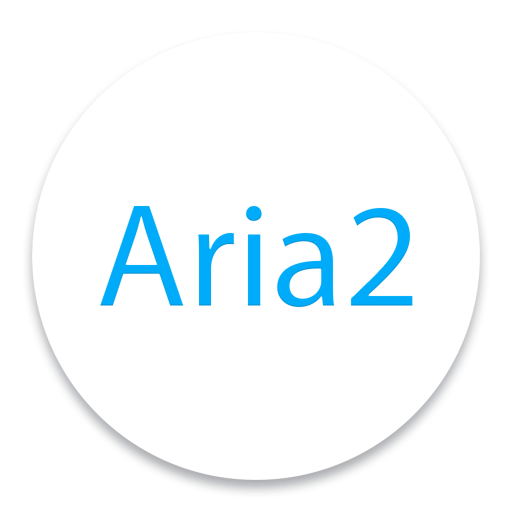<font size=1px>___aria2___</font>

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
#@markdown <br><center><img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAAAXNSR0IArs4c6QAAQABJREFUeAHsnQmAFMX1/2vu2Zm92WUvll1gOZf7EFGURUSNioqCR7x+uYzxSmKiOX6JMYcxasypifrTvz/vKMbkJ0ZRUdAEI6IED0BlkeWQa4GFvY85/t/XM7XbOzuz07M709Oz8wpmu6enu7rqU931Xr2qeiUEBybABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAKDJWAabAR8PRNgAroRSJX31a8bEb4RE2ACAyZgHfCVfCETYALxJKBFuGs5h9KE85ZjU2+qqaGv6lCj/hJmf22fY2vXFkKgr6Dj8RTs8YyrT5r5ABNgAtEJaK1QosfEZzABJhCNQH/vW4TflkOI15vGjRtnuu666zJzcnLybDZXrt1ly82w2TL9fnOW1WrKMplMubh5rt/vzzWbzS58z8B3ZUvfvV5vBrZWHCel3xzcqtPrwbU+HPDgXI/JZGkXwteOY9iaWvBTC35r8ZtMR4XPdxTH6dPk8/maOjt9TV1dnobm5oaG7du3H73ttnU4d60IKg6RBH2k45Sm/n6j3zkwASYQBwIRKp04xMxRMIH0JRDpvQpznAR8tennP1+UVVVVVeJ0OousVkeRxSLKrFZrGRCWQXCX4jMc+24IbjsErx379qAQJ4EeJl4cTXwgQU2KAxQGUwf2O7HfSQqDz+et9/nEXigRn0NJwMf0eUdH64H29vYD9fX1+2644bmmtWs34/oV4YR9uGOUm0jH6TcOTIAJxEggWRVHjMnk05mAIQlEen9Cj5uWL18ulixZ4jzppJPK8/PzK9AYr7DbrVUQ7GORs9EWi2UYthkQpE5s6WPGZygFsi4ELQqiDfuHvT7fZz6vdxuUhtoOj2fnkfrGnf/854e7V658sH3FirBdDpEUgEjHhxI/zgsTiDuB0Ioq7jfgCJnAECIQ7n0JObbcdOut1ZYrrriqJD/fNRYt+rEQ8pMg2CdByI8Giyx8MvHdMYS4DDorUAI6wKQZ2yZE9pnH49kCC8IWj6dzGywGtY888sjeW2/d7A1jMQgn/MMdG3QaOQImMNQIhFReQy17nB8mMGAC4d6N0GMQ9rdaLr30y+XDh+eMt9lskyHkp8N0PwXCbDg+JOypL57DwAmQtaAJisFBKAUf4rMJ4x4+qq/fv/WXv/zlngceeIAsC6ECP/Q73T3cMTrOgQmkLYHQCi1tQXDG055AuHdBfQz7y8WaNddkTZo0daLL5ZzicNjmQsjPgcAvhoDKwT71zXNIMAGwxjgDcQyfz6EQbMD2naamps0bN27csnjxA81hZiyEE/7hjiU45Rw9EzAWAXUFZ6yUcWqYQOIJhD7/6u8YnFdjuuOOO3JGjx43xe12zEHrfj6E/TQI+mH4uJE89fmJTy3fIRIB6AR+mqVwGAMON0Ip+GdbW9vGrVu3fnjCCT9sxIwEEvZqga/epzhDv9MxDkxgyBPgCmzIFzFnUEUg3POuPmZ69NFHnQsXLq7Ozc2ca7fbF8GsPxPXk8B3qeLhXeMTwNRF/5GgQvBac3Pz+hdffHHzFVdcgWmNvQR+OOEf7pjxc8wpZAIxElBXfjFeyqczgZQgEPqM9/o+a9Ysy1NPPVdeVJR7vMPhWAiBfxKEfQlylo1tSmSQE6mJQCMUgn1QCP7Z1dW15uDBg29feeXDu9auvZXGEKhDqPAP/a4+l/eZQEoT4BoupYuPEx+BQOhzrf5u+s1vfmNfvvySKXl5WQvQyj8Tpv1qCPt8fCwR4uPDQ4uAN2gd2IzughcbGprfeOqp1z+88cYLaWyBWuCr94lA6PehRYVzk3YE1BVj2mWeMzykCIQ+y+rvJph/3TNnzpydnZ29GC39MyHsK/HJHlIEODMDIgBlgKYe7oAHxBdbWlpefeutt94988wzaUyBWuCr9+k+od/pGAcmkFIE1JVkSiWcE8sEQCD0+ZXfle3jj7/oXrx47tycHDe18r+ATzmEPvfl86PTH4FWKAS7Ozs7X2ppaX/xpZfeWn/ZZYoyQNdIoS+3Mp7Q7/I4b5mAoQnICtPQieTEMQEVgdBnVn5Xtvfff79jyZKlaOlnLsE0vbMh9KmlT571ODCBmAhAEaABg3UYM/BCa2vnymeeefLdr3/96+TymIIU+nIbONpzXH7nLRMwLAFZeRo2gZwwJhAkoH5We+1XVy+3rFz524mFRXlnO+32CyD0x0Ho0zQ9DkwgXgSwvoFvG8YMPHv06NEXTjnluq2bN6+AZ8JuRYDuo1YG1PvxSgPHwwTiSkBdkcY1Yo6MCcSBQOjzKb9jW2N65507C8aOHb8YTnm+iNH75JQnLw735CiYQDQCDRgvsL69vevJLVs+fPW4424+FOJrIFT4h36PFj//zgR0ISArVF1uxjdhAhoJqJ9Lua9sv40R/DdfcvlxmKd/EUbwnw0/+zRlj1bE48AE9CZAKyHug1XgBQwefPrhhx9+58Ybb6SZBBSk0Jdb9THlBP7DBJJNQFauyU4H358JhD6L8ju2Naa33vpd0aRJY5a43c4r4I1vKnCxiZ+fGSMRaIFV4AMoA49+/PHOldOnf/0AWwWMVDyclnAEZCUb7jc+xgT0IKB+BnvtU9/+Sy/dPa2goOAyu91xvsWitPZ5rr4epcL3GCgB8jFAVoHnDhw4/MR55/3kP++912fBIrYKDJQuXxdXAuoKN64Rc2RMIAoB9bMn95Xtvffem3HhhReegjn7X0Hf/gL07edEiYt/ZgKGIwBFAOsQiLVwQ/zQY4+tev3aay+klQ0pSAVAbtXHlBP4DxPQg4CsePW4F9+DCYQ+b/I7bU1r1qwpmDZt2tLMzMwvB5fUdTAyJjAECHRAGfgQCxT9v82bN//tuOOOw6BBRQmQCoDcyqyGfpfHecsE4kpAVsBxjZQjYwIhBEKfM/ldEfz/+c/WEVVVIy6Dh74vocVfgWvZzB8CkL8OCQLUPbCzo6Pj4bq6/Y9PnDhqD3JFwl4KfLmVmQ39Lo/zlgnEhYCsiOMSGUfCBEIIhD5f8ju2s8zbtj03tqys8EsQ/F8MjuaXv4dEw1+ZwJAiAD1A7Ovq6nxy//4jD1dUnL1NiPdoUSIp8OVWZjr0uzzOWyYwKAJc4Q4KH18cgUDoc0Xfg8dmmT/5ZMWkiorSq9HaXwbBXxAhDj7MBNKBwCE4GHp25759940+99wt4j1FEaB8k9APFfyh39OBD+cxgQRCK+oE3oqjTgMCoc9TL8H/2WcrJpWUlFyD+fsk+PPTgAdnkQloIgCTwBFSBHbv3//nUeeeu5kVAU3Y+KRBEgitsAcZHV+epgRCn6Negv/jz1ZMrCgpvQ6C/wKz2cSCP00fEs62JgJH4E/gr/v27bunvPy8rcGuAbqQLQKa8PFJsRAIrbhjuZbPZQKhz4/8Tlvz9u3bK9HivxZ9/JehxT+McTEBJqCZwGEsQvTE7gMH7hlTXl6Hq3iMgGZ0fKJWArLC1no+n8cEJAH1syP3sa0xvbv53tLxI0de5XK5vgLBXywv4C0TYAIxE9jf6fE8tGfXrgfGjPnK3n68C/L4gJjR8gWy4mYSTEArAfUzI/dpa1q5cmXuggULroTgvx4r8o2kY1oj5fOYABOISABDBPy7Or3eP/77X/96ZOHChUdxprpLQC381fsRI+QfmAAR4AqanwOtBNTPitynremuux51XPGl05fmZufdbLfZJuEYz+PXSpXPYwLaCZAfgS1NTU13PvDA//3tppuu6MClrAho58dnhhCQFXnIYf7KBLoJqJ8Rua8I/urqavPq1atPyMvL+28M8DsZLnvt3VfxDhNgAoki0AlF4M1jLS23zT/++LfgXVCOD5Ctf7ml+6v3E5UejjdFCcgKPUWTz8lOMAH186EI/cD9akzvvXd35YQJk27KyHBcAsGfleB0cPRMgAn0JdCEGQNP1dXV3VVV9dW64PgAOkttFZDfacuBCfQioK7ge/3AX9KagPq5kPuKAvDEE09knXnmmVdmZWV9B/38I9KaEmeeCRiAAKwBezo7O+/+6+rVj1x69tlNSJJaAVBbANT7Bkg5JyHZBGTlnux08P2NQUD9PMh9RfBXVVVZ1q1bVwNz/61YqGcOWv3cz2+MMuNUMAEiAGOA991jx47dOnfu3DW1tbVeHGNFgJ+NfgnISr7fk/jHtCCgfhYUoR/MtWn9+vXlkydP/r7T6bwU0/rcaUGDM8kEUpAArAEtHp/via2bN/8KK2vuRhZkq1+tDFDO5PEUzCUnOV4EzPGKiONJWQK9hD1yIb9jdP9dzoaGhstnzJixOiMj4yoW/ilbxpzwNCEAy5zbZrFcNWXKlNXNzc2X0zusfqeD+0RDvue0zyFNCdBDwCF9CajLP1gh1GC71vzRR59MHDNm5G1o9S8GHh7dn77PCOc8dQnAh5Dn1d27d//36NFL4Fa4ELMF1kpLgNoCoN5P3dxyymMmwBaAmJENiQuCwl7Ji9xXtn/4w/muww0N10ycWLUKwv8snMHCf0gUOWciDQnYMV7nrFGjRq1qbd1wzR8e/6oLDHq970Em8lgaIkrvLFPBc0gvArLMVdtAq3/btrrJpaWFv4K5fyFMidb0wsK5ZQJDmoAHgwTXfP75wR9gKe4P4bJbbQ2gjEsrgNwOaRicuQABtgCkz5Og1vJVwl+YqdVfX19/w6hRI1bBje9iFv7p81BwTtOGgBXTdhePHFnyUmtr6w30ziPnVP+r6wKCoa4n6DuHIUxAFv4QziJnDQRkOau2SqvfBC9i4yorK+9Eq/80Fvz8rDCBtCBA1oBXPv/885srKio+hTUArf7usQEEQFoB5DYtoKRjJtkCMLRLXa3Nq4S/MF911Tj74cOHLx8/fjy1+s9k4T+0HwTOHRNQESBrwJnl5eUvt7S0XX7VVTU0zoetASpA6bIrhUK65Ded8qku26AiEGj1v/vuuyVw4/tLuPFdjql9PMgvnZ4KzisTUBGA34BOn8+34pNPPvkh1vbYF2INUFsA1PuqGHg3lQmwBSCVSy982oPCXvlR7mNbY6qq2mPZtWvXwilTpr7ocilOfVj4h2fIR5lAWhCA5c+ORsClEydOfBEWwYVUR1BdgcyrP8RCfk8LLumSSVYAhlZJ00sqg3xhqYzN999/iXvDhg03l5WVrbDbbdV48eV5vGUCTCCNCVBdgE91fn7+ig83b775/vuvIW+fSr2BraxHJCGuOCSJIbDlwhwChRjMgixL1ZY0+SbThg33jYYr3984HI7T8aKzD/+hU+acEyYQbwK0psDLtbt23Thh9PLPhMiC6Z8HCMYbslHik8LCKOnhdMROQF2Gch/bWeaqqmPmtWvXnlpYWPh7u90+Jvao+QomwATSkQDGBmw/fPToN+cdd9zq2toc+Ax4D5+wswN4bEAKPyDcBZDChYekS4FPuaB9fGoU090dd1zofPvtd75bUlLyFAt/wsOBCTABrQRgKRwzLDf3qffff/8mqktwHeoVpW4J1jPdManroO6DvJMaBLjwUqOcwqVSXXbBl5JM/mtNWLa3dPr06b/G3P7z8CKzR79w9PgYE2ACWgiQz4C/f/DBB9+dOXPmXigB6i4Bdetfva8lXj7HAATUQsQAyeEkaCQgy021nQUN/T3Ttm3bZo0cOfLPNpttGoS/xuj4NCbABJhAZALoEngf3kK/UVRU9B66FyHsw3YJsBIQGaEhf+EuAEMWS8REkUSXUl3uYzvL/IUvDDfv3bv3Qnj1+xtM/iz8IyLkH5gAE4iVABoT0zCW6G/HmpsvpLqG6hzEoaqDlBjl91ij5/OTRIBHhCcJ/ABuSy+XDMEXjUz+w8y/+tVy169+9asfYBrPbfDwlSdP4i0TYAJMIF4EoARkOuz2M5YvX27PzGzcsHr1ag+6BBB9Xegt1HVV6G/83UAEuKAMVBj9JEVdTrSPDwn/teaVK1cWLly48Ddw53sBXlBW6PqByD8xASYQFwJej8fz3JtvvvntRYsW1aMuUq8sqO4GUO/H5cYcSXwJqAVLfGPm2OJFQJaRahvo79+0adNY+PJ/wOl0zsPN5O/xui/HwwSYABOIRMCPwYH/3rHj86vGjq3YxuMCImEy9nEeA2Ds8pFCXbWF8Mf8/tra2vlw3/l3CP8TkAX5u7Fzw6ljAkxgqBAwobvxhDFjyv++f//++VQnqcYFUB5lnSS3QyXfQyofXDjGLE51udA+PjX4NJkqKw9b1q9fvwz9/b+1Wq0Fxkw+p4oJMIF0IYAZAoeamppunDZt2oq6umHeEO+B6m4A9X664DF0PtkCYLziiSj8lywptcGf//XDhg27j4W/8QqOU8QE0pEAxh4VZGdn/3nLli3XUx1FDZVAg0WxAoTWZ+mIyLB55kFjxiqa0Jcl8CJV15u/9+VLXHfffdutubm5P4DpLcNYyebUMAEmkOYE7GiULLjgggvcmZlN/169799eUV8NJHWhWNR1XOhv/F1nAlwYOgPv53ayLFRbmP0h/B/93vdyzzvvvLsyMzMv5ZH+/RDkn5gAE0g2AW9XV9cTL7zwwk3nn3/+0ZAZApQ22Q0gt8lOb1rfXwqbtIZggMzLclBtAyP9n3rqqaJzzjnnz3DreyaEv/zdAEnmJDABJsAEwhLwY5rgi2+99dY3FixYcIBnCIRlZIiDLFCSXwyyDFTbgPB/7bXXyufNm/cQhP/JSKb8Pfkp5hQwASbABPonQNME38RU5a/Mnj17NysB/cNK1q8sVJJFPnBfyV+1DQj/jRs3VmGa3yMOh2M2N/yTW0h8dybABAZGAErAuzt27Lhy7NixtawEDIxhIq/iWQCJpNt/3CqhL0fLzjJXYT7t+o0bp06aNOkZzPFn4d8/Q/6VCTABAxPAgOXZY8aMeebjjz+eSnWbylcA1X/qOtDAuRi6SZMFMHRzaMycSe7BlwCD/TB1hl6Q559/fsbo0aMfQ8u/yphJ51QxASbABGIj4PP5tu/ateuyxYsX/6e2Ngeug7MwCHAtDQSUH4qQBwbGhnXQZ0tBNOiIOALNBCTzPsL/739/YfbYsaMew2p+ozTHxicyASbABFKAABwG7di3b9/lGBj4LisBxigw7gLQtxwiCn8s6nM8hP+TLPz1LRC+GxNgAvoQwFimUSUlJU+uWbPm+EB3QFiHQbKO1CdRaX4Xhq3fAyBZ0xafHrP/C6tWnTCqvPxRCP8R+iWH78QEmAAT0J8ALAF7Dhw4cMVJJ530FlsC9OevviNbANQ0ErcfUfhTy5+Ff+LAc8xMgAkYiwAsASOKiooeZUtA8stFCqbkp2TopkAypi0+aPnDu19VR4fp73//O/r8x5LZf+TQzT7njAkwASbQlwAGBu7CSoJfVMYEOBx+sbkQgwN5YGBfUok7whaAxLGlmCMK/2eeeWYmhD8N+GPhn9gy4NiZABMwIAGz2TwSYwIee/XVV2dQg4gaRmEWEZJ1qAFzkPpJYriJK0PJlrb4BFr+YvNmE5z8TME8/79gqt+YxN2eY2YCTIAJGJ8ATRGsq6u7GP4CPhTV1WwJ0LHIpJDS8ZZpcSvJtUf4K0tkvmdet27d2FmzZj0N4T8pLUhwJpkAE2ACUQhACdj66aefXgTvp5/CWRD7CYjCK14/cxdAvEj2xBNR+K9atap8xowZD7Pw74HFe0yACTABdAdMHDdu3CPr16+vEOI9yCWeIqjHU8EKQHwphxX+NOcVff5F8+fPf4jc+8b3lhwbE2ACTCD1CUAJmAHr6EP/+Mc/ilkJ0Kc8LfrcJi3uElH4f+m663IvXb78gczMzFMxBUaelxZQOJNMgAkwAa0EoASUV1SMGldRMfKVlSvv7xBiGC4dj0+dOgquQ9U0BrHPCsAg4KkulQ+kajtMWdhn2bJlrm9fe+1vsrOzL2DhryLGu0yACTCBvgRMZrNpbHV1dQkaTKt37vy358gRqlYVJYDWClDVsX0v5iOxEWAFIDZe4c4OfSDxPbCq34gRM2y//e1tP83Ly/sqhD93t4Sjx8eYABNgAioC1FCyWq3V6A7IePvtt9/o7KzzB5SAffKs0DpXHudtjAQkyBgv49ODBCQ/1TYg/FtbWy2bNm26ftiwYT+DWcvOxJgAE2ACTEA7Ab9fdLa2ttyCwYF/dLlc3oDb4PcwQ6B71UC5eqDcao+cz1QISMHFOGInoGZH+/jMMovqdhPm+lt27NhxUXl5+T1YD9sde9R8BRNgAkyACWDdgJZDhw5dP3PmzL/sycnxis1OCPtuJUAt+NX7DE4jATZLawTVz2m9hH9lS4t5y5Yt88vKyn7Nwr8favwTE2ACTCAKAfQGuGFFvQvTA+dT3ao0sKihFRgLoG6ERYmJfw5HgAGGoxL9mOQWFP49Xv7WrFs38YRZs/5qdzhGR4+Gz2ACTIAJMIFoBOAoaMfHH398PgYHbmVvgdFoaf+dLQDaWckzwwp/8mX94INPFB83ffp9LPwlKt4yASbABAZPAOOoRmEswH1//etfi3ndgMHzlDHwLABJQts2ovBfsmSJ+5prvv7HrKzMxYhKnqctVj6LCTABJsAE+iUAJaAM6wWM3L59+ysNn3zSdaQECwjVV+OaOvV1XPeqaUTZZ1hRAKl+lqyC2xpYT5pM5OUPrn1tr7/++o8KCwu/iz4rVqpU0HiXCTABJhBHAt6WlrZfz5075xcdHR1dgZkBWRgAuJZmB1CQgwHlNnCU/4YlIIVa2B/5YDcBNSfaxycw3a+2tt1cV/evS0aMGEEj/jO6r+AdJsAEmAATiDsBzAxoO9TQcP3wYcOerKqq8oVMD1QLfvV+3NMxFCLkMQCxlWKI8K81b9z4/JzS0tJfsfCPDSSfzQSYABMYCAFYWTMK8vJux+qBc2praxWPq8oUbJ4ZEDNOVgCiI5Ot/27hT1NR8OCZHnvsmbLx48ffY7PZCqNHw2cwASbABJhAPAhACSjEeIB7sMJqGdXFEaYHyro7HrccknFwf3X/xSofoKDwp+l+jWaaj/qlL33JddVVX8Ggv6yTEYU8r//Y+FcmwASYABOICwEoAcPhbG1ES0vLqv0ffOA5Wob2LA8KjIktC67IuCQblfCvV4Q/HjjrBx9suqmoqOSHeAitkaPgX5gAE2ACTCCBBDzNza0/r6qad3dGRqO3zu32ic2FGBC4lvr/5Yduz+MBwhQCdwGEgYJDUvirfsWIf8z1r6urM7/55punFRQMv5GFvwoP7zIBJsAE9CdgdbszvrthwwuLqW5WfARgdlaYZIQ7Fua09DrECkD/5R1s/csR/7Xml19+eXTlqFG/xmpVmf1fyr8yASbABJhAogmgIZaFWVh3r1u3YTQPCoyNNo8B6MtLaordwp8GmLhaWixXXnllJj5/drtcs3GZPK9vDHyECTABJsAEdCMAJSCvqKhgzLFj3n989NHGrsZyq1/Uj0Qd3b2EMKWF6+yQEmEgvYFIHrTFpwaD/mS/vxv9/qu/W1RU9CM8bKw49ebG35gAE2ACySbgbWxsvq2q6vi73O4WD48HiF4c3AXQw0gt/HEUwp88/QX7/V955S8L4Onv2yz8e4DxHhNgAkzAQAQsWVnub23Y8I8FvccDUF2uhNCtgZKenKSwAhCee0D4w80v9Sk9/PATZRMmVN0FZz/Z4U/no0yACTABJpBsAmigZZeVld+1atWa0p7xAMqgQCn8k51EQ92fFYBAcciHg7b4YL3pgLMfc01NjePcpWf9zOl0TjBUyXFimAATYAJMoA8Bq9U8YcGC439OdXd7e7tSl4fxFCjr/D7Xp9MBhtAzMCQo/Hv6/WFGsuzYsfOyiory30OzdKTTg8F5ZQJMgAmkMIGOQ4cavllYmP94ZWUl+weIUJBsAegNBkpAT7//iy++OK6kpOgWFv69IfE3JsAEmIDBCTjy83NueeutDeN6jwcgCy8HSSDdR7PLhyHY+pfz/dvNl1xysfuaa75yr8vlmgEFQPLiLRNgAkyACaQAAdTbWZgaWHHwYNsLr776vqeqyiuOHBmFlPPUQFl86SzZZN5pi0/A9C82byalyLJz587r4Gf653iI2NWvfFp4ywSYABNILQKehmPHfpw/duw9or7eK6qrvewquKcA070LIKgE9PT7A415zZo1k0tKSr7Dwr/nQeE9JsAEmEAKErDmZGV9Z+PLr01B2pW1XMi3S2Cat5Ib2RBMwawNPsnpqgCoCx37Pf3+l19+uXvmzJm/wBK/BYPHyzEwASbABJhAMgmYzeaCSZMm/Pzqq6929zMeQC0TkplcXe+djpmWeaYtPoEpf0HTvxUPyNUjR478Jbf+dX0O+WZMgAkwgUQS8DQ0HPthfn7ufbiJJ9AV4MQKge9h5cD0XTUwzS0AZPpvN1W2tBAH8+rVayeUlpZ+l4V/It9DjpsJMAEmoDsBa05O1ncxK2Ai7hzsCmhHAxAyIBDkVveEJfOG6aYAqAsZ+z2m/0WLljpnz57+M6zyNzyZBcL3ZgJMgAkwgfgTQFfA8Jkzp/x06dIrnNwVEOCrFojxJ26sGGVeaYtPL9O/pbZ2x6WjR1f8Aa1/u7GSzalhAkyACTCBOBHoPHTo0A1Y1+UJxBecFZC+XQHpZgEIPkO9Tf8PP/wwlpMu+R4L/zi9YhwNE2ACTMCYBOz5+fnfW7ly5QgkL+27AtJFAQhp/feY/vPyRluXLFlyk8PhqDTm88qpYgJMgAkwgXgRQFdA5SmnnHrT6NGjadC3mVZ8pe5gxC/lBN1KvR+vWxsunnRQAGRBBgs40PqnlaJQGubXXvvbgtzc3IvSpcAN9wRygpgAE2AC+hIwZWQ4L1q9evUC3FZZ8ZUGgwcHBAblhJIgKTv0TZ2Od0sHV8CyEKmAsTJUvWL2OXrUYbnuumtzLr74/D9x61/HJ45vxQSYABNIMgF4d7dnZmWh8W/527p1Wzsr3X5xtKxLiPpqpKwO0wPTI0jhOFRzK/NHW3ykr/9axd3vjh07rquoqCB3v+mgCA3VMuZ8MQEmwAQGQsB7uKHhhwX5+X/Gxd4qLBZQW5sDvwDp4xsgXboAIPx7m/6ffPbZUXD3ez0L/4G8N3wNE2ACTCDlCVjycnJueOHllyuEKOyvKyDlMxopA0NZAZCt/2Dem7od/qDP33paTc23YfovjgSGjzMBJsAEmMDQJoABgaU18+d/JzfXTYu+BWYFBAYEqjMeIkvUP6X2/lBVAGSB0RafgOm/rq6T8mt64aWX5uXk5CwL/JbaBcipZwJMgAkwgQETMLkyMpatW/fyPMRgIhlRVXUMcgJ+YhTZQfJDCXIb/Do0NkNVAVCVTsD07/F4UIB7zTVLljinVld/Fx7/MlUn8S4TYAJMgAmkIQF0A2eOHTvqpiVLLnGSjFBkRc+sgCFNZCgqAFJToy0+PXP+6fu9d955ttvtnj+kS5UzxwSYABNgApoJoEF44h/uvWMJLoAVoI9vALVM0RxnKpw4FEe/BwU/CX9q/Teaj3zyCfJZaLnxxm/nLT3vrHvQ91+aCoXDaWQCTIAJMIHEE6DB4GgYjoZseO711z/sOHJkjxDV+f7gtMDEJyBJdxhqFgCpqQVx9gz8wwRPy/XXf/Uyl8s1KUms+bZMgAkwASZgUAI2q3XSVVdffRnJCiRR7SFQneIQGaP+KfX2h5oCQCUQtACoB/4VmO+///6S4uLib/C0v9R7SDnFTIAJMAEdCFiG5eV9A1PES3AvTAtstUQYEKhDUvS5xVBSAFSaGZn+201y4J8Qh8zw9/9Vp9NJC0BwYAJMgAkwASbQhwCmBY4487TTviry8iAbIw4IVMmaPlGk1IGhogDIAgm2/nsN/DM/8cwzVfkFBVegZOR5KVVInFgmwASYABPQhYApy+2+4uW//KUKdzMP9QGBQ0UBUD0ZgdZ/e3s75c0scnPNixYsuMphsxWoTuJdJsAEmAATYAJ9CMAKUDDvhBOuys2tVGTIUJ4WOBQUANmq79X637Nnj1J4zz+5YsKw/Hx2+tPnMecDTIAJMAEmEIaAKdPtXvbCqr9MwG9kBbCELBmsljlhLk+dQ0NBAVDRDrT+A0v9FppIg5s7a9o3MMczT3US7zIBJsAEmAATiEgAg8Xzpk+efHXAClBoUmTKEHQOlOoKgFoTw36g7x+linzVmx976s+T8/PzzsF3eV7EAucfmAATYAJMgAkECZgwZfycF198EtPG6xVr8lC0AqS6AiCfVgh4deu/wJyTM9Jy3MzZX0frP0eexFsmwASYABNgAloIwAqQO3Xq1K+RLBGiIHS1QC1RGP6cVFYAZKs+uFW3/g+ZHn3qvkn5+blnowTkeYYvDE4gE2ACTIAJGIaAKSMj49znnn9sIqaSkxxROwei71K2yK1hEq41IamsAMg8An5o6z/HMm/27K9w618i4i0TYAJMgAnESgAzAnLnzJjx1QhWgJQV/JJDqioAEnxwq3b5e8j0p//5n7F5edz3LwuZt0yACTABJjAgAqbMzMxznn76gbHSClDZ0gK52RQig7qtAQO6SbIuSlUFQPJCIQRa/7SOM/XTiJwcyyknnnwZWv/58iTeMgEmwASYABMYCAGMBcifO3fu5SRbSMYosqZnRoBUBAYSddKvSUUFQAIPbmXr34vvPtPvf3Z3WX5BHs/7T/qjxQlgAkyACQwJAqas7Kxlj997L1zJ01gAr2moWAFSUQGQTxQKQt369yIvR8znnnvqxTabrViexFsmwASYABNgAoMhYDFbis4444yLEAfkjHfIWAFSTQEItvplf4ts/e9VWv+33np7QVFR0aUw2cjzBlPmfC0TYAJMgAkwASIAx3K5l9555+8LydKMhYKGhBUg1RQA1aMoW/91KAz0/aP1f8mly85xOBzlqpN4lwkwASbABJjAoAlYLJbyL35x+RKSNYGxAJA9PWMBBh1/MiJIRQWAWvf4qOf9+0ynn35+Rmlx8eVo/GOgBgcmwASYABNgAnElYBk+vODycy6+2BWwAkT0CxDXmyYyMhKmqRJkWrGtMYtquGfcvJlGZVoxMMPy9ttvnzFnzpz/xbxNR6pkiNPJBJgAE2ACKUWgY+vWT/9r0qTxqyB7vJA9HlFd7RWbC31CrMVH+IO5kVtDZy7VLACkBODTu/WfVVpqHTtu7JUs/A39rHHimAATYAKpTsBRMWrklaXjxqHhSWMBUtsKkCoKAIEOhhql3yWw4l+g7/+J+x6cmp2VfaI8g7dMgAkwASbABBJBwGm3n/j4fQ9Ok2MBIqwUqJJZiUhFfOJMFQWAcktA8end+hfZ2eY5c2YswwCNrPgg4ViYABNgAkyACYQnAEtz1vSZ05ZlQ/akuhUgFRQAlSYVaP23t7cj3YU47jfdeuONw+H2dwnP/Av/sPJRJsAEmAATiC+B7Ez3kltuuW04ySCSRYpM6jsjQCW74nv/eMWWCgoA5ZVA4hNo/e/Zswf75PjHZ77wwotPt9vtJfECwvEwASbABJgAE+iPACzOxRdddN7pJINIFpFMquroUGQUrgvKq/5iMMZvqaIAEC2l79/j8RBcpNtvmjNnnKOsrOQSnvpnjIeJU8EEmAATSBMCmBJYdMmsWVOdASuAMCuySbECKApASmAwugJAwj4YapRtXV0d0pyPj898++23z3a73VPkGbxlAkyACTABJqAHAZvNOuVPf/r1rIAVIB/ugUk2UahR/gb/qGSY+rAx9oMJNkZiIqQiaE6Rbn+LAkCzMs3VkycvhSkGThk4MAEmwASYABPQjwAsz67x4ycuFZBFgbsWqd0DB+WWfukZyJ2MrACoNKcaxfwPDQvH0Pef6zP/6JtXF8A3M/pgODABJsAEmAAT0J9AZqbr9F/+4NuFJJMCiwRBRqXQYEAjKwBUmkEtKmTq31Gf+aKLLjjFzqv+6f/E8x2ZABNgAkxAIYApgcWXXHLBQgGZhK4AklfmVBoMaHQFgCArGpV66l9RUaF1xIiSZYDPfv+Vx5D/MAEmwASYgN4EaAB6cXHxMpJJfacEKg1YvZMU0/2MqgBI8z+2s5TpFeqpf7/73a/GZ2VlzYwpp3wyE2ACTIAJMIE4E8AKtDMfeeTe8X2nBM4KWrCVG0qZFue7Dy46oyoAlKtuYOqpfwR5zpxZZ2DwX87gss5XMwEmwASYABMYHAFYAXKmT59+RkABIMdAwSmBPdF2y7KeQ8bYM6ICoIJVoxr8V2ASuX7TvHlznEXFw7Emc4+CYAyUnAomwASYABNIQwKm/Pz8JXPnzs8gGYVVAk3KgPUUGAxoRAWAnh9SAvDpO/jv1lu/NzPD6RyThg8ZZ5kJMAEmwAQMSMBqtY753e9+OiPVBgMaVQGgIu4z+A8mFsukSZNP47n/BnwDOElMgAkwgTQlQD4Bxo6tOh3TAjEwPXR9AONaq42mAKjN/4KmU3QP/svxmc8772x3fn4u+lo4MAEmwASYABMwDoGs7MzTzz77DLeArOq9PkCNOpEqGac+nJx9oykARKHb/B9EEgB2zGe+9tqrZmHE5YjkoOK7MgEmwASYABMIT8BmtY741rdumC0gq4JnBIV9U1CmGc8SIBMaPkdJO1qjmP9ra2uRvgLF819mpts8fvy4xTD/Y/EFDkyACTABJsAEjEMA3QDOceMqTxWQVQHPgAVmRYb1HQxomEQbSQEIakukJcnBf0VIH7wr+XzmU0+tcRcU5C8yDDlOCBNgAkyACTABFYHMzMxTL6ZuAMgsRXaJolDPgHS2lHWqK5OzayQFoBeYwNz/AwCFARWNfvM113xtht1uL0sOJr4rE2ACTIAJMIH+CVitttIbbrh+BsmswGDAA6agHxt5oWGEPyXIaAoAkhQw/wcW/gnM/RfCbRo/cVwNzP8ZkiJvmQATYAJMgAkYiYDJJDKqqsoXosta8VvTj08AQyTbKAqA1Iqw7Wv+nzx5nDM/N3exIYhxIpgAE2ACTIAJRCCQk5Nz6sSJ45yp0A1gFAWAUAaVgPagyaTH/H/LLddNyMjI4NH/ER44PswEmAATYALGIGCz2Ub84vZbJvTtBmhXNXSNkVYjKQAgQuZ/IXqb//3madNmzIP5P9MYyDgVTIAJMAEmwATCE8BsgMxJ4yfOwxgAzAZQuwam8yHjDBSMoABIINj2Nf+7CpyWwsJhp4KZPM9A+DgpTIAJMAEmwAR6ETBhxtqpBQXDLEbvBjCCAkDkgsK9t/k/y59p/slNPyzD0r8Te+HlL0yACTABJsAEDErAZrdP/MlPbikjGdZ7NoCxugGMogCgGPua/5uaGk2LFp0822w25xm0nDlZTIAJMAEmwAR6EbBAZi1efNJskmFG7gZItgKgMuuHmP+9XlpUwVJaWjofCgD2OTABJsAEmAATSAkCluLi4SeRDBOKLINDu95OgWQmVDJQHtJvm2wFgHJKABQIvZz/4Njxx89x5uXlzdUPB9+JCTABJsAEmMDgCbhcrrk1Zywm1/WQbzQYsJdToG65N/g7DTwGIygAlHrF93+v0f9NftMNN14zAessFw88e3wlE2ACTIAJMAH9CWDmWtH3v3X1BAFZ1rsbQBkHoDR69U9V7zsaRAGoUZb+JROJ4j/ZT9qS3zxjyrSZUADcvZPM35gAE2ACTIAJGJsAuq7dkyZNmkWyTCgyTd0NUGOIxCdTAZAaELbKcokAcgAfvynL57O4XBnmYYXDTsYBeZ4hgHEimAATYAJMgAloIGDKz88/iWQZybRgN0Dwsu4lgul70mRcMhUAmXHF/N/e3o600NK/flOT3206//xzsrMzM6cEafGGCTABJsAEmEBKEXA4HFMuvvLSbJJpwW4AsyLrlCWCFcGfNOFPIJOtACAJNZQOsWfPHoCAiYRMJc3NpgsuWjoR5v9c5Uf+wwSYABNgAkwgxQhgHEDuFRctm0QyTXYDBGQdZaQm6blJlgIgtR5su6f/BY7ROspuv2nShAlTefW/pD8fnAAmwASYABMYIAG4BXaNGjVyKsm0gFdAiqjIVNXRocg+fFHJwgHeZBCXJUsBoCTLjIve0/+yTC5/hgWr/9H0v+5zBpFHvpQJMAEmwASYQFII0FR2kmlCZEGe0QD3XtMBKU1Jk3PJVAACGUdfSK/pf36f6ZQvLHDD/S/3/yflceWbMgEmwASYQLwIYCXbKeddeLZbQLYZbTpgkhUAOf2PNKBg/7+/yXzZxRePR/8/u/+N1xM4gHjavUK0DuDThmu8/gHckC9JOAEfyqUD5UNlRB/ap2McmAATSBwBGgdw5WWXjReQbXIcAO4W7AaoSdyNNcRs1XBOvE+R5g5s5fS/oAmE+v9bhKl6QvVEQOP5//EmrzG+/W1+Mf/NLlHfofEC1Wk2lOrvp1rEpRXsvVmFJam7nT4hXtnvE0997hX/afCL/e1CWFBOI1xCHJ9vFleWm8WcYWblWFITyjdnAkOQAMYBuEdVVk6AbHs3K8tnbhIWqN7S7N89HZBUcZKNuqrkyVAAqIgpowjtpsD0v0J89+CDPhJXp7mgIG8mfgyeo5zIf3QksOagT2xvwQ0H+Cg+vc8nLiy3CFuS7Us6IjPsrXa1+MU1mzzixYN+4VdVO5TgQ1DwNjX4xMM7feI7Y83iJxOsws56m2HLMpaE+fHukiUOul+3lYf26bgJNStVrvQx4w+9pqQQ0nEOCSFgKsjPnyFcGU82CTsot+FTGJR9DlnLEn25n5BEhIs0WQoApQXz/zH9b/Me7BYE+kY8XnNpcbY1MzNrerjE8rHEE/Cglnh6L/4M4lF84xC1Mn2i3MUaQOJLLPIddkP4L3unS2w4EjwntIIPfqeugF9+4kO3QJe4Y7KNFbfISA35Cwn1LnwaOvxiS6NfbG32i80o+z2tflEPa96RTiGOdaFLD681KQVWlLsDr2YOav98B8akO02iHNPUp+AzNcckJmSbRBZOsvLrG7fydrvd00pLcix7DzQrvm7EUb8J0wGFqM4RYrOiiw2ixh14MpOoAFD//x5TreL+tys4/99vuur7Xy91Oh2FA88SXzkYAnshuP91eHDPYiMqnFcP+MWXRw0mJXztYAh0obL/7keeHuEfLTIU+R+2+8XkTK/40miLUiNFu4R/Tx4BEuQNnX6xDsr264fxzh7yiY+bAuN2FOVd/QqHKn7BZB+kLr5m+kIn40PnQejnQyrMzjeJLxSaxVnFJlGJJe3ZmkecBh7QpV1887dvLv3WdT+uEzk0E6DbLbCvVtQg4rUDj3wQVyZLAQAA2f9P7n/zBVwlom+kxXTCvNlj0WeSPYg88aWDILAagvvwAPr+e90SdckKWBFoHAC1NDjoT2A9hML/7VNLgehp8EJp+PV2r7h4pEW4klUzRE9m2p5BLX0amLuKxnPs8Yq1EP6HoWwrdn6iohb06v3+iIWeh2eALAav4Nl5Zb9X/GCLEPNhoL1mlEWcWWLm97k/lv38hnUBsubMnjlOiJadGAYQHAdAsi8Ln17jAPqJJf4/6f2a0+MWfOTaTYH5//Qd7n+D/f8jy8vHQVuyxT+rHGM0AmT+f/Zz/IlD+CesCPvafKLSzRpAHHDGFAUJiucgJMi0H2vYirEfm476xAnwys3BGARopkYdTPoP7vSKp3b7sI90kW4nhbfcxjO5spbGM0SNgtUHPWJmrkn8eHxAEbDz4xETbTRq7eWlJVAAMl7rGQcggjJQWR2Q4pMlSaWrS0hWMSr9/73n/3uVKRK52dmTdck536QPgd0Q2OsxSjweoQV9ji+h4uCgP4FONOXfOwJFbiD4UeFvahiA5qB/Nof8HUnw1zb5xfUYxDn99S5x+8dB4U85l6JCLwpIy0bUDUvf8Yhz3uoS25AunkIaG3wsbjM5IwMDLvyQdVjzhsa+KTIQY+EQ9C5R5aZJUgBqlJsHMo2+EJr+hzUASnKHYwBg5kT5I2/1I0Cy4hUIbDL/xSs8t9eLVuhApFC8UpCe8XhgAjhME/1NA2CPa/e3ewBuANemJ+6E5HovBu/9YLNHzFnbJf70mU80QaE2RIBe+TLqiblvdImHdnjY50cMhQKHQBNzi7Osii8AknnKOAAp+GtiiCl+pyZJAQjx/08LALX4TV/++kVFdru9IH7Z45i0EqD+32cxTzxqIPsyfTQIiHUYfU4jkTnoS4CaEjY/hPhA0PvwDNCHQ1II0ODNZ/f4xAL44bgTMzOOxlEhj2eGGjBO6Nr3feL7UFLq2wfyoMUzNakRF7q2C67/5rXFJOsUJUBJdq91AXTPiJ4KgDRxKNtQ//+orUzzZs8dbTKbM3WnwDcUdc0+seFoFBAk+D2okbrgScYbXUi0odXyIvqiOehLwI5J3RUZUAC8MbbkqXx9HjGqe2qyvulO97vtRD//dTD3L4eZvVYZnR8PIiSc1Z94xBmIg5SVX0NJueJdjzjISkBUsBgHkDlv5oxRJOsirAvQS0ZGjTAOJ+ipAFByAxmE//+AAoDZftQXQj6SXcJUMWrkaIvZjJmpHPQkQNXDKjiKORatteH3iRJbl/jlBLJeUQuTruw//BVOgdq5G6B/SHH+1Wo2i3OK4NHHA0Utlo5atPwdvnaxsMSOFMm6KM6J4+j6EPD4oHxj1saidV3igR2QqtFfqz5xKO8iWW48aJp3tGK6AOYENjcI0Qgz3LHgh/abcKylET7YcA6dS9doeI/73rDnyCp0CVwJJeAQKwE9UMLsYSaAo6S4aAzJup51AQoDi+FBJgYvkdswMcT/kN6zAJCDGmSwXihOEAT8kJL5nzQiv8+cnZVFUwDjn0uOsV8Civkf/fVRAyqqpeVW8bXxTvG7z1oEdIao4W1YFXahG2AcLYTFQTcCy0a7xe+3HhQftEFZc2RAnkfR9cmi09Ysrq0yi5HZpABw0IvAm3vaxNINHtHod6KcYnhPoJArljiyynW2KQLd5e8U07MsoizfInKcmM4J1455sAiRDt6IP21dXeIYfH3sa/KITY0YWyAw4cqG+9rxjFhR7mYojrGkIQiJlIA7tnnFryZb2aV0Pw9OQX5uFcm6gMwj2ec1QxZ6RQ4cAimyca2GWrWfG8T4UxIUAAEHQB3SARBpn0p/CI2OzHRnYpoEB70J1ML8v1GL+R8Tjs8qtYpcVCxz4CjkH/UQGpb+H6EOdAOshBXgO1lRBJDemR7i98t2WMRjJ+aKs16Fst0Ga40DS2uEq9xJiHRBgLQ3iaXD/eIns4vhHjYGITTEOeqRvephDuH0tolGEsZR3idUmGi1U5kFWvqWrjZxEpZNO3mUS5xRli+qClwiC843bPDxS+UY2qDyo7VPRiEPtP5m2PC31beKF3a1iJd3HxbvNkL4O9AD68AiEeGelSgwfl/rE2PdXvFV+AwgF8Mc+hLIyHCMJ1nX1gHX90rjl84pMkMmwiGQ/iEJtbLaARB6QoIWgKljq50uV8ZI/RGk9x1J3aRRvVpGGbstPjEz3wYXoWaxaDgqC42mw+egALR5dFVs07tQg7mfWpQhVp9RKE7LxMTxxv0BkzBa+YqJuB3HWo7BPFwv8loPip9gfveji0tEtqN/hY7Bxp/AcJdFXFkJ4Q9XzJHfKbw/NKaDyq2xXozzHhK3jjOJLUtLxKqlo8RP55WIeRU5otBtE06rRaArtY/wp5STQmCBdHbYLGKYyyaOxzU/n18i3lhWKdYsyhNfyEb8zfV4RmBRiHEwKI0JuGmzV3wAPxIcwhOwWu3lUyfPhMnFbwrIPjqPHAJRkLIx8E2Pv3q/7Ype2McBUEun6YILvlBqtdrQTOGgJwFy/vOMFvM/WopzYKWi1j+FEwvI1NcJ0yIeoSgtxg3odtyJbgDyMc5BXwLjCzLE80tGivW7G8VT25vEZ8daRBM8BDng670o1yrmF7nEuVWFoizHwS1/fYum+24klL8+LkPcs71RtPlhhjcF3rHuE6jF34nxHO2NYo7bI749N1ucWVUKZQ0um6O8e91x9LNDcVBXQc2oHHFCeZZ4Bem4/t2joq4NlgAnPNVZQtLTT1zkBvz7H3nFyhPZfXA4TFjm3v31/7qwdP2bb3/alEX9orQwkHQIpFxB33VrLemlACiZVLJHAwCP0cp/hZAmWAPAExgAOHly9Qiz2YQnjoOeBD5BP+AmNASjBlRCx8E7nJNWEkGYBOFRau8Qu9EoiRa60FPwNDwM3pKNVkm0k/n3uBNwYFWXk0flipMqc0QX+oF9sNzAOCys6Bum1iCH5BOozLaJC8rM4vG9sALQeA0S7GRho/59WG2qbG3ix8dliwvG5Qk3BH+igh3Pytnjc8X04gxxzRv1YmUDBgxmkBKgXVS8ChfFT+/2Kq7A+enqXVIYCOiqqhpTjoGA27oHAh5VDQTcrJwvsSVcEdC7C0DJWGAAYMDzH5lCqC9kxIiyMmiiPAOg9/OS0G/0dNHgnVbUOf0GxdTvFWcWUyUQeDZdMCGeMAxfNZoJ/8HdAP0i1uNHaulRBe9E2TmwugsLfz2oa7sHlcWNE9D+8QW7Aei9grk/o/Ww+P4YId46r1xcMaUgocJfndIRsAg9flqJuLQI1ocOdAtofM8pDjJY3IkBgcewWBGHPgQcw4cXlpLMk7IvOBBQniiFv/ye0K3OCgCtANhBGQxkkiDQJ8NvwnKJlfEwZyWU1hCLXDH/70NFoyHk2fyiOq9niQZYa8SiQigENIhMg8XqPTQkPoH7UA5MgAmEJ1A9zC7OLMQ7QiP6MT5jsrVRvHrqMPGL+cWiMLPn3Qt/dfyPZqO7796aQrEoB2Y+6oJQ3nVt9/kQsxBfwIJg/Mb35QWXwJUk8xTZpygCyjmmgGys6XtBAo/orADIQQ6lgSwFtaAMv9PsdmdUJDCfHHUYApuP+cRHEMxRA7R/GmmcE7ICyPzhNmE3Q4HQ8JZTA+JZWAE0jhuMmiQ+gQkMNQJ2i1ncMBZG0JYj4mulXrFmSZk4cWRWUi01OU6r+J+T80WphZx/UX+fhpedCgbtgj9j8SKaYsyhNwE0ditI5oGlaiZAUCbqPBBQTwVAZdrYq2QePUvKMQfmRbpcLlYAej8nCf1GgpjM/+Str/+AE6H5zyuwCBv6jNVhFOYbjyavcRql+otoEbSwUyA1Qt5nAr0IzC91ib+dnCfuWVQiCjCi3wihMtcufjYV47Np6mEMjqX+g6nFmxpYAwgtQ4fDUUEyj44HZCAUAUEysTv0rmi7D8d/R33T+MfeJ8Z2U3t7O+6JAYDQfpr8bkUDOmnRiW4slJDf53Q+kDACNCtvhabR/5QErzgH8/9lz41MFA0uO7UYxamxf3ATzIJbjuLGHJgAEwhLwI3R+OdNyBdkDTBKoAGjF1dliuNzkSLyAKoxkPuJV+EtTGP7QGOsqX+a1WbLP/30xZnUBaDIQLIEQCYGZGO3R0BdMqrHU0baTOBTrcoTPUwU4BZx/nEnFGMPrqg46EXgfWjmWyCQowa8vRNdfjEiTB8kjdk4rYgUA2j5Wt5ynLaCuwGiIucTmIDRCLjR/fcteADV6gJcpv9v+9ENwDq/xG3LDmsAAEAASURBVKFsIQwzFi9eVKS4BKYjUhbSfkBG9shMOpbAoIcC0Cv5fWYAYGWk0aOrCiFM8HRx0IMAyepVB+GjX4syj9b9CZj+lxXS/y/TeQLGARRYtQ0kpGtWHYAHMnYKJPHxlgmkDIHTyp2i3EnKvvb3fTv8TtHSxhx6CJCsKy8fUaisCtg9DkBxCdxzkk57OioANTJLpN0EQnAQYFlZYQGWSmQH5JJLgrddeB9XoD8+aiBNAf3/ZxdHdjiSgznJczBAUGs3wEeoED44xhVCVPZ8AhMwGIFcuBheQl2BMYwDOIJGxkfwNcKhhwAUAHsBAnWDUzdAzy/B2XGiRnUosbs6KgBNwWkOwdGOvuCCCOgeyM3Npy4AHdOSWKhGj33jER+m5GlLZabZI44fHlk3I7fAin8AmvyrZYQwGg+kfMRQh2hLKJ/FBJhAQglQl9+yETQwkawAGpV4vO+auhoTmnLDRW7OyckmmQfhDwVAkYWUxtLgNHk5Wy7x6U6C0N2rZFrOABBOv8npdBIMDjoQkOZ/eIONHmD+rykwiWFB97+RLjij1C4cUBS0yH+K46X93A0QiSUfZwJGJkC+QHIitwfCJn0L/H+Q90kOPQQw7b2EZB8dUc0EUFsDek5O4J5eCoCSsZ41ALDsAWUb5g9nm9/sdDpKEphHjlpFgMz/f4Vb3qiBXli06hdjXXlblBHJIzOtWIKUzteiVQjxKRyLvdfAFYK6DAg3LabSDoSt+LRgemYLtvSdHDYxLaouAiw6g5zagqyIl/zQMVJuiSVbmdRPWHz2aSzQ9FhW9kTN/1kr+/8IpZ+R4Sp2+tGnQjMBSBYGgikoI+mbLsoADeHWKWANAA+tAYAmZS62tAZAht8sPDkmrAI4XKdEpP1t3jnsUwSwFhAmk0ecXRZ9cgYpCEvLrGL9FtS6FhJVUZ5dnPYspiAuKDSn9bKhJKAa4C51HcrkzSN+rKLmF7uwaNJBTLfGku3CDozFGBq7uNAkfj0V7nujKGJayjRVzqGR450Q5Ac6/OKTRr/4uBkfsNnXLsShNp84Ahf5jUEliZRaeuLIUJWFGi0XVuoCh0kUu0xiAmYaT0f9OjXXLApxjMaykpt9DgMj4IQvkEqsYfMG5vhrDQ0oM7IAYCSR1kuG/Hl2u2248OOBzOgyiw7IwlxYA44WBGWkflMBE60AUIkHPjS9QVl0xkQSAiFg/siGU3K7w4EBERwSTYBaUM/D/E4Va9RAo/9z/KJYgzMSqlDPKbOLWz5uE51+1L4a3nNyQtSEmjuHpJzRAji9ftAj3jiCgSlRpAU1hq4Z3bNIkpasUIt+E5ZMfWinT6yANeYwhBl1qypBhQMOYcUxCLlMsz/gUS3GNWA6cKPfbveJjsCrFrxB5I0Fr+alWJBmVKZehsGetNCz2QEGtTAXvwGFaM1hv+JEpg4QFG9yVGvQRwYVJ3moGb1Qh6A8KYEilBcgOzZ4rJwKReCUIiir8F0xIw9lFiPPYMxpvaHXYaQrtueDZv3QPw49BDDovYBkH1n4pCxExRmARLJyc1BuBi5JGLxEKwCB5Af/BqYA5itmD+UQzB/HHTcr02a18hTAXqQS86UVzarnMQ8/aqDKE+b/U2D+d9nC1LRhIhiTYxPTsO78hmY80RpWDvusVYj1qOhPKzFgLYwsvwoF4FcfYyeKAkD60Zcr0PrEGuzRArX4d7T4xY82e8Tf9vlFB03DlHjlNkwk/fwU5uyeQ5244a1bPbiPxgobNzo+W+iqAJC5ntaPfwbP5SoopzRgrHs8aWjGQ7/3ZLXvnvpccKcVKd/DstTv4V53bfOJmcjnN8dYMKrdLPKMqIT2zZFhjoxwAq6ab5SUkSKq6GNRzkunn6EAOBcuPD7z6VdfDKisymwAZSqgV+Rg3XWdgsaaYbCpqZER9Dw2Sobh96C6Ksfvp0WwOSSaAJn/P0P/u7bQJS4ZSYsz9hRZf9dRN4AyQlgZB4AaN1qAHvJXVPhGdRKST/Kcsh7lA3muqW1Drf4/b/eIeW90ib/sgfAnzV8b2mgk+/1decGj5EGdRx2SpAiD+na/eGiHV5z8ZpeY96ZH/PoTrEsBs7Ii/ClHiUiIjBNlsRHKwJXvecV8lMeK3bCKadCL+wWdNj+aRCZWkoylgJRnUEOVkDYIAxm1T5kyPSDpg7IwmP/gU1qjCw6dFAARnN5QFMickmHYJTEAsLxyRDaml9DcEg4JJEAa+Mr9fmVwVNTbQIifCPN/BVr1WgM1lM8rj202wCqkh7oBjBiyrVJaREkdkk/Cvb9wEMLu5o884psf+kQ9+kPTNdAzuB9OYW77xCNmrekSX93oFe9g7EP3gjEakceFX/BeW7AY1kXvesRF67tEHWlzHKISoHEA2hU0P7pfokaZjifYKisrskkGKl0A3VMBi4LT5fVBolPRyHmNyggx5Fd2Spr8w4eXsAKgQ1lTP9xKtLijhqD5fzEcfri0CsFgpKOybTCtohLV6C98F/p3/3VIQ5qiJjr+J+RQ14cWgYTs0oC9SGEPBq5dtsEjfguzc7egi3TyED7e2uURf6wNWEB+vNkndqMLyCiBVrn9+16/OP3fXeJNeMg0qlXKKLzaMWZNc8D7kW31C5NOkkZzupJ8IpZTt+UV5KIjSo6JkwkKykidVgXUuVhCfABgIGBebpYbFgBdxyJI1Om0fRvm/zqNla5JxGb+lxypG2A5OQrpHrUlf4mwReVg1G4AVwxPZKRBlQfQ2v3ye13KgigRCKTN4Tf3dYpvbmwVdRjNP/CAa0lBJYlNXU3dH3xXjlPcA4//UwxSPne9Rzy208NKQD+FdIxceceAOc8OBUCTNt3PTYfcTyZrVlamGyAVbQrjU7GlfZKR+oUYqrkBJ0rJkNoHgOL6wN9pcsIS4HZnu81mc/QRVAO+PV9Ig8/+D+b2aKZqhRQq1ZOwOEV5lnbzv5rwuSMc4odbWkQ7DevQ8Ci/jHQ1ohvAaAOxaLVuJf0aKjoavR4aaB767Z96IPxDf0nP7/PgTXK4tV0c9OG5Mml43aVAJyFP69B7MR2CtvSdfNGTEtAthVBYZjxs1JNIA1CtePas2FK1EmPT8yhmZNzwgU+4LV6MaSEX2OlZXv3lemcs3VgoxxFOTAFkkL2QotFrcbucbpKB7YpFnHwB0LwfEeoLQEMN1CvqmL7ooQAgQXJeIy0D3IUlELttSKZMV0YmDvJrFlOxxXZyEzR28r4XNVCliwr2jFKLyIjR/C/jHpltFcdBgXjzKCprS3QlguZ1r4HZ9XxUtkYKDurnVObmRX80Q70qksJ1/2cecc9nCX13jYQralqysGbEOSVm8eBuCO9I+j4JdRLyHgj7LjwYng5h83aKqZjLP2aYTRTCLDPebRWj3A6RjfjI4oQBxHCW5BdHsPbsR01dYntjq9h6+Kj4z1Gz8NkwuciBRpYNg1nhslprNYNoxI2bvWIafAeMw5x3Dj0E6NneE8viPijTatTwMHn3RMJ7RMCU4eiWfUGZSBYAkpEUpMwMfEvUX50UAJl8ZBDCQeAdV5ZCxMIwdrsV/SAcEkng3+hnp/nUWoIFhXNhuQunDuyFpbUBlo+wwrENKnMtToFQoTyNtQHOgdJh1blDqj8eGTHoIx1UK6rCp5jLfsvHMfT5y9YuCUClZauKDC0nPy2bATcqqRzIn8JF5Q7x4C40sSm/skUYVDpFF2ZDdbYKi6cdA1CFmIuV575QmiMmFblEjtOqCHulFdnPY7kMgHwoi050Qe0+1iGe294oHq89DMUACkAGWlikCGi0COzBbJn/QvfN88djtUua9sZBIUDKVp3mmUR0iV+MzUztZzdRRe902gOyLwNykSYDkmw8SkqAfiGRCgBlJPAhxwbKQyMHPCCTZPpw+E1Wq40VgASWN8mm5zDnvHt6VX/3wuC9BXkmUTZA87+M+hx0A9z8UQsGuJK5N/rzvKbeLw7D41tRRvRz5T0SvXUoJmXcpbdsD3tb9SBA6g745gddokE6pAl7BcWLiGmwZBcEIgk/tHaFr0uYYYHJxGtCt8VK2cIHhcpncaJhDGeZttSuSOeiG6DC0SZ2Kn1RUGrIrN8BzbSjRczJ9IqLqt3i3FGlojzPIeywwNDiM7EGamk6YWEYW+ASNw/LENdM94q/bG0Qt35wROz1oCnqpOaoNo7/PgxLDqYq/mCCNa09VqrLgFwufwgFV1PAM+4yecUUcs3IoQ8Bu92ZTTIw8IPc6usMKJEKQK8M19XVIaNwA6z0d+AnbGGgM1msFlYAepGK75dj6F9/5QCkUrSgCCSfOLPMAqc2sVe86uhLsTbAiVAkVh9BbaGhWV8P2fd6vQ9+B7RVzOp7JWofFmbNQd0F8NI+r3itvp9LibMHQh+tXXNHs5iP1u5JFRliUXG2qMh1iFyXrXvtBQ+0t8Z2jzja1iUcGhwN9XNXQ/yUCT+8S2DpuWc7mfc9wt7ZJM4tsYobqvPErNJMkUEKzuAevV75JAUiy2EVX51WKE4dmSWu/me9eIWWonbCGmDRVsB31vrEhSPQiuWuAIXt+w0+0YjHV1OANavc4RMjs7Sx1hTnEDrJCtlHMjAwBgAZU2Sj36TIympqNSc+6KYAICt4tQN9/25kVDEIoOK3WmzRnc0nnsOQvcM6mP93aRy0Y4X5f2k5+kwHWQtTN8CF5Rax+jAN1sIjFq0lhzqZlgimQVdGmTNM6aBka2nrdAaVd1IEfvmpN8J0P8TkxQkdrSKzs1F8caRNXDu5WIwvdKK1G3mwWV6GVVTkDQ1HmSSQLym3ins/2CfOK7aJH88aLqYUu6EjxlHqh3mTqRxH5TvFM6eXiK+9Xi9WHEbfo0ZLAAm7n3/iFQ/PsmIgW5jI0+gQ6a7/gLVO00tBXGB2PBnrWNBYDQ59CUAByFBM/+hx7ZaJARmp25OmQ8nU9Mk5CX9IfRMeKHQBmIdG7dYnl8k/QOb/ZzG/ObRbOWzKYI4+ZZgQZRhkFY9w9ginyMRIaq21xeuHsAgOHOYYJZARRGu7xRtUAFYf8Ip3j4bJgdLqh7m75ag4Fe6S151ZJP60aISYWuJWWvbR9KMwMabsoRmFDrH61ELx9JnlYgZa/YkW/mpQNJbg/oWFYm42nkvqdqFy0RCeg3K6tVGDFU1DXKl8CvkSeV2LNZEySWwxW+P0Iuo+0U2epRReM1zgkwwkWRh+WEVNwvOjgwIgvQCWBjIjuwCUb3ZMhoAWxCEhBI5ipbnXYFqPGpSXFeZ/mGMdGkz2UePDCTRi++R87FCrV0M4hpbWa5gNYJRAlZbWassDftSt/b9wKdtH2SK2MPnbWtEPjb7k/zsrIPgtCW71GoVjaDoybFZxyqicpLUKyaLy4Am5IttPYy60PZu0NPOTVLba9IXQLA+Z7+9jCe/3sVaDpoAXocjSJRYWs5f3SLxMwpwhHKq+pW7ZWBr0nBvpyvgd10UB6JXcYD+H0t/hcAheCKgXnbh+eRPm/z2azP9+4fB74Mo3fsYYatkpawMoc7Y11Jw4hRaEMYpPdhtW4NP0ciDd/0CraC2UF3Jt3CsEhb+r45h4aG6m+NHcQuGya7Ur9IqJv8SRwKQCh7hhPGYE0FgMjVKdVm2kFnC6BvKO+MgeaLmadHScDMX/DEz7zIXCxSE8AZu0fqtlYvhTE3ZUUx03uLtLN8BhYzFZzLwSYFgygzwozf+aXli0hE7BgswlcZ6ucyZmA+RaaM6ntorzTXQDHMBa70YIsTgu+d+dfrH4LQ8EREjK0a1CA/3+NCdTXDoxV6Rrqz+EStK/knXnGxPcIt+KAutjsgmfPFq9khbTStewu9WH2UQa84/X3ezvFJdVONj8388DYzIp3d/9GBr7lZ39xKz9Jx0UgN6JIX9HMsAAAIddZvzlEG8CNK1urVbzPwbrLCmzYTBafB+HAmj/CzHxQ2s3QBMaZKsOalMW4s0rND7qCYlp0Fdossm8jAF/3x9vE5dNyOGKMBRwkr8XY6zLcgzE1NoNQNNo12BaoEaDQZJzF9/bU57/d5dPHNFkTcS94cxpuhsDAEvjZ1GMb46MERs84DpJBsqglo3yWKK38a3x+02tF5JAGS2laDzw4IVBgH4oQWa2EfXLbWA/kvn/c3RzRg9+kWHqEmejtR7vQC3eC2htAK3dAEjAXzHgKpxr3XinLVp89JAqD2q0E8P9TjUm5vcvyPOJH87M45Z/OEZJPkZWgCsr6ZmHZNco1V856BXp2AvwOaxyD+3U2vrHs+/tENejiyXeDYokPzIJuL3fLOVgMPKgjCRZqU/QUQE40CtT7Yo2CQWAFwKKe0mT+f+Zz/FHyzuLvrpT0EovdiWmb/q0MofIj6Eb4J+H/WIfzI0pHdD6d/naxR/n5gg39/kbtign5VlFZQyN1E8xe5Asa+kUqC65bwfGEoUfpt4XBdw4T3B6xfmVPLa7L5zeRyD7FPkbkIXq33rLSvUv8d5PtAKgCP3gQkDBtMPQoQx6CHwlDSDemUr3+OpRSf1TS38ltXzQOj8P5v9EzdUdhqlXi4fjMdM4G6AVI65fPJDClSwxxeCyq6vsohqDzTgYl4AbjofmDMOzqXEcwDH06nzclOLKaYzF8SmmP95fpzHP1E8Cj5bfnUhrNbBhVwNqtLqCc4gVmdjTCaCSmQmVj4lWACIygOKtZAx/+EmJSGlgP7yBvn9aZCdqgLBymTziDLTSExXINevSWLsB4E2vI9mLspMOMhA9BMKEBj5+C25tef5zop6q+MRL4zxowR/NfT1QALbBCpAuoRPN/7vgCfGQlrqEXha4dp6e6REXjSFnYhw0EFBkoJSFGs6P+ym6KwCh00jZABDfMiWT3V8wZUmT8IKpmlrnRQky/8ucLS51iEIrzbnWJlHfOoIVx1q1nSvvEe8teQKMeaq+0vr3iItHWkVZJvs/j3eZxD8+k5hEbmq1GiHxSG7DbAAq5nQIr2AFUfJtoSmg9W/1tIlbp7pFJnd7aUKG565X4zdUNmqLZHBn6awAwNzRvRQw9B54QRpc8vnqUALkTW8dptNFDVSLwfy/tCyw0lrU8wdxQi4c659ejKJWugGip60d3QAvaFm+eBBpinopkqtVLvTERXnziGvGZnDrvweKoffKXFQFaa+GtrX4hC8NNABSwL/9kVfbJAnqQunsEOdgvaqzKrj1H9MDr8jA4EAURTYGuwRiimTgJ+ugAMh1jQvDpjK6OAh7GR+MQGAVnNIcxHS6qAGVWJbZI05D6zzRgboBzi+DRzBlNoC2u9FsAFp6NKUCWkEnYBGksbz6WcoUW66y6IPG5EJPoKlwqfZYasxd92nkjOuubV5Rq7VJiml/uaJd/HJ2DtZ20a5Mdd8wXXf88L4WNkhZKWVn2JPiclAHBUCmE5oNrXdMIcPfc9+IEAKn8l/tBLAMOnz/448WuQnz/2kw/xcm2PwvU7+wxC6KYnC8sh4+9Xe2aMmIvIMBtmgJnQWLymBXUzRATtImCYpnxhj6esi9NqZuDWk+z+/1ins+Qz2iJZC/i06Y/ic7xbg8dvurBZnqnJ4HScpERUbqZwXoEcSqVOm5i5epB4KeNx6C99qN+bpvH9GAk5CjNX4+Rv/Tyn16hGx0A5wJ16ABm2L0NHZCN34+2d0AsYAhpljK++wS6vvnVlAs6JJ5Lsn+WJa/OIbuqaFcY9GiRzduhulfi/wnEJ3tYvEwn7hqUha6zPi5j+VZhujTQjmWKGM+V5/av59k+XykQnKIB4HVmD53WIvzH7y42TD/n6KD+V/mi0bEx9oNQKuwtaaQ55WR6E2p5LXPZZEnbUsDYbtQtbajZmnFhxbzacSHxsd8jr7tHc1+mLf9Yhs+L+3DQk4x1EC05DOWBUpa3hJ54+Yuv7hmk0fs1jTTAQww53+YaBO/Oy5HZGBKJYeYCcTw5MUct6YLeo1C1HRFHE8iWQUtKEI/SBxvlAZR0Wp0K8j8ryVA5/pCMcz/GfrqfyejG6DU3iH2Ul+FKXqFQUvrUjfAxJzUaFlMzTWJDGv0fGkpIj6nfwJSyJOg3wfB/hmE+g4I99o2v9iPiuUwtg0QaA3YP4oa5gg+fSoakuPy0//tun/tUBptQ6+Mqd//F594xdpD3VntZwfQUIeYO1vE3bPdYuKwxI8j6icxKfyTSWOFnbgsJlUBEMpiXH5Ns0wTh2BoxLwT3vM2YLlOTQF2z2WVLrio1VcByML0oHMrnOLPn2kT6NQyexpTGn+SbR7AiHxNJOJ3EgTD2GyToDFlHOJPgAbeUYueBP36Bp/49zG/+PSoX2zF98No3XcLcvUroO0xi39iUzDGp3Z5xR3bII/U/CLlg/oH2tvEl0aYxBfHs+k/EqZox2H9bu+ADExmlZF4BaAaGPpxI9npgesoDoMiQO/sKzD/N2gZ/Y9zyzKxJnux/vPUqY9w2Qi7eHC3V3RpNH7RdMCbxvmF22rw2hzJq6bVFLkfdFDPsvpiat0fQOv+dSy1/FK9X7yN9S3qqLlA7SYpqEIfi9Dv6gh5PyyBDfAaejOm/GlyHR7s95/t7hB3zhueMA+iYRM6xA56vb6ky77EKwBRCs3b1cUWgCiMov1MFvUVGLmrNcAFuuIpUO/WKtXZTlgfSJZTo01L+M8xuF9t9ItZ+Qav2SH4K5Q55VpyxedEIkCm/SMYaf8ilp59Cl1ab8CnRZts4asfAfV+pMj4eFQCm4/5xPJ3PeKgFlFE3R9wc13gbxUPnpgv8rHaJ4eBE/B6ky/7El+CmwGoMgKkjg7R5fGwAhABj9bD25t9YiP6y7WGjxqFmPx6V0yjn7XGHe08GqugqaURjIisjc9CGMzMM3g3ABSAIp3HVERjnUq/k4mfBubdV+cVT+6BL4u2kNSzwA8BMvivOzC+5mII/51aB/1hvr+zo1ncf2KWmDqcF/sZbAl40QUgIAOFWX9rrEx74hUAeaewWweWjmYFICwajQepVf3KQb84ptH83x0tKfMkjFMgUGvwv9ENkGkzthTIsxs7fUYsamrxb0c//q9rveJxrDnf2mek3mBTTW9ItJB+5dYGjeuWLR7xkdaGA03Wam8WP8JCP+eNpn7/aEz592gESPahW1TLAxotqgH/nlQFoNPU6fd6vaG6/oAzk44Xkvn/mc+1m/9TkdEH8Ej2EQZ9HY9li40cHOwFLabiaYGwv3ubR/xhu0/b9NWIsaMOpWqU+qcVb5N4KejFIKFFJiQyXSufYF1L51EgKWaD8xo7WrOWpFaFgfTo9JcW2voe+vwf3xXkEO2+xLGtWXyt3CRumpUnyLMnh8ET8Ph8kH3kPAnPZ5JC0p/6To9Xq8PJJCEy9m0/wfKkm9BPPqQD3o8VsAIch6VbDVv3YCiv0ccpGuUZoVb/h1Do/mujR2zSOnOlV+IRAUVCM4g9+HTB/OXFx9clTD6PyDd5xagMiyhwmUUOlqMmy5ELA14yUEAWCP1ud7WQYzvhPOvRfYjDQlP7hr5g64Qs/+lWr/gjlK7ogTjjvPZW8YVhXnH3icOF3ZLMMevRU5xKZ3R1eJo6MBXOmcQFcZOjAEizB5SfjrZ2VgAG+NTi9VRG/zdrHVE3wPsY4bKXMBvg1glYv8Dg3QBGYGXkNNDI/j/WesRtn/rEES0Dz7ozExT6WHKWvM+JrjZh83aIGVlY0a/UJmblOcXMgkxRlu0Q+W6bIqjIIEMzT6ihj79hzdYHYIZ4641O+A8Y+sKf2N/+qUfcrnW6H1lKOtrF9Ix28dDJw0UWvHlyiB+B1rZmyD56CSCGpUyMX/SaYtJRAUBfB/U3ZeLTGpzEgxWkOjs7WQHQVFR9TyIr59MxjP7vG0PqHNmKgUr/QWvx5OFDv6JOnVKJLaXkbOa2jz1wOIMV9bCvLQRboST0O1rEMLgNOQ3uls8Z6RLzSgtFMQS+DZKePE0OJOQ4LaLEbYUCMJCrU+caEv53Qvjf+jF2tLBXpvu1iZGWZvFUTaEoyUreQLXUoRxbSts7OnpkH8lEMq4oYzL0GxeggwLgxBtMjgDq8ckNJeRvbcXIEhjz8BnYGxwaYxp93wK/3R9gRH9aBFRaNBtgfqGBuwHSoiAGlkkS/j/FoLNfouUfVP+jR0T99iT425rEdFenuGpGlji/qlAUuO1wYsXVRXSAgTNI+P9pu1f8fCt28D9qIOGPGWpFvhbx3KJhYkJBcLnaqBfyCTEQ8Lc2Y0pF2LeBZCUtq0yyM7FBBwVAnQFoNiZzMFOB2X9NTY2ttB6A2WzWOS3qdKXePr2jL8P5jzJHWkvyqclF/aTUZ0oXJzuYqNMcrQr6aGy9UTfALyZhHQPuBkh26cV0fxJAd3wC4R+L6Rl9+ST4qyyt4sfHZYsLxpUKNzxJcjMhJvTKySthJbwF/f4dmoV/h8jtahJPnJwrZpa4Yr8hXxGVAFzge1tbm1oDJ5IshPhTZKN+rX+6t+5CNws37bF7wOLR2NASXA9A97QQgFQNtEaOZvM/CXw4XJxtbxblmehDNYAC4MdaAO+22MQeL54IUgI01Oy1eF02YLXDRUXc+kul5/ZvmKXyM82mZ0gpLDJjbjumjDr/6fEjRBFa/Boej1RColta36z3ia9v8iqLIUW9adDRj7uzUfy/E7LFKRVuxh4V2sBOoBq5qam1l4/cUNk4sJhjuyppQhc6j59mQNQfONQEBYCGsbGdKYay+/CoT2xRa1L9XQuB7zJ5xKMLCsS4fJp2YoCAN+CxbU3iSxgJLixkBdCQJsiGZ/d5xcLh3A2ggZYhTqEV976D5WU1+ZxQBFCXcED43z09Q1w1NV/p3zdERlIwEf+C8F/+jkcc0jLYMsjehW7p+4/LFOdWsY//RBY5ybzDh48oNbgiCxN5s37iTvScDlTzaOBZrco2kA7kuXvEo0Ps3Pk5KQCQAhy0EqAG/Mtw/qPd/O8VpxdZxNh8m9J3Sv2nSf9g4NZSLEhU4oBUp8pHY1i13y+aUmiJYI3ZGpKnken/5xj0t6dXOydSVvFQw9OcHQLoz8e5xTemsfCPRErL8bewbgIJ/4OBntb+L1EshF3C3t4ofgvF65IJOQMeVNn/jfhXScDv83l27drdJOzBlRQVmdjTolPJTJXslFfHb5toBUCV0qJeGXFSex+Z/uCDjyjXsfqxU8WbfrtY5VQ8o3X0P73ccI5ybpkVrn91LG4NxULTis4qQZq85Mio1+MR8eo6jNb+Nyo3DsYnsAaL+Dz1ubZyVaYFYMrZzRMc4oqJuexsZhDF+zYW97kAwn+/FuFPowLh39+O8RZ3TnGKr0yBox+NY3IGkUS+FDLv/ffhlB0yUJGFvYj0lpW9forzFx0lggU1gTLAQakRpAvEjR9tavZ4MaGXg2YC72M51I97lMX+r4MCkGn2iMUlxluzmyqapVgdEBqAVvmvjGL+K2YDkO94DsYl0IEiJfe+tKRz9IDCxPz+4/N84nszcnmEf3RgEc94C2b/pW9D+Gua1kjC3yOscMVy+xSHuG5GPrOPSDa+P3iwCu6/3tmg2MakLMQdgjKSZKU+QUcFIJChULnV1eLxdXR0HNYnu6l/F2rQv3TAJ9q1dprAjeepmDpX6DamE4+Tiu1ihJ0UAE2SQinAVZj90ERmEA6GJUBjVNZiJT9NAQ+1CV78bpuWKTJppD+HAREg4R9byx/Cv60RM2vs4oaZLPwHBH2AF6HRe7irpbWXKTNUNg4w6pgu00EByIpcC3QIfyes/22tbQdjSnUan0xy71ksk6opKOZ/nzin1CpsBjP/y/S7bRZxdhkqffJqpLEbYA9aNzS6mYMxCZCX3mfwjHZp1emgpJ4wzCROLONxwAMt0cEI/+/MHobuQS2jcAeaOr4ulEBHe/tBOMEjR4CR5aPoR3aGRjjA7zooACEpUwY7kD+AwHxH9D6JppZmVgBCMEX6+t4Rn/hU06AqioFG/3eJ08qMZ/6X+aNugAvKYuwGwCvzHHwC8FhASdFY23YI/lfQ/68toDAxCPTKSodwsJ95bchCzvonWJ+vtc9fGe3f0/Jn4R8CU6evLS1tBzvtwRlZITJRpyQot9FFAah1OPCW7w3kKyj4A186/aKzy9fa3HpAz0yn6r2k+b9Dq/kfg+sWw3XucCyMYuQwb7hdVNiRqRi6AV7CbIAjHf0oz0bO8BBP2752v1CG9mrJJ4oQ3njFWYoSqOWC+J9D6wSkYiBLCw20JLP/AS0D/oJT/aytxxSzPwv/5JX60cbGAyT7MBawpxLrlo17RUBmJj59OigAa/vkgpwcwoorM+5vOHbsIKYCyu99zucDAQK0hndM5n+M8F2ChVJsBm9Z0Upt54yAL4AYugEOYtgodwMY882gQapKUWpM3qRss8h36lAVhUkPTJEiFYeTkOh48DOvWAbhX69lCHVQ+NvgY+EODPhj4R/mYdDpEMm6hsOHyeqtyDyShSQT+4a1fQ/F+Yiebx0yG3AD3BLUdDD9QQGwd9/nh8FEy2Mc5+ynVnTvwvy/PRbzv/CI0w1s/pf0acW288ts6BWiwYDyaJQtznsa/cyaHMxEiYp/ji+BD5tROFrLEbeuggKQrDEqXjSjD6kaYfElkZjYSPiTb//vwsGSphUVg8LfDuF/51Sn+OZM7vNPTMlojrXj0KGDysB3KQOlTAzKyBjeHs33DHuibgpAZWUlMtXT9x8cA+AX6J7+uHbHIawHwApA2CIKHCT7yEqMfqf1vDUFDKw6pVCIIoOb/2Ve5qIbYJSDFACtGRTi9XpU3twNIBEaYuvDg7qjFQ9rDFVYWcbAV/MbbKaPwgfpTk1T5gZ7p/hcT8L/t1jV74dbvJgJoyFOqjjgWpm8K/5mWoa4fsYwnuqnAVsiTyFZt33nnkPBe3SPhwvIRJM/ICsTmYKeuBOpAFAVEPhsljf0BzvbgopARwZ+N/n/ufrNeq8X63xyiEigBSPeno9x9P8SLJtqdPO/zLDTahbnj4htNsARDKJ9TfNgM3kn3iaSAFlkGmJSykwiEzNBYARKSngHVjXNSnVSUthzUxL+t2NRpf/Gqn6tWsYBKcK/Q2S0HxP3zHKJq6fzVL8emsnbgwLQ/trraw4JB+SgIgMpLYFB8RCZgTchIDN7ZGiCkptIBSBMkpFJZb1j/ETrHwfDu+9/2NrV1dkgv/O2LwGqqHZobqlg9D/M/2emgPlf5pS6Ac7DQDAz1izoeTLkrxG2eIJWwCkQVYwcjEHAj8KjsSqxBK9sF8RyURzOpWSuhE8Nzc9bHO450ChoOeXbIPx/gkWVNHV7kfDHkr4uCP/757jFlyfncct/oPDjfF1np6dh3bp3ezpz20yBGkyRjVIRiPNNI0SnkwIg1zWmdY5N/qzeSwL7u0weX1NT8+4IaUz7w/QuP49R77HMq15YiNH/BnX+E6lAZxU4RJWTKmTt3QDkbOYARp1zMAYBKgkfDU/XGtDeaYTOF8slWqOOdt4edFX8fV8MaY0WYYJ+JwvFz7d6xE/R8ifPvVEDVRidbSKn45h4ZF6WuHQSu1aOykzHE9raWvaQzMMtUVABw3dAJpLwJxlJQcrMwLdE/dVDAVDesODiBsq+siAwBgIi64H+jy7hb2xsZAUgQinT4jcvYN67pkAvPwb9nFVsFXaDj/4PzY/DisGAMXYDHMPIkdXcDRCKMmnfqUJxKA2a4KuuISU72vy6KwCkcDxU5xVHYx55pEeV2QONXCrfigWVfvEJ3n8tSOn972gVwz2N4tmaPHHBOF7Yp4emMfYaG5t3Ccg86vPvloGi2w+gX6+FgIiGvk+zKMXTafIjq8qjnJERNHd0mvyHGxpYAYjwfNLiHjtbI/zY57Af6yp7xFkjjOv8p0+SgweoG2Ap0m2JZTYArl2BsRFkIuWQfAJWlGGulYSVFmkVSO/Hx2Dd0rn8tmOmwgM7Y78pKQ4xZG1QBULC/5YtHvT7E89oUVHCcEF7qyhDDbty0TCxqIKX9I1GLRm/H6iv3yMg8+jeUgYGZCIdIxmpX9BJAZAuDb2BAQ7S4QFtA+6A/Xt27d6PwRG8KmBI2VOF8zeYKTX1+9G1NPq/wCSKU8z8L7M9dZhdTMhARYZ8aA1vHvaLfWhFckg+AfI4XZ6BdNDUM41hF8a2fHhM+/kao414GpnU79jmFQc0j6npicoHSaz9yey5LtY98qb43xD+d27TKPx9OK+tRYy1NotVpxWI48rcSRtYGWte0+l8THfv3L933z64wFdkX2Dkv5pAUEbq4AaY7qqTAiCCno0wj42CogAEW/8Ewm7yb9r00V6v1zuAV1KJccj+aYSXkpdpoJKWIM3/Jaln/pfZI3ewF5RboQBQnrUJ9Waojau0MpI3+v/sfQdgHNWd/pttWkmuYGNwAQcbTDBcqEkICTgcIe0ul3pJLp2E9OQu4dIud5dL/iShhRIghA4BQg8dE6pxB2OabYybLPciyVbXlin/73szb3d2tbIkW2Ul/QbW02fe+2Y03+/9qsz7CQFLvQNx/b6xumfPj74td29zB8QMQIH6GsTQ37Qfo38Cxh71twaA5P+Llbb6Q4/In1CT/FvVKcl2kP9EddwhVWyqTGWIADlu1apVSItL/gP36QnLkUjwkd/lDVQWQN56gASAebqb+CfoMJYgBIDtmYjLS6AewCNP/J0agLxnpDljhM8XU/3fY7EIaRU8qv+DHNNDEDuGgzEaIN6baAD0kyWCqTKVafAROG0CwvrwHvaGKe/c4qotzB/QzxOjaX67Bi9KD2Xq4ubwg9Wf5ooONO2nK2x1xQY0sCdwuMC5o0XNGZNSD51zqDryICmoVPzMymkdAkDb3ffP3ZlgHQBwn8+BZjCsWxo89XkD0uwBEgD8vkydOhULUTen9oAQkKygEGB5azdtSKNAwrYB6fUQuQlHKw9sh4NUTz9WOvmPpQ6rxgh6CE/HHpRQb69Gp3thBlgIM8B2MQOUxVOfVB1Xp4zi8+vpi6vUbnhDXbLe6bmpaz96SvJn6tyGAzI0MtCxfyaGT/74dVtd1VPyZ0vwkfg40n3ff85hasrYoSv49w+i5XfVVCq9be2mNWlynuE+3Uqskxt9jhy4dve3AMC/Ff+3j2RAtIegaJ23Z29DzcB1vfzv1Aj1f48T3QTq/w8PQe//4ieRQFKgT03tnRmgA1nRHt8pKoBiLAdjPYlojn+Zgudng2l7oS+/vsZVV2+w+1wIoIPoXzejLsYSW20rdqbVfzfmM9U9WjaGbameyzXdXzA4oh2RPj94zVZ/3tibi1tq1vi4uuV949TBVUNb6O8xUEP8wKbmphpyne8DgER4mviNBmBgkwARygF8a5IIb2jDXxoCtxvHe2o06gLoZECMg4zBDdhy6xsaNsycMWOIP+K+a/5C1LzfRHh6NMGVAmrXf55auqxEjy5RJgfRU5TRABes6UChFhQJ8l1Hu23dA3CW/MbbEAUR7eEJ3V5RDtgfBFhd76szKtXFqxtVs4vnF8WvBxNV679YRQWhrb53ZAw16ntwUjeHMNb/4rWOuorEWsyt9JpnTXbuiGH03IN2snAQ1fR9ObXgot8H+f9lMwWRXkw4/MhqgITXnb5CQ2Fi5cdEZOT+fe7eVbeBXIcU+Hhg+Li3g/ui4MJGCgH14MjpmA9MDgC+LwMlAOi3M5wLYDTiHlusZCgOUqmajZs2vfOUU9KRSGToxbD18V8f1f/3MUlJ8Uerq/tAXT7nYDXk1f+me7PGxdU/jGpTy9vwtY327DVduteDHVmpo0abq8h8sBA4bFRMfefIqLpoPQLtI/jqWz1jczrAnb+CYa+2+vHMqGKdAPqF9Gbi304rRtR3YtR/Ibz9N5fyLOLIP51Ssys61HdmVKvv0y8ggvesm5vxz7EDZve+mtYjHJEj/ycD/+heXRe4zEV+kKlPQmjq1YmDdbCnbn0HtHtH9EwgHKxW9td9WQNg3Yaazfr6GPmD/rUGQHOhT8UDmgOA7ejZl7VPEWGcY6ogF0AHNAEZRAIsWrxw82c+9Yk2EQCUrnU/DxqAHk38mMHe+mHYAiv6YtjUo5v270HxwAywfDUFABBIDz5xKZgBHoMZ4EejB+G17l84htzVIyDSHx8/Wt23uUHVZPE84pDpuyFX00mWEr4cHvDM73DuERH1tWlRdRgEgQQHu10wHcNkU2D+1U2MKHDU/Ygq2Fys7jc34N9LJqUmwuf4L+89WM2AsPnH7Wm1tifOtji1o4d/luZ2pea4jFrX7Kmvv2qrhVCKHsjU1pOiQAdyg746F88OctmInejkvmz58k3kOoa/V1bBER4KqMHKAcAHMYBfytEIb2DO1vW47UGQthH24AIIbQNhOESld+d9j9dd9PsL98ZjMRwwsqcF8P7f2hv1P9Sm/zIM1P/mqfM7//FpFciC1gEPEbweXX35zQnB/G8gje8cKWaAIlgGZfWQqri68uRq9akFbSrDBAExjvy6YPASLdyKkftv3nTVxUiE887xljoBv9nVyHGR9IUBagsaoPpeBzX/2malXkcugRqS+L4IOiD/MdlmdfsZ49SJkypRDMhVh+O6PRIAcPm2PtAAtMHe8bVXbLVYF4Ut0XnZNOwQyGaze2+/4z7m+sUHDZxnRflhC4UAbke4/GxsM3lz+h+CARQA5qE3s9kjdDCYQP5+GARCAa2I297c7Ozd07BuVNXUEe0IQBXmvdvwz74+ZAZDzqH+PxMi0+Qh7v0f7hKXZ4yJqxPHtKsXWwBED9Mav4SCGrVwNTlmTM+Jpvi+st53CHx4+ij1X3VpCHIY51SOCcw5vXs2JPr5KP3Mn5Yfwqfza8Ifp/B2f0vhv0xOlO5Q40H+t8Fx7hy0jXJlHDbpQyrMRQpP6bSGw+ice6BTFn/kNaVMEwd6YTm/bBFoampZ19ScchIY/GbKIASQQPXMMNeHkBaGAvoaAIZDZKATySrLrdtd/1Yf3m5IXoo17hfU95D9A/X/h5D8Z7io/81DYzTAp+lN7oABcl95s7f0PIPR2SPICXDgn+jS15etvUMgCnL9+ckHqe9NA9O2Y5ju4AHxne3tRHI3BM/TzY/XCe/jeqcJB/Mdam9RU70m9dBZB6l/OnIMyN+/IJUTk6BV6NE7hkvVZ01DOt2oVxv65iq9uqUcPIgI7K6reyuLLBLkunwIoNGCD3wIIKEYCAHA/Kl6KhcKiDubssAshZgGCCB/eEd6NbW1NbCVDBWrVr+8TvNB/tt6rP7HCAbq/48Pwdz/PQHv49MSqiLaO9J4AGaAjpFsbOwJsAN4DAXTS993iPrRdFBeK6p+Z+EYuD9CwP60maP+DO7X2qDOHt2hnv/wJHXG4cU58i11JHwMeioA7Ox1AaH9abicM5wQQArg7NoNNTXgOXIdfAAQAlhQBjjorc+Rec7sZxAGQgAIdSHpJZOs90ozCMsCQ1erfQAgz2OO7Eje/AVLaxzHbQ2dNKIWqf6/m+p/vgI9mYz6H17Xw3E6HGaAU8eiZ71ICrQcjmBr4V0tU/kgkIxH1EUQAq45ManGpfbo7HX7rQ3oSbdI/MxD0NakxnXUq0uOS6iHPjpFzTyYhQo6T9Mq8SnsyZAcx+yAcM6/U5kEgZ4igAyArYsWLapJWAlyHV5O+MOB8zQHaqGgTvncOHAhgGz7QAoAoT+ZyQAgXxXQYlVAXRQo6931wH274CwxYl1jduO9WFRvVN6EbB8/rf531DmHRlVymHj/F/9BsaSxTgpE1/B9YRHa5yCjGrUABzTI1LDvA/vQ/Uy7eHQ5TX7/e9cH3a1+6kQcz/I7Jxysnv/QRHVWNWT8FgwEUjCE769ZoFM70VdmH8yCoVubVLJlt/rKpLRa9rFD1fmnTlTVCUaTlJ6mVoHZNWDd41WLRAAHLADol6X7e5l3a/jMS+M/3Lem09ndt9x5184MMpuQ6zTnodOhCAB+4Myk3w6z0p/zAR420rsRwzO1HT94renRP8hfz/1IgKaGFqe+oX7V4VXTZvZnx8vx2i5GuY/XtqqduxG/xC9MdyMSfLAiEUd9cuoh5didPmvTx6bE1c9frkOZc47SugPFv+0Da2Lqx0eMVeOrmHO7Z+eEG5zNZpTTDDtVTx2+8JdkZ8Yhh0f5FGKxTR96ag4BvOnUKMDARAq9xyyMX1fLtLufcFi1evyfK9Vj6/aqS97Yq5Y1R5UXx8g8gR9zPtAor59Zd23A3wg/lUzoQyEC/VWZdjUBHkUfP6JC/eC4Q9TsSdXwH+3uOkpNjOMaNE9Q9u7mfalVUZVKj1OjKvc/XYltZ/33aySlr8ZjzXZQA4O/kxE27d279832JgSQRuj5H4oA0NxHMMiJpLyBiwDgXfHXNpDTvCDMIRhnsPP4hSMBMpbrbt60beXh06Z9DC3r/i93IJvfz/eyMcqdEM2q3xxL1Uz3XQd46pBkQk0dDZIbxtM09O/yE5KqIcVErD2bmFwrhSxvHgSAnp4TvnIc2QT/79iISvewDnMMo1umwC2nqQLEdwH6wDC3nkwRHD9TV/LrydEHdgxNAp8+9mD1T0eNV0u3NKs71reop7c1qc02BQC8zzozH0bsTCKkBQKwByeq9jnKp0mIpK9/aTUBfjCnHxJX/3JEtfrw2yapQ/DOMBdBT6eDkaLu0uNjKtWD582suxbbcQATs1X+9CgLGfwO7DoH0IQBP5XC33Fje/5MBryB/XdDr3bz5lVZqP4Z7VYQAZATAFRQBXBe/7WixJUH6mnwPv5v9uzo1Kam6Nat6agahwwhdjKuknY82WonUvFYhXIjFVde9P9O/O63zv0TMgeWz3CqBHiySRAQBPoGARfarLaMo9bWtatFO9vVyr0Zta01q3YjE2R92lUN0GLE8QUZByFrQkVETahClsDRcfX2MQl1GmL5j55YpcYmYz0a7fdNi+UqgkDPEIBTe/v1N936ve/86BevqIibTmZtKNpiGZWKZVUM6csa4/bUqRXO1rFjHbVqFXVQWq8VzHt2k/08aqA0AOwQJ0utQk2A6awJsBWRAOGaAHq/V42M9nf+5d6a877+5SYRADQm8o8gMOwR4Gh9dEVMnTx1jP7Ba1o5MINxfKwH/JibUQQVAtSQMTWECeUb9gBJB4csAplMpumO2+7dQG5ro/MfJ9bBydUAqFO6BgC4Megk52Y52NQ/s0Cv1j8XL3FV3al8TQB4QaoWbQaAU4QuEww1iffqytfbmxqbRnw+gBL4ySZBYEQgQGKnWYVOoDQXVOFXiR+XuS0GFbqQ/4h4FYZ8J1tbW9966dXl7eQ2mrwN12nu0xEAasBrABhQB1oAwH2Nk8Mk3YYWbQMJHAH9SAAKAs7mzVtfNY2UuSAgCAgCgoAgMBQR2LJpG7jMQgIgOHyA4ygEYN3zuY898rkwz40D18tBEABQDaCCeTd3+d4vgVTkOwJmtJMEwVmxYtVq2E6wWSZBQBAQBAQBQWDoIUAOe3XFyreMA6CyMiQ1XwjQggD7tMv1OXHg+zcIAsA8bQbolBIY+ZGTWkrKeCj14d1x933rYTtB7lCZBAFBQBAQBASBoYcActo033XP/esS4LQMwv/IcboQHlX/WgAIpwD2uXEgeznQAoAmf+0IGIthGYlAGgkEYrbgFIH0HQTFRc0wb9Gy5S0oniB+AAP5Nsi9BAFBQBAQBPoMgeaWljWLl7zYQk4jt2mOowMgOY/cBw7UPnGFDoB9dv/uLjSQAoBP/gQCk+8IOAnLBMF3BKwMMgK2WQjGzdpuTe3Gl3CoOa+7vsh+QUAQEAQEAUGgXBDwajZseikLLtOcBvu/5jg98gfnae6bVMoBcMA4byAFgNBDGR0kPdjld1QDYlQiGQ+pW+AIqLyli5etQg5lpMWTSRAQBAQBQUAQGDoIkLtefPGlleQyzWk6AyAHvIbr2JddARca5/iB7d8gCQDzTC8BBlQhsP/THtIBFUkyqZApCX4AiQr3mptupB9AvTlY5oKAICAICAKCwFBAIJPJ1l9/y83ryWXkNHIbOU7b/sl55L6chnveoHRpkAQAqPVR9nD69OkAoN63hVhR1HAFOEFp4DiyuG5GusBdu3a9NijIyE0FAUFAEBAEBIH9RKC+Yc9razfWpsllGPX73EaOI9dp+3+9pzkwXwJ4P++0/6cNtAAQkniQEVA7AmpwSiYEymYtZ+3a9cvQPaZHlEkQEAQEAUFAEBgKCDir3nzrZXJY9wmABj4DoAFwoAUAc18IAsbm4SdBaNEqkcA2ks7opAnxhPLuv/+xFbZts4SgTIKAICAICAKCQNkjQM565NHH3yCH+QmAMr7qH/Z/n+vYBZ/7Ai7k4HjAp8ESANBRVgY0CYFgC6EjYOAHAKeJICEQ8gHcc8/O5ubmDQOOjNxQEBAEBAFBQBDYDwSQ/nfDrXf9dSdqXHusAEhOy9n/tdM77f8mAdC8/bhD35wyiAKA7wfgJwQC+et8AL4fAJIlMGmCa2Utt8O2nTXrahahu4MiIfUNzHIVQUAQEAQEgRGCgLdu3YbFHR22Qw4jl5HTtI9bzv5veZr7BtH+z2cxWAJAQOZJeEYm4Q1Zh3UAVFQYKIN8AHE4Tyycv+RVCQccIX860k1BQBAQBIYwAuSqBYtffIXcRQ6jZrtzAaC6gPsK7P8D3uvBEADMSB5z4wcQjO6L/AB07GQi4V193XUb0un0jgFHR24oCAgCgoAgIAj0AgFy1Z+uvWGDAndpDoNPmzZxF9j/jUZbc2CIE3txoz44dDAEgFCzjR8AwTB+ABFtK0miImDGymozwI66nZlNmzYvDp0oi4KAICAICAKCQNkhgEq2izfv2AL6ogYg65LLfPu/n+/GxP/7PnDzBrX9gywAgPiRA7kwHwAEAcRK6pzJsPszh3LWtpzFLy59EaqV9KCiJTcXBAQBQUAQEAS6QADV/9KLXlr2IjlL5/8Hf2ku0/H/4LaC+H+t/jej/y6u2L+bB1MAyHW8y7oAGcvNwoZSBVXKNX+6fhUyK8GrUiZBQBAQBAQBQaD8EEDm2p3XXX3dKnIWuUuBw7rJ/89O5LhwoHs0WAKA6TDmRXUBdFpg3wzA2smomuRk4UyxcuXaji1btywZaIDkfoKAICAICAKCQE8Q2LJt25LXVr7ZQc4id5HDcup/7ePGqxTk/w9xYU/u0LfHDJYAEOrFPL2MkAgAEfgBMCIgFWHoBEMoPNpSkE3JWbrkxUVUsYROlkVBQBAQBAQBQWDQESA3vQiOIlcF4X8eOYxcli8AFGH4X0D68wa9zYMtABAI7QfghwPW6xzJo622fO1kFE/Q4YBx5V1+1TUrU6mUmAEG/bWRBggCgoAgIAiEEYD3/84rr7x2ZRxcFYT/+b5s4DDNab79HwXvEPoO3zeca37hywzo8mAKAIEURBBMOCBTI+pUicj9b3mVVZCcEELhlweucFetWte+efOWhQOKkNxMEBAEBAFBQBDoBgF4/y98fdXqdmVV+JwF7tIcFuK0LtL/Gi7s5g59v3swBYBQb0w44C6/RKJOC9w5HBCxlO7zL8xfCFVLR+hkWRQEBAFBQBAQBAYNAXLSvPnzFpKj9h3+N/jpf8MglYkA4JsBCsMBYQZIwYmCahKAqn9QrVxy2dWr2trbt4Q7IcuCgCAgCAgCgsBgIdDe3rHlokv/vEqBo3J8Re4ih9GkXWbhfwanchAAcnaQwnBAgAfViRWYAXRFJavC2bplV2b9uprn0IFBU5sY8GQuCAgCgoAgMOIR8NZtWP/81p3bMlD/O6b6n+YucBjQ0VwG9b/nc5zGK9g+uNgNtgAQIvFcOKBvBohGITlZHkMokkkFDYCfFVBZjvPgI48tQrnF1sGFTu4uCAgCgoAgMNIRsB2n9ZFHnlyosED1P7mqoPofuYwRbrnqf8bnTSMX4sCBR9Ia+Ft2uiPbEPxmR6dPb4vU1tbGlBofVaMr48rJxJVrJ1Q8VpHwKhNe1K5IRq2KmjVvXDFhwsGndrp9GJrbAABAAElEQVSabBAEBAFBQBAQBAYIgYaGPcuOPvr4/2hxvLTlxNIZqwNKADutIrGMiiayqgVpAdReByZuu7a2GgPcVb5p29diD6oAMNgaAPOIAhCSgYpkEtahOrFaIUlFfE9KZFTyzQARJ9XiOK+89vpTnucBTJkEAUFAEBAEBIGBR4AcBC56ugWcxMQ/mqOY/Y+ma3CX5jBtBjDq/8Gt/leMUDkIAEYCwrzIDKCzAvpmAGRUAsCBGSBuuddde8MSxF3WF3dI1gUBQUAQEAQEgYFAIJ3O1N9w3c2LFTgpr/7PBMV/MIjV2f86qf9DnDcQrez6HuUgAIRaNw9JgZQqjAaIMpMS8wJgtG+iASx37tzn9mzbtn1R6GRZFAQEAUFAEBAEBgyB7Tt3Lnrssaf2UADQ3v+Gp7T3P7irwPufzQLHldFUTgJAAEwJMwBUKFqlksn6KhaoWmw4XPz9mWefQYVAFFuSSRAQBAQBQUAQGDgEyD1P/v2pZ8hFefV/1jHJf8pd/U+kykUAMFIR5qXMAPmkQMqyfU/LeMK94LdXrGhpaV07cI9c7iQICAKCgCAgCCjV2tq69kJwkAIX+ep/20miDkBh8Z/yVf/zGZaLABB6n2gGSHqFZoBSSYGybv3OXRk4YDwhzoAh+GRREBAEBAFBoF8RIOe8+urrT+wEB6k4w/6MCQAx/10m/ykv9T8BKjcBwGgCVEFSIIILM4BJCqQQcMmECyoW96686tqFcAas69enLRcXBAQBQUAQEAQCBOD8V3fZNdcvIgdpLiInIfd/LvlPwFlFyX94do7jygHMchIADDDdmgEyJhoAID/x9HN7UYRhXjmAKW0QBAQBQUAQGP4IbN66dd7cvz+9hyP/krn/y9z73zyhchIATJsw980AM2fOxMi/HnmUIyynqKMBUpSsMhY0ALarEqi7nLKcBx569GlkBmwLXUAWBQFBQBAQBASBPkeAXPPQQ489Te4hB2kuAidpboL6X3MVOIvcpU3ZuvRv+an/CUw5CgDUBGgtQPDkAKRSLTonAECtpK2FOQGC0MC47V5y6RVr6uoaXguOl5kgIAgIAoKAINAvCDQ0NLx24cWXrVHgHj80nQV/wEmamyKu5ir/zq5vytapfwNe65cm7fdFy00AIEjB5JcInjp1KrYhnrKJWZX8nABJ+ANkFOwtNoCHB2ZrY6v93LwXHoFjRsacLXNBQBAQBAQBQaAvESDHPPfcgkfIOdr7HxxELiIn+c5/AVeBs8hd6ysqwF/zwk0IcVx48+Asl5sAEEZBRwMkk0lIWXUAjVWVWuBwEaGjhaMymVxqYBWzvN9ccOHylpaWjeELyLIgIAgIAoKAINBXCJBjLrjw4uXknHzsv3b+o1YaXAWO0lxV52nu0ur/8nL8C2NRrgIAQPTNAL4EhWqArKakKwSanAARO5cTwEo4NRs3dSAk8FEJCQw/XlkWBAQBQUAQ6AsEyC2vvbbi0bXrNnQocE4+9j9i52L/c5X/lOtzV/mq/4lJOQoAJP9gguNEUU4AOFj4qhYKCHQIRGIg7Qyo4s7vL/rjC6lUaqc5W+aCgCAgCAgCgkBfIEBuuejSK16wwDWB8x9G/QxRBxf5zn9wWKemukvnvxC39UWLDvwa5SgAmF7lwPIdKagFsDw4WGhVS8o3A3DZrxOAB/Hcgvl731y97nH9QMxVZC4ICAKCgCAgCBwYAt6bb6154qln5u/1SZ+DT22KdjQXQf2vuUmr/1Xg/Je7YY7LclvKZKFcBQADGObLtSNFF86A8AMwzoARx0JS5iuuufbvSAzUUCb4SjMEAUFAEBAEhjgC6XS24aqrr3vSYsKfOLkm5/znF6ujgzod1Quc/5aTx0JcVn4glKsAEEaqG2fALDQAzAxIVUzCfeC+B3atr9n4TAj48LVkWRAQBAQBQUAQ6A0CXs3Gjc/cC24hx/hcA85BcTrtkD4Enf9M58tdAAgkKFMgqJQzoOUEmQEpBDhZ23JuufWOx5Csocl0UuaCgCAgCAgCgsD+IAAuab7ptr88Rm4hx8D5T3NOQeGfIeb8Z3AoZwHAqE7Q1mJnQOYE8DMDWky+4GcGhGMGVDOox3zNtTdv3rRp63x4bZp+ylwQEAQEAUFAEOgVAuSQLVu2zrvmups3k1vIMdrxHJyjuccv/OMyW+1Qcv4zIJSzAGDamNMC1FZXA2RqATAFmQH98IsMJLKgTDAcM+AKYN92x18fRL3mFn2s/CMICAKCgCAgCPQSAXBI84233P6QnXIQdo4BZtZyyTXM/JcL/dN5//WFyz7zX3H3y10ACA3h5+m2I7cyBIA9QWbAdlelozayMPl2mVxIoOVecuXVG7Zu3baguMOyLggIAoKAICAIdIcAR/+bN2+Zf9lV19b4o3+d959mAGb+09yjLHCQdv7b45Kbyj3zX3Gfy10ACLdXOwOGQwKhBWAIoBeEBNrwBXAUJDQ+IEhszs233fkA7DeiBQijKMuCgCAgCAgC3SJA7rjp9rsesNP+6J/cojkmk7E15zDkL+AgXMwf/Zd55r/iTg8VASBnBqCEVRASGIk5TMLgawGgomFsZiJiU2K75Iqr11OCE1eA4scu64KAICAICAJdIcDR/9at21+47Iqrc6N/zS3gF801tP2TezqF/pV35r/i/g4FASBsBugcEmi1YsSv6wNAJZPBMqQ1bRKAIwAkt5tu/cv99OIs7risCwKCgCAgCAgCpRDwbf9/CUb/sPlrTgG3gGNM4h9F7tGJf8J5/+Gwnp/Cy/mtZbQ0FAQAA1eBFgAbAT7qAxhnQGoBEKKRTwxUoSMCLrv8OoRwbnwWx5f9wzAdlbkgIAgIAoLAoCHgbdy46dnLLg9s/3FwiUn8A46BxlkPOjX3kIPARUMh738pNIeKABAibz8kcObMmRAA6v3wC4YE0kNTpwfOJQbSMZs2RLmrr77xgUwm01gKANkmCAgCgoAgIAgYBDKZbONVf7r+AXIH4/71j8nm8ol/sA2c44f+uZqLtO1/aI3+2d+hIgCYZ1NaC2CqBBotAJwBKbHplI2wCdxwwy1b1qxZ+wQuEhIkzCVlLggIAoKAICAIaAS8NWvXPXHDjbdvgR9ZPu0vOEUn/qHtn5n/hmjin+JnPJQEgBB591ILYMWd31102UMdqdTuYgBkXRAQBAQBQUAQIALkiN9deOlDthn5cz5MR//s71ASANheTr3UAliupRzn/oef3P3qa2/8DefDdCCTICAICAKCgCCQRwCe/+7yV15/gFyBlDIY/YM7aPsfpqN/9nwoCgDBE/O1AEi+AIEg7AuAh1bgCxBBBiffjvOzX/z6iZaW1trgAjITBAQBQUAQEAQ0As3NrRt/+rNfzjV8AVU/IsrCtn/mmMnb/jX3dLb9Dyk0h5oAYMwAwXy056cHnox1eGNqX4CoTtGoIwLCvgCQ6JYuXdb8zLwFd0HSyw6ppySNFQQEAUFAEOg3BFzXzc6bt/DOZS+/0eyP/uFUHh79s9qsFXXytv/JAffouH+2q4ib+q2pfXrhoSYAhDsPwI0WACUaUYdZe2XqIkFRu1ALEHhyxuPOf5z/0xfq6xtWhC8ky4KAICAICAIjF4GGPXve+OFPzl+owBE5DUB49J+KQpNsRv9RpP0F5+RH/4b8hxyAQ1EAMGAHc6MFiGLdaAEibkepiABoAbZv2ZW+654H/oKCQR1D7mlJgwUBQUAQEAT6FAFywT33Pnj79i316ZKj/06e/9FhMfoniENRAAg/fJB+WAsQ9gUolRcA9hxIeL/8xf97Y9OmTc/hQkaYCF9TlgUBQUAQEARGBgLe5s2bn/3FL3/9hj/6B0d04/k/XEb/fLxDVQAwxB3MjRYgyA7YVV6ARIVNCS9lZ+yLLr3irlQq3TAy3nHppSAgCAgCgkAxAuCAugt+f/lfU6mM5galOQKe/xHb7iru3/c7G9q2f4PDUBUATPs5z2kB9pkdkDUCdKVAeHbGLeeWO+7atmz5q/cx9CN8MVkWBAQBQUAQGP4I8Nu/bPkr995+9107yAna619X/GvXOf+1HxmLy+Vs//XFWf/MQHTIgjWUBQADfk4L4OdjLqkF0KWCodmxVcKCdycfdtz54Y//6/Gmlpa3huzTk4YLAoKAICAI7BcCjY3Na3744589SS7QnEBuIEew4p9l2fQj20fWP96ziIP2qxmDetJQFgDCwOFB+L4ABVqASDsfoKOrN2UyOqGDldUPFdmdHHvlG6tb773/b7ciBEQcAsNoyrIgIAgIAsMYAX7z73vokVtXvrmulVxAniA3MOmPAlcEFf9Q8hccUjrnvyH/IY3SUBcAzEPgHL/RXl4LgLDAZsRtsmYzIwKY15mJHeAEoBIR2ntc1go4/6f/t7y2tvYZ//wh/Syl8YKAICAICALdI+DV1NY+e/5P/udlTfzkAnCC5gZwhOYKjv7JHeQQhph3XfHPcFD3dy3DI6Jl2KbeNskKTsC8Vqm6w62ZM6vVnj1bIdxUWaoyjd0Jy056EZWC7j9qWTEnjn0RS7lOxM64kZ27dm/8yIfOfm88Hh/d25vL8YKAICAICAJDB4H29vad5//4l5e8/vrKZuV5SPsfh+UfVBDJZFU2a9tViPl3Y7aKdsAXAIV/VANt/86eNaNA9kuGNOEXP6WhrgFgf8wD4Rw/XwswdepUPLg9rmpi7eZ2V6WjlOxclbGg5tFaANh76BAYse9/+LFdLyxYdLtkCCx+PWRdEBAEBIHhgwC/8fzW3/PAY7sY9qc5IEGzMMwA4AbNEeAKzRnkDnAIucTXLGvP/4BnNCaGe4YsQMNBACgC3/cFSCaTWm2jlOWpiO/MkaqGEGBlqeqBCUCTP5w//JrP3/r+j57btWv38qKLyaogIAgIAoLAMEFg9+7dy/mtp9e//vbDDEwu8Av+ZG1yBMwCruYMcgdU/5pL8ln/hgkSfjeGiwBgJLFAOvO1ACjWEGgBYMex4MwBu07nFMEQBFAtcMfOhtQf/nj1jZlMZu+wesLSGUFAEBAEBAH49mX2Xnrl1TfyW89vvu8TBt+wTil/wRVNtP3vQcrf6cN29M9XYjj4AIRfbfoD5HwBJkzIWnv2JLGOisBV2OPBFyDrYd2znBh9AXBsPBKxsvAPiEatpS8ubz7rzNPdIw6fdpIF3VD4wrIsCAgCgoAgMDQRgOrfWbx06a3f/eEvFpH4LduzVQXnbjYTcbJJFANKORj9R0D8MddWKTr+jXMnTKhwS9j+zYBzaIIRavVwJLlAC7DcXb9+rF+0oaBcMMwBulwwwwJhCsjS+xM/JIQGLu43v/+jx1Es6NUQRrIoCAgCgoAgMIQR4Df9vO/+6HF0wdXfegoB+PaTAwrC/kJJf5jylxyi1HKakwNeGcIglGj6cBMAiiSzohTBLfDsDIcFwukjCAv0nUHwUtRs3Np+5VXX3gB1UVMJvGSTICAICAKCwBBCIJvNNl31p2tv4Lddj/454NOOfxj0+Y5/2jysuYEcwaJyEBSKUv6aHhdxjNk8NOfDzQTAp0AzQDDVhsMCsa0qkgsLrFRWMmtb6Sgeu5uwVAxxgVkHpoCItWjJK01nn/Ve9/BpU08UU4DBUuaCgCAgCAwtBKj6X7r0pdu+/YOfLcQwnip/kD/KxTvRbMbK2EnXzmrHv8KwP4cJ5UKq/2E5+ueTHG4aAPbJSGjBQyt2CNRhgWGHQKiB2v2oAEqGzAoFB5FvnPfdRxEV8DIvKJMgIAgIAoLA0EOA3/Bz8S1HsBdMvDrjn/7W85uvMhgB0hyc0mF/cPzzw/6Gu+Nf+CkORw0A+2e0AJjXai1A3iEQToAhh8AkHALtWCwCICIqjixBWcyjkcjepna3I9W24awz33d6LBbjGTIJAoKAICAIDBEEUqlU/f/85vcXPv380nqU+AXxKzj+RbOW59jQ9WL0X+z4F9uX498Q6XXvmjlcBQCiYIQALO5ANMDb1PTpGauxcbulUsgQmExbyotbdiUEgnCGwLgHUwCiBqLKevnl11pPO/WE1hkzjjwVpoDhjFXv3ho5WhAQBASBMkYAuf6zzzzz7HXn//zXyzGky/qqf3r95zL+ZXXGP3r+M+OfDvtrgNP4wW5NzfhSjn9Gs1zGve5904ajCcCgEH5gWA47BJo6AR0OMwRWVkINBHWQzgZFMwAzBeo4Ucv++nd/8MymLVvn46Lh65l7yFwQEAQEAUGgvBDw+M3++rd+9AxH/v63HN90/W1nxr+s/81nxr8IOCCU738kOP6FH9VwH9WGtAC1YYdAbKdDIKBgbgBQPkwBkXQuN0AcpoAsTAFxq709rbbUbF370Y9+4NREIjEuDJ4sCwKCgCAgCJQXAs0tLZu/+8P/vPjVN95s9mP+MbirqKAWwMT82yk3BmMv8/3DN8DP9z9iHP/CT2u4CwDsa0gImGXtOSxtTa+uVo2N0PKkMaivSEELAiGgksWCYsqJOiwWxARBEAJoCohYb61fl5p22OQdJ5xw/HsikUg8DKAsCwKCgCAgCJQHAvD1a7vl1jsvvfKaG9b55E+v/xhU//D618V+olD9ew4+9Bj9I+NfM8P+4s706RPdmspKT9WNBynUUttrNL5mXh4d7ONWjCQBAIJALbQAs1XjlCzmG7FeHUEcqKeSFZayMfMyURvlApEUUBO/cjMR2I9wXMR6dt7zuz909vtjhx122PHwBwgJFX38RORygoAgIAgIAr1GACF/7ksvv3r3l77yzaccDw5/lmvT4U/FUO3Pc7NO1kMtmIxju7GMisQd1QLhQEVB8HVO45Qprlo1EaPCecOa8ItBHc4+AKav5oFyjh8eMAo7MM5TqXrY+lksqI32IdcUC8pEWCwIL06ignPuc9JIGfWlb3z3Pj800FzS3ELmgoAgIAgIAoOJAL/NX/vmd+9Po7wPv9n62+1/w1Hq19aF4PLFfvDN18V+6rXqn5wQkH/AE7onw/5DPxI0AOad5Kg9GLmHTQE7LJWuhikAUQHZhOraFKAQSdDo7mncu/bs95/5rng8PtpcWOaCgCAgCAgCg4dAR0fH9p/88lcXPj9vUQO+8hi4daH6T9P2T8c/qv51sR+nSPVvOjHsyZ8dHWkCAPsMIaBWOwQ2ToECpK4Om2gKwKwijuhQ5fmmAAf1gWKBKQDnQKCEKSCyatXKtulTp+44/vjZp4k/ADCTSRAQBASBQUQAUf3td9x59x8uvPTSt1yPSX1cqPwxjyHsT6v+09mk5fiqfwsRYK1a9Q8NcHug+ufof4khfDMfxB4N3K1HkgBAVAMNABd3aCFg5sxqtWfPVqwjN0AlpABGBWCNCYLyUQG5BEGW6yrrqWef3XHO2WdFJ0/W/gAjwYxCwGQSBAQBQaCsEGCq35eWLf/r57903t+RyZ2qf4z+g4Q/MOPmKv1FjNc/Yv7TrPTXEPL671TsZ8QIASONvMIPFssFaYL9GtCsBgX7UcqvGKirRVlZFA1K4MWymErSgj+Aa3/xy1+/f+vWbYvx1xC+Zln9cUhjBAFBQBAYxgh4W7fuWPTlc7/5QNrBqB7fZt93i1VeLV3tFZX+bP0txzdd8duuE/7sgdf/dHd9RYXmAOAT/oaHl4cxdH7XRpoGgL02WoBiUwDWTVRABlakhKpEwSCbWQKRITLmoGCQi9wAEA9gCbAam1rcDbUbV3/kg2efVFFRMX7YvynSQUFAEBAEyggBxPtv/Ob3zr/kpZdfa+LIH7nbMEij538SIX8dWZWx7cpqhP3phD8peP3T7k+vf1H9m8c4EgUA9t0IAVgsNgWM6lwrwEGtAKQGVvE4zEsUAJAfAKGBNWs3pJKJeM27333qadFoNGlAlbkgIAgIAoJA/yGAEr+Nl19xzYU33Hx7rc72p4kfQkCCIX/wCsgi1z98AVI63h/EH4OGIMVc/77Xv1/pb+Sq/s2TGakCAPtPISAQBMJRAXD2S6E+AGsFKEYF4Jgs9ElwA4i5iP/XCYL8LIGuiloLlizcc8I/HL/nqJkzToVTYMwAK3NBQBAQBASBvkcAyX7STzz51J9+cP5PX/I8bfeH6p/Z/kD+zPaH3K4FZX7p9a9V/zHk+u+U8Mc0cESp/k2nR7oAQBxA9LVwCAwnCOpAaCAKAAahgUgZjHWWkIYQoLMEQh2QRRgpZlEoAx6ZO3fLBz/wjxWHHTpptiQJMq+WzAUBQUAQ6FsEmOzn9TdW3v8vn/m3h9yMh1yttPu7WT3yzxf6sXWhHxPy1xLDx3ovRv9tbomEPyOS+M1TGWlOgKbfnJsHzzl+80IJgibjZYGnaDSqEwSpVMROolIQi0hkrA54mVLqRIIgeJlyob0tY3/u375+15YtWxeGrst7yCQICAKCgCDQNwh4W7ZuXfhvX/zaXfzm8tvLbzC/xbrKH77N/EbrbzW+2fAL8L/h/Jarya5O/jZCE/50Bf9I1gAYTAIzAFf9ssFMEojQQL9sMEMDVQXiSvzQQDsWY13gTv4ArW3N7huvv7nqIx/6wHFVVZUTeTWZBAFBQBAQBPoGgYaGPW999dzvXfr6qlXNrsdsf3T4C9n9kcUliTLAqXDIX5MO+QP5T3LWrx8LQWB5MOArGAD2TQOH4FVEAMj5AdAUwGmWyhcMCrIE0h/Ai7NgEISCwBRQ6A+gmB9g46ZNmfa21tVnnnH6O5EpcJR/PflXEBAEBAFB4EAQaG9v3/m//3fB7+598NGdrm/3hyYWdtiQ3R++Wr7qn45/UWgDmqn61yF/XWX7O5AmDYtzRQDwH2NIC1BblCUQUQFpHJRkaCDiRrU/QLhqIMMD/CyBlCVeef211nFjxm485aQT34XIgIph8ZZIJwQBQUAQGCQE4PHffO11N1100eV/XOs7/cHuDw9/XeQnZ/ePZlWVhyQ/QapfHfJHr//2wO6fy/ZnNADsDZdH9CQCQP7xh4SAgtBAbDehgUgVnIUMkITwmXLgFOgiMoD5AcD8LoSAaITWJuuZec/W/8Ps4+pnHX3UyVbEkvLBeYxlSRAQBASBHiPgOm7Ho4/OveY7//7vL1pu1HYZ7w+7P1L96nS/uXj/Ktf24/3ht5UP+dN2fwn56xpuEQDy2BgBIJgjNHCPpYJUwYX+ALA+MVWw7cTgJ4jDGRqI9NMoHQxZIBLx3Ih65ImHt5x+2un2EUdMY/lgwTmPsywJAoKAINAtAvD4z85fsOT2z3zh3+ZmszGQP5z+dJ5/VmoNl/h17ZSLWP8IflT95+z+MwO7/2iM9GtH/Gi/FOBCTIWohISAWuwJ+wNAm5TGOxTKD5DM2qF6AQmkDYQmAI6nTBJkITvF448/su6DH/hg5SGHTDhGwgMLgZY1QUAQEAS6QoDhfitXrn7o45/61F0dKScbOP0hIQud/hKI9zd5/rO2LvGrBQBd5Q92/zhS/U4M2f0R4eVPxfOubj9ito/kMMBSDzn8gmAZLw7CRmqrq8Hqu/Db46pmhga2OyoVZY5phJ1k/HoBDA1kvQAb4YFQU9kITNnb0pH95Ge+ePvGjZufw83MtUvdV7YJAoKAICAI+Ah4G2trn+e3k99Qfkv5TdXfVv2NjehvbpDnHxn+WAEQ32R+m/mNxrdaf7Ml5K/b90k0AKUhMpoA7A37AySxHZEAjAzUToEJFSQJUvAHQL2AuKUSkFWz0ATANuC5UaulvdFdMH/xGx/5yAePGDN61BScGbp26ZvLVkFAEBAERigC3rZtO1/69OfPvXLdxvVtjhMHuVskf1/tr53+Ull4/MPpD8Sfy/NP8qfT3ziG/Lli9+/Z2yMCQGmcikh6B/ICvA3+ADo/AM5AhB8SBbJ0sO8UyKJBcArE+xdzICSgZICVxbuIAAEPmQLrdm13Vqx4640PfuCso6urqyaVvqVsFQQEAUFgZCNQV9ew6uvf/O6lS5cuaXQ82PQRe+Vn+qMGIJov8gPtq+/0h1A/3+kPAgDz/Ofi/fEB1lpX0bzu45USAaBrcIwQwDl+YX+A7V05BVoY+CMiIOKfayID4BOwsXZDev2GTSvOOXvO7GQyeXDXt5U9goAgIAiMPAQaG5vW/+Dfz7/wiblP7raseN7j30KIH2L/6WntZD0W+Snp9McSvzWVlZ6qGw/Sry0GUASBYkSwLgJACVBCm4wQgE21uXoB06urVWMjBMywUyBkhCTyBaYRDRjLRQYgfyDCAt0IzAEQAtatXd2+Y3f9yrPOfN87UEJ4XOg+sigICAKCwIhFoLW1dfNP/utXv7v77nu3OXDi0+F+fnlf5vlH2J+bQZbfbNLKBpn+oP5nkR+d7Md3+vPt/hPxYdZOfyR8Q/pmPmLx7arjIgB0hUx+e5EQcLjVOAW+k3UbcQSLBlV7umiQSlg2zAKhyAA4o8IWEKH2gNqoiBYCVr6xqrU9nXrzve9594mJeHx0/jayJAgIAoLAyEOgrb19+//95ve/v+GG22odRSdrneY3a0UjdiIGTQCK+2YiDtL8Bh7/Do4h+bfAP0A7/bU5fpEfSfbT27dHBICeIRYSAnJOgcgTsAdnV0dUBtyehGdgluWDi9IFRxESqJ0CfSEgGlPWS8uWN3mOu/rd7zrlREkZ3LMHIEcJAoLA8EOgvb1j54UXXfb7K66+dr0VtRw/3I/2fqhT4xGQv1/eN5fmN814f8T660x/UYzs22H3n+mJ09/+vRsiAPQMNyMABHPjFFgN50ASe6nIgCBdsItIAfzvCwERCzUDmCoosnjpi3ujsfhbp5580kkQAqp71gw5ShAQBASB4YEAyH/3pVdc/fuL/nD5Woz6XceJYKhE8kea34oIYv3h9GdlbJU1aX6p9k9h5G88/hN0+nODIj/6Qzw8kBm4XogA0HOsi4QAkymwRGSADdtTpQ3zgJ0PD4xnoAnAtmhceXhVoRhQCxYu2huPxdadeooWAhhXIJMgIAgIAsMegVQqVf+Hy6+66LcXXbraAumD/INYf3w0Ex6EgLidifjhfpXI8Q+PfwgHIP6SHv8Fmf6Mvd/Mhz2WB9JBEQB6h15ICKjFmcWRAQgPrETloE7hgZ6nwwN1jgAtBASaAGUtXri4PpmsWnfySSdAExATIaB3z0OOFgQEgSGGQEdHqv7qa/980W9/e9EqpvctIP+KSMaykyT/jILXXyXC/Tp0rD/C/XSa3zjD/dxCj3/t9EcUDOmb+RBDZuCbKwJA7zE3QgDOrC2KDEAIACMDKpkpqELZcFHxawY4Kp8jQFcPxH7WDIhh5lrz5i+oTybia04++UT6BIg5AOjIJAgIAsMPgfaOjt1X/vHaC391we8D8meiH5RTzVX348i/I6syNsL9kF7FZXW/XI5/neyHaX7F479v3g0RAPYPxy6EAK84PFCXB/CFAJfmAKsS1QMdyABIFkApFdEtMYgCrvXCgkUNERV7652nnnSCOAbu30ORswQBQaB8EaDD3yV/uOrCCy66eDW+gBj5k/xdxvdnfNt/FCl+4eCXjfix/hGSf+Dxnwv3qxTy78NHLALA/oNZJASUCA9kZAA8ACnimuqB9GdBCWGdH0DbAXS2QF8IWLh48R7HdhAdcOo7IARIiOD+Pxs5UxAQBMoIgXaE+v3uwssvvPhy7fCXJ386/DHJD8r7gvyR4jdSHOtvI9Zfwv366VmKALD/wIYEAF7EDw9Usw+CWaAO60GOACMEVKKEcJalrP0SwvAG1HcuFgIQHdDY2tq28rR3vXO2JAvSEMk/goAgMIQRaG5p2fSr31x00ZXXXLOBMf65kT/J34K3PzP9WQ6z/PnkXw1vf7+6X4j8laNmz3ZZnE2p5cbjX2z9B/heiABwYAAaISCY53IEIDyQOQJGwScAs4o0agZAE+AnCmK2QKYMxg6mDMb7j3oBft0ArQlQS19c3rhrZ91r7z39XW+vrKyUtMEH9ozkbEFAEBgkBPAdXHf+T//3wutvvq0WCVELR/4WCvwg5S/t//D3g9ofWf5I/qzupxP9wPFPF/jRsf7FBX7CPRJBIIxGL5ZFAOgFWF0cGpA/M/5xKsgRgG3MERBKFBQSApAyGC8uKghCCGDKYAWhgD4B0ZhrvfH6itY1aze8MufM02dUV1cfggub++i7yD+CgCAgCJQxAt7u3XUrv/298y964G8PbY/E8uQPNShJH+RfwdFPJoO6PsjyFyZ/k+gHI/2Eru5XItbfkL6ZlzEU5ds0EQD65tkYcg7mRghgjgCtrSoUApAtMAnhNg19GBIDaiEARa+0X4ARAiIQAtauWd/26msrXnn/nDOmjRkzejKaau7TN62WqwgCgoAg0PcIoKTvjmVf+8Z3//DU08/VqRiT/PgOfwH5Q+UfIv8IyD+BPACFWf5I/kj0U+X45C+x/n3/mKQYUF9iasiZc/yQI2CPFZQQLhACwPUVnh2HEACzVrEQUGAOgBBQu3FTet4LC18566z3jR8/btx0C1NfNlquJQgIAoJAXyHgeZ5bs3Hjc5/53NevfvGllxrD5M8Mf51G/iT/iCZ/ePwzvz8d/qIlyF9i/fvqGYWvIxqAMBoHvhwi51pcrZQQgM3JTJdCgPYJ0P4BQYgghIBddbuzjzz8xGtnnHF6fNIhhxwFGUCe24E/K7mCICAI9CECIP/sa2+sePhjH//czes2rm+DNjNv82ecv0ebf9HIv4D8YfvXNv/ikb8mf6r6jbrfzPuw9SPzUkIkff/c9yEEbMXdkC2Q0YH7EALi8A1wFT0D83kCmltbnLvu/tuKd516UvrwaVOPjUQiyCIkkyAgCAgCg48AmD71wvzFd3z045+9p6GxgYrNAvKPW9GM68V0zL+2+Xca+WvyZ5Y/5vcPqf2F/Pvz6YoA0D/odiEEsHjQPoSANHwCQP5RF6IznoyfLIiOgcwbiHpC2Yx3910PrT3qmKN2zTpqxnHRaDTZP82XqwoCgoAg0DMEMplM8wMPP3bt5z739b9nbCTy8dP7ws5vaQ9/JvmJ2VHbNd7+iWK1f5j8ZzrrKyo8VTceo3wh/549gf0/SgSA/ceuuzM7CwGHpa2ZY8d6XQoBNnwCECKYhQkg6iJE0BcCcB+tEtBCgIcMgg89/PiWZCK55sQTjp+dSEjCoO4ehOwXBASB/kGgra19+x+vvv6S//jPXyzzdFhfqKofYvtJ/sqO2CmQv2NC/XyHv8DmX4L8V03EkEfIv3+eWOFVRQAoxKOv1wqFgLrZas++hAA/RNCzUVLANRkDIQxYWWjGolFqArwoNAE0hc2bP79++47dr51+2qlHVlVVTUDDQ/fq627I9QQBQUAQKEDAa2hoWH3+z3918R+vuWY99mDoQrW/KekLe38sypK+dtZiVb9Qkh/f259lfWnzD9T+wchfyL8A5P5eEQGgvxEuIOZaXTyoCyEA/n/5ZEHMGOjEsqgimLCYKsDKIpkQSgm7kI1pEkjgyb386orWl5e98vIZZ773kLFjxkyTCIH+f5hyB0FgpCNAT/9NW7Yu+vJXv3XFQ4/O3ZWIWnbWsRzXY+kTpPW1WdI3DvKPsLBPxs/tXxznjxz/Qv6D/iqJADAwjyA0Oq/1hQAdIkifALA5RvSlkgUhZ6aFKoIUApgPw7OQSph5AphB0EHioFhcqc1bt6QffPiJV97z7nd6hx06iREC4hw4MM9U7iIIjDgEXNdNL3/l9Qc+9snP37Jq9ZvNzO6XtS2H9n4U9gHp4yNVgfS+tqnql0WGP69Ekp8YhzF5hz+x+Q/KuyQCwMDBXigElAwRDDIGMk8ANPooIKTsOKoIKs+LuZX8e1FxSACIEECrYRKA3EDnwJaWZucvd96z6qgZM3YefdTMY+EciINlEgQEAUGg7xDIZLJ77//bw3/+5Ge/9FhTc2Pg6e+P+lnVL47RvxtHWlM7mc1EoPZnhj8H9n9W9fNz+3cX58/wPv44mbm/Jv/2CwIiAPQLrF1etOdCQFBFsBKjfBvmNQekTyHAxRPTF7EhBED89jzLgxAAs4DjPfTI3M2ua6866YR/ODqZTI7vshWyQxAQBASBXiDQ1NS88eI/XHHJT37xf8s9zzae/lBJRhzlOFkrCvJHTL9lJ/yqfpGsXRmJZFOa+GHrjyA6oIX2/i6T/Aj59+J59NWhIgD0FZI9v043QgAulA40ARQCbOVpISAdV040AyEA+6JRT6fS1ssRJA3wywkzl/ALS5bsXfXG6mWnn/bOiWPGjpkC7wGIBzIJAoKAINB7BDxk79myeeuSb37nx5fddOcdWyJYz8f4Kyj/g+x+Mdr8UdTHytgKNc8rE67dkYYncwS2fpK/Lumr1f7I7R9O7zvPEL8Z8Zt57xsrZ/QaAREAeg1Zn5ywDyGAeQLCpYQrKAQoVQnhOR3zHPw9QQhADSGoBvi3p30C/FwBUUQOMkhgzcaajof+NnfZKSe/w5ky+bCjkDQIB8skCAgCgkDPEYBLf8eSpS/d9/FPfvnmZStebcYwA57+EXr6UwPgF/Rhdr8EsvvZDsgfXyqQv6pCvF+ao36k9WV6X03+dHZiVb9Jbj63v5B/z59G/xwpAkD/4NqTqxYJATuQH+BtqB1Ax0CWEjZCALz/VQXtAJ6qtK1k2vHSUTgAuhGUGYRzIE0CWfxtIUzQRAjEsK2ltcm98+57Vk2cMLH22GOOOTou+QJ68kzkGEFAEAAC7e3tO2/9y1+v+uK55z3V1NKUjYDw6ZOc9/RnmB9U/l4iCxUkyd9JZu2MXQUNgR75Q90faQ+RvwL5zwzIfzk+WLXE2Yz+zTLnMg0gAiIADCDYJW4VEgK4168iqGYfhExYdfjjGINRPzZXInewh3BACAF2pbKSFoQAZA10MPqP0SkgYYciBHLOgfAL8Lwnn3p+x8ZNm5afeurJh40eNepQCRUs8RRkkyAgCGgEGOK3Y+fO5T/+2X//4dJLrnkLtsZA5Z939vM9/ensB09/BAHoBD8JmxX9fPK3oKaMarU/1JZx/NocNXu2u2fNKHzTSP6a+Hk/o+43c90G+WfgEBABYOCw7upORggI5jsQJni4BSFATa/2VGMj/l7oE1CVwR9JFpoARAhg4A9pWycM8nMFJKEMQFygjhF0cVzOORDXdNXrb77Z9vAjc188+cR3ZCcfduhMMQl09ShkuyAwchGwbbt96bKX7/34Z7500/wli/dEIsbeD5U/nf1A9jQBIBQpa2UrGOPPBD8I80OMfwVU/ml4+1sd9FbOqiYSf8ydPr3SaZwyxVWrkvguCfmX29slAkB5PJGSQkDjlEggBGy3VCpURIgJgyzLS0IlUBAmCN6nGQ4lheEoSOdA1BUI/AKamxsdmARWjxk1et2xb581s6KiYmx5dF1aIQgIAoONQHNz8+brb7z1yq+e9+3nGhsbM5FCez+V/1T1Q+1PZz/G+JswP9cP86NzEu39rbD7p3R2P5D/RKe2ulrIf7Af7j7uLwLAPsAZ4F0lhIDZqnFKFkJANTQB29EcCgFBhIAF50CM+UMRAsgVgEvAOTAOPxz+uYb9AiJ40jAJqGeeen7XqytXv/iuU04aN378uCkwCcg7MMAPWm4nCJQLAizhW1NTu+C87/348uuvu6kGjkVG5W/s/XD8c7PxmGO7sQqE+TlQ+2cw8o/a9PQPhfkFMf709K93pk+f7vrkz7z+S6ji549T8dzfKv8OCgLy8R8U2Lu8qRECggNqddZACgF+ESGazzAZISAIE2SEQBLZN9PaJyDiuS5sBH76YFoDcEJURflnx4BA/NZu3JC6484HlqGiYN0RR0w7Kh6LoQqBTIKAIDCSEEilUg2Pz336po99+kv3rFyzqjWCBKMM8eN/Lov4INYY9v4sRv2wN8bh8Ked/ZDmJ5uFs1/g6R+E+bXEYSYwYX6TnJrKSk+VzutPiI0QMJLgLsu+igBQfo+lpBCwR6cOdoNywkGEQGUWf0h+hACcA1XgHGhqCDB9MP0C4DeA3IG6mJBOGoTEAJaXyXR49//tkdqd27cvP/mkEyaNGjVqErQBkjOg/N4HaZEg0KcIYNTv7Nix85Wf/9evLvufX//u9Uy2w6bKH+TvspiPJn/HsZncB/Z+CAF+Wl+H9n7t7Ed7vw7zg7NfijH+sPcXhfmVTu3Lfgj59+nTPLCLiQBwYPj119mdhYBc6mAdJog/IkYIYFZFIaDAOTDkFxDLJw0KNAGsKMhiQjQJ8G/x9VdXtPztoYdfnH3c21unTZ0yA2mEk/3VKbmuICAIDC4CGLw3PT9v4V2f/uwXbp2/YMkejA9yKn/P05X8qPLnaD+w9yuk9YXKX6f1hcrfd/ZDfH+KCUls1cTMfr6nP8L8vH3E+LPjQv6D+/g73V0EgE6QlNWGkCBQiz+eXJhg4ByIiIGwc2BQQyDvF+AnDUKIAAQBOAhmITEYQQBXYwphmgSaGzucv95z/9rmlpbX3nH8sYdWV1cfItqAsnoPpDGCwAEhwFH/zl27Xr/gd5dc/h//+V9Lmxvbodo3Xv5U/Reo/OFBBGc/JPkJkvvk7f1+Tn9Xl/LVzn4N2tmPnv75MD9+q/RUPD+gPsjJfY+ACAB9j2lfX9EIAcHcDxP0IwRKOAcW+AUgX0AMXj2WLitcYBKgg6CJEohFqRTwrCVLX9774IOPLT1m9qzmqZOnzIjFRBvQ1w9TricIDDQCmUym8bn5C+78zGe+cuvcZ57bDe2fi2RhSB5isvqB/Eup/CMK9n6U9+tk74env7b3h539JMxvoJ9rX9xPBIC+QLH/r2GEgOBOFAL8CIG8c2AdTAJIHFDsF5BykC8AFQVjrCgYmARgvrNCUQKOrw3QRYWaW9ucu+6+f/2ehvpXjj9+9sRRo0aLb0D/P1+5gyDQ5wi4rmdvg4/Pr379uyv+82f/u6y5tTUTxPbb2XBWP5bxpTo/whC/QOWfQSU/182mqnRyH6b1Ddn790LtPw45/cPOfjlPfzPqZ3/Cy33eP7nggSMgAsCBYzhQVygSAmq1EJB3DmT64BJ+AcgXUAkHQVsXEwpMAi5MAjpKAH/HNOHBEIiqgkwdgGX8zSKCcPnLrzXde99DS6ZPP3z34dOmTk8k4ohBlEkQEASGAgJM5fv4E0/d8tnPf+3OF+YvbNC2fgVloD/qh9Menf7o5Y9o4liUjn6FKv+qIMTPobNfJ3s/yd9P6yvOfkPhdeiyjUWk0uVxsqM8EAg/Ly4H6ydH1OyUNb2tLVJbWwuhbgIs+3ZUjXEjyq2MKdeJqqQbS7a70ZQXjyE6IJbwqmJUCahMOoYPAPQD0RhsAjjXgx+gh2UPCkAsKjvy4Q9/cOJvfvPf/zpr1lFnipNgebwI0gpBoBQCqNSTWrNm3Qv/+78X3Dt37t/rKPKrmBN4+IPukc4P9n4IAsjlj5h+FPIB+Udg62+3VSbCrH62HvWnYBbIVfKLYJRgkvtML07uw2ZwpB8e7YeXSzVTtpUJAqIBKJMH0ctmhAUBnJr3C/BNAqwoONrLlxWugDyAOgJVyB6YNdkDmbETl2FVQUxWFqmGcw6CfgZBFUExUIgSa9eub//LbXcurx47av3MI488rLIyeZDUFNCwyT+CQFkgwBz+e/bsXXvTbbf/+Utf+Ppjb65Z2+rFLBdOvmbUH6TzNbH9sOMjvj9I7AOyh8rfwai/OhTil6vk55M/vPyD+H6x95fFQ++DRhQRSR9cUS4xUAiEnx2X8ZuDX4s1c2ZTZP369fTxh4B3UATmOnwGHIzqq6ARcGKVFU6sowOj/UQiBmUAtkMDEA+0AR5cAqER6KQNoNeg7UWOOeZtVRdfcuE/vu+0d36isrJywkB1Vu4jCAgCpRHo6OioX7DkpQd/+pOfP/vWWxvbFYkff/B+XH9o1M8RPxhfj/qz9PqHlz+IX2UydmVlxOnQsf10EGp38eduq0aO/BnfH67kh4GFmmdG/OGRfni5dENla9khECaRsmucNKhbBMLPj8v4+UJAZ5OAE1FjYApwq2DwxxxCgG8SgLo/EYdJIAaTgCZ+mAUygRCAdUoHUZgFoAuw4UcIiwBTCEQ+8YkPT/rv//75pzAqOAPRAvAykEkQEAQGEgHbdjrWr6+Zf8EFv3vgwQfn7oJhn2o9N8bSvTTww9HPV/kjqY9W9yeo/g9G/ST+LFT+lq/yJ/mzip8u4Yu5dg6qR4hfWOUv5D+Qz3cg7iUmgIFAuX/vERYCcKdaSOLFJgEK8UGUQDhxUN5BECKBo1w3ArcAJA1ORDFQQGEv5A6gEsFljCDl+wjsfNosEPHefPOttptvvWN5NBZZPePI6ROQO2CC5A7o3wctVxcEiIDruvbOnTtXXHvdjX/68le/NXfFqtXNEN5B3rp0r+2B+BHjB0IH2Ufg4Y8QP1VBW380m0U6X4cVw7LRbGVpRz+Qf7GXv1H589uiJzPnSnjZ3yv/DhkERAAYMo+q24YaQSCY+6GCnaIEUtidwbWS+IcFhRyoCyttK5lmuCByBsRsFhVClAAiBTAZ3wDXYrKAwDfA8iAIQI+AyIEFz8+vu+ve+xZNPmzStqlIJViRTI7BHUxbum20HCAICAI9QwB/kG5TU9PmRx559JbPfeFrd859/KkdqAoK4mdCn7ytvzCPv7b1I7wPefyZ0Y/pfF0d2w/9P8r3+o5+KOQDAUIn9mE+/7YiL/9ciB8bagjfzHvWeDmqLBGQD3VZPpb9blT4eXI5+J1shUwC8A2YAMEPHoBjYQpwECXgwUcgCd8A1412dGD4H3fiyotHE9o3wIuGIgUYL8hzY4gUwDLEAJgIfLOAY73jHcePvuC3vzr73e869aNVVVUTg/vvd2fkREFAENAIeAjrq1v64rLH//uXv37m9ddXtCAo36O6H3/iJH/k8Ke6n3Z9lPLBkD/n4Y/xf4Ye/1bW0aP+yozTEUEIYIoqf9j4ox1M58tzQeidEvuQ5MM/8ziE/A0SQ3weJowh3hVpfoBA+JmaZcznQAioi8xMp63AQRDkfRDJPKJGQxDw6BuA5QonDt+ASIr2/sA3QGnHQDoJMpMQnAe1rwDjA3TIYCAURKET8LR/wNlnnznhl7/46QePP+64cyorK8bJkxEEBIH9Q6AjnW5c8cbKp377+4v//swzL9SDqVHhSzv5cY6oP2PnxzbY+S3G9ydo56cwYIP8C2z9Lor4wLYH4rfa/VE/7AZw9MNlFUb9M931FRXFVfzY8DDhh5f3r1NyVtkgYAiibBokDekzBMLPlsu+EIAogZLagDE2NAGjECWA/AHIBxCOFOB6Lm+Al4ZGAFEDMWoAtJMgiT+KLRQEIBTQX9CGIBCNfPoT/3To+ef/x0ePOWbWHCQSGt1nPZMLCQLDHIFMNtuyevWaFy674qrH7r//4Z2OQjpPpOvLeffbHPlr8sd2OvlhOcGRfgVM/EFcP+L9Czz8uc6Mflariwp+DAsEmReP+sXRb5i/WgXdC5NEwQ5ZGRYIhJ+vWcbcTxwU0gZAE4Bwwc7aAD9SoALaAJcmAYYMIlogDi2ATiDEKgIkfJB/YbSALwjYdiQRjUa+8vUvHv69b5/3T0ceeeR7EnHJKDgs3izpRL8gAOJvrampWXzNn2947Lab7ticcUD8MZ/44d1PL7+Qd79R9+dC+7Db9gv4RLJOMh328O806ocwEYT36VG/cfTLjfbDI/3wcr/0Wy46OAgYUhicu8tdBwoB85xDc5gEutIG0DcA/gDIIghyhzYgidCAXBZBTwsCfsggiD9nFkB5kXwmQSwH/gGoMBCFnjKaiEbOPfcrR3z7vHM/MmPGke+Jx0UjMFAPX+5T/gigTG/Lhg01i/98w81P3HzDbZug20f+Ttj5rWI7P0f+GMkjBtCo+7XdH+p/X91vOczmZyGHf0cKx+lRfwdG/lju0tZfMOonWIbwzbz8AZQW7hcChhD262Q5aUghEH7WZhnzYm3AJIzes75vgE4lHOQNgBAQOAkylXBUJxCCMwDjBuOoOYhEgn7uAG0CCPsHFAgCkWgiEvnaV78y7VsQBI46agYFARQwkEkQGJkIgPib14H4r7vupiduufW2LU7GJfFDrV+K+P0EP4zpjycsJ2vpNL6w38PWrxP6RJzKyoztO/mR/BkaCFt/M+38/MVx7K6QrV9G/SPzrcv32hBBfossDXcEzDMPzUtpAyZCEEDyoMIsgqamQCQVmAVoEoBpIOrFfW0AtQBd+wdAGPA1AhFYBiKf/eLnpnz7G+eefezbZ52B9MLjAbxp03B/BtK/kY2A19GR2vvm6jXz/3zjzc/cc8fd2zDgDxG/7+gHyz5IvMjOzxE9nfy0dz/z/cDJL6/ud5XJ4V+QzY8Vv+qY1Metra521SoSv4z6R/Yr6PdePrgj8y0IP3ezjDkEgU6RAiwsFGQRDDsJljAL6GiBOJ0EETHgxZBViJkFtX9AkaNgXhCAwsD60Ac/MPHff/idOSef9I5/RPjgIZJQaGS+lMO918zXj3C+3ctfef3ZK/947bwn//50HTL2IgmXGfGXIn7Y+ZnFD4H8PvFXkPQD7/5S6n7j5MfQPhJ/PX4qNOqfiPV5VO0b9b6ZE/7wMtdlGuYImI//MO+mdK8LBMzzD82LtQEZCADb8Qs7CVaD0OEnEJgFPNQVSKGuAKMAAkdBaAFSsTjIP0szQd5RcJ+CwLtPPXnMj378/dNOf8+7PzB27NgjIpGIX6moi8bLZkFgKCCAzH3ZpqbmTQsWLX7mysuvWbx02fLmHhE/ovziUO9noQWw7GQ+rA/OgEnk77eYv1/H9AfqfqvN1Ql9/NA+EP1kjPoTMuofCi/JILXRfPgH6fZy2zJAIPwOmGXMfUGAhYVs27ZQZhhCQJBAyDcLwNEvyB0AQSDZ5sRSqgIFhuA8mA8bxDI0AFlu0z4C/jprDFIqyIUOBhoBGCoV9J6TJ09OnP+Tf3/HRz/ywXMOO/SwY1FroLoMcJImCAK9QiCbtdt37tq56vEn/v7UHy658vXt27dnFF56DM0DG3+XI35f9R8nsZP8Ixjxo1wv1f+ZiJNUaUdX7fOd/HAt2PmjGPHr4j350L4YAnbWrx8LQaBLdT/7I6P+Xj3V4XWw+eAPr15Jb/YHgfC7wOVgvdhJECStaBZAJkHkDhiNUX+LX2Uw7x/gQRtAR0FkE0Qdce0o2BtBgPdm5ECiMhn9zje/8bbPfu5Tc46Gw2CysnI8GoV7yyQIlCcCYFM31dGxd+26DYvvufuBeddef+PGTEfK0R79JFvt3Ndz4tcOfsziR+K3Mizck7Pzj4adv4VJgfIx/UXq/pyTH8Ei0YfJPrxcnmBKq/odgfBHv99vJjcoewTC74NZxrwbswCjBTr7ByCboC8I6LTCOUEA/gFZXwMAH4FijQCuQ4LXCYWoJdAhhMgpFDn9fe8d9/3vfONd73n3O98/btzY6RjdVJQ9mtLAEYMAtGTpxsam2sVLX3r+6mtvfHHRgoWNyN0ThPIFmfvA/hCrXSi5MDfOfdrGH4z4uV1n8XMyUP3r9L0B8SOsz82H9Rk7v/HuZ8neHqv7+UyE/EfMm7nvjpqP/L6Pkr0jDYHwe2GWc4JAoVmAhB34B+TCBikQhPMHwAyQgDaA9QVygkBp0wAcCSIwFjDFoIXyw7i2FhIsqBIizHR60Pjx8e//4NtHf+KfP/JeeDWfyugBOA1it0yCwMAiAKc+h978MI8te/DRJxdefdWf1u7ZuzcL39dAzc8amo7DBD5Iu+eB6unNB7L2BQD48nVW9eeIH4l8qP4Px/MzhW9BWB+JX2nvflH3D+yzHy53Mx/34dIf6UffIhB+P7gcrOfNAoF/AAh4IvblwgZB9oGjIEg8n0ioK0EAkQMmasD3D6AWIIrUQrr4MDUBuDeECiQV0n4CdHCORE5518ljvvuNc0983/veM2fixIlHIaeA+Ar07fOXq5VAALH7bXV1desWLlw675obbnz15Rfp1Ie4fciqxfZ9C2SPsTxJn2SvyT/n1R+nR39g4++S+CksWKpflQAAGcJJREFUwL5PB7+cnV+H9XlTp051k8lkkL9f1P0lHpVs6gaB8Ae+m0Nl9whFIPyOmGXM82aBUEphEHXgH1DsKFhCECj0EYAQkIWAoAUBzP2RvyZ+eBFQEMA+LQjg3rnCQyiCasNXoDLyxS98/vB//dePn3L8cbPfM6q6eoqYCEbo29pP3aaKv7Wtbdsbb6xcct/9Dy+74867Nmc6OkDKerQP2z7JHWl7qV7HMojf0aW2tcOf3gdnPgoBCOeLc65z9kNeYEgfbfzFI34SP0b8nR38eI9QWN8+Y/qJhqj7iYJMJREwH/SSO2WjIBBCIPyumGXMD0QQQOlhOgsiwFkXFgLBezqPgJ9WGKQfQR70gPi9SAnzgO8nYLQCKmpNmHRw4pvnnXvUh855/6mzZs06pbKy8hAkHUqE+iGLgkCPEEByHnB8x+41a9e9/OTTzy67/rqb19XvasiA6L38aN8n/i7U/KjQx5S9msyRwAfLWT3qB7EjdS8SZgTOfSFVvxB/jx6OHNQnCJgPeZ9cTC4yIhAIvzNm+UAEAd9ZsAJkr8MH6SugMwtinUmFqA3QSYUoCGCZWgAIA4XmAdxfawW0rwC1AvhAW0ccfnjyvPO+fPScOWeectSMI09CFMFE+B2KMDAiXtP96yTM8hl48dchL/8rz81b8PINN9y6dtPmzSnG7edD+LRtPzzaN2p+bCOBU60P+75i8p5gtJ/l9mC0z3C+NGL54dWfd+4T4t+/JyZnHQgC5gN+INeQc0cmAuF3xyxjntcITG9ri9TWMpEQBkH0D2DoYAnTABMKJdvdSIpq/gS0AtAEML1wXhDA9qzxE6AQoB0DaR6wqBVQEAZwcMR3GoSvADQBvAYO1CYCXxiYkvza174y84wzTj9x1lFHnTxqVPUhMBNUjsxHJ70OIwD1fkdra9vuNevWLZ8/f9Grt9xy2/pNm7eFSd+o+KlOd01VPhj84dwH4g7U/njHQ2r+wL6fI3569ePYTAZx/JYThPP520qq+mnnj3o9TOTD7oiqnyjI1CsEzIe7VyfJwYJAgEDx+2PWMS8lCGzH9mIfAToL+lEDEAQiEAT0KB8hhBAGQPZeHPr7IJcA9KUqA8Eghnk20ApQAPB9A6AV0L4CkRhCCW04XaON2BfRgkJYGJiASIIvfOnzR3zgH888bvbsY08eN27cNDgQjpYUxCPjvWZKXlbfa2xs3LJq1VvLn372+ZV33n7Xpnp48IdG+iTUXNx+TFke9Eq07bMcL0mfI3094tej/ThG+3YCI34QPexaOnmP79gH0mfK3gy2Wy6I30G+fpzLJD+ch537dBIfXHNyb4ifD03InyjI1GsEzAe71yfKCYJACIHi94jrwbZiQaCW20HKIUHADeURIHHnUgx7NA+E/ASYUTBkHtD5BCgIUCsQCwSBYhMB20FhwHccZLuMMGCrmKpCeOKH/vmcCf/84XNmnXTyicdPnTzlWIYWolpRVdCBUDdlcSgiQHZ0MMpPpdJ7tm7f/uYry19Z8ejcp9Y8+ejc+vaM68QUgvSMM58mfRI7Hfqg6ocuKeTJrwnfJ34bJJ9z6gORw6kvGO2T3Avs+5WWm0vZy2tGgjj+CASAfPY+XFu5CG31ShTsIey+QMKl/CTEn8dClvYDAfnG7QdockqXCBS/T1wPts3BvAXFhlJWyagBBSFAJxTiiL4KP6xTEKBjYJF5gEJAQsVB/NQWBFoBj6YGrRXAnJoDCgKa/EP+Anqd7SnUDLA7gd/ApEmHJD732X89/L3ve/es4499+/ETJhw8I5FIjI5Go5J4iDgNkYle+xzl19c31Kx4c80bCxcsXnP3Pfdu3rVrd8aM8tkVDMt9YjUZ+kqSPo7xR/u07YOoMdq3ikf7WWwrVPNr+z7Py6fsxTFYz5XnNSN+1ZVXP5soxE8UZOoXBIKPc79cWy46chEofq+4HmzrShAI8ghQEBiLQZfWCgS1BkjmOfOAslJ0BsTI3Y8e0FoBRA9QcGAoYRzzDDUCFuQEzLm9kzBgFZgJfJ8B34GQzwzCALUDFYlI5JhZx1Z/8pMfOeLUU06eiXTExx588EFvq6ioGAWBIJnvE0+SaRAR8BzHSaUzmZaG+vqa1WvWvrl8+WsbHnzwsc1vrVnTls64SD/pj/LZRpA+iRjECsc+2vTz6n0viNnnaNyQPkb6dOjjOtT2cRJ9brSPZTPa98P4eFxezQ+yN/Z9jvabeE/MdZW+On3vmTNnhuL4czn7cRkhfoIgU/8iUPyh7t+7ydVHGgLF75dZx7xQEEilUpGtW7dyP0buzCyIyTgMqtFQxMKJsFArEIXTILYhhBC+AsgpgHP8kMG8MMD9MA1Ql1taGMAXmeGFJusghRQ/moDnaFMB26EFgqhVgciC6TNmVP7LJz487ZQT/mH60bNmHXXYoZNmVsFkAIfCKlQvxKVk6m8EUF0PA3y7ra29fc/OnXXrVr+1esOrr67c9MijczdvXL8hlYbHfkyH6kHMw5Qf5WvS1+SeC9vTNn2SLdX+pUhfx+2HSJ/HaW9+bdtXVsaFU5+rM/YVjPbpxNfCcMGgSA9b4mfuQwIfrzCBT474dXt1O3h4fjLb81tkSRDoAwTMB7kPLiWXEAS6RKD4PTPrmBcKAviwB5UHKQhMwH74XQXmgVzhIe00CHKHVkCbCDoCXwEdSqhJX5sIOPLftzBAwsfx+Prz2BiHglqo0Nuxj23QEQVcLhIIsAcJBpBnIPLBc86ecPp73jX12LfPmnb44VOPnHDwhCPgRzCWUQYQCiTssMvXovsdIPsM3gmE46ea6hvqEZG3tWblqjVbFi5ZuvmZuc/u6ch2uBj9YxSPCXZ8zooIn9tAxni0xp4PD1FfpR8QP7ZTAMiP9DuTfgYlLXMqfj+Ez7Fo2/dJH/v80X6+QA9H+vqHa9frNsC+7+Kd8NZXVHhqVbcJfNgVnieTINBvCPDDJpMgMFAIFL9vZh3zOfjlfQQCQYD7QcLGPADTwDj8UFsNJU5LaQU0mRvHQU3uOoqAZoGwMACtQCxr+ZEEFAByDoS8H346z0CxdoAYlRYIeA6yvNsQFmB0sCgUvP+sMw467Z2nHnbMrFmTIRRMO2TixGmjR1dPolCAXxKCQZwXlMlHAESfxTNPkexbWtp27a6r2wKy3wIV/vYlL72y4/nnnt8DKQBkD52OP7rniZogSxM+jUBBDv7iUb4WBvRIno58yMxHD/64p+c59b7l+qQP4qd2wC/Ko00BnW374dE+tQz8cZuv5qdjnxC/vOnliAA/eDIJAoOBQPjdM8uc4zcHs7wwUGge6KQVsFp03QH4DpgIApI9HAcVNAKplA4n5D4IAQwpLBAGEE6ofQawX0cT4N40GfBYXxBge5BrAImFdF0CLNNcoPcFbc2ZDHBoSEvAfuSEAgoGjjXhkKnxs844bcJxx739kLdNP3zC1ClTDj14wsGHjRs79tCKZMUYWClgZYjG+cO10I5hNXGknuUPJvV0OpVubmxq2tlQ37Bj67ZtOzfWbq5fuXL17ufmL6mv370Vx0Vp1++a7AmNb8cH0eoRvBeDSKiL7pCA/Rh9CggkZIzQgzkc+ED62BY48vk2fdf34C8mfSTrSSJ8DyP+AtL3BQgPo30H5Xi9Iqc+3tPtQs2PXWyH/pllzjlxu0yCwIAiwI+YTILAYCIQfgeLludgPS8IlNYKoOn0FdBOgyTuIIKAPQpFEfjCQIUWCrRTYJBfAMsWzQRxkH6WkQQMLYxBCMjiKx/Dsi8QgD64TOLnz7PgbYAvv78Nimc4DUJI8CcclzMbcEvedODvLxAMqLAG4Vszjzyq8p3vPnn8kdOnjTt00qSxkw6dOB4FjiaMHzd+wuhR1QfTpBCNxhKwOsSRryBGfwMLtZEilmXa5V99YP9FSL2HwbuLUjhu1nXhQ4dit/gP/J5uamlp3bO3cW89CufU79pZt3fnrl1NNbVbGl9etnzv2nXrOkjwwAoKnc5Ez27kRvZcCTntcTVw3NNkGoTpYZnEHhAsVfJ6XRM+RvnYbvuq/Tg8+PF4Del7QeldX41P9X4y7XYmfbYBKn2r3T8uF8LH1vRqtM8T2E4zhZfNNpkLAgOCgPloDcjN5CaCwD4QKH4XzTrn+J3srwdhhF1qBcbh6GITAUheVaIqodEM4HraTBD4DCCaAATvRuNwGMySNfyIAl87gCwueUfCsECgBQGSLydEFWCf70Og21skFGAbNAWc2BbdH1KfFij0Zn8bxq9gPfyLiVoDCBKcIGAgFNGacfTbkrNmHj3qsCkTqycddFD16LHjK8eOHZ0cVVXNeXXVKPxXWVVVkYhXQOVcgeRGnCe4HI3F4rGoTo4I0QUXx6Svra/vOR6kGd4Jqett7MHo26ZKPosdmUwqi5C6dCqTyabaOtrb21vbW5uaWtpa29s6WppaUnubmjp219e1bq7d0rZ23frWzRu3pFH5Ftfwic4nepI8JnSa9I0pR3wB0fvbNNFzMSisg6UisgeRo52a4M01ciN8XDMgfI0aCB8eooHnviZ8qFa8LAvy+N77QBbnBjZ93MrLjfQ7eE0IFJr0wyp+tq3Qtt95tM9jlms8sWD6aebcyal43d8q/woCA4hA/iMwgDeVWwkC3SAQfi/NcjCfg3leK8DrrF+/HuQ6Gdu3Yx4yEZQSBnhCoBnogJkAsXxWKJqAJA36o6kAhM7KhBQG9LZ0VwIB24VzeFye3Lmtk1CAjfjsh7UFOFeTPM/ndTjpeZFw4O8J9tG0wMkICmanFhhIsNpS7VDzQP2Cz7m8jyZfc/Q+5jwfdnbOoshZ4xM5ToZDu4L7hU/o5vyA2Lka1cTOpU7khjPNNn/uEz2WdSie3qblJyDh94tggoA7kT2vQ2LmCJ/Ltufb8bHMEX6I8Lk/SM4Dez4JnfZ8HJfhsu+9n8J6ZVXEOPPpnndP+pNxne0eQ/hwPVXCqY+bdZ9C8/A2LsskCAw6AuajM+gNkQYIAiUQKH4/zTrn+M3BLC8M5E0EXQgDBWYCEi5+JO5QNAHbENIOWMw1kEHUQeA7YKkE2IfneBAI2AakJA4cCnWbArOB376QUEBqBLHpe9J8wHMx6OacE/MS6OWQKSHYFwgIPCovJOhz+A8nULO5jr+h6397epwhr66vhD0hUudx+XNyo3hu0wSf269JHmtIq8vj9Tma6LGMGHysw/LCZZ6h95cge26PwxPDOO5x3apwodSAsx6XLaj1s24Co3edkY/tCUb5mvArLa/Ae98XKHBeWL3P24dH+j7pd+HQF7SV7deTmQerue1mXeaCQFkg0NMPQlk0VhoxohEIv6tFy3OwDkGAU2Ai6FoYAOkykgDCgB9WWI3zKAjAjyBkKuCyh/BC+A5YqVTOd4DHolARTAaYh0wGvDeugUREKPausjAbgOkgHOjtEAowp3MhiZr3CubwUzfjeLNPCwI8F1OBgOBv0Nt9cuQ1c1N4GRtDQkPukBwJ4f4F5+aPyI3K9aaia/L8HJmbc0JEp4nb34475AmcnQYBc9KjeV5HrwfnatHI30ZkcvuMsx625cie52VJ9hypc3Tv5VT6GOFnrAzP91X3eVu+x3A9CgWa9MOqfdxrtNXmwZHPVdqmz+vzpzP0Yd4V6bMznWL3uRHn5Kbwcm6jLAgC5YRA8R95ObVN2iIIlEKg+J0168F8DuYUBlJIO6wU0w53KwyQEKkdyIUWkiDxM9oBsEIngYD7E1T7wz4PHwKjJYjjWoEfAduD80KaAngWdiEYsJ/BPYM5t3QSELgN5A4LOHIWmIn3AfOwzQVTbj1/aLBfCyAFx/oruHJ4a0DiZlPBvhypB6Rn82DqMfJCQnC8IXheBuSq70GSNfcqJnpuB60zNI/HYGTPeZ7sC0b3/nWo0se1A+e9YsLHNfz9FALgkoljkaCHhM/1RraFv32RPlqgCuL2uYH35mTm/lrndbNd5oJA2SGQ+0iUXcukQYJA9wgUv79mPZjPwbwrYWASyHsX9k/EXViqmBOEAPoN+NoBq6WUQFAJftEmAM/q6PCsAh+CCtKbJuKQUEBCh1aA233zAduGdSMYYJ8WNpCXIA6NAGQEvR//hDQHuW3+sbymmcLEn9cohEkf3Bw63pzX/RzXyJFbXhgIEzqvQfLkzBwbrOfOzRE8j8JoHv9mGUiJuHueG8eIntsN0ZOUAzU+R/sZ7AtU+cFx2J/m8SEbPlT6oRE+l7VAYAh/NAhfh+vpUT6bQdU+J+29j/kkXHuXW6je534hfaIg0/BFYL8+DMMXDunZEEag+F0268F8DuaFZgL2NdAO6JE8VnGMcSLk3m4FAh1dQHKv1BQYmA1wpu9YWIHrgaB9wQD38CAYVChfW8B7xUGDRRoDnIuINUuHJLIJ2UBAMNoDbqNmAHFsejH4xxcW9Aq2UxAomIrXC3buY4WkG5pA3CRrTH4sfWgXw+zgkKe3QNXPXoQIHj3VoXf+fgKRU9+DvAuIPu2fRxIn0VNIsNIe0+3y2jl1PttBYcGo9PVxPDbqdk34ZpTP6yqU3PUz8/G6eUc+ruXU+1zJtZkroclsD22SRUFgaCGwvx+GodVLae1IQ6D4vQ6vcxm/OZhBIIDPAMEpNBVocsV2ZiDkCJvpiDnlBQJ/pM9shNyHY/TIP5gj5LBIKMAxSQgCHVYqjWt7BYIBr601BuYaGPVincQPGg0EBGgPsJtt0ZNFIUEvgfKyDFXMTf55viYhd3xur78ANQPOK9ioR/Ak7VITiLVglx61YxNC7PR5oHBfE6BJkeTOq+AUhNz5y3DK89gFdA3nUI1Pez1bgfUw0VdgW7oS+1JU5ev9Hea4YrLX1yKpQ6XP63Qa4XMftvsZ+TDXpJ/PysdG5lPyck0fw4Vg4np4Kl4P75NlQWDIIVD4ERhyzZcGCwLdIlD8jofXuYzfHMy61A5gv44qCI4NawhAsHQoJDHjB6fCwGxQJBSwiTQbwHzA44y2wJgQIByoksKBf15wXwS4MV9BbptnUVDgql9sIC8w6GOCf+iPkFsPVSUICRN6Nzzo8+SGC5uJJG6WOTeEHoza9a4wsXNDQO5c9ImZS6VJHpoShOF1JnqeF6jpfSFAE7kV8XKje7aXv5wNnzcJj/Ano93bOcrXhM+9JUb53Mz+hfsYXjb7OZdJEBh2COQ/DsOua9IhQaATAqXed7MtNJ+DEwt9B3ilvDMhSXUytjDvQNiHgEcVCgXcko82CPZTYMiN4LFMjYHelRcOuFogIHADNAj4F1EJhtQDgYAmBjPpa5sVPc/vK9jc45VCQgwLCprUeR09mlfJZECmegTP7ak8wXMV5+ZG81zPjej1zkBY8AWRnHe+3lWK7LnD2PC1tz43lCB8bs7Z8vUx/AeT6ZeZ+1v9f0ttC++XZUFgWCBwoB+HYQGCdGLEIlD8/ofXzTLmcwBQXiAgWsZkwOXa2locE9YSlBAKtGCAg0nQAUlrwUCNxrZAY8CLhYWD3DoWQkICN2stQng/ljmqh3CgJzon5pb8hf38178gR+q8AEheTzmNQSAQaGLnHiMgkNzD6/5KXiMQqO8xogeyoWN5fqM+EffzhQF9ao7s2Y7/394Z5LgNw1B00Yvl6HOJ3mAwm/YKBcon6zuKYDuJkS46eQQcShSl2A9jk5Idz3V2T9v6j3ao/OTjMODjMAf4uY6PIoFvTyAXuW9/oB6gBO4Q2DoXRlvKpS811PWWAeOSEKBZJUAvSQFBeFwpoCW/OKDMSkAJtxGQnhg0XeVKDcrOojcJQnPoevDNGIvD8plxRlsSiNF2VE4AH30S3EdbgvRNW2bx7f58hfgKuLTHJ7ot3zPYHOix/artdmaPlWCPbsv5FNo9fArtwT0KCebRo41yZGyPTS2BtyJwvaC81WF7sBK4S2Dr3JhtvX7pejsp4Jt2EgP61cZzBQTBMTmgV08MsnrQTLHRfC3z/EFZ2EoqdSipwFs+SR6onJB23z392ohUlp/VxZyATj3ldRbfjFOwZeme/f2NvbY2o8exLeFTSKCnvB3safnIuNEYkbm+Z2vOfkjgXQn0C8a7Hr7HLYGnCGydL7Mt9dKXGrwnBf3FRPm2ecWABOHz85Pm6seqAfLFWLVxS4GASZKA3gvqLQmg4yBl490GZ+QmiI8DjDP20Z6n7rOvzOIT4Cl+tXr985w1wCfQr0Eej3UZn8rhzB4Hgz0UFAmcIMAFRpGABM4R2Dt/ZnvqXV/6tx0nBzhl5aB3GG4tYEmikNY/NT4vN5qFBOKstCA+dOalOT+moLsEdpx46n5wXgM9tuMgj8cHH0jGiF6sV3vq0bNf7GoJSOCAwMbF4sDbJglI4BECe+fVlj02dAWyS68nOeDrlncV8GrjUbKKMNooz0nD3H62ntn63P8msNN4M4OPNzN55APdj7UZtoL3lg3nPXsbyA8JSOA5Arn4PNdLbwlI4AyBo/Ntr220p1yBMIlCdmNMGGKL7glEqtFJKFrAjnHUPE2/JwnoaV8DO4ax31iO8+wz2u+1zb7WJSCBkwRyQTnZ3W4SkMCLCDxyLj7iw+486vfsru8F83mcR/we8ZnHtS4BCbyQwL+6ULxwFx1KAhLoBP6X89Xg7p+sBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQwDck8BfSZEwnWlDmAAAAAABJRU5ErkJggg==' height="100" alt="aria2"/></center>
#@markdown <center><h3>aria2<br />The next generation download utility.</h3></center><br>
import os, pathlib, zipfile, re
import urllib.request, requests
from IPython.display import HTML, clear_output
from urllib.parse import urlparse

#####################################
USE_FREE_TOKEN = False  # @param {type:"boolean"}
REGION = "JP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
# Aria2 Service
Aria2_rpc = True  # @param {type:"boolean"}
Ariang_WEBUI = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
# OUTPUT_DIR = ""  # @param {type:"string"}
PORT = 8221
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    CWD,
    displayUrl,
    findProcess,
    findPackageR
)

loadingAn()

# Ariang SETUP
runSh('apt install -y aria2')
pathlib.Path('ariang').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading latest version of ariang
if not os.path.exists("ariang/index.html"):
  # BASE_URL = r"https://github.com/mayswind/AriaNg"
  # LATEST_TAG = latestTag(BASE_URL)
  # urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
  #             f'AriaNg-{LATEST_TAG}-AllInOne.zip'
  urllib.request.urlretrieve(
      findPackageR('mayswind/AriaNg', 'AllInOne.zip'),
      'ariang/new.zip')
  with zipfile.ZipFile('ariang/new.zip', 'r') as zip_ref:
      zip_ref.extractall('ariang')
  try:
    pathlib.Path('ariang/new.zip').unlink()
  except FileNotFoundError:
    pass

# START_ARIANG_WEBUI_AND_ARIA2_RPC
try:
  if not OUTPUT_DIR:
    OUTPUT_DIR = f"downloads/"
  elif not os.path.exists(OUTPUT_DIR):
    clear_output()
    print("Error: Your set path not found! Create path!")
    exx()
except:
  OUTPUT_DIR = f"{CWD}/downloads/"
if Aria2_rpc:
  if not findProcess("aria2c", "--enable-rpc"):
    try:
      trackers = requests.get(
          "https://trackerslist.com/best_aria2.txt"
      ).text
      cmdC = r"aria2c --enable-rpc --rpc-listen-port=6800 -D " \
            fr"-d {OUTPUT_DIR} " \
            r"-j 20 " \
            r"-c " \
            fr"--bt-tracker={trackers} " \
            r"--bt-request-peer-speed-limit=0 " \
            r"--bt-max-peers=0 " \
            r"--seed-ratio=0.0 " \
            r"--max-connection-per-server=10 " \
            r"--min-split-size=10M " \
            r"--follow-torrent=mem " \
            r"--disable-ipv6=true " \
            r"--user-agent=Transmission/2.77 --peer-agent=Transmission/2.77 " \
            r"--peer-id-prefix=-TR2770- " \
            r"--split=20 " \
            r" &"
      runSh(
          cmdC,
          shell=True
      )
    except:
      print("aria2 rpc not enabling. Try again later!")

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
if Aria2_rpc:
  Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Aria2_rpc', 6800, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/aria2.yml", 5042]
)
  data = Server.start('Aria2_rpc', displayB=False)
  Host = urlparse(data['url']).hostname
  port = "80"
  clear_output()
if Ariang_WEBUI:
  if Aria2_rpc:
    filePath = 'ariang/index.html'
    with open(filePath, 'r+') as f:
      read_data = f.read()
      f.seek(0)
      f.truncate(0)
      read_data = re.sub(r'(rpcHost:"\w+.")|rpcHost:""', 
                        f'rpcHost:"{Host}"', read_data)
      read_data = re.sub(r'protocol:"\w+."', r'protocol:"ws"', read_data)
      read_data = re.sub(r'rpcPort:"\d+."', f'rpcPort:"{port}"', read_data)
      f.write(read_data)
  try:
    urllib.request.urlopen(f"http://localhost:{PORT}")
  except:
    runSh(f"python3 -m http.server {PORT} &", shell=True, cd="ariang/")
  
  Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Ariang', PORT, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/ariang.yml", 5043]
)
  data2 = Server.start('Ariang', displayB=False)
  data2['url'] = urlparse(data2['url'])._replace(scheme='http').geturl()
  displayUrl(data2, pNamU='Ariang : ')

if Aria2_rpc:
  display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Aria2 rpc config<p><thead>        <tr>            <th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr>            <td>WebSocket</td><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/aria2RpcConfigSetup.gif">NB. How to setup this's config. [Click ME]</a></button><center>"""))


##  ✧  Aria2 完美配置魔改版</h6>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive

!cp "/content/drive/My Drive/aria2_colab_config/aria2.conf" /content/aria2.conf
!cp "/content/drive/My Drive/aria2_colab_config/rclone.conf" /content/rclone.conf
!cp "/content/drive/My Drive/aria2_colab_config/script.conf" /content/script.conf

In [ ]:

#@markdown <h3>⬅️ 点击一键运行</h3>
#@markdown <center><h3>Aria2<br />完美配置魔改版</h3></center><br>

#Aria2一键完美配置脚本一键安装
!apt install wget curl ca-certificates &> /dev/null
!wget -N git.io/aria2.sh &> /dev/null && chmod +x aria2.sh &> /dev/null
!echo 1|./aria2.sh &> /dev/null

#rclone安装
!curl  https://rclone.org/install.sh 2>/dev/null | sudo bash &> /dev/null

#rclone配置
Rclone_config = "/content/rclone.conf"  # @param {type:"string"}
!cp $Rclone_config /root/.config/rclone/ # 複製檔案到rclone
# !wget echo $Rclone_config -P /root/.config/rclone/ &> /dev/null

#自动上传GD配置修改
Aria2_config = "/content/aria2.conf"  # @param {type:"string"}
Script_config = "/content/script.conf"  # @param {type:"string"}
!cp $Aria2_config /root/.aria2c/aria2.conf # 複製到aria2.conf
!cp $Script_config /root/.aria2c/script.conf  # 複製script.conf
# !wget echo $Aria2_config -O /root/.aria2c/aria2.conf &> /dev/null
# !wget echo $Script_config -O /root/.aria2c/script.conf &> /dev/null

#自动更新tracker后重启Aria2
!echo 12|./aria2.sh &> /dev/null
!echo 6|./aria2.sh &> /dev/null

#搬运Github大佬配置
import os, pathlib, zipfile, re
import urllib.request
from IPython.display import HTML, clear_output

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
REGION = "US" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
Aria2_rpc = True
TOKEN = ""  # @param {type:"string"}

HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/hmglife/" \
                "aria2-colab/master/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    CWD,
    displayUrl,
    findProcess
)

loadingAn()

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
PORT_FORWARD = "ngrok" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Aria2_rpc', 6800, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/aria2.yml", 5042]
)

data = Server.start('Aria2_rpc', displayB=False)
Host = data['url'][7:]  
port = "80"
clear_output()

rpc0 = !grep "^rpc-secret=" /root/.aria2c/aria2.conf | awk -F "=" '{print $NF}'
rpc = ("").join(rpc0)
rpc64 = !echo -n $rpc | base64
rpc_secret = ("").join(rpc64)

showUrL = "http://ariang.js.org/#!/settings/rpc/set/ws/" + Host + "/80/jsonrpc/" + rpc_secret

showTxT = "Success! Click Here to Start AriaNg"

display(HTML('''<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: '''+'hsla(10, 50%, 85%, 1)'+''';   --shadow-color: '''+'hsla(10, 40%, 52%, .4)'+''';   --btn-color: '''+'hsla(10, 86%, 56%, 1)'+''';   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;   cursor: pointer;      font-family: "Source Code Pro";   font-weight: 900;   font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;     overflow: hidden;    }  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }    Resources</style><center><a href="'''+showUrL+'''" target="_blank"><div style="width: 570px;   height: 80px; padding-top:15px"><button style='--content: "'''+showTxT+'''";'">   <div class="left"></div>'''+showTxT+'''<div class="right"></div> </div></button></a></center>'''))

display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Aria2 rpc config<p><thead>        <tr>            <th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr>            <td>WebSocket</td><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/aria2RpcConfigSetup.gif">NB. How to setup this's config. [Click ME]</a></button><center>"""))

## __Gclone : A modified version of the rclone__

In [ ]:
#@title  ←  Install Gclone
!bash <(wget -qO- https://git.io/gclone.sh)

In [ ]:
#@title  ←  Upload "rclone.conf"
%cd /root/.config/rclone/
from google.colab import files
uploaded = files.upload()


In [ ]:
#@title  ←  Run Gclone
folde_id1 = "" #@param {type:"string"}
folde_id2 = "" #@param {type:"string"}


!gclone copy gc:{folde_id1} gc:{folde_id2}  --drive-server-side-across-configs

## <img src='https://avatars3.githubusercontent.com/u/10668779?s=200&v=4' height="46" alt="rclone"/><i>__clone__</i>
<h6> ✧  Break The 750GB Limit</h6>




In [ ]:
#@title ← Install Gclone
!bash <(wget -qO- https://git.io/gclone.sh)

In [ ]:
!gclone config

#@markdown <p><b><h3><center> You only need to configure it once, and only one key to restore it after backup</center> </p>
#@markdown <p><b>- Step 1 select n, and then give the remote a new name here with gc </p>
#@markdown <p><b>- Step 2 choice 13, client_id and client_secret are not filled in by default. </p>
#@markdown <p><b>- Step 3 select scope and fill in 1, root_folder_id is not filled in by default. </p>
#@markdown <p><b>- Step 4 open the colab folder on the left and find the right copy path of any json file under Autorclone/accounts. For example = /content/AutoRclone/accounts/02d62cb52b2ac72d2c78c5b1b529b202acaf591a.json </ p>
#@markdown <p><b>- Step 5 service_account_file_path> Fill in /content/AutoRclone/accounts/ </p>
#@markdown <p><b>- Step 6 Edit advanced config? (y/n) Select n .</p>
#@markdown <p><b>- Step 7 Configure this as a team drive? Fill in y.

In [ ]:
#@markdown <h1> <p><b><center><font color="pink">Start copying with Gclone</center></h>
source = "0AL51pdekZf0xUk9PVA" #@param {type:"string"}
destination = "0AFws8i4wNMFVUk9PVA" #@param {type:"string"}
folder = "" #@param {type:"string"}
cmd = f"gclone copy gc:{{{source}}} gc:{{{destination}}}{folder} --drive-server-side-across-configs -v"
!$cmd

#@markdown <p>- folder is the format of the folder to be saved is /Movie/Domestic/Jackie Collection No spaces.</p>
#@markdown <p>- If you are afraid of losing the file, execute it 1 or 2 more times, and automatically skip existing resources. </p>

In [ ]:
#@markdown <h3> <p><center>Gclone deduplication tool</center></h>

folder = "" #@param {type:"string"}

cmd = f"gclone dedupe --dedupe-mode newest gc:{folder}"
!$cmd

In [ ]:
#@markdown <center><h3>One-click backup and restore Gclone configuration file-<font color="red">No configuration is needed after restoring</font></h3></center>

from google.colab import drive
drive.mount('/content/drive')

MODE = "RESTORE" #@param ["BACKUP", "RESTORE"]
#Backup SA!
if MODE == "BACKUP": 
  !rclone copy "/root/.config/rclone/rclone.conf" "/content/drive/My Drive/gclone/"
elif MODE == "RESTORE":
  !rclone copy "/content/drive/My Drive/gclone/" "/root/.config/rclone/"

## <img height="50" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Bayfiles_logo.png"/> __Bayfiles__

In [ ]:
#@title
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/9/91/Bayfiles_logo.png' height="200"/></center>
#@markdown <br><center>_Upload File_</center>

import requests
url = 'https://api.bayfiles.com/upload'
FILE_PATH = "" # @param {type: "string"}
x = requests.post(url, files = {'file': open(FILE_PATH,'rb')},)
print("DOWNLOAD LINK: " + x.json()["data"]["file"]["url"]["full"])

## <font color="#f8f800"><b>💞 MultiUpload (15+ hosts)  💞



```
+----+-------------+--------+
| #  |     Host    |  Limit |
+====+=============+========+
| 1  | anonfiles   | 20 GB  |
+----+-------------+--------+
| 2  | Catbox      | 200 MB |
+----+-------------+--------+
| 3  | file.io     | 2 GB   |
+----+-------------+--------+
| 4  | Filemail    | 5 GB   |
+----+-------------+--------+
| 5  | Gofile      | unlim  |
+----+-------------+--------+
| 6  | KrakenFiles | 1 GB   |
+----+-------------+--------+
| 7  | LetsUpload  | 10 GB  |
+----+-------------+--------+
| 8  | MegaUp      | 5 GB   |
+----+-------------+--------+
| 9  | MixDrop     | unlim  |
+----+-------------+--------+
| 10 | pixeldrain  | 10 GB  |
+----+-------------+--------+
| 11 | Racaty      | 10 GB  |
+----+-------------+--------+
| 12 | transfer.sh | unlim  |
+----+-------------+--------+
| 13 | Uguu        | 128 MB |
+----+-------------+--------+
| 14 | WeTransfer  | 2 GB   |
+----+-------------+--------+
| 15 | workupload  | 2 GB   |
+----+-------------+--------+
| 16 | zippyshare  | 500 MB |
+----+-------------+--------+
```



In [ ]:
#@markdown <h3>⬅️ Click Here to install MultiUpload requirements</h3>
import os, subprocess, json

wd = 'tools/multiupload'
progName = 'go-ul_linux_x64'
os.makedirs(wd, exist_ok=True)
try:
  if not os.path.exists(wd+'/'+progName):
    cmd = !cd $wd;wget https://github.com/bunnykek/go-upload/releases/download/tag/$progName
    cmd = !cd $wd;chmod 755 $progName
  if not cmd:
    print("Requirements installed successfully.")
  else:
    print(cmd, 'Requirements installed unsuccessfully', sep='\n')
except Exception as e:
  print('Error: ', e)

In [ ]:
#@markdown <h3>MultiUpload</h3>


FileHost = "gofile" #@param ['anonfiles', 'catbox', 'fileio', 'filemail', 'gofile', 'krakenfiles', 'letsupload', 'megaup', 'mixdrop', 'pixeldrain', 'racaty', 'transfersh', 'uguu', 'wetransfer', 'workupload', 'zippyshare']
File_Path = "/content/sample_data/mnist_train_small.csv" #@param {type:"string"}
filehost, infile = FileHost, File_Path

message = """
Name : {0}
Host : {1}
URL  : {2}"""
cwd = 'tools/multiupload/'
def upload(filehost:str, filePath: str):
    subprocess.Popen(["./go-ul_linux_x64", filehost,
                     '-f', infile, '-j', 'response.json'], 
                     cwd=cwd).wait()

    response = json.load(open(cwd+'response.json'))

    if not response['jobs'][-1]['ok']:
        print(f"{response['jobs'][-1]['error_text']}")
    else:
        print(message.format(response['jobs'][-1]['filename'], filehost, response['jobs'][-1]['url']))
    
upload(filehost, infile)



# <center><h3>Copyright © 2022. All right reserved.</h3><h5><h5>All in one downloader </h5></center></h5>